# Hierarchical GANs for morphological and geometric trees

## Imports

In [1]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local
import McNeuron
import models_generate_parents as models
import train_one_by_one as train
import batch_utils
import data_transforms

Using Theano backend.


## Example neuron

/Users/pavanramkumar/anaconda2/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


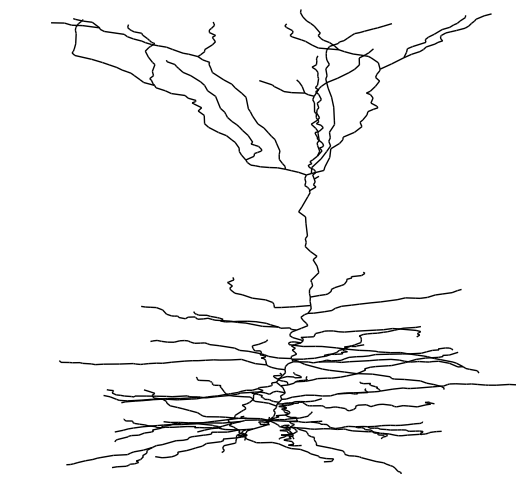

In [2]:
neuron_list = McNeuron.visualize.get_all_path(os.getcwd()+"/Data/Pyramidal/chen")
neuron = McNeuron.Neuron(file_format = 'swc', input_file=neuron_list[50])
McNeuron.visualize.plot_2D(neuron)

## Training

### Load Data

In [3]:
training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/synthetic_Two_segment_model_Different_directions_Parent_distance_n20_parent_id.p", "rb"))
#training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/train4.p", "rb"))

In [4]:
print training_data['morphology']['n20'].shape
print training_data['geometry']['n20'].shape

(50000, 19)
(50000, 19, 3)


In [5]:
import data_transforms
v = np.zeros([training_data['morphology']['n40'].shape[0],39])
for i in range(training_data['morphology']['n40'].shape[0]):
    a = data_transforms.decode_prufer(list(training_data['morphology']['n40'][i,:]))
    a = np.array(a)
    v[i,:] = a[1:]
training_data['morphology']['n40'] = v

KeyError: 'n40'

### Global parameters

In [5]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 5
batch_size = 32
n_batch_per_epoch = np.floor(training_data['morphology']['n20'].shape[0]/batch_size).astype(int)
d_iters = 20
lr_discriminator =  0.005
lr_generator = 0.0005
train_loss = 'wasserstein_loss'

rule = 'mgd'
train_one_by_one = False
weight_constraint = [-0.05, 0.05]

### Run

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 19, 3)         0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 19, 20)        0                                            
____________________________________________________________________________________________________
merge_1 (Merge)                  (None, 19, 23)        0           input_1[0][0]                    
                                                                   input_2[0][0]                    
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 19, 20)        3520        merge_1[0][0]           

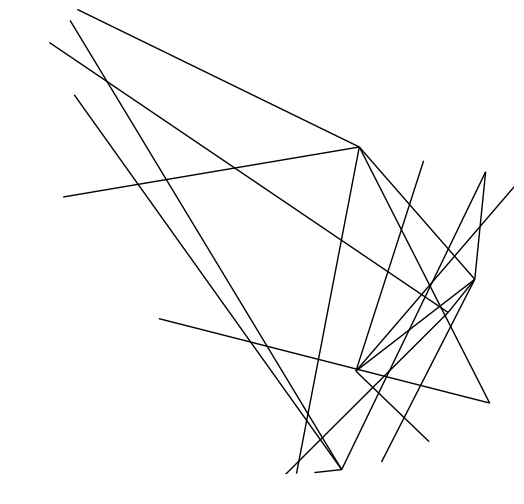

    After 20 iterations
        Discriminator Loss                         = -5380.61132812

    Generator_Loss: 5850.37451172
26
    After 20 iterations
        Discriminator Loss                         = -5507.54541016

    Generator_Loss: 5922.79394531
27
    After 20 iterations
        Discriminator Loss                         = -5554.68896484

    Generator_Loss: 6050.3515625
28
    After 20 iterations
        Discriminator Loss                         = -5939.68603516

    Generator_Loss: 6120.92431641
29
    After 20 iterations
        Discriminator Loss                         = -5880.88671875

    Generator_Loss: 6228.7265625
30
    After 20 iterations
        Discriminator Loss                         = -5931.10644531

    Generator_Loss: 6244.42578125
31
    After 20 iterations
        Discriminator Loss                         = -5970.09960938

    Generator_Loss: 6256.61328125
32
    After 20 iterations
        Discriminator Loss                         = -6244.47070312


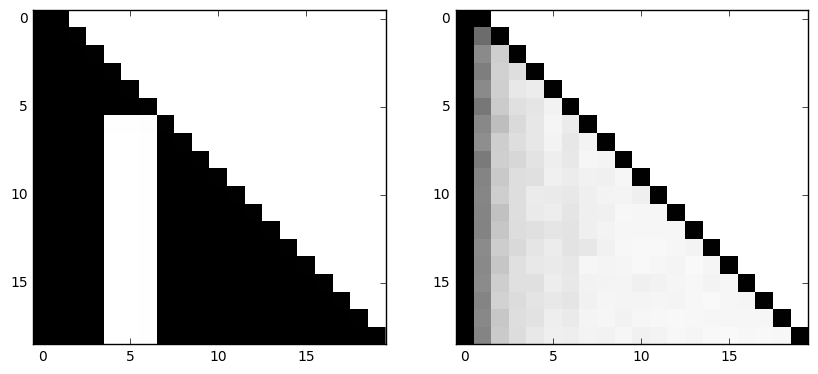

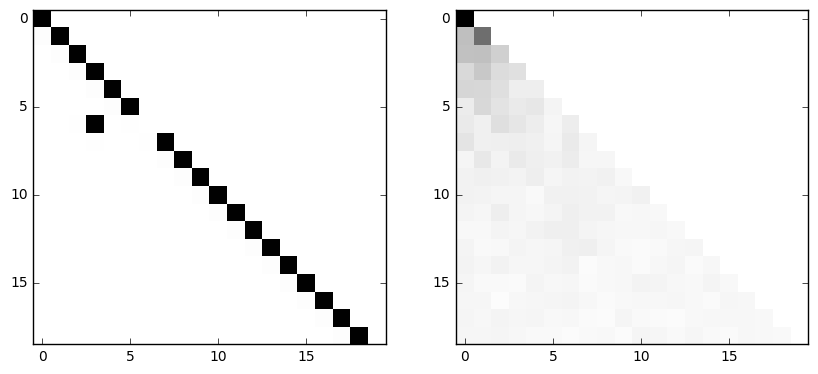

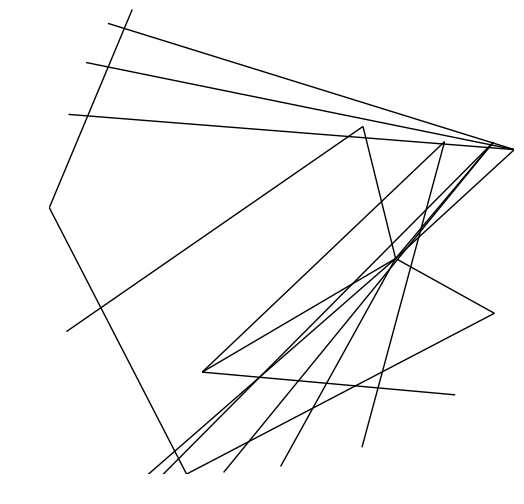

    After 20 iterations
        Discriminator Loss                         = -7628.07910156

    Generator_Loss: 7811.97900391
51
    After 20 iterations
        Discriminator Loss                         = -7435.22070312

    Generator_Loss: 7806.83349609
52
    After 20 iterations
        Discriminator Loss                         = -7655.5546875

    Generator_Loss: 7961.68505859
53
    After 20 iterations
        Discriminator Loss                         = -7494.61621094

    Generator_Loss: 7930.90673828
54
    After 20 iterations
        Discriminator Loss                         = -7773.19335938

    Generator_Loss: 8025.95361328
55
    After 20 iterations
        Discriminator Loss                         = -7586.00878906

    Generator_Loss: 8021.62060547
56
    After 20 iterations
        Discriminator Loss                         = -7910.90136719

    Generator_Loss: 8200.94335938
57
    After 20 iterations
        Discriminator Loss                         = -7841.91894531

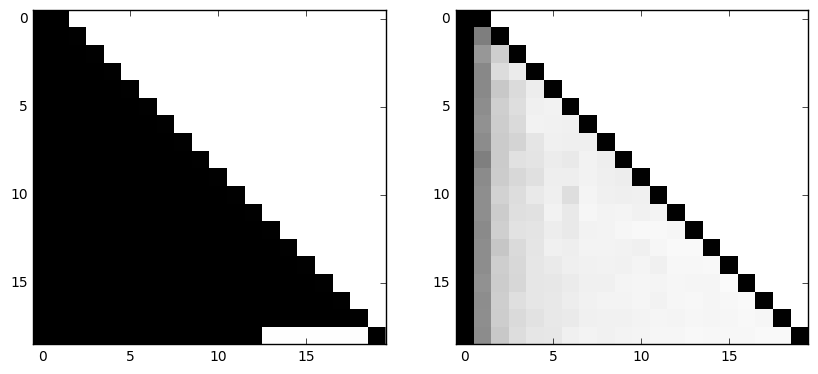

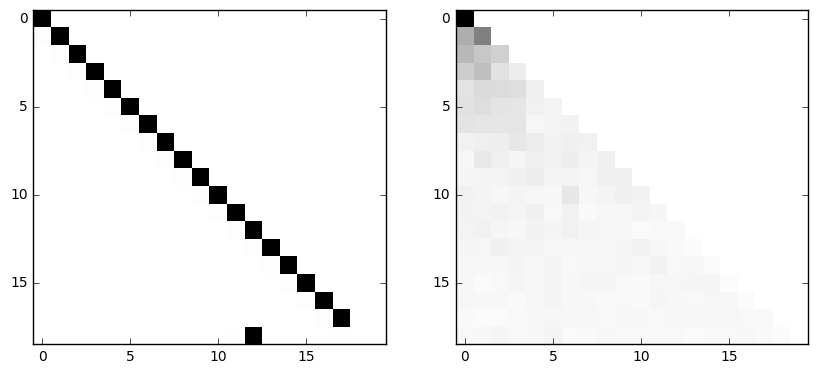

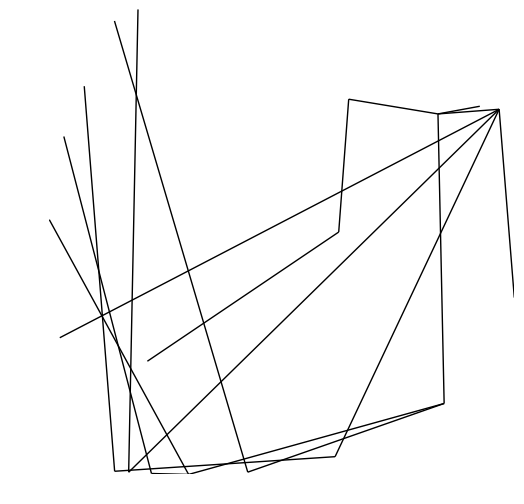

    After 20 iterations
        Discriminator Loss                         = -8842.4375

    Generator_Loss: 9277.61523438
76
    After 20 iterations
        Discriminator Loss                         = -8771.72363281

    Generator_Loss: 9238.3046875
77
    After 20 iterations
        Discriminator Loss                         = -8572.77539062

    Generator_Loss: 9255.43652344
78
    After 20 iterations
        Discriminator Loss                         = -8878.66894531

    Generator_Loss: 9351.10449219
79
    After 20 iterations
        Discriminator Loss                         = -8935.40527344

    Generator_Loss: 9461.36816406
80
    After 20 iterations
        Discriminator Loss                         = -9232.88769531

    Generator_Loss: 9564.05566406
81
    After 20 iterations
        Discriminator Loss                         = -8941.15917969

    Generator_Loss: 9550.33398438
82
    After 20 iterations
        Discriminator Loss                         = -9192.89648438

  

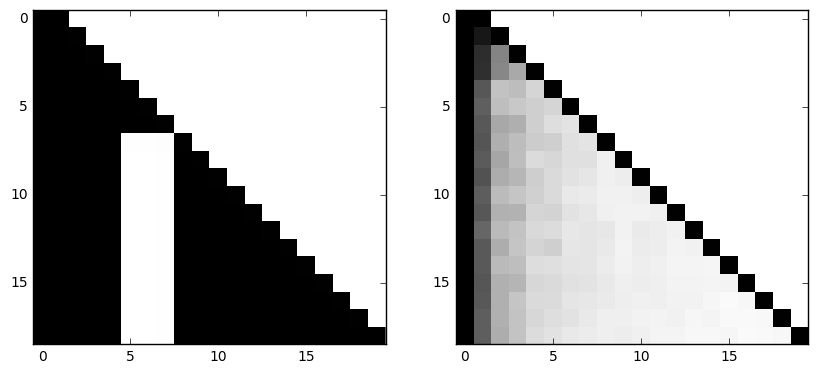

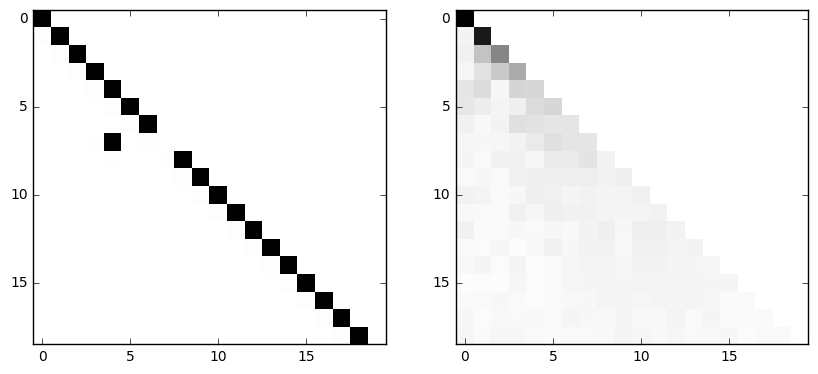

    After 20 iterations
        Discriminator Loss                         = -9897.63378906

    Generator_Loss: 10449.3105469
101
    After 20 iterations
        Discriminator Loss                         = -9947.25292969

    Generator_Loss: 10504.3798828
102
    After 20 iterations
        Discriminator Loss                         = -10031.6904297

    Generator_Loss: 10516.0810547
103
    After 20 iterations
        Discriminator Loss                         = -10025.9658203

    Generator_Loss: 10574.9248047
104
    After 20 iterations
        Discriminator Loss                         = -10001.9892578

    Generator_Loss: 10617.5126953
105
    After 20 iterations
        Discriminator Loss                         = -10238.8759766

    Generator_Loss: 10661.5878906
106
    After 20 iterations
        Discriminator Loss                         = -10179.9472656

    Generator_Loss: 10729.5878906
107
    After 20 iterations
        Discriminator Loss                         = -9949.

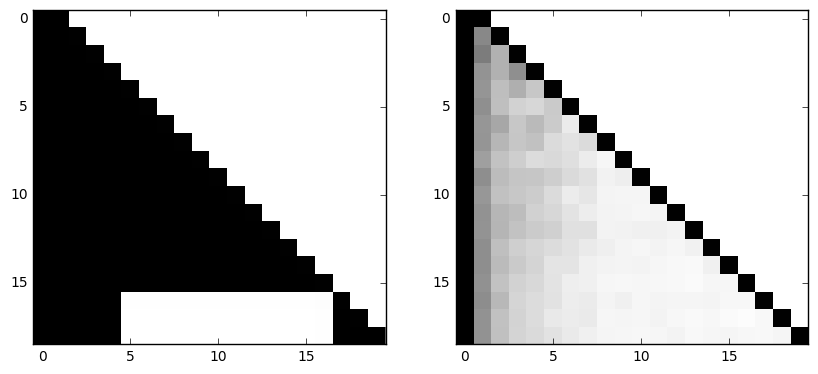

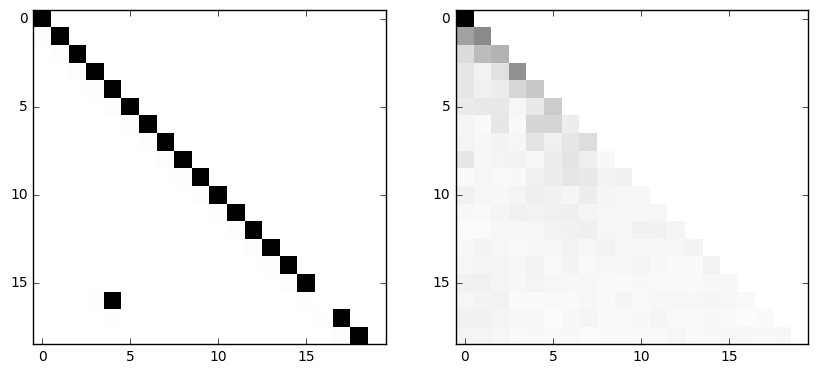

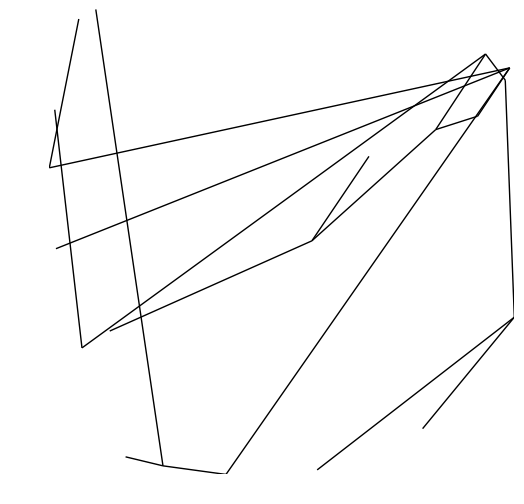

    After 20 iterations
        Discriminator Loss                         = -10758.4414062

    Generator_Loss: 11450.5888672
126
    After 20 iterations
        Discriminator Loss                         = -10745.7294922

    Generator_Loss: 11447.0908203
127
    After 20 iterations
        Discriminator Loss                         = -11090.9257812

    Generator_Loss: 11592.7910156
128
    After 20 iterations
        Discriminator Loss                         = -11023.1308594

    Generator_Loss: 11575.7304688
129
    After 20 iterations
        Discriminator Loss                         = -10910.2421875

    Generator_Loss: 11619.0761719
130
    After 20 iterations
        Discriminator Loss                         = -11191.8037109

    Generator_Loss: 11717.0214844
131
    After 20 iterations
        Discriminator Loss                         = -11023.8955078

    Generator_Loss: 11736.3496094
132
    After 20 iterations
        Discriminator Loss                         = -10921

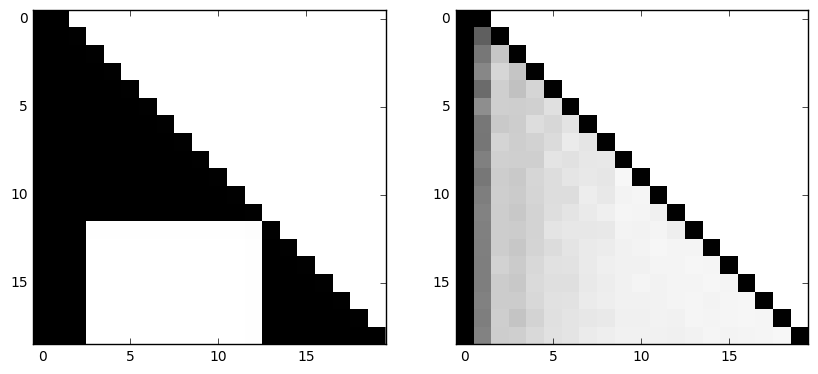

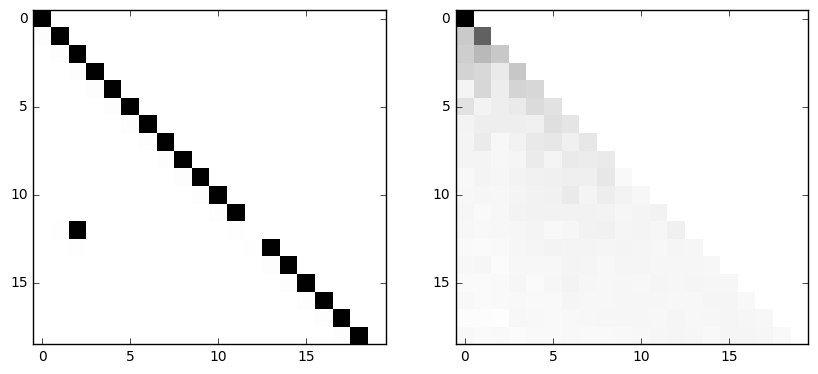

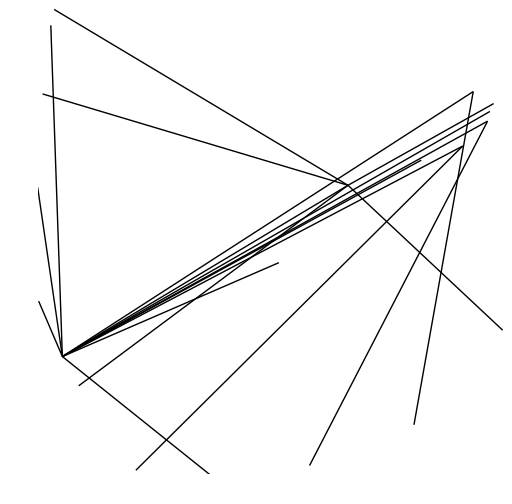

    After 20 iterations
        Discriminator Loss                         = -11943.7392578

    Generator_Loss: 12515.1962891
151
    After 20 iterations
        Discriminator Loss                         = -11866.3662109

    Generator_Loss: 12469.4130859
152
    After 20 iterations
        Discriminator Loss                         = -12079.3623047

    Generator_Loss: 12623.6953125
153
    After 20 iterations
        Discriminator Loss                         = -11903.3310547

    Generator_Loss: 12589.6455078
154
    After 20 iterations
        Discriminator Loss                         = -11985.7226562

    Generator_Loss: 12722.3769531
155
    After 20 iterations
        Discriminator Loss                         = -12040.3583984

    Generator_Loss: 12704.3974609
156
    After 20 iterations
        Discriminator Loss                         = -11968.2841797

    Generator_Loss: 12758.7529297
157
    After 20 iterations
        Discriminator Loss                         = -12052

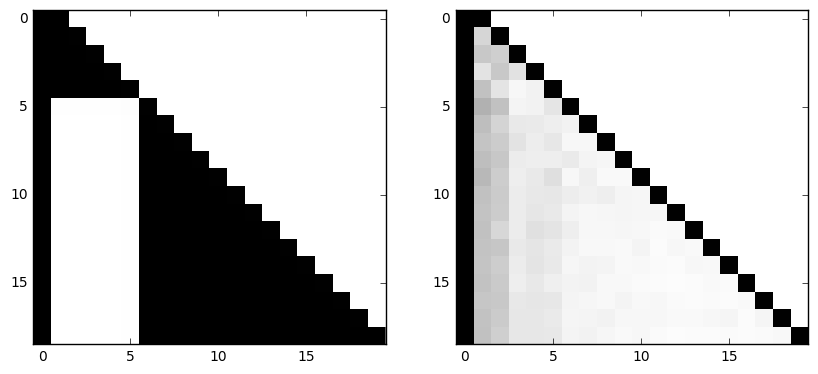

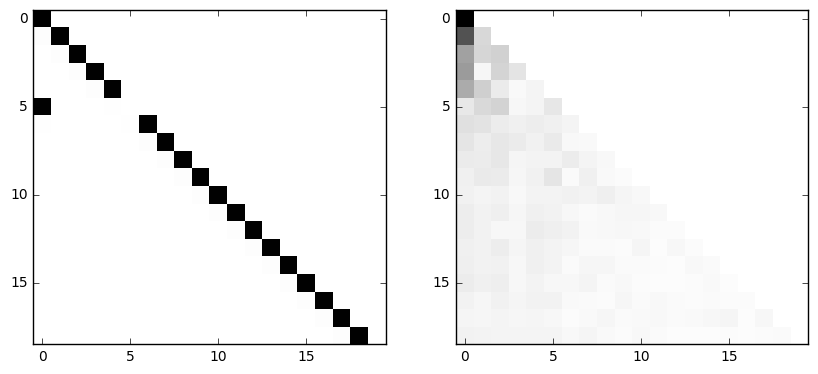

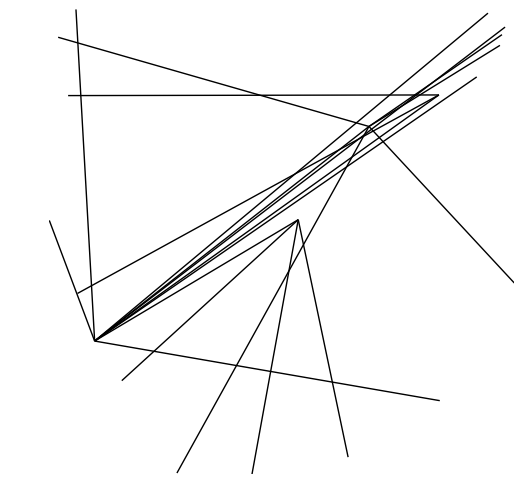

    After 20 iterations
        Discriminator Loss                         = -12726.5166016

    Generator_Loss: 13432.1474609
176
    After 20 iterations
        Discriminator Loss                         = -12889.2216797

    Generator_Loss: 13577.5703125
177
    After 20 iterations
        Discriminator Loss                         = -12848.7148438

    Generator_Loss: 13600.9511719
178
    After 20 iterations
        Discriminator Loss                         = -12907.8515625

    Generator_Loss: 13632.3173828
179
    After 20 iterations
        Discriminator Loss                         = -13100.9472656

    Generator_Loss: 13717.4873047
180
    After 20 iterations
        Discriminator Loss                         = -13001.7050781

    Generator_Loss: 13708.296875
181
    After 20 iterations
        Discriminator Loss                         = -13217.1425781

    Generator_Loss: 13773.859375
182
    After 20 iterations
        Discriminator Loss                         = -13132.3

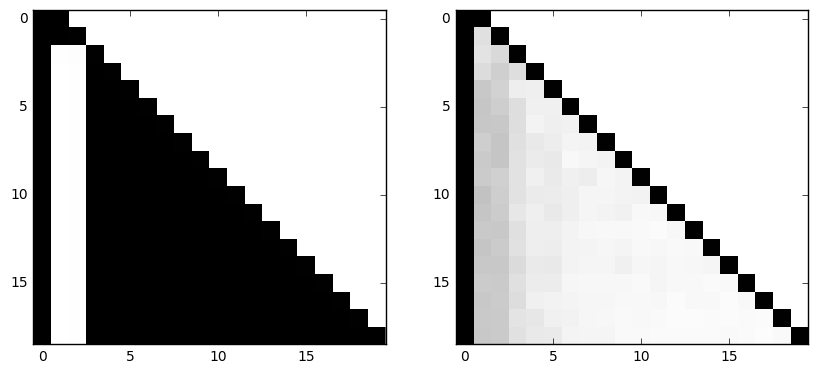

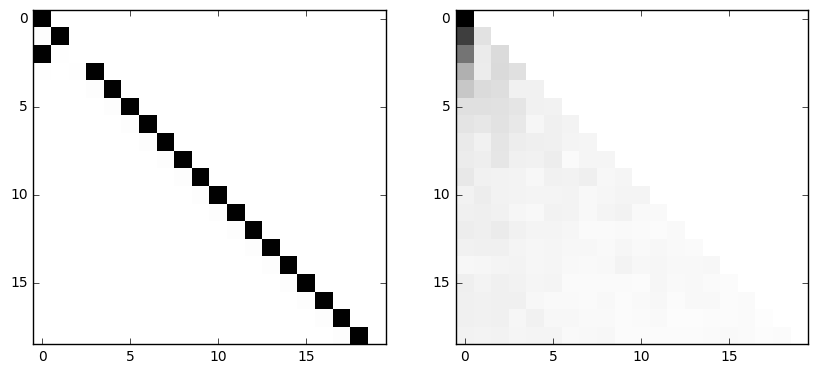

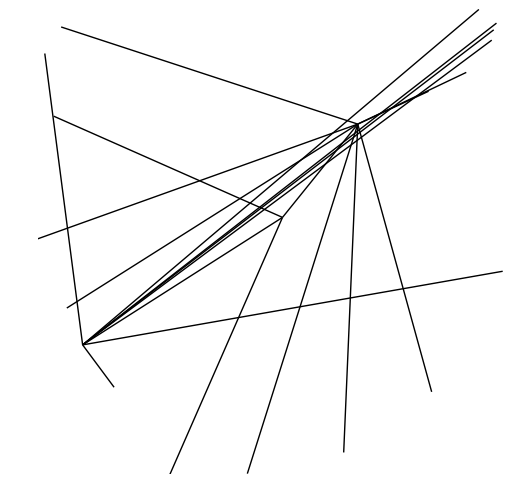

    After 20 iterations
        Discriminator Loss                         = -13703.875

    Generator_Loss: 14334.09375
201
    After 20 iterations
        Discriminator Loss                         = -13724.4160156

    Generator_Loss: 14346.3017578
202
    After 20 iterations
        Discriminator Loss                         = -13685.7246094

    Generator_Loss: 14445.9228516
203
    After 20 iterations
        Discriminator Loss                         = -13722.0449219

    Generator_Loss: 14377.8007812
204
    After 20 iterations
        Discriminator Loss                         = -13760.8369141

    Generator_Loss: 14518.2265625
205
    After 20 iterations
        Discriminator Loss                         = -13908.5888672

    Generator_Loss: 14518.8291016
206
    After 20 iterations
        Discriminator Loss                         = -13921.2167969

    Generator_Loss: 14609.7373047
207
    After 20 iterations
        Discriminator Loss                         = -13932.55468

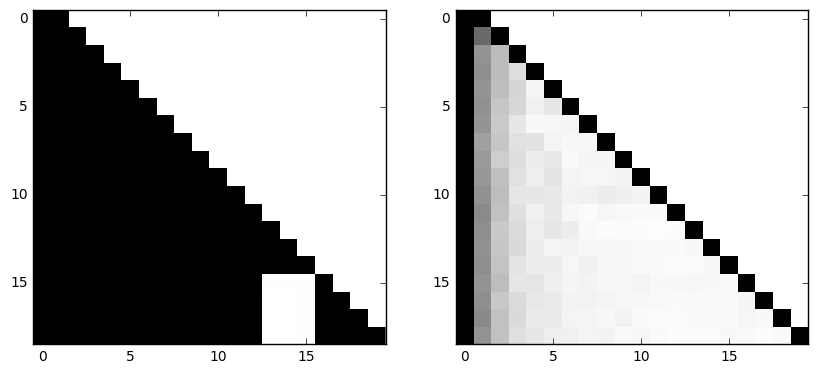

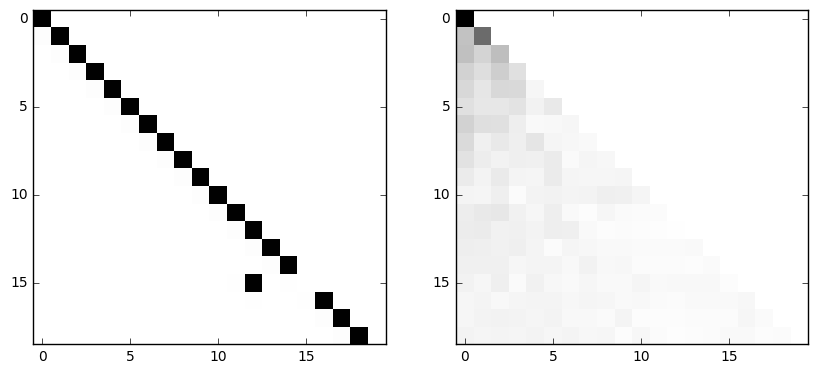

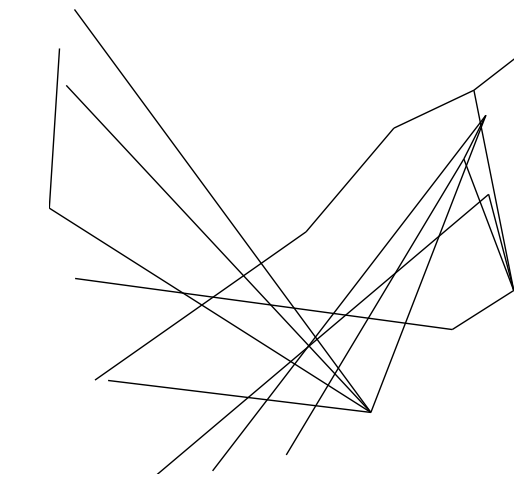

    After 20 iterations
        Discriminator Loss                         = -14355.8417969

    Generator_Loss: 15110.4980469
226
    After 20 iterations
        Discriminator Loss                         = -14571.0751953

    Generator_Loss: 15215.8486328
227
    After 20 iterations
        Discriminator Loss                         = -13798.3017578

    Generator_Loss: 15333.2431641
228
    After 20 iterations
        Discriminator Loss                         = -14550.8964844

    Generator_Loss: 15278.2431641
229
    After 20 iterations
        Discriminator Loss                         = -14701.1679688

    Generator_Loss: 15294.9257812
230
    After 20 iterations
        Discriminator Loss                         = -14258.8115234

    Generator_Loss: 15263.6464844
231
    After 20 iterations
        Discriminator Loss                         = -14704.5517578

    Generator_Loss: 15316.2949219
232
    After 20 iterations
        Discriminator Loss                         = -14710

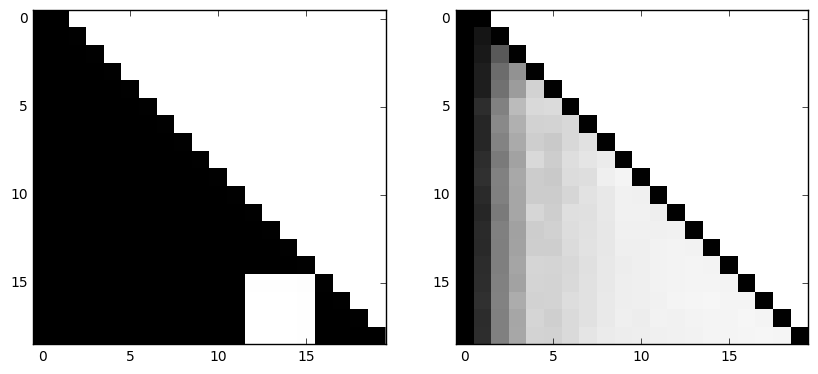

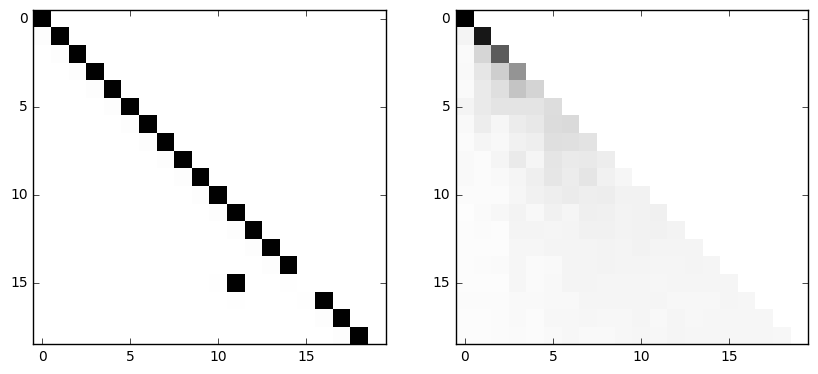

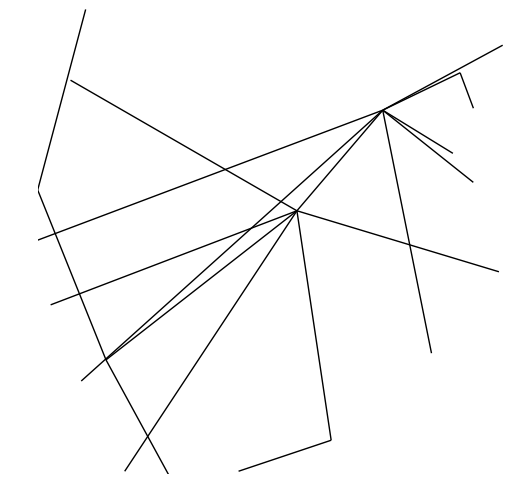

    After 20 iterations
        Discriminator Loss                         = -15080.46875

    Generator_Loss: 15890.8447266
251
    After 20 iterations
        Discriminator Loss                         = -15215.4628906

    Generator_Loss: 15909.7480469
252
    After 20 iterations
        Discriminator Loss                         = -15315.0

    Generator_Loss: 15985.9677734
253
    After 20 iterations
        Discriminator Loss                         = -15272.4238281

    Generator_Loss: 16020.6757812
254
    After 20 iterations
        Discriminator Loss                         = -15286.1474609

    Generator_Loss: 15978.9355469
255
    After 20 iterations
        Discriminator Loss                         = -15261.1191406

    Generator_Loss: 16019.0703125
256
    After 20 iterations
        Discriminator Loss                         = -15379.3105469

    Generator_Loss: 16055.4423828
257
    After 20 iterations
        Discriminator Loss                         = -15419.1650391

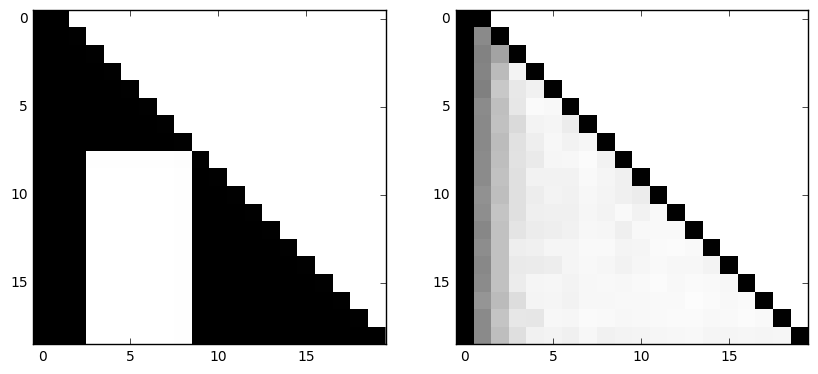

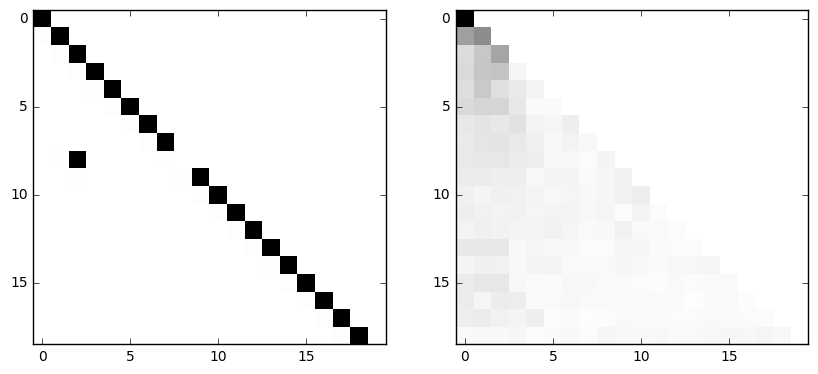

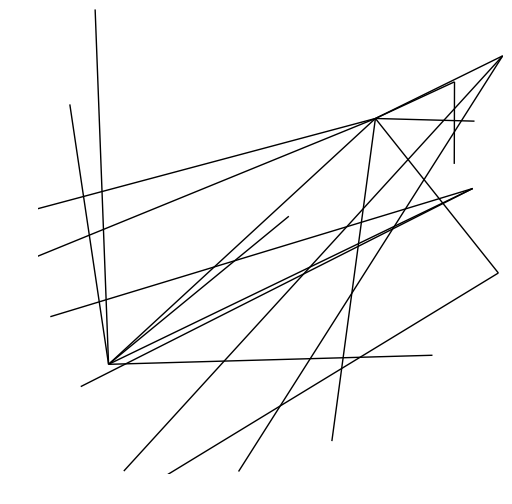

    After 20 iterations
        Discriminator Loss                         = -15954.3828125

    Generator_Loss: 16635.5234375
276
    After 20 iterations
        Discriminator Loss                         = -15995.9101562

    Generator_Loss: 16646.1933594
277
    After 20 iterations
        Discriminator Loss                         = -15772.3564453

    Generator_Loss: 16723.3632812
278
    After 20 iterations
        Discriminator Loss                         = -15014.9785156

    Generator_Loss: 16765.7871094
279
    After 20 iterations
        Discriminator Loss                         = -15139.9609375

    Generator_Loss: 16772.4882812
280
    After 20 iterations
        Discriminator Loss                         = -14734.5830078

    Generator_Loss: 16706.1074219
281
    After 20 iterations
        Discriminator Loss                         = -15887.7294922

    Generator_Loss: 16710.5410156
282
    After 20 iterations
        Discriminator Loss                         = -15362

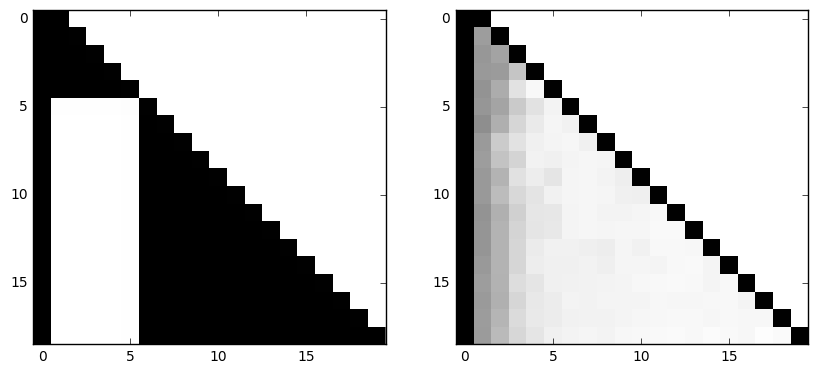

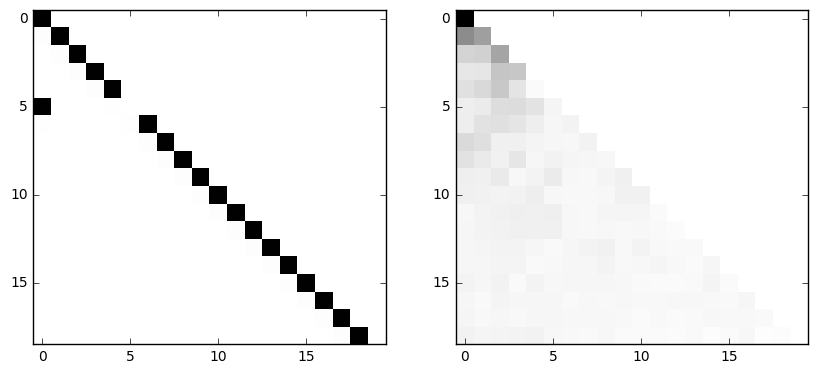

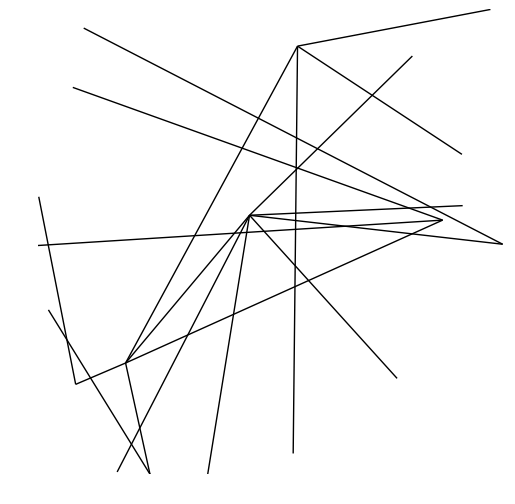

    After 20 iterations
        Discriminator Loss                         = -16559.8417969

    Generator_Loss: 17394.0585938
301
    After 20 iterations
        Discriminator Loss                         = -16563.1953125

    Generator_Loss: 17420.2851562
302
    After 20 iterations
        Discriminator Loss                         = -16555.5566406

    Generator_Loss: 17395.0175781
303
    After 20 iterations
        Discriminator Loss                         = -16493.9941406

    Generator_Loss: 17295.1796875
304
    After 20 iterations
        Discriminator Loss                         = -16520.3320312

    Generator_Loss: 17288.1113281
305
    After 20 iterations
        Discriminator Loss                         = -16640.3671875

    Generator_Loss: 17424.3398438
306
    After 20 iterations
        Discriminator Loss                         = -16633.8164062

    Generator_Loss: 17546.4335938
307
    After 20 iterations
        Discriminator Loss                         = -16647

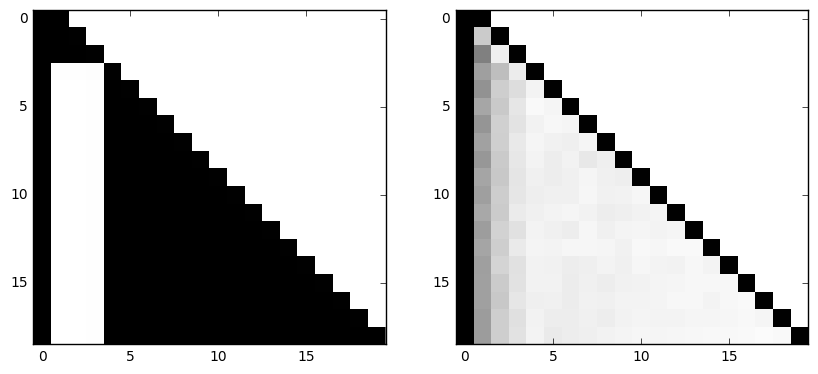

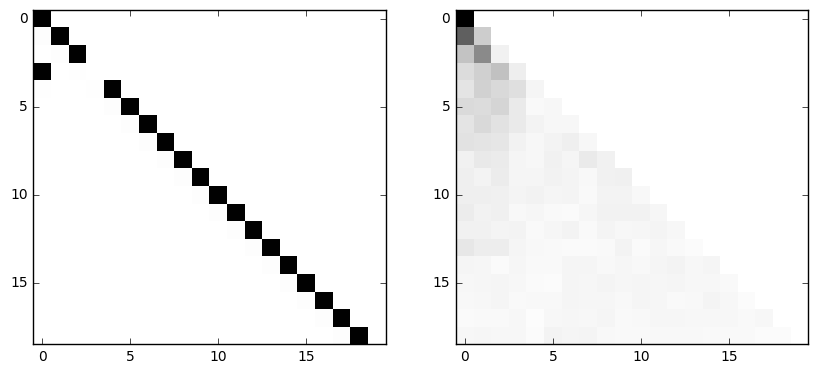

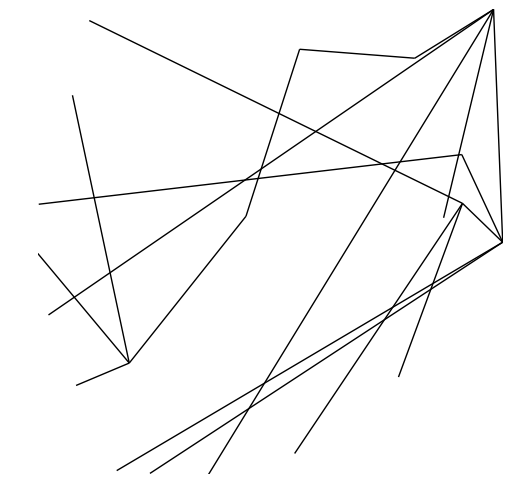

    After 20 iterations
        Discriminator Loss                         = -17011.9492188

    Generator_Loss: 17921.9042969
326
    After 20 iterations
        Discriminator Loss                         = -17387.6269531

    Generator_Loss: 18074.2578125
327
    After 20 iterations
        Discriminator Loss                         = -17160.4003906

    Generator_Loss: 18071.375
328
    After 20 iterations
        Discriminator Loss                         = -17121.4648438

    Generator_Loss: 18123.8183594
329
    After 20 iterations
        Discriminator Loss                         = -17382.5566406

    Generator_Loss: 18112.15625
330
    After 20 iterations
        Discriminator Loss                         = -17451.5195312

    Generator_Loss: 18159.1308594
331
    After 20 iterations
        Discriminator Loss                         = -17334.890625

    Generator_Loss: 18206.8554688
332
    After 20 iterations
        Discriminator Loss                         = -17321.640625

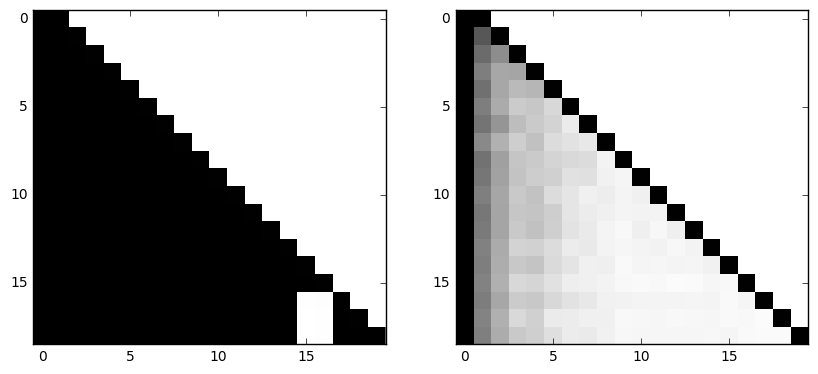

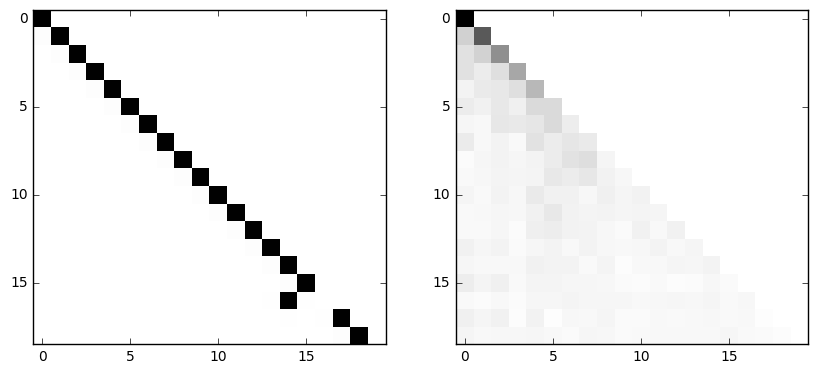

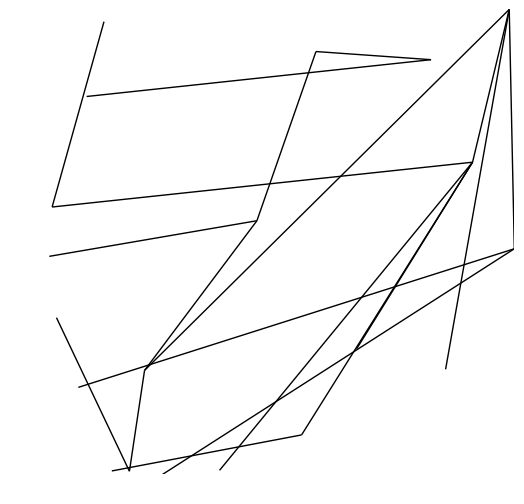

    After 20 iterations
        Discriminator Loss                         = -17881.5527344

    Generator_Loss: 18646.9082031
351
    After 20 iterations
        Discriminator Loss                         = -17985.4941406

    Generator_Loss: 18640.3828125
352
    After 20 iterations
        Discriminator Loss                         = -17971.9746094

    Generator_Loss: 18562.359375
353
    After 20 iterations
        Discriminator Loss                         = -17934.6484375

    Generator_Loss: 18714.8476562
354
    After 20 iterations
        Discriminator Loss                         = -17953.5898438

    Generator_Loss: 18607.4550781
355
    After 20 iterations
        Discriminator Loss                         = -17877.0859375

    Generator_Loss: 18637.5957031
356
    After 20 iterations
        Discriminator Loss                         = -18085.2519531

    Generator_Loss: 18721.7167969
357
    After 20 iterations
        Discriminator Loss                         = -17759.

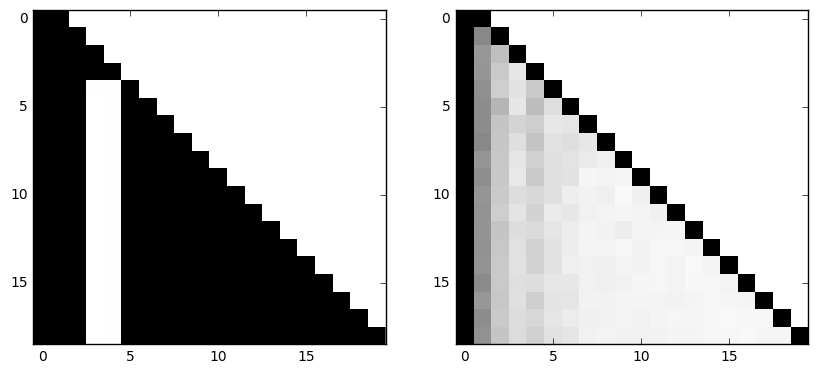

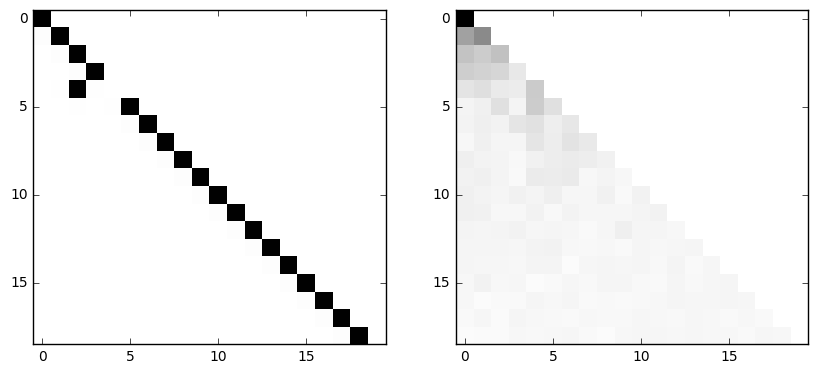

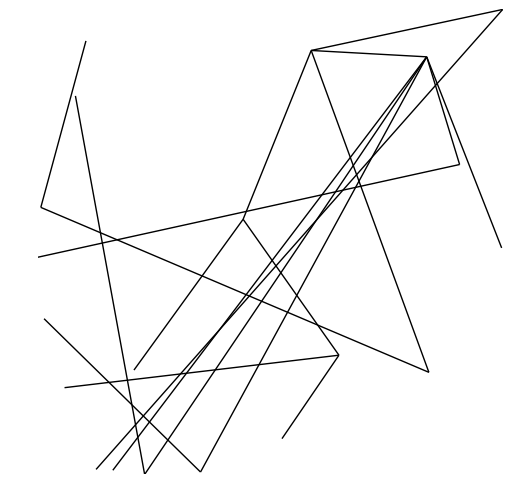

    After 20 iterations
        Discriminator Loss                         = -18437.1816406

    Generator_Loss: 19259.3066406
376
    After 20 iterations
        Discriminator Loss                         = -18405.6210938

    Generator_Loss: 19281.3378906
377
    After 20 iterations
        Discriminator Loss                         = -18581.4804688

    Generator_Loss: 19336.9492188
378
    After 20 iterations
        Discriminator Loss                         = -18449.6757812

    Generator_Loss: 19309.7402344
379
    After 20 iterations
        Discriminator Loss                         = -18468.9375

    Generator_Loss: 19264.8476562
380
    After 20 iterations
        Discriminator Loss                         = -18491.1816406

    Generator_Loss: 19333.8457031
381
    After 20 iterations
        Discriminator Loss                         = -18512.2617188

    Generator_Loss: 19406.1328125
382
    After 20 iterations
        Discriminator Loss                         = -18510.91

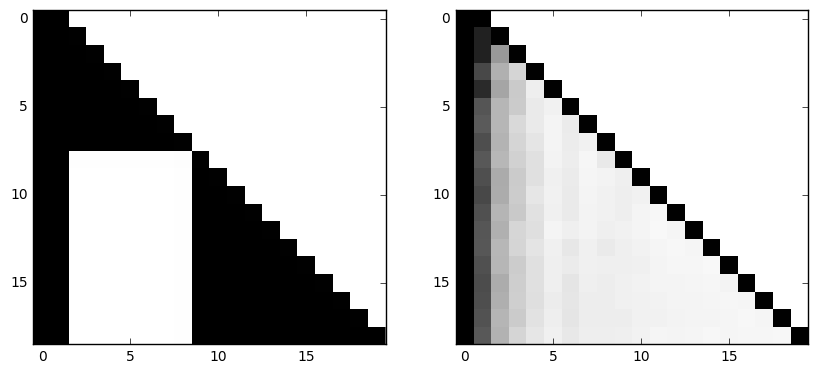

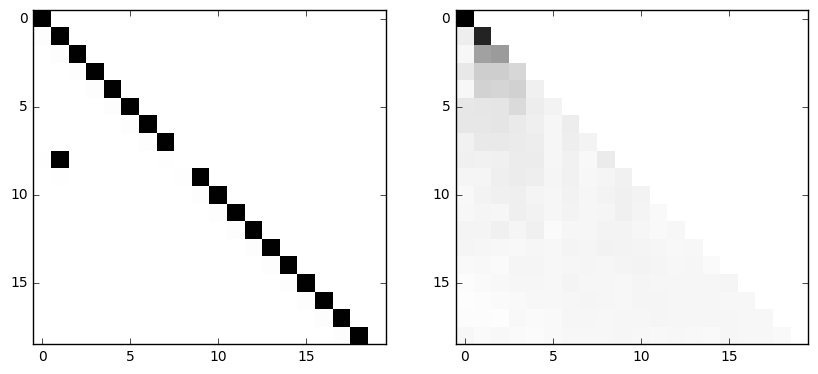

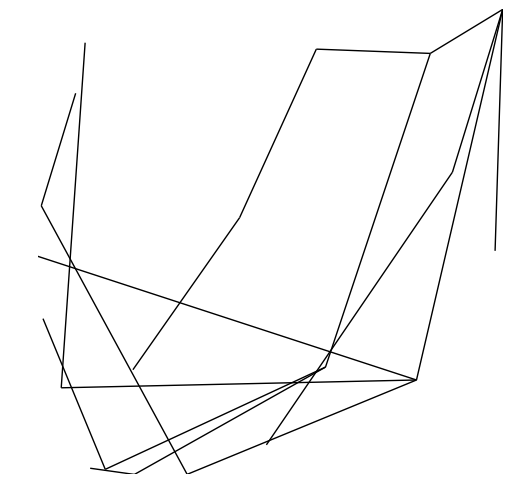

    After 20 iterations
        Discriminator Loss                         = -18927.1171875

    Generator_Loss: 19810.6464844
401
    After 20 iterations
        Discriminator Loss                         = -19049.3203125

    Generator_Loss: 19874.9316406
402
    After 20 iterations
        Discriminator Loss                         = -19036.5371094

    Generator_Loss: 19845.4140625
403
    After 20 iterations
        Discriminator Loss                         = -18919.6640625

    Generator_Loss: 19804.5839844
404
    After 20 iterations
        Discriminator Loss                         = -18887.0703125

    Generator_Loss: 19906.7988281
405
    After 20 iterations
        Discriminator Loss                         = -19089.2226562

    Generator_Loss: 19951.5175781
406
    After 20 iterations
        Discriminator Loss                         = -19038.4511719

    Generator_Loss: 19890.4003906
407
    After 20 iterations
        Discriminator Loss                         = -18975

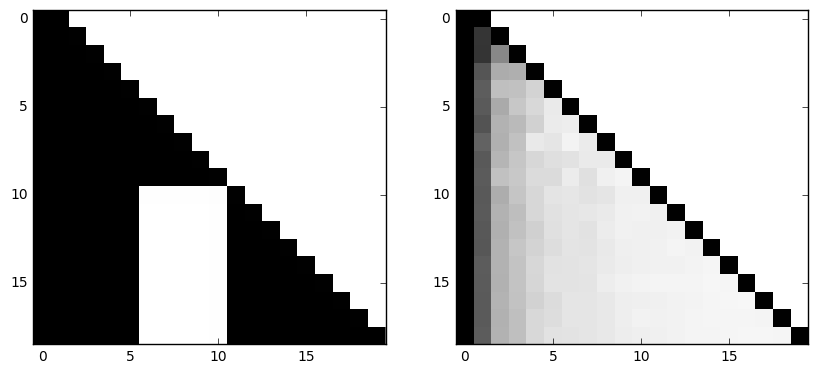

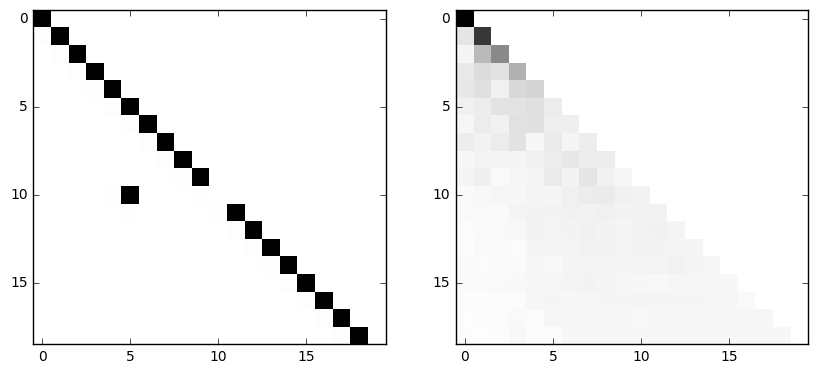

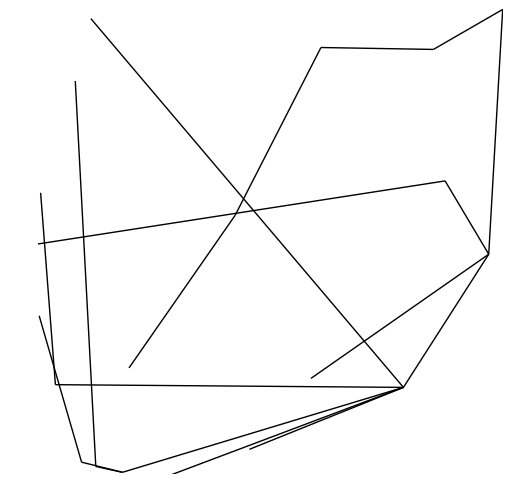

    After 20 iterations
        Discriminator Loss                         = -19340.1054688

    Generator_Loss: 20546.4003906
426
    After 20 iterations
        Discriminator Loss                         = -19372.0117188

    Generator_Loss: 20435.5097656
427
    After 20 iterations
        Discriminator Loss                         = -19625.2167969

    Generator_Loss: 20470.0976562
428
    After 20 iterations
        Discriminator Loss                         = -19709.3984375

    Generator_Loss: 20474.0625
429
    After 20 iterations
        Discriminator Loss                         = -19605.2695312

    Generator_Loss: 20462.1054688
430
    After 20 iterations
        Discriminator Loss                         = -19820.7773438

    Generator_Loss: 20484.2636719
431
    After 20 iterations
        Discriminator Loss                         = -19772.8261719

    Generator_Loss: 20535.9707031
432
    After 20 iterations
        Discriminator Loss                         = -19567.90

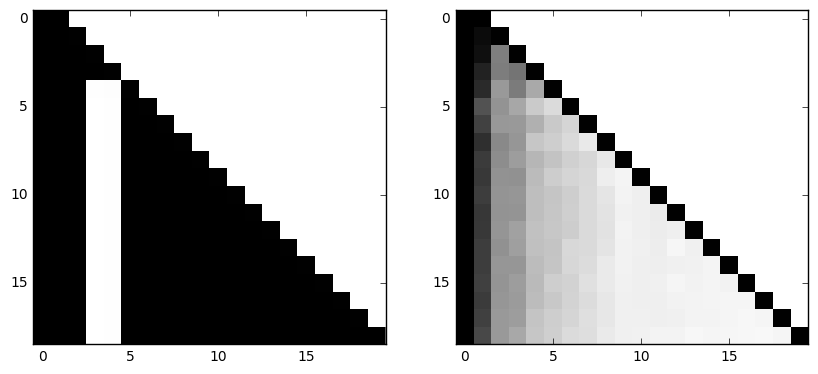

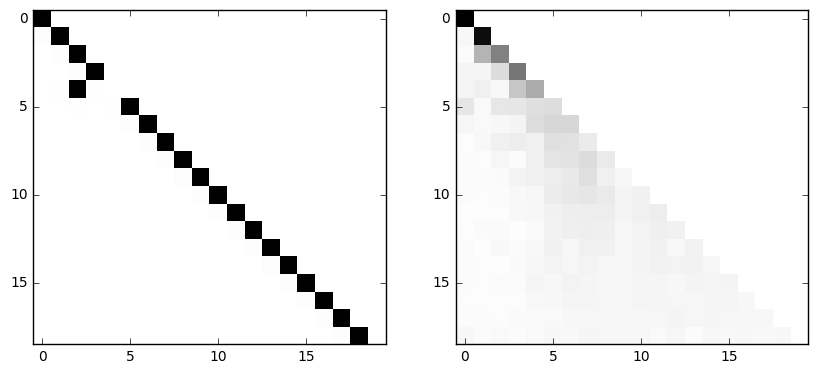

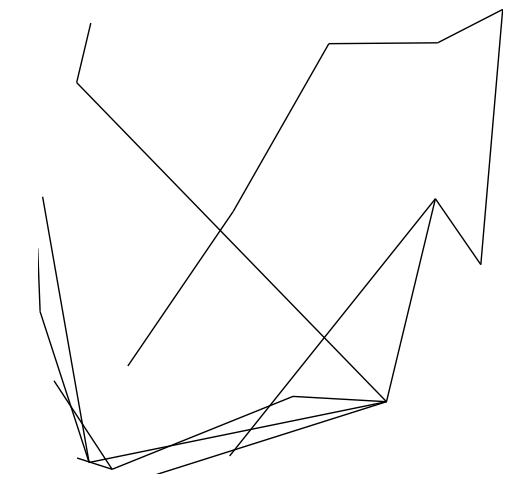

    After 20 iterations
        Discriminator Loss                         = -19931.515625

    Generator_Loss: 20862.6894531
451
    After 20 iterations
        Discriminator Loss                         = -19027.8691406

    Generator_Loss: 21094.4453125
452
    After 20 iterations
        Discriminator Loss                         = -19883.2636719

    Generator_Loss: 21047.4101562
453
    After 20 iterations
        Discriminator Loss                         = -20028.8984375

    Generator_Loss: 21052.765625
454
    After 20 iterations
        Discriminator Loss                         = -20011.4648438

    Generator_Loss: 21005.78125
455
    After 20 iterations
        Discriminator Loss                         = -20096.4082031

    Generator_Loss: 20858.9316406
456
    After 20 iterations
        Discriminator Loss                         = -20024.9902344

    Generator_Loss: 21107.4140625
457
    After 20 iterations
        Discriminator Loss                         = -20062.904

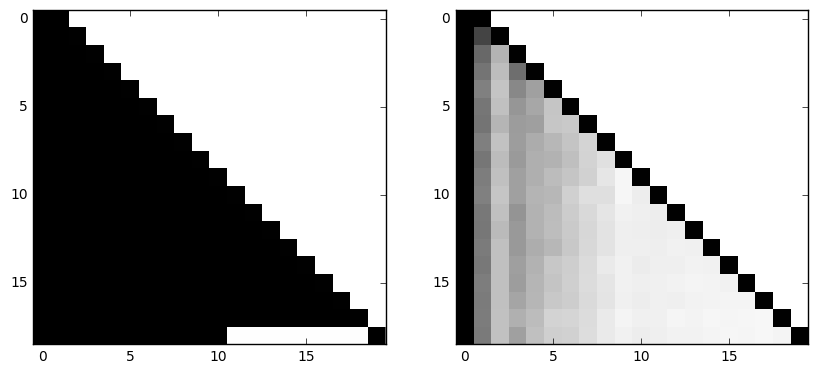

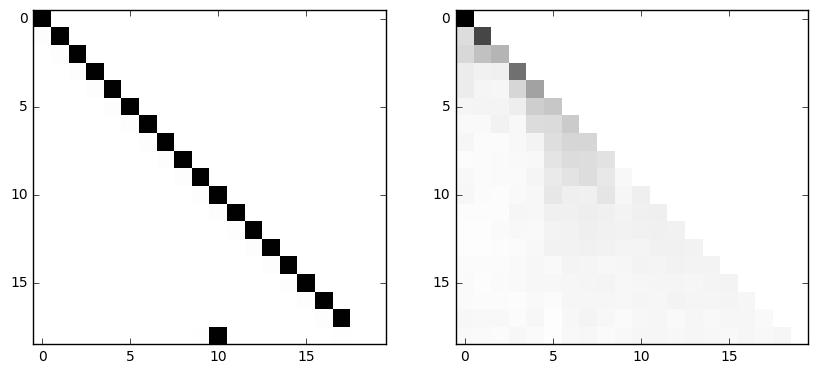

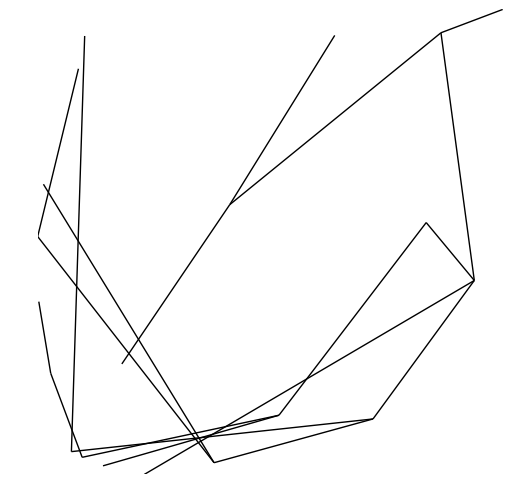

    After 20 iterations
        Discriminator Loss                         = -19801.0019531

    Generator_Loss: 21634.34375
476
    After 20 iterations
        Discriminator Loss                         = -20192.4082031

    Generator_Loss: 21525.3574219
477
    After 20 iterations
        Discriminator Loss                         = -20193.0117188

    Generator_Loss: 21538.3398438
478
    After 20 iterations
        Discriminator Loss                         = -20658.4375

    Generator_Loss: 21627.6738281
479
    After 20 iterations
        Discriminator Loss                         = -20397.4589844

    Generator_Loss: 21518.6816406
480
    After 20 iterations
        Discriminator Loss                         = -20234.5195312

    Generator_Loss: 21526.078125
481
    After 20 iterations
        Discriminator Loss                         = -20309.8828125

    Generator_Loss: 21477.3886719
482
    After 20 iterations
        Discriminator Loss                         = -20658.96093

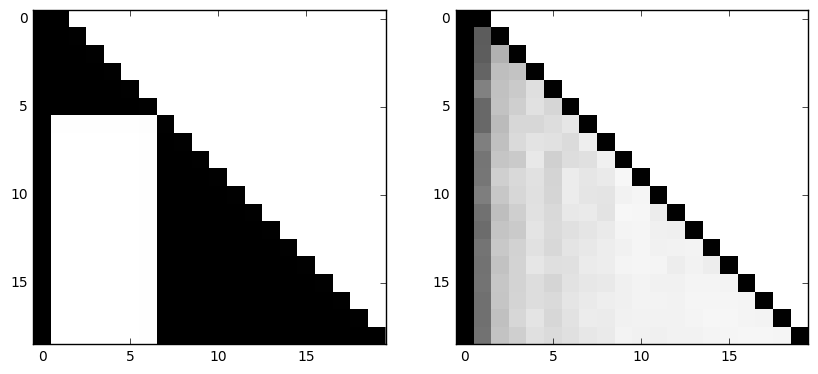

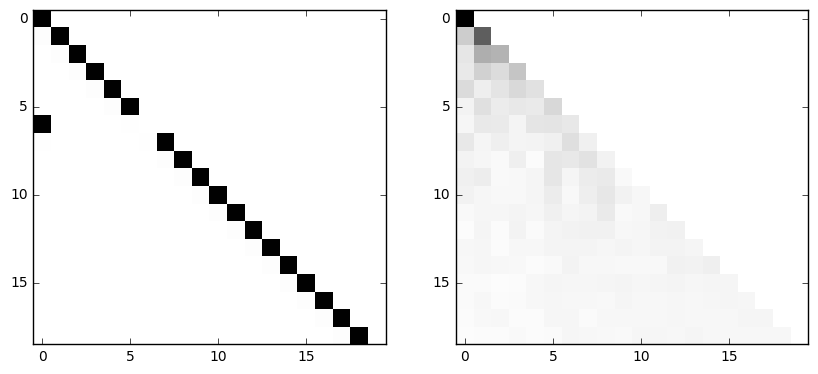

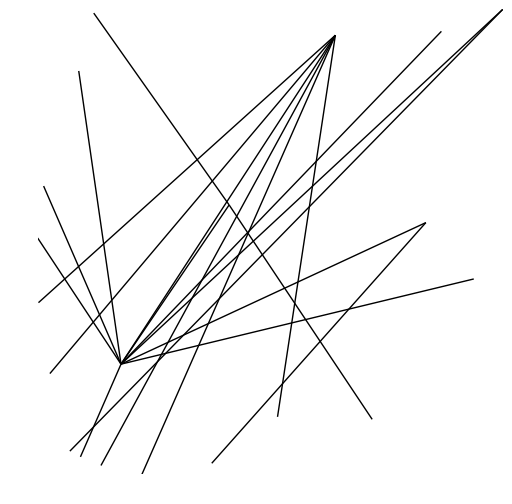

    After 20 iterations
        Discriminator Loss                         = -21075.4238281

    Generator_Loss: 21878.4140625
501
    After 20 iterations
        Discriminator Loss                         = -20857.0351562

    Generator_Loss: 21890.5371094
502
    After 20 iterations
        Discriminator Loss                         = -20981.9785156

    Generator_Loss: 21911.6972656
503
    After 20 iterations
        Discriminator Loss                         = -21007.3632812

    Generator_Loss: 21943.0390625
504
    After 20 iterations
        Discriminator Loss                         = -21089.53125

    Generator_Loss: 21893.2578125
505
    After 20 iterations
        Discriminator Loss                         = -20293.0507812

    Generator_Loss: 22011.6542969
506
    After 20 iterations
        Discriminator Loss                         = -20849.4257812

    Generator_Loss: 22132.9707031
507
    After 20 iterations
        Discriminator Loss                         = -21168.3

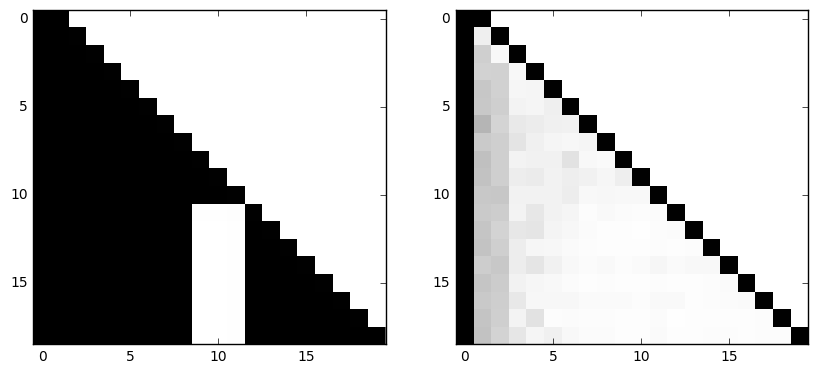

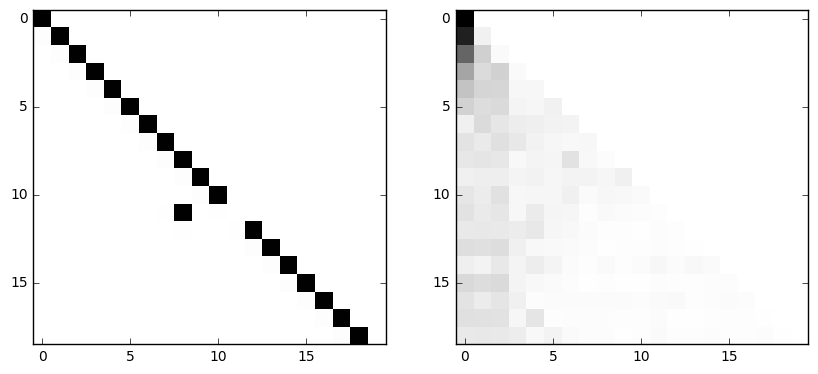

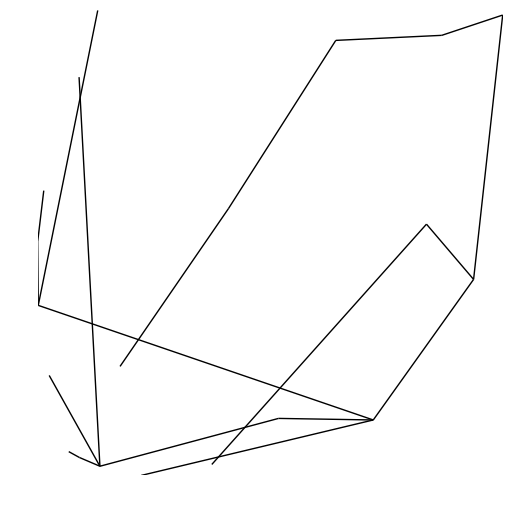

    After 20 iterations
        Discriminator Loss                         = -21405.2734375

    Generator_Loss: 22422.0839844
526
    After 20 iterations
        Discriminator Loss                         = -21463.6035156

    Generator_Loss: 22382.4433594
527
    After 20 iterations
        Discriminator Loss                         = -21472.0996094

    Generator_Loss: 22531.9960938
528
    After 20 iterations
        Discriminator Loss                         = -21482.5898438

    Generator_Loss: 22501.7714844
529
    After 20 iterations
        Discriminator Loss                         = -21135.8085938

    Generator_Loss: 22615.3359375
530
    After 20 iterations
        Discriminator Loss                         = -21420.3984375

    Generator_Loss: 22576.15625
531
    After 20 iterations
        Discriminator Loss                         = -21075.3925781

    Generator_Loss: 22842.9726562
532
    After 20 iterations
        Discriminator Loss                         = -21297.7

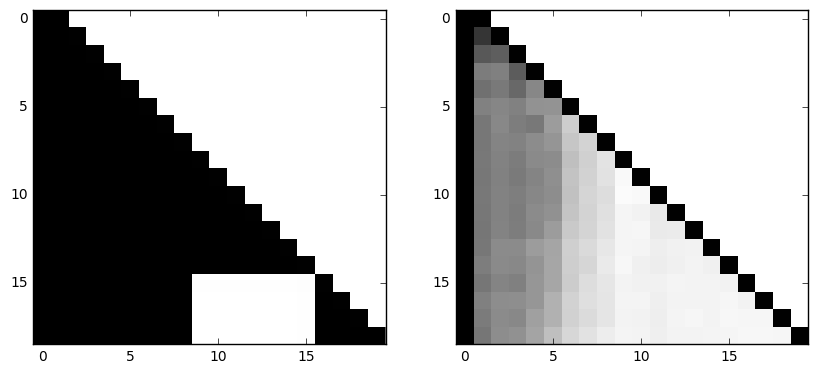

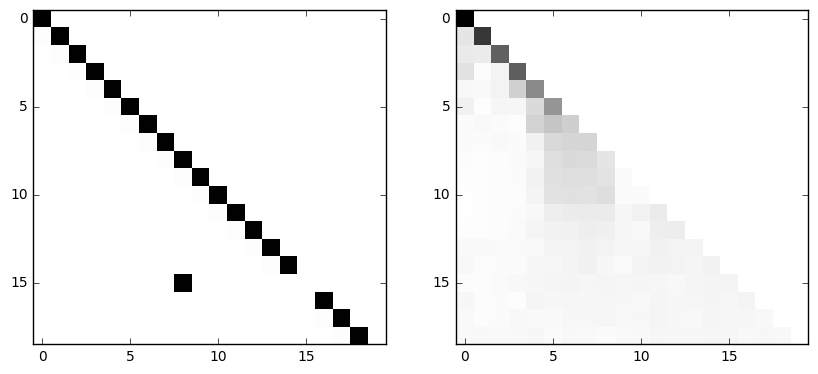

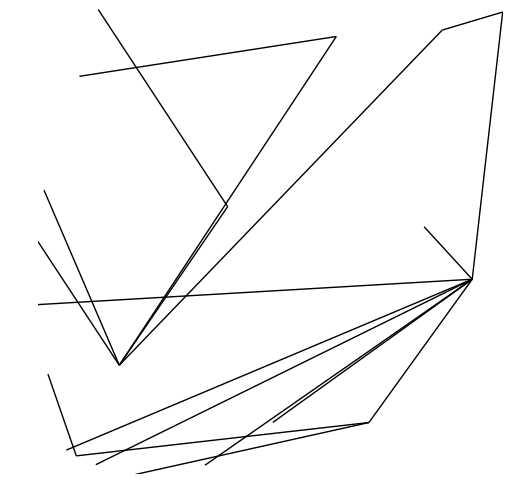

    After 20 iterations
        Discriminator Loss                         = -21601.2050781

    Generator_Loss: 22470.3085938
551
    After 20 iterations
        Discriminator Loss                         = -21990.9082031

    Generator_Loss: 23005.6230469
552
    After 20 iterations
        Discriminator Loss                         = -21813.515625

    Generator_Loss: 22982.6054688
553
    After 20 iterations
        Discriminator Loss                         = -21886.1074219

    Generator_Loss: 23042.3398438
554
    After 20 iterations
        Discriminator Loss                         = -22074.9667969

    Generator_Loss: 23107.921875
555
    After 20 iterations
        Discriminator Loss                         = -22023.6875

    Generator_Loss: 23069.2128906
556
    After 20 iterations
        Discriminator Loss                         = -22012.6992188

    Generator_Loss: 23121.2324219
557
    After 20 iterations
        Discriminator Loss                         = -22246.3808

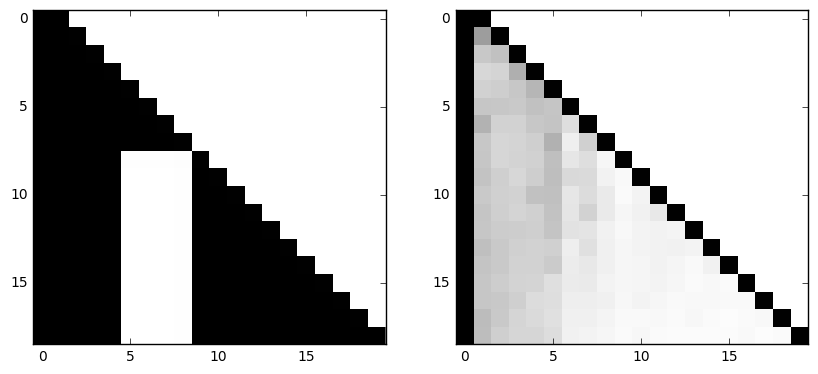

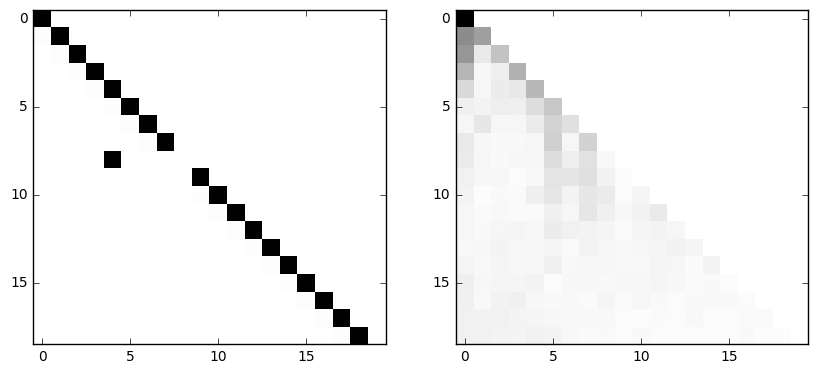

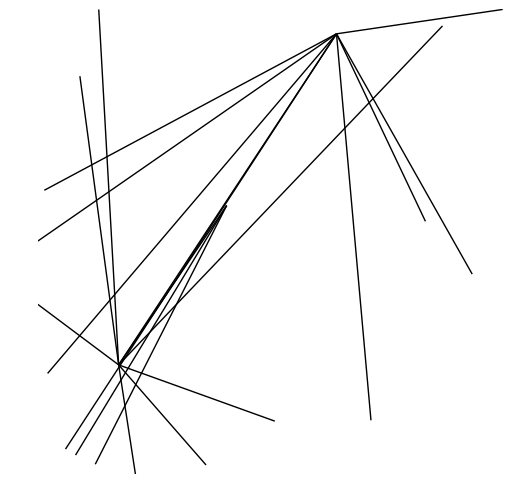

    After 20 iterations
        Discriminator Loss                         = -22292.5820312

    Generator_Loss: 23409.2832031
576
    After 20 iterations
        Discriminator Loss                         = -21989.46875

    Generator_Loss: 23295.65625
577
    After 20 iterations
        Discriminator Loss                         = -22104.9785156

    Generator_Loss: 23411.1347656
578
    After 20 iterations
        Discriminator Loss                         = -19955.2148438

    Generator_Loss: 23913.5410156
579
    After 20 iterations
        Discriminator Loss                         = -21779.5410156

    Generator_Loss: 23973.9589844
580
    After 20 iterations
        Discriminator Loss                         = -19758.4921875

    Generator_Loss: 23921.7089844
581
    After 20 iterations
        Discriminator Loss                         = -20162.1113281

    Generator_Loss: 23875.6484375
582
    After 20 iterations
        Discriminator Loss                         = -21578.164

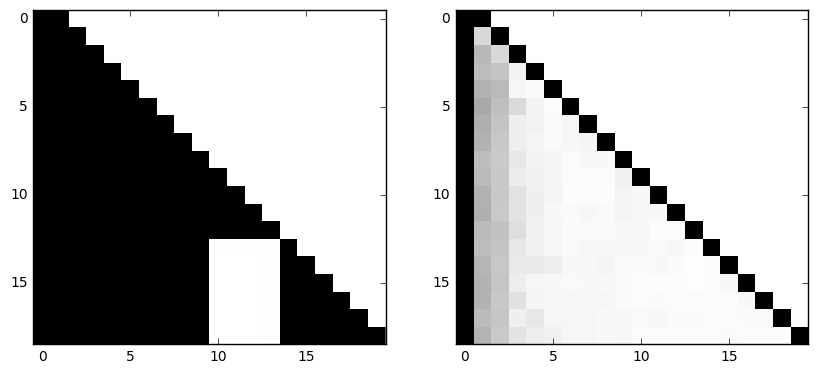

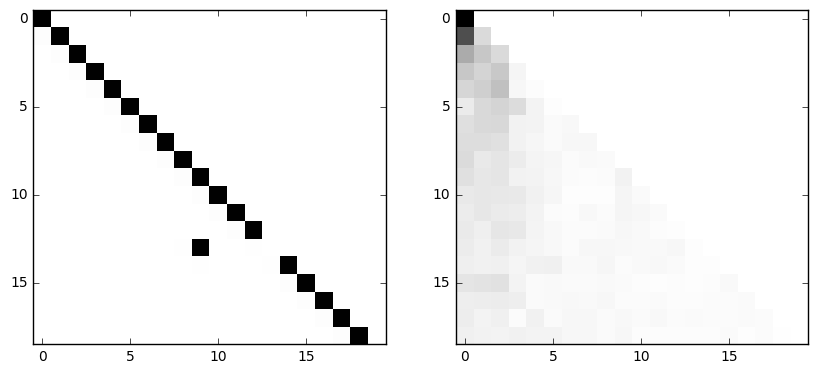

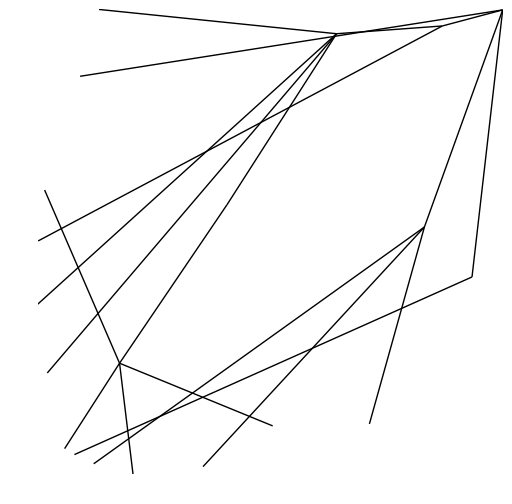

    After 20 iterations
        Discriminator Loss                         = -21117.6992188

    Generator_Loss: 24119.7871094
601
    After 20 iterations
        Discriminator Loss                         = -22342.65625

    Generator_Loss: 24108.6796875
602
    After 20 iterations
        Discriminator Loss                         = -22031.8183594

    Generator_Loss: 24122.2773438
603
    After 20 iterations
        Discriminator Loss                         = -21628.0957031

    Generator_Loss: 24204.8632812
604
    After 20 iterations
        Discriminator Loss                         = -22382.1523438

    Generator_Loss: 24224.1621094
605
    After 20 iterations
        Discriminator Loss                         = -22050.9746094

    Generator_Loss: 24216.6621094
606
    After 20 iterations
        Discriminator Loss                         = -21912.5664062

    Generator_Loss: 24158.09375
607
    After 20 iterations
        Discriminator Loss                         = -21201.605

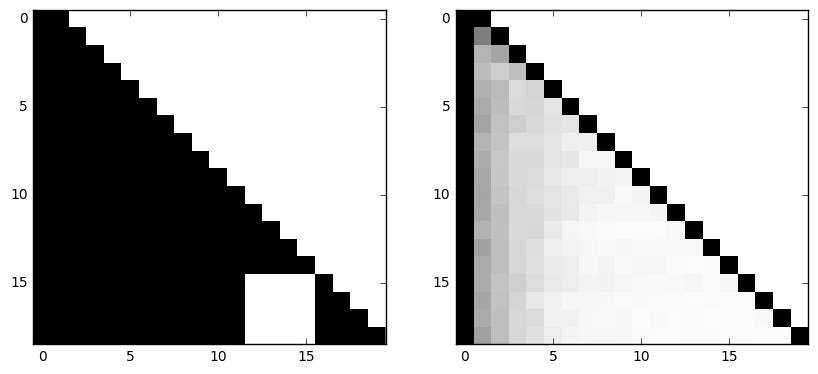

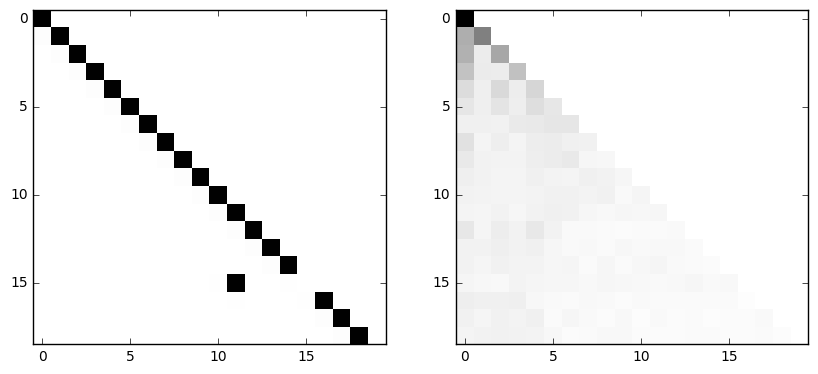

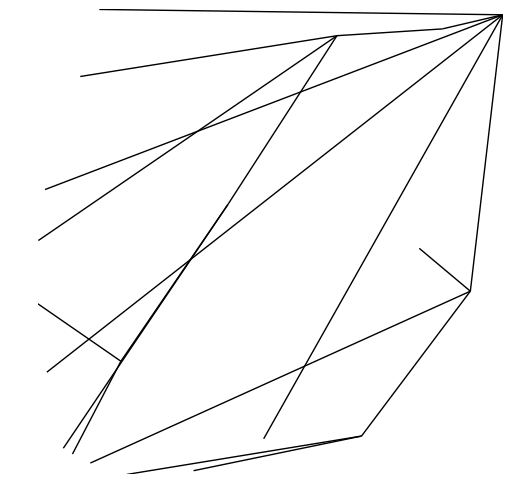

    After 20 iterations
        Discriminator Loss                         = -22944.3085938

    Generator_Loss: 24470.5058594
626
    After 20 iterations
        Discriminator Loss                         = -22299.5488281

    Generator_Loss: 24490.8769531
627
    After 20 iterations
        Discriminator Loss                         = -22441.8066406

    Generator_Loss: 24470.7109375
628
    After 20 iterations
        Discriminator Loss                         = -22665.4492188

    Generator_Loss: 24538.3359375
629
    After 20 iterations
        Discriminator Loss                         = -23195.5117188

    Generator_Loss: 24544.3125
630
    After 20 iterations
        Discriminator Loss                         = -22759.5976562

    Generator_Loss: 24572.9902344
631
    After 20 iterations
        Discriminator Loss                         = -22858.9082031

    Generator_Loss: 24579.1777344
632
    After 20 iterations
        Discriminator Loss                         = -22729.52

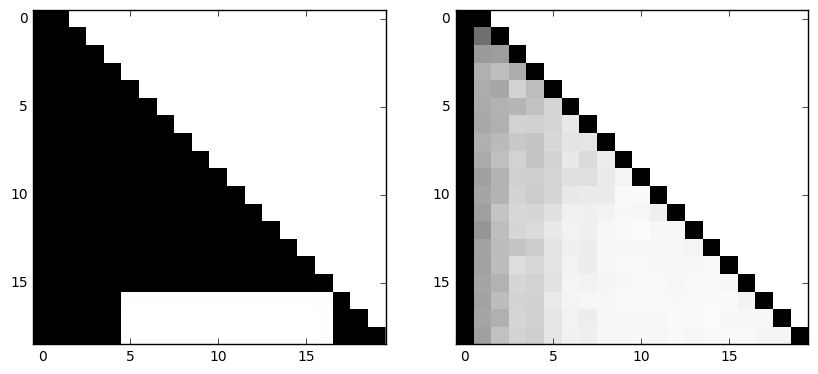

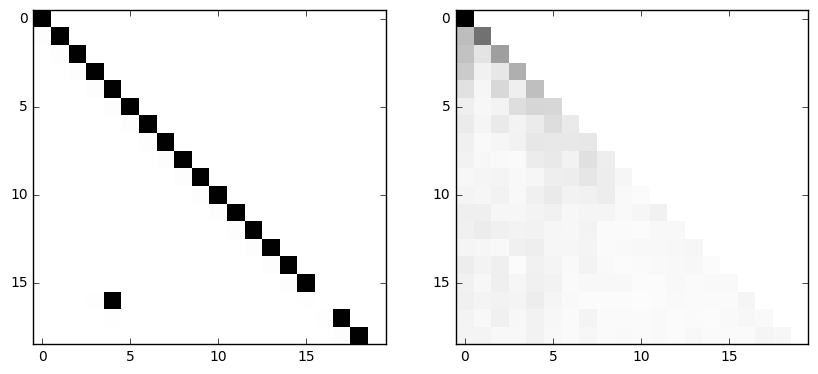

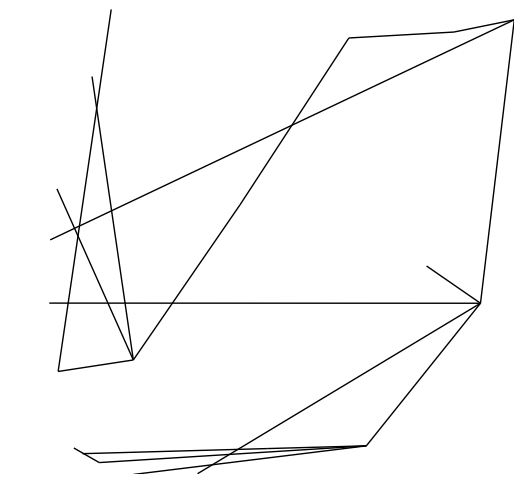

    After 20 iterations
        Discriminator Loss                         = -23601.578125

    Generator_Loss: 24877.0625
651
    After 20 iterations
        Discriminator Loss                         = -23295.8554688

    Generator_Loss: 24829.1640625
652
    After 20 iterations
        Discriminator Loss                         = -23443.0371094

    Generator_Loss: 24894.6074219
653
    After 20 iterations
        Discriminator Loss                         = -23425.4394531

    Generator_Loss: 24907.3945312
654
    After 20 iterations
        Discriminator Loss                         = -23516.5878906

    Generator_Loss: 24972.6503906
655
    After 20 iterations
        Discriminator Loss                         = -23670.84375

    Generator_Loss: 24975.953125
656
    After 20 iterations
        Discriminator Loss                         = -23713.8144531

    Generator_Loss: 24916.4589844
657
    After 20 iterations
        Discriminator Loss                         = -23368.583984

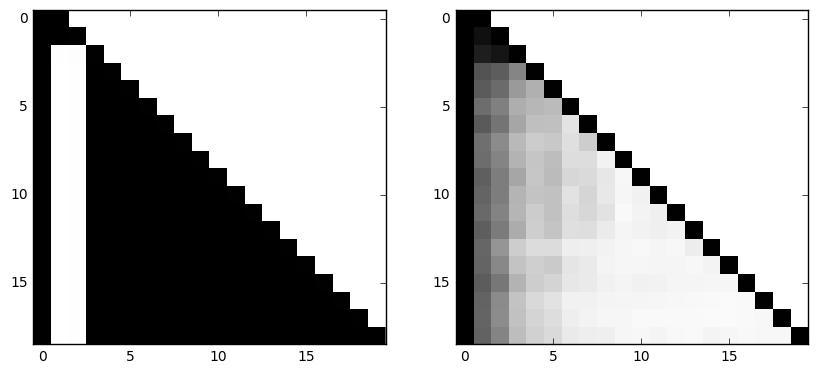

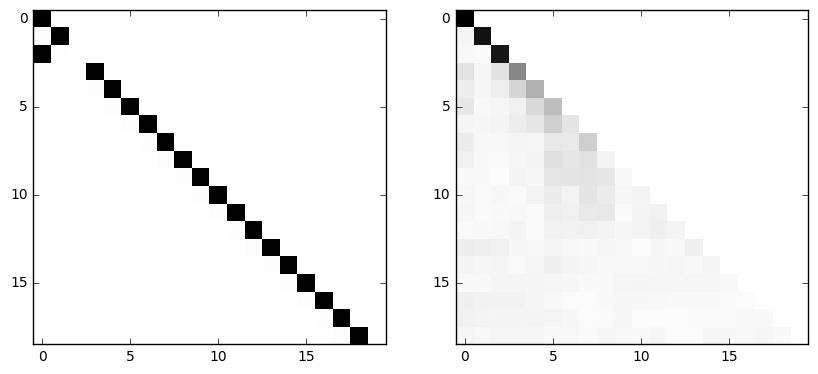

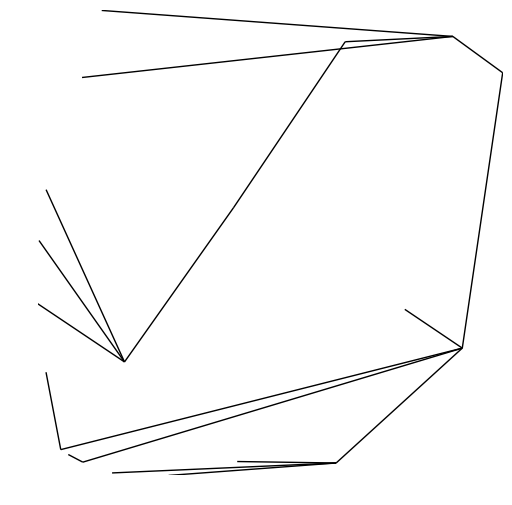

    After 20 iterations
        Discriminator Loss                         = -23350.5214844

    Generator_Loss: 25204.9355469
676
    After 20 iterations
        Discriminator Loss                         = -23741.9335938

    Generator_Loss: 25223.6230469
677
    After 20 iterations
        Discriminator Loss                         = -23924.9902344

    Generator_Loss: 25271.6074219
678
    After 20 iterations
        Discriminator Loss                         = -23840.7363281

    Generator_Loss: 25204.6953125
679
    After 20 iterations
        Discriminator Loss                         = -24216.4589844

    Generator_Loss: 25269.9082031
680
    After 20 iterations
        Discriminator Loss                         = -23713.4824219

    Generator_Loss: 25294.6835938
681
    After 20 iterations
        Discriminator Loss                         = -23976.5058594

    Generator_Loss: 25273.9316406
682
    After 20 iterations
        Discriminator Loss                         = -23449

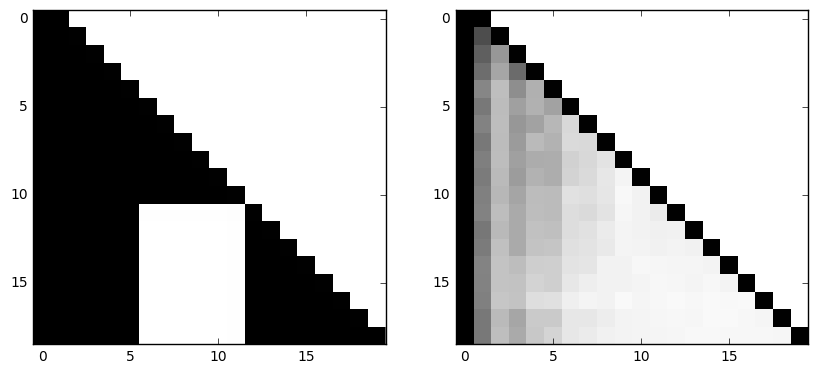

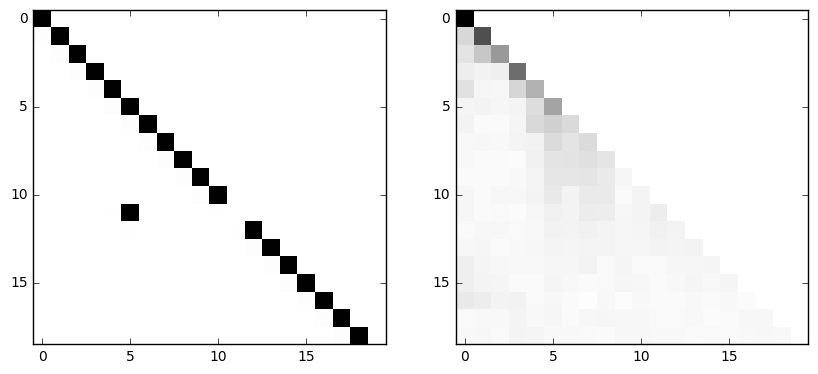

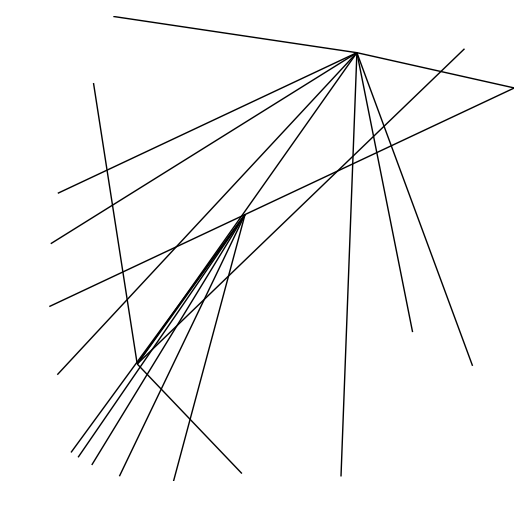

    After 20 iterations
        Discriminator Loss                         = -24258.2929688

    Generator_Loss: 25497.8203125
701
    After 20 iterations
        Discriminator Loss                         = -24575.734375

    Generator_Loss: 25558.9863281
702
    After 20 iterations
        Discriminator Loss                         = -24216.0429688

    Generator_Loss: 25550.9882812
703
    After 20 iterations
        Discriminator Loss                         = -24449.5917969

    Generator_Loss: 25633.7441406
704
    After 20 iterations
        Discriminator Loss                         = -24449.6738281

    Generator_Loss: 25623.6621094
705
    After 20 iterations
        Discriminator Loss                         = -24360.3085938

    Generator_Loss: 25575.5722656
706
    After 20 iterations
        Discriminator Loss                         = -24517.7167969

    Generator_Loss: 25699.4570312
707
    After 20 iterations
        Discriminator Loss                         = -24594.

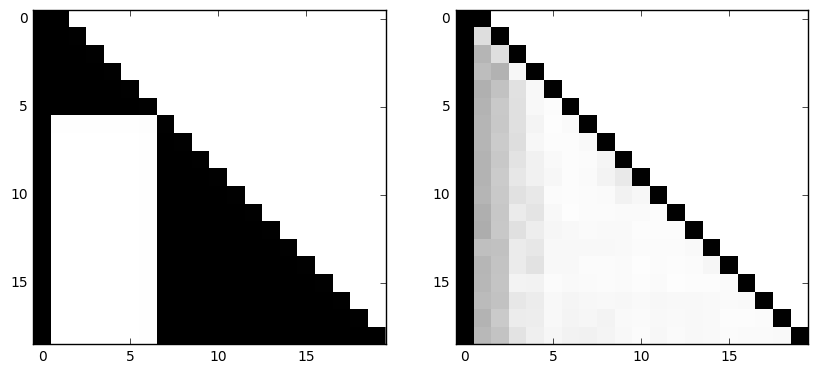

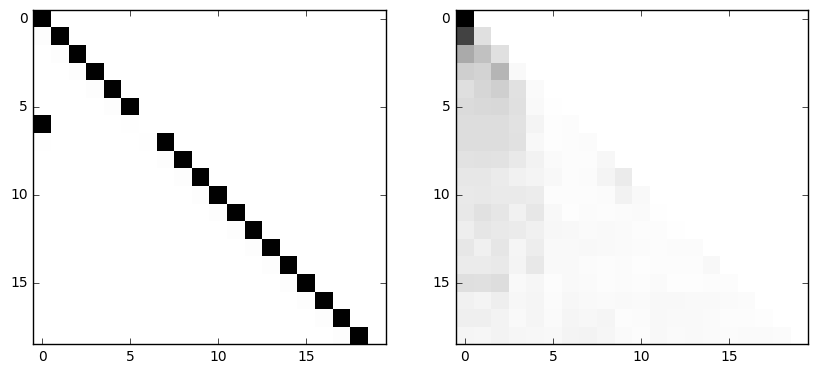

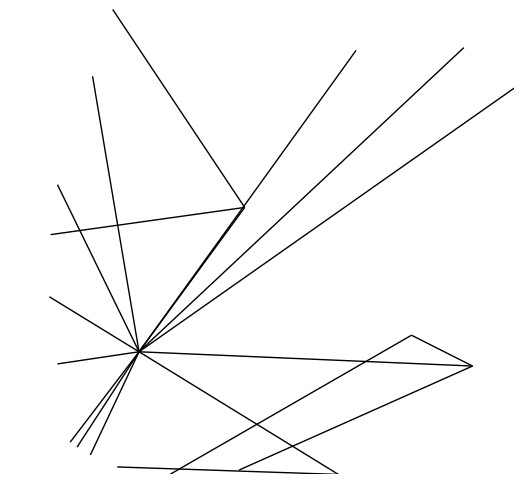

    After 20 iterations
        Discriminator Loss                         = -24814.1425781

    Generator_Loss: 24630.25
726
    After 20 iterations
        Discriminator Loss                         = -24635.9355469

    Generator_Loss: 24642.65625
727
    After 20 iterations
        Discriminator Loss                         = -24088.5351562

    Generator_Loss: 25979.0
728
    After 20 iterations
        Discriminator Loss                         = -24914.3730469

    Generator_Loss: 25867.9121094
729
    After 20 iterations
        Discriminator Loss                         = -24579.8203125

    Generator_Loss: 26062.4140625
730
    After 20 iterations
        Discriminator Loss                         = -24599.03125

    Generator_Loss: 26024.5175781
731
    After 20 iterations
        Discriminator Loss                         = -24401.3007812

    Generator_Loss: 25965.2636719
732
    After 20 iterations
        Discriminator Loss                         = -24519.4433594

    G

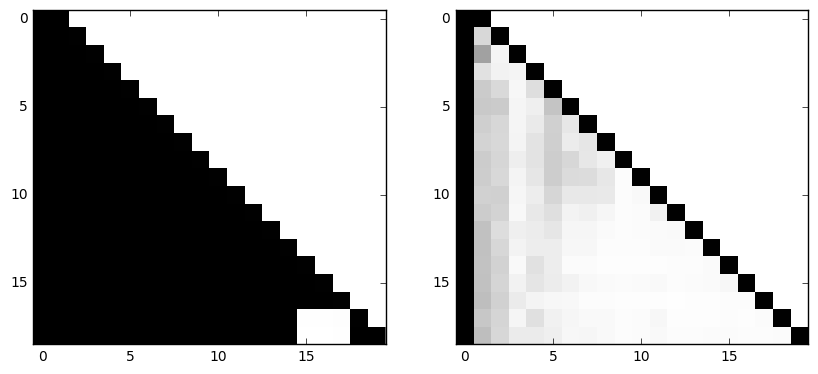

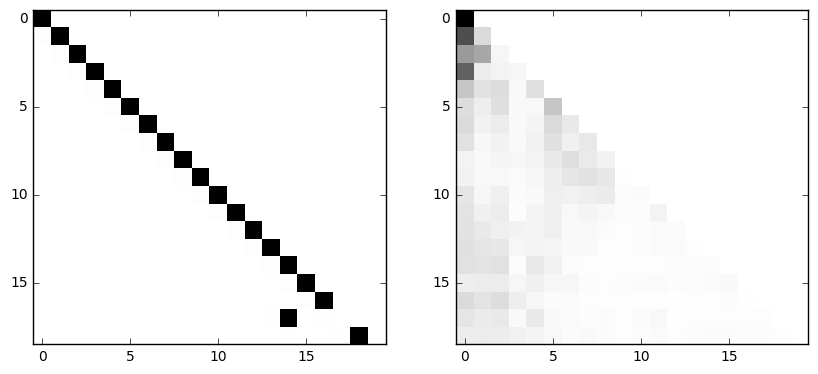

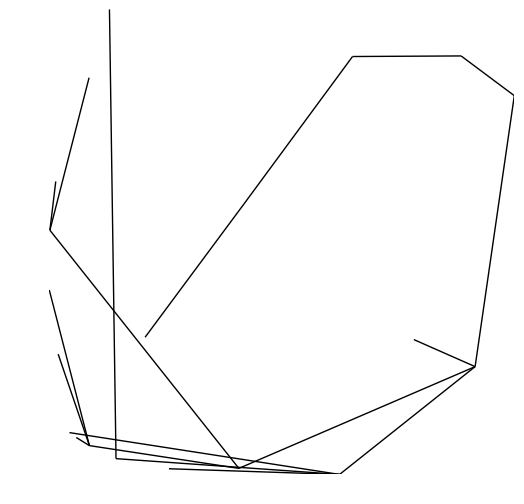

    After 20 iterations
        Discriminator Loss                         = -24274.2441406

    Generator_Loss: 24989.1289062
751
    After 20 iterations
        Discriminator Loss                         = -24164.9082031

    Generator_Loss: 20757.3515625
752
    After 20 iterations
        Discriminator Loss                         = -24523.8613281

    Generator_Loss: 26195.3808594
753
    After 20 iterations
        Discriminator Loss                         = -24678.2851562

    Generator_Loss: 26206.6464844
754
    After 20 iterations
        Discriminator Loss                         = -24419.8964844

    Generator_Loss: 24992.5722656
755
    After 20 iterations
        Discriminator Loss                         = -24602.0371094

    Generator_Loss: 23060.015625
756
    After 20 iterations
        Discriminator Loss                         = -24068.328125

    Generator_Loss: 26156.7871094
757
    After 20 iterations
        Discriminator Loss                         = -24168.5

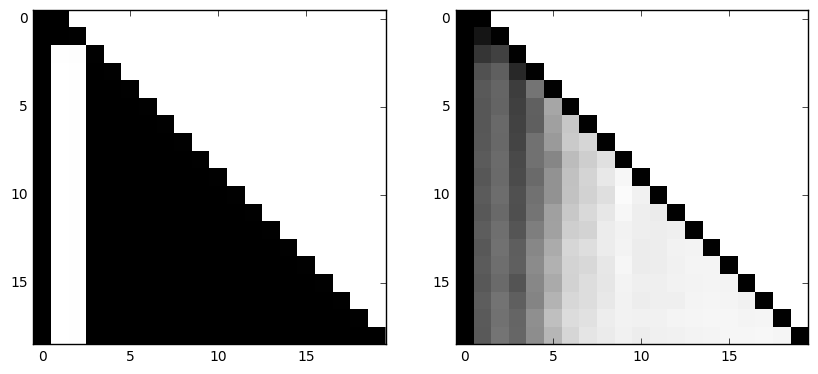

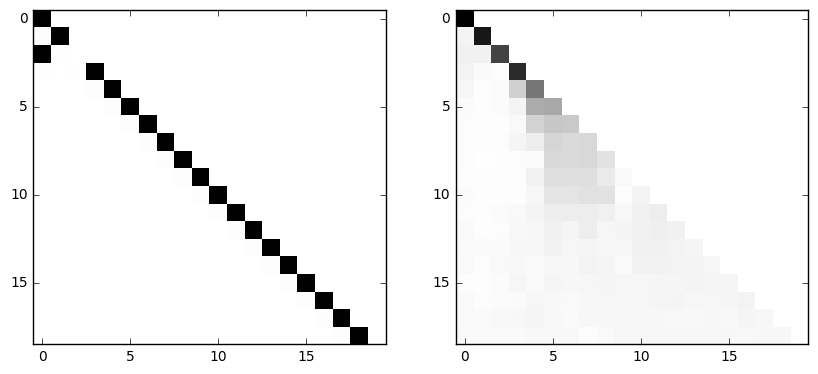

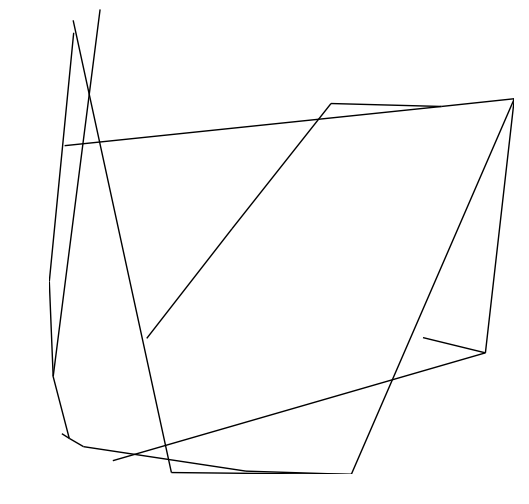

    After 20 iterations
        Discriminator Loss                         = -23504.3066406

    Generator_Loss: 24676.3613281
776
    After 20 iterations
        Discriminator Loss                         = -23740.1308594

    Generator_Loss: 25017.03125
777
    After 20 iterations
        Discriminator Loss                         = -24752.8613281

    Generator_Loss: 23090.6914062
778
    After 20 iterations
        Discriminator Loss                         = -22627.0351562

    Generator_Loss: 24529.734375
779
    After 20 iterations
        Discriminator Loss                         = -24025.1464844

    Generator_Loss: 24377.5429688
780
    After 20 iterations
        Discriminator Loss                         = -23487.0449219

    Generator_Loss: 24324.1816406
781
    After 20 iterations
        Discriminator Loss                         = -22289.9609375

    Generator_Loss: 26245.1445312
782
    After 20 iterations
        Discriminator Loss                         = -23583.15

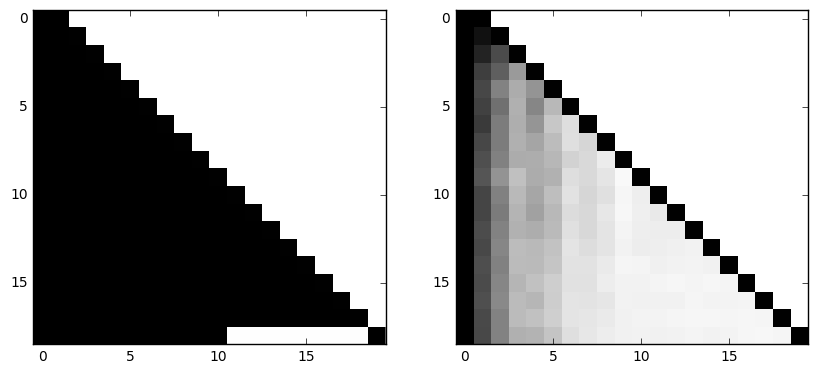

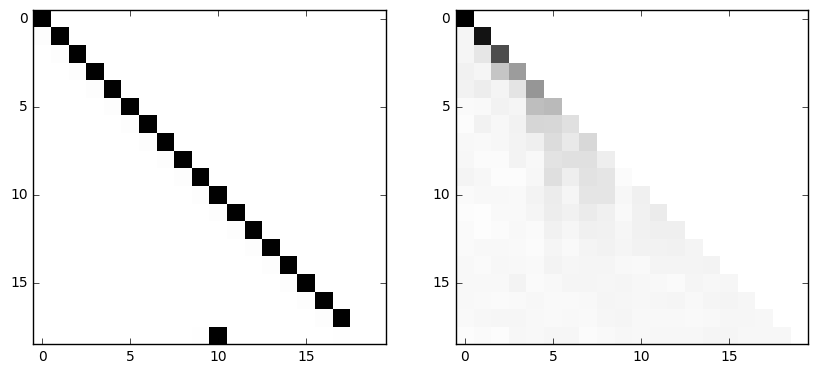

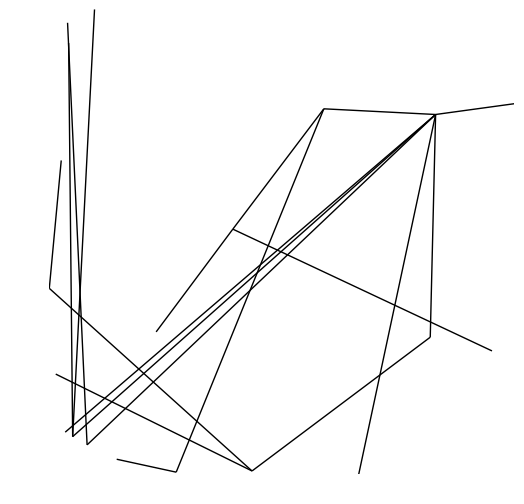

    After 20 iterations
        Discriminator Loss                         = -24892.6992188

    Generator_Loss: 26686.3652344
801
    After 20 iterations
        Discriminator Loss                         = -24147.1386719

    Generator_Loss: 26633.734375
802
    After 20 iterations
        Discriminator Loss                         = -24113.5644531

    Generator_Loss: 26795.5683594
803
    After 20 iterations
        Discriminator Loss                         = -24554.6308594

    Generator_Loss: 26853.5996094
804
    After 20 iterations
        Discriminator Loss                         = -24303.4160156

    Generator_Loss: 26828.5898438
805
    After 20 iterations
        Discriminator Loss                         = -24883.3789062

    Generator_Loss: 25591.9257812
806
    After 20 iterations
        Discriminator Loss                         = -24114.328125

    Generator_Loss: 26781.65625
807
    After 20 iterations
        Discriminator Loss                         = -24134.496

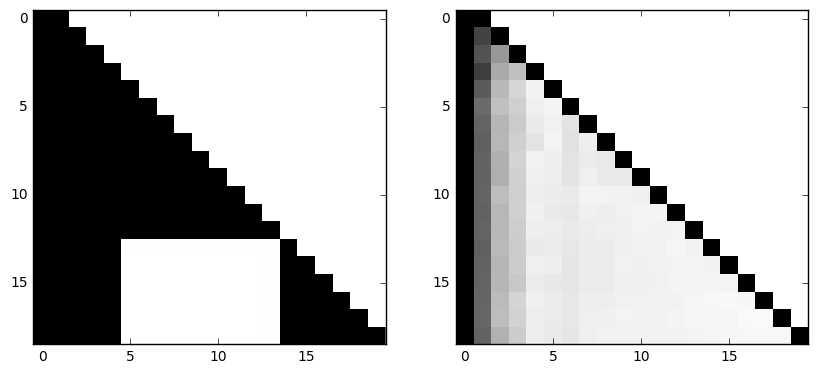

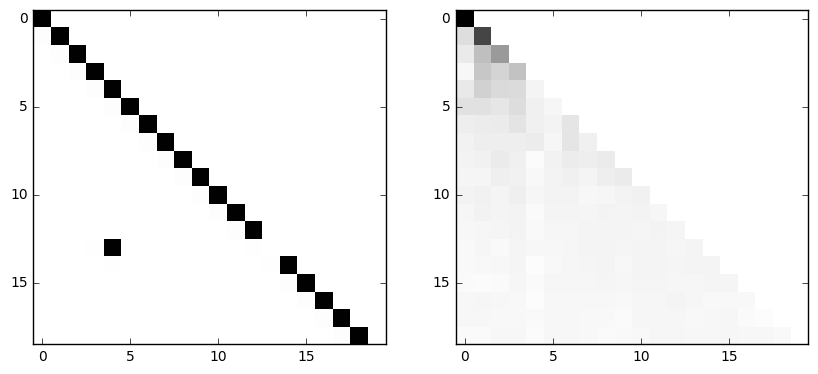

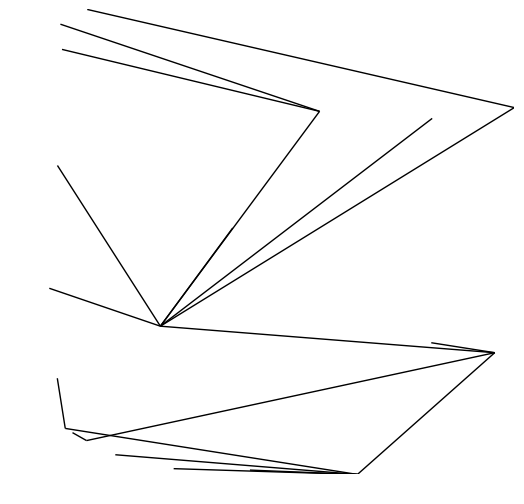

    After 20 iterations
        Discriminator Loss                         = -25413.4492188

    Generator_Loss: 25825.4296875
826
    After 20 iterations
        Discriminator Loss                         = -24433.9238281

    Generator_Loss: 25896.2871094
827
    After 20 iterations
        Discriminator Loss                         = -23371.7519531

    Generator_Loss: 27132.9589844
828
    After 20 iterations
        Discriminator Loss                         = -25348.4980469

    Generator_Loss: 27121.0253906
829
    After 20 iterations
        Discriminator Loss                         = -24816.9472656

    Generator_Loss: 27597.390625
830
    After 20 iterations
        Discriminator Loss                         = -25310.4824219

    Generator_Loss: 27345.0273438
831
    After 20 iterations
        Discriminator Loss                         = -25272.1953125

    Generator_Loss: 27329.4589844
832
    After 20 iterations
        Discriminator Loss                         = -25372.

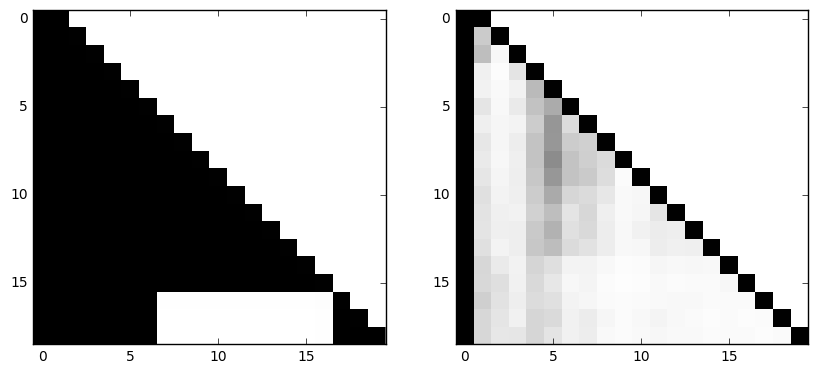

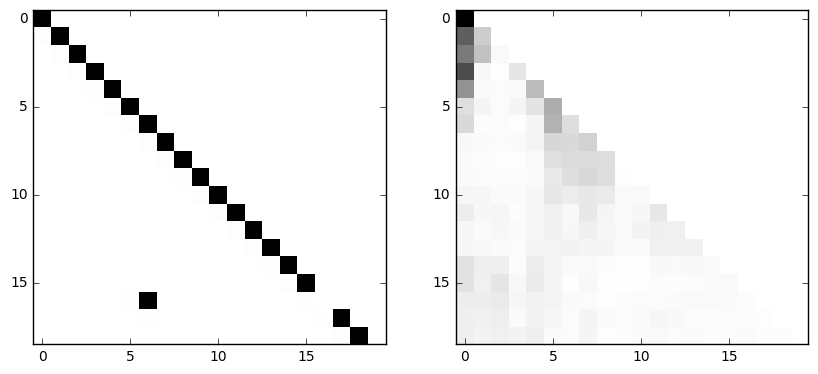

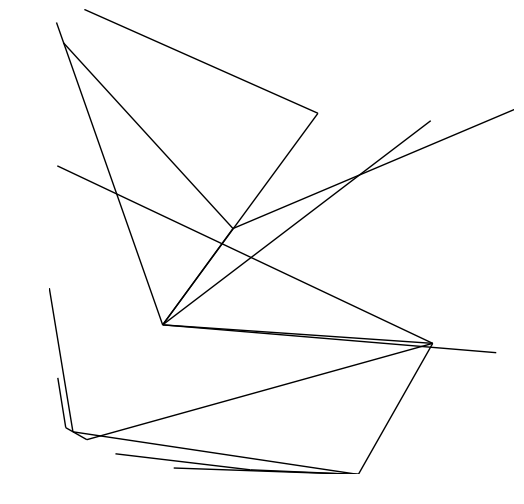

    After 20 iterations
        Discriminator Loss                         = -25243.5625

    Generator_Loss: 27703.7285156
851
    After 20 iterations
        Discriminator Loss                         = -25527.84375

    Generator_Loss: 27464.015625
852
    After 20 iterations
        Discriminator Loss                         = -25963.5351562

    Generator_Loss: 27660.5332031
853
    After 20 iterations
        Discriminator Loss                         = -25891.3007812

    Generator_Loss: 27730.5996094
854
    After 20 iterations
        Discriminator Loss                         = -26351.078125

    Generator_Loss: 27858.5585938
855
    After 20 iterations
        Discriminator Loss                         = -25855.7363281

    Generator_Loss: 27615.7011719
856
    After 20 iterations
        Discriminator Loss                         = -25606.0742188

    Generator_Loss: 27738.7167969
857
    After 20 iterations
        Discriminator Loss                         = -26050.896484

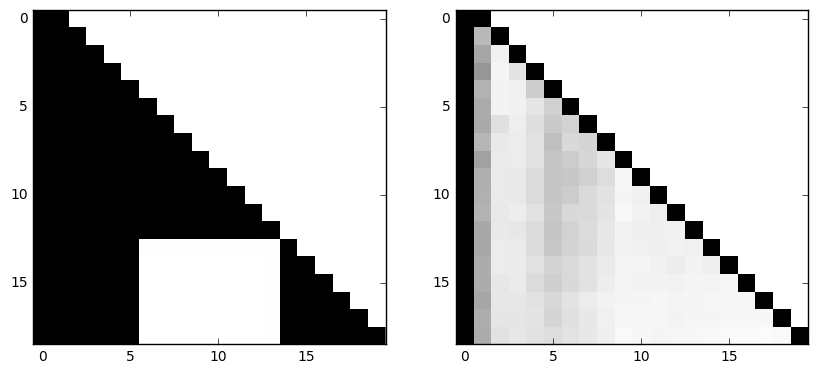

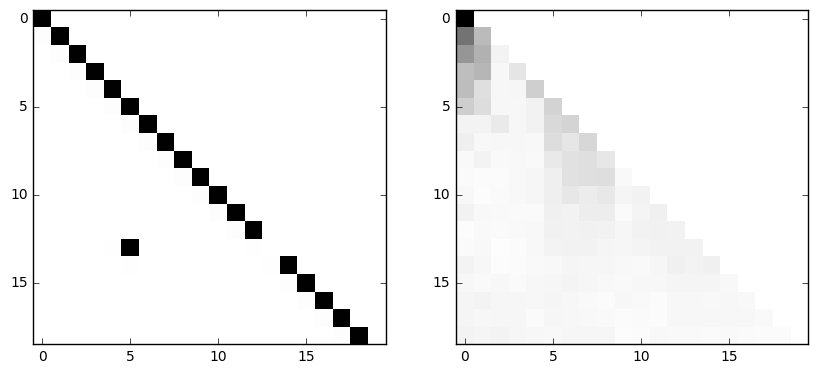

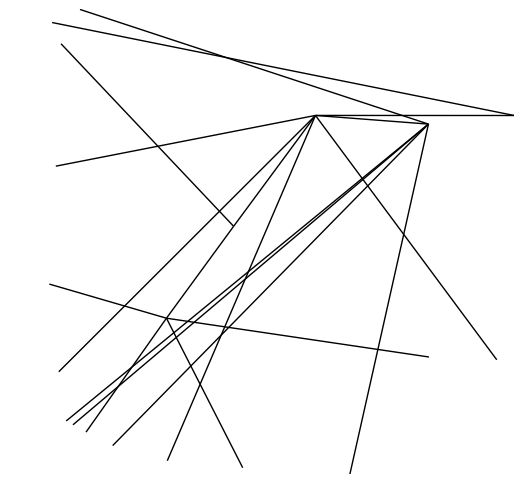

    After 20 iterations
        Discriminator Loss                         = -26461.5683594

    Generator_Loss: 28185.5800781
876
    After 20 iterations
        Discriminator Loss                         = -26396.1347656

    Generator_Loss: 27873.5332031
877
    After 20 iterations
        Discriminator Loss                         = -26467.1191406

    Generator_Loss: 28088.3144531
878
    After 20 iterations
        Discriminator Loss                         = -26264.2265625

    Generator_Loss: 28206.59375
879
    After 20 iterations
        Discriminator Loss                         = -26305.8535156

    Generator_Loss: 28040.359375
880
    After 20 iterations
        Discriminator Loss                         = -26750.4882812

    Generator_Loss: 28141.8808594
881
    After 20 iterations
        Discriminator Loss                         = -26233.8574219

    Generator_Loss: 28554.6914062
882
    After 20 iterations
        Discriminator Loss                         = -26387.70

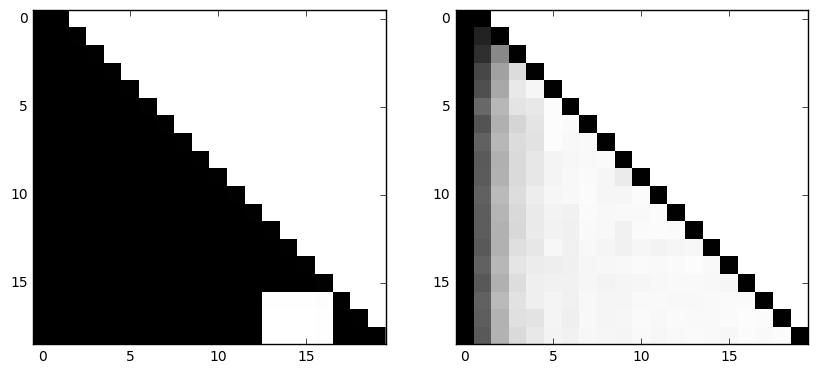

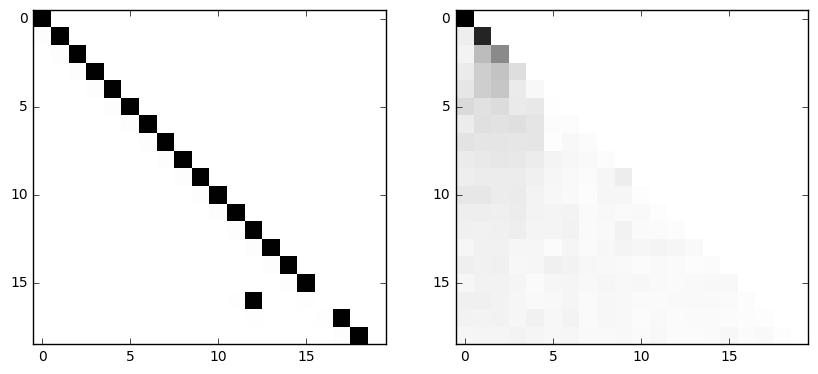

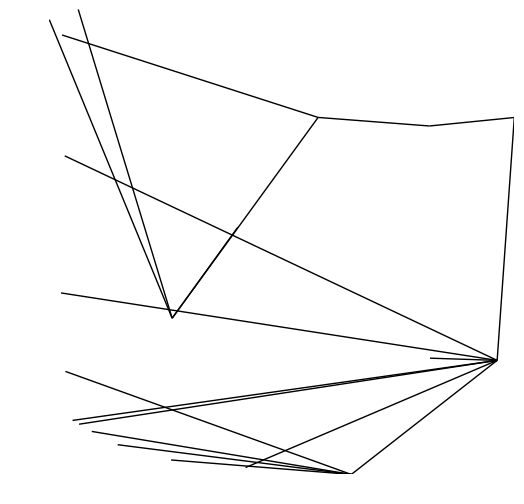

    After 20 iterations
        Discriminator Loss                         = -26624.4980469

    Generator_Loss: 28609.4863281
901
    After 20 iterations
        Discriminator Loss                         = -26723.8574219

    Generator_Loss: 28635.3417969
902
    After 20 iterations
        Discriminator Loss                         = -26830.3769531

    Generator_Loss: 28462.8085938
903
    After 20 iterations
        Discriminator Loss                         = -26045.2382812

    Generator_Loss: 28664.3046875
904
    After 20 iterations
        Discriminator Loss                         = -26917.3398438

    Generator_Loss: 28529.4335938
905
    After 20 iterations
        Discriminator Loss                         = -26931.3027344

    Generator_Loss: 28683.2890625
906
    After 20 iterations
        Discriminator Loss                         = -26934.1308594

    Generator_Loss: 28622.5175781
907
    After 20 iterations
        Discriminator Loss                         = -27115

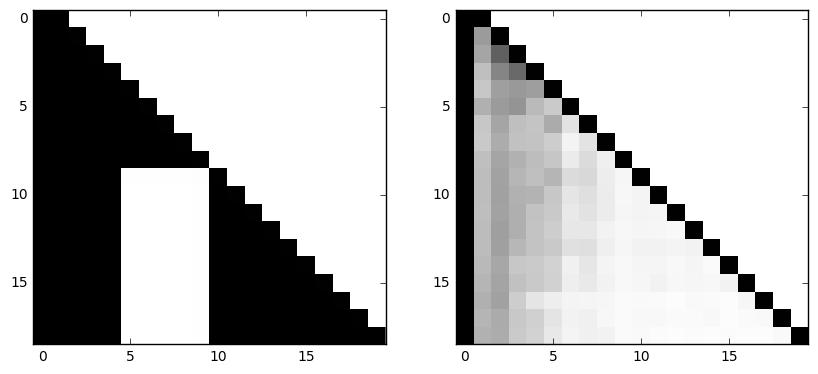

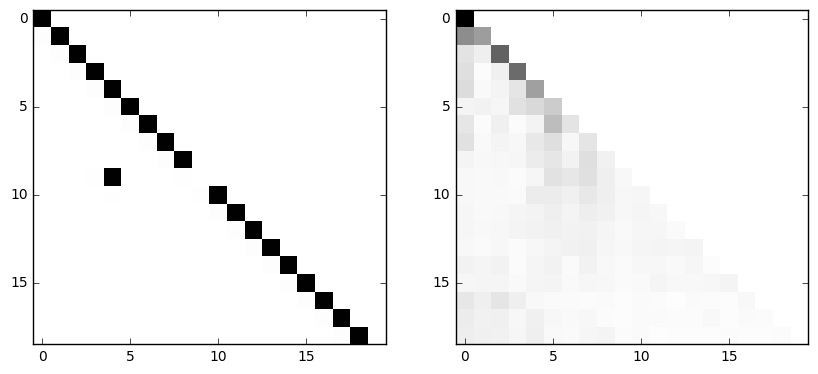

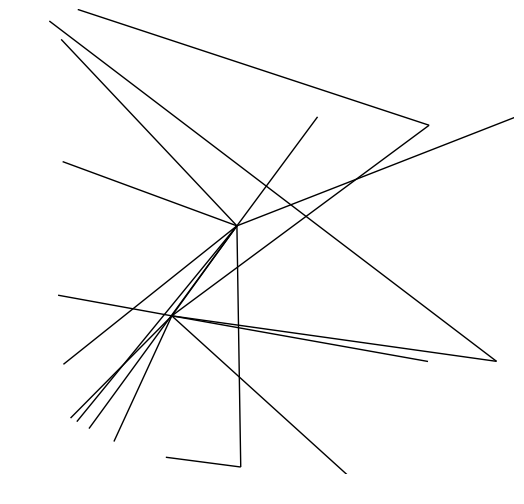

    After 20 iterations
        Discriminator Loss                         = -27305.3261719

    Generator_Loss: 28853.1738281
926
    After 20 iterations
        Discriminator Loss                         = -27368.421875

    Generator_Loss: 29119.84375
927
    After 20 iterations
        Discriminator Loss                         = -27201.5253906

    Generator_Loss: 29081.2421875
928
    After 20 iterations
        Discriminator Loss                         = -27641.7382812

    Generator_Loss: 29076.2421875
929
    After 20 iterations
        Discriminator Loss                         = -27564.9960938

    Generator_Loss: 28855.234375
930
    After 20 iterations
        Discriminator Loss                         = -26906.7949219

    Generator_Loss: 29111.3339844
931
    After 20 iterations
        Discriminator Loss                         = -27409.7402344

    Generator_Loss: 29030.7363281
932
    After 20 iterations
        Discriminator Loss                         = -27056.216

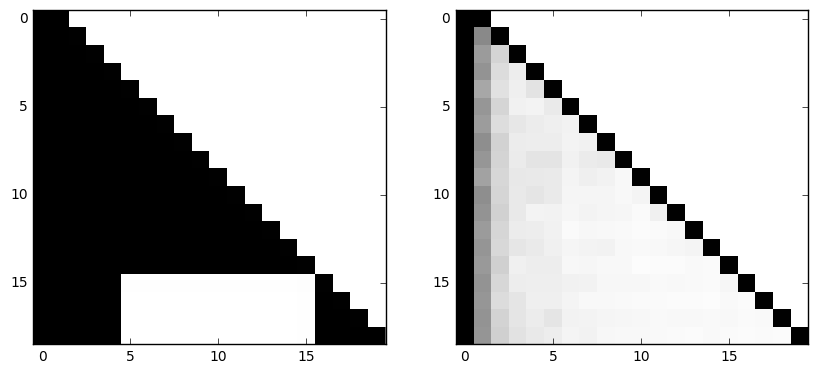

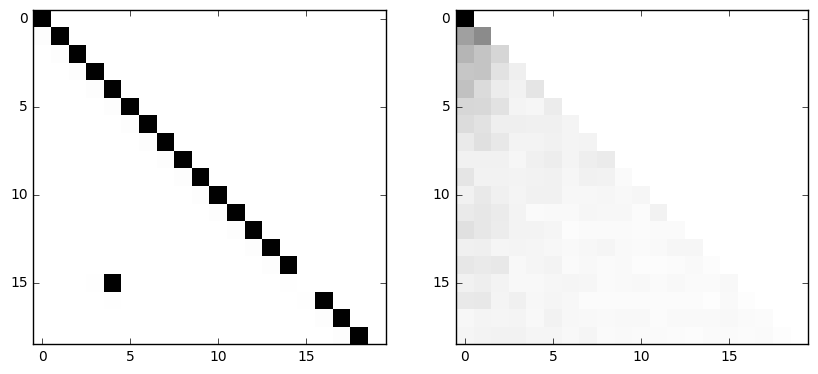

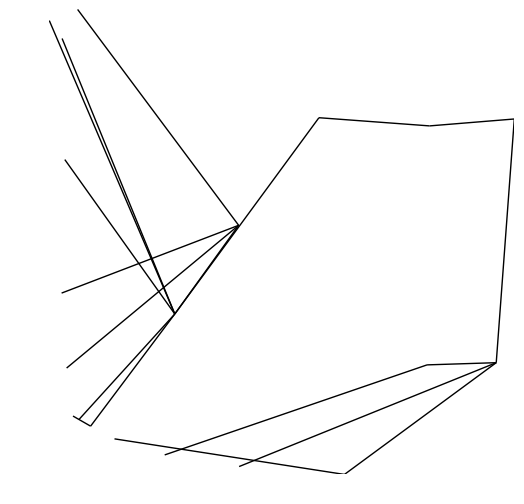

    After 20 iterations
        Discriminator Loss                         = -27706.3359375

    Generator_Loss: 29400.8164062
951
    After 20 iterations
        Discriminator Loss                         = -27971.0585938

    Generator_Loss: 28953.9492188
952
    After 20 iterations
        Discriminator Loss                         = -27931.8300781

    Generator_Loss: 29425.5527344
953
    After 20 iterations
        Discriminator Loss                         = -27744.0664062

    Generator_Loss: 29238.3222656
954
    After 20 iterations
        Discriminator Loss                         = -27610.7089844

    Generator_Loss: 29313.84375
955
    After 20 iterations
        Discriminator Loss                         = -27971.1269531

    Generator_Loss: 29464.2070312
956
    After 20 iterations
        Discriminator Loss                         = -28077.8085938

    Generator_Loss: 29366.3242188
957
    After 20 iterations
        Discriminator Loss                         = -28132.1

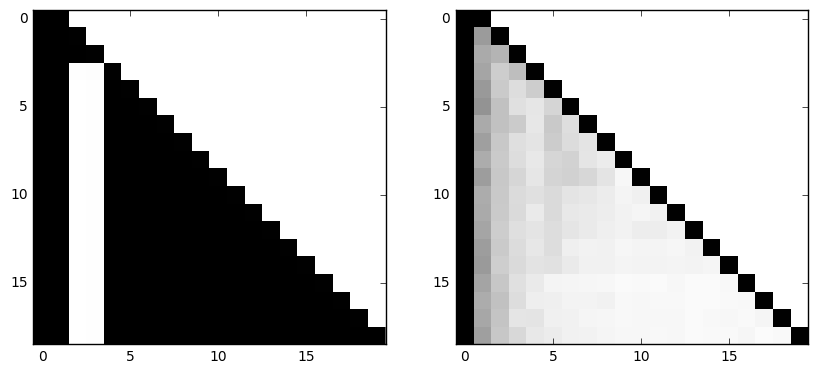

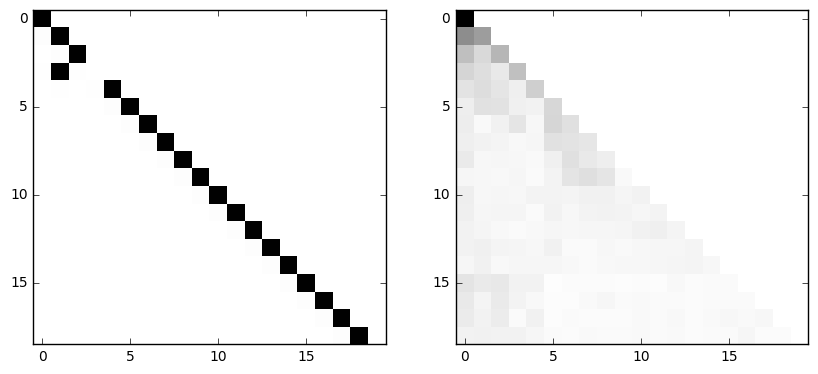

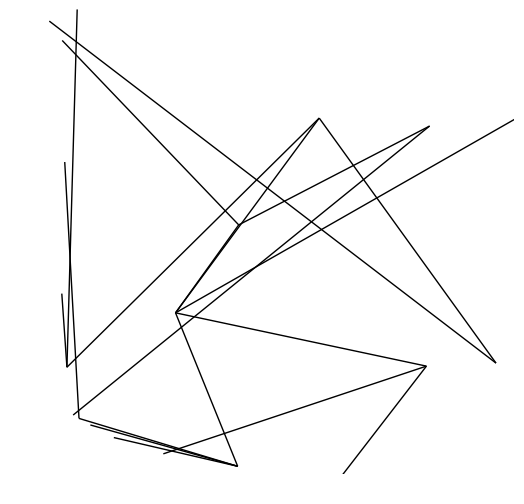

    After 20 iterations
        Discriminator Loss                         = -27863.2636719

    Generator_Loss: 29797.5058594
976
    After 20 iterations
        Discriminator Loss                         = -28450.8632812

    Generator_Loss: 29770.8945312
977
    After 20 iterations
        Discriminator Loss                         = -28504.9335938

    Generator_Loss: 29574.40625
978
    After 20 iterations
        Discriminator Loss                         = -28193.1660156

    Generator_Loss: 29575.765625
979
    After 20 iterations
        Discriminator Loss                         = -28386.7265625

    Generator_Loss: 29786.4589844
980
    After 20 iterations
        Discriminator Loss                         = -28196.1777344

    Generator_Loss: 29758.421875
981
    After 20 iterations
        Discriminator Loss                         = -28002.8847656

    Generator_Loss: 29840.2988281
982
    After 20 iterations
        Discriminator Loss                         = -28122.177

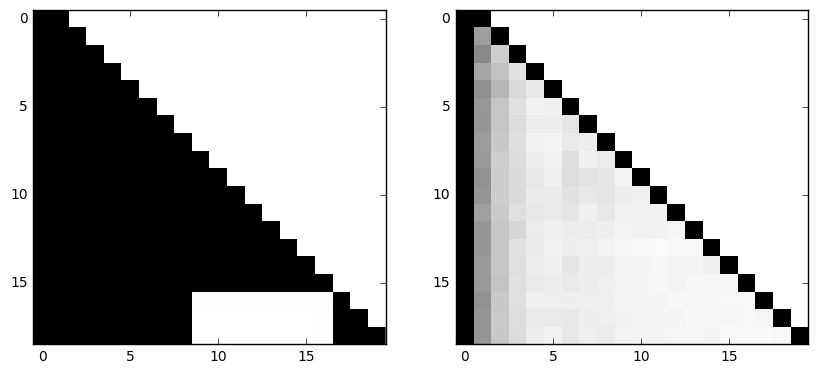

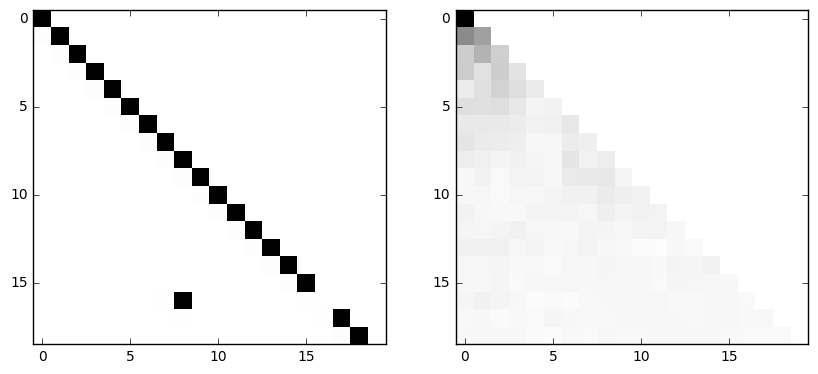

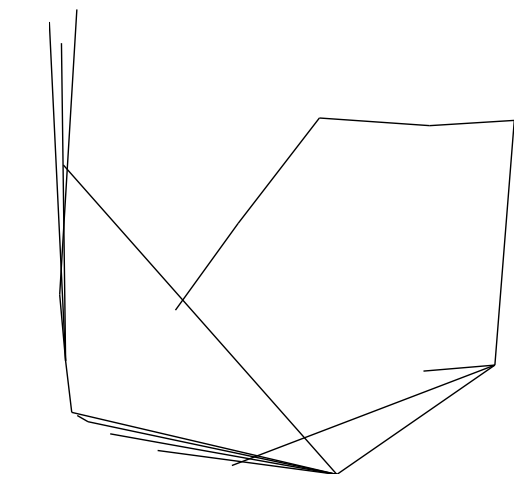

    After 20 iterations
        Discriminator Loss                         = -28357.984375

    Generator_Loss: 29918.6445312
1001
    After 20 iterations
        Discriminator Loss                         = -28519.0332031

    Generator_Loss: 30075.8125
1002
    After 20 iterations
        Discriminator Loss                         = -28483.5742188

    Generator_Loss: 30014.0820312
1003
    After 20 iterations
        Discriminator Loss                         = -28631.8300781

    Generator_Loss: 29982.0332031
1004
    After 20 iterations
        Discriminator Loss                         = -28693.3027344

    Generator_Loss: 30142.7988281
1005
    After 20 iterations
        Discriminator Loss                         = -28656.71875

    Generator_Loss: 29961.9140625
1006
    After 20 iterations
        Discriminator Loss                         = -28642.671875

    Generator_Loss: 30278.40625
1007
    After 20 iterations
        Discriminator Loss                         = -28154.3

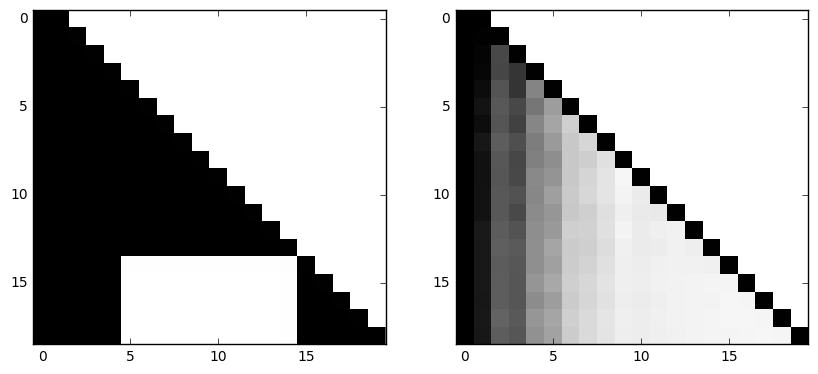

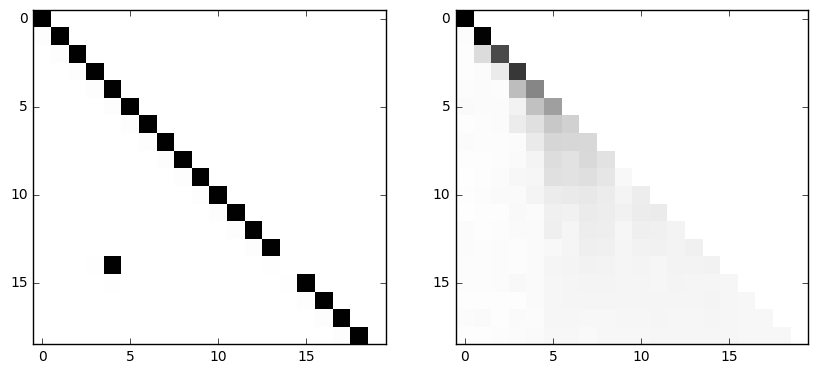

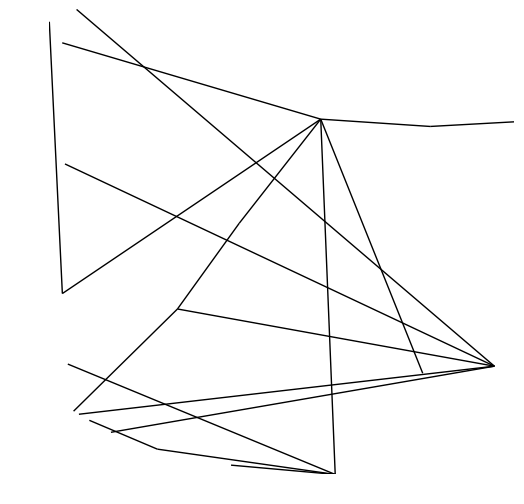

    After 20 iterations
        Discriminator Loss                         = -29092.0996094

    Generator_Loss: 30421.5039062
1026
    After 20 iterations
        Discriminator Loss                         = -28876.4550781

    Generator_Loss: 30228.6894531
1027
    After 20 iterations
        Discriminator Loss                         = -28468.6835938

    Generator_Loss: 30425.8554688
1028
    After 20 iterations
        Discriminator Loss                         = -28891.515625

    Generator_Loss: 30380.265625
1029
    After 20 iterations
        Discriminator Loss                         = -28817.8261719

    Generator_Loss: 30341.3886719
1030
    After 20 iterations
        Discriminator Loss                         = -28673.1347656

    Generator_Loss: 30387.2851562
1031
    After 20 iterations
        Discriminator Loss                         = -29178.78125

    Generator_Loss: 30507.1074219
1032
    After 20 iterations
        Discriminator Loss                         = -28

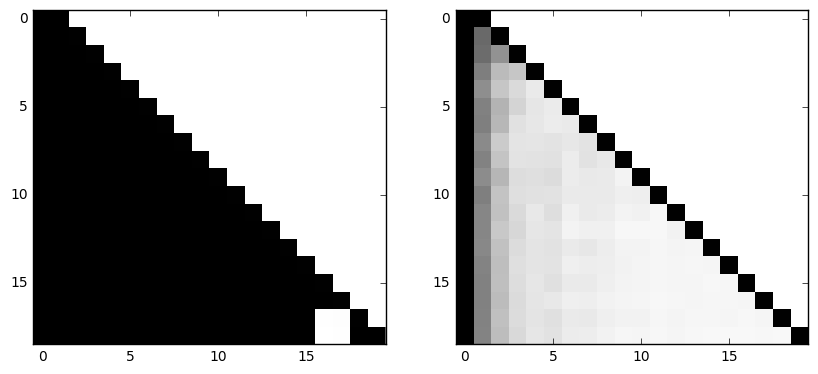

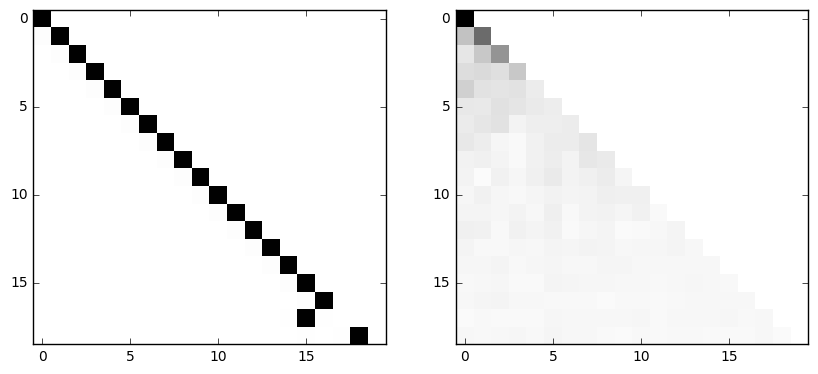

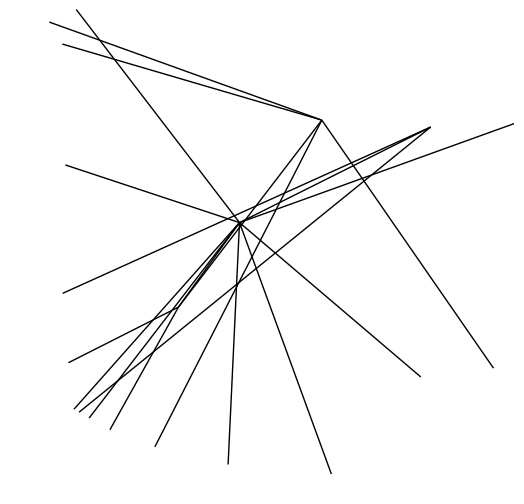

    After 20 iterations
        Discriminator Loss                         = -29089.859375

    Generator_Loss: 30483.3613281
1051
    After 20 iterations
        Discriminator Loss                         = -28890.9902344

    Generator_Loss: 30792.9882812
1052
    After 20 iterations
        Discriminator Loss                         = -29266.125

    Generator_Loss: 30764.6210938
1053
    After 20 iterations
        Discriminator Loss                         = -29110.8300781

    Generator_Loss: 30752.7988281
1054
    After 20 iterations
        Discriminator Loss                         = -28845.921875

    Generator_Loss: 30591.6738281
1055
    After 20 iterations
        Discriminator Loss                         = -29168.4863281

    Generator_Loss: 30778.7304688
1056
    After 20 iterations
        Discriminator Loss                         = -29231.5449219

    Generator_Loss: 30773.3378906
1057
    After 20 iterations
        Discriminator Loss                         = -2932

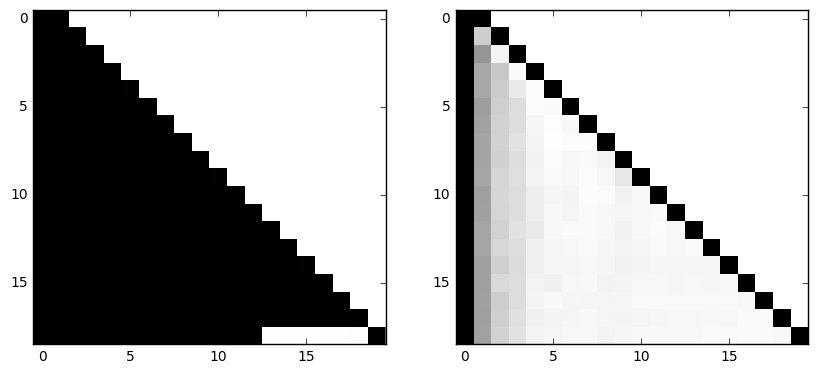

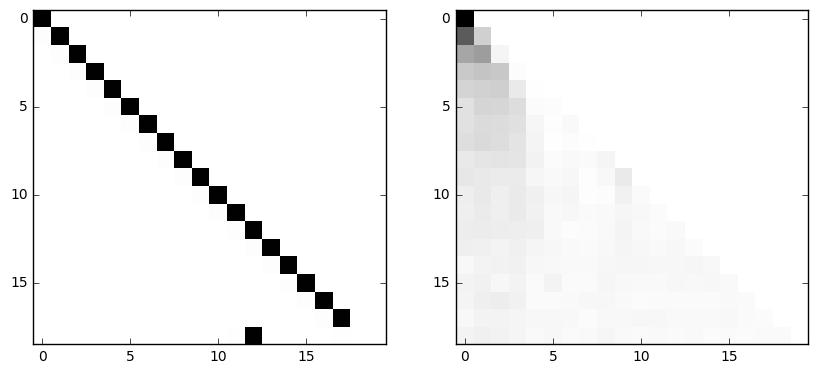

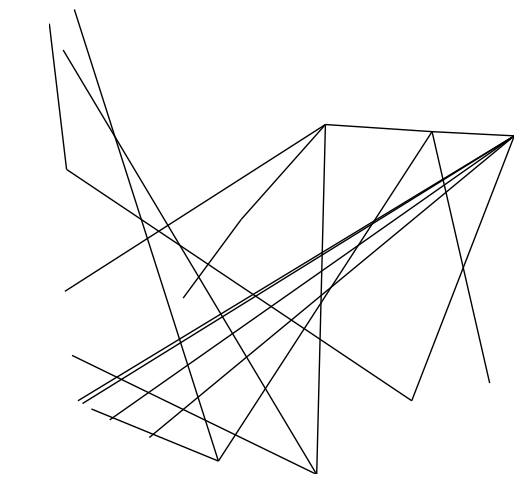

    After 20 iterations
        Discriminator Loss                         = -28704.9902344

    Generator_Loss: 30976.5332031
1076
    After 20 iterations
        Discriminator Loss                         = -29408.6953125

    Generator_Loss: 31105.7226562
1077
    After 20 iterations
        Discriminator Loss                         = -28919.0273438

    Generator_Loss: 31107.4042969
1078
    After 20 iterations
        Discriminator Loss                         = -29233.8300781

    Generator_Loss: 30865.546875
1079
    After 20 iterations
        Discriminator Loss                         = -29076.6152344

    Generator_Loss: 31178.7265625
1080
    After 20 iterations
        Discriminator Loss                         = -29313.6777344

    Generator_Loss: 30965.2441406
1081
    After 20 iterations
        Discriminator Loss                         = -28770.8261719

    Generator_Loss: 31116.4746094
1082
    After 20 iterations
        Discriminator Loss                         = 

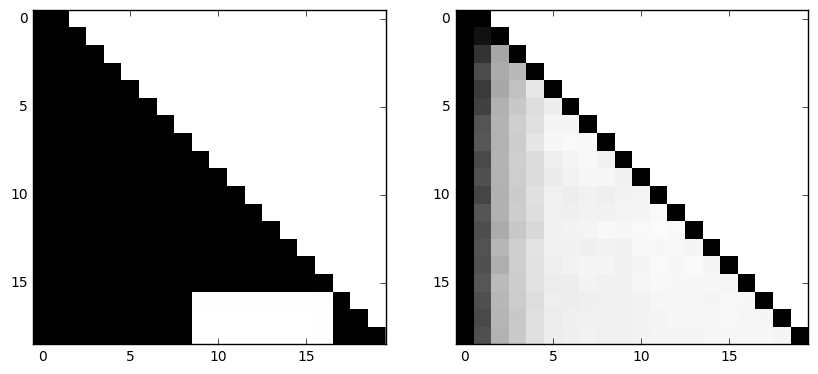

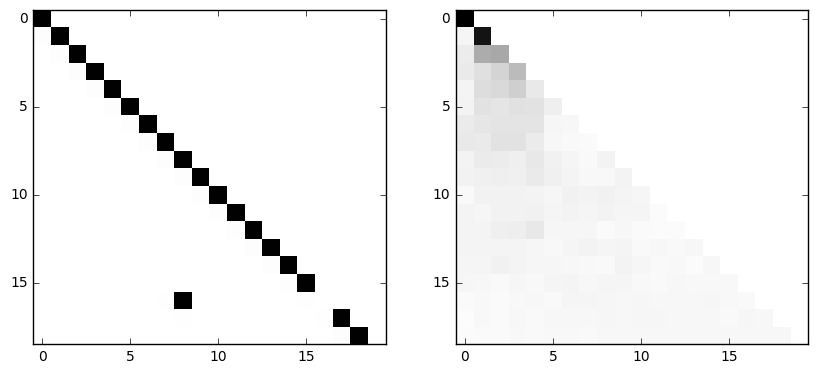

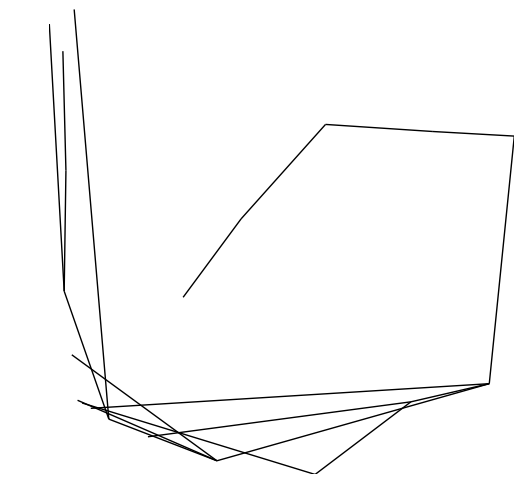

    After 20 iterations
        Discriminator Loss                         = -29583.5722656

    Generator_Loss: 31410.84375
1101
    After 20 iterations
        Discriminator Loss                         = -29958.3847656

    Generator_Loss: 31243.015625
1102
    After 20 iterations
        Discriminator Loss                         = -29557.96875

    Generator_Loss: 31363.9960938
1103
    After 20 iterations
        Discriminator Loss                         = -29664.5507812

    Generator_Loss: 31729.9804688
1104
    After 20 iterations
        Discriminator Loss                         = -28973.8085938

    Generator_Loss: 31554.6113281
1105
    After 20 iterations
        Discriminator Loss                         = -29410.5683594

    Generator_Loss: 31673.0039062
1106
    After 20 iterations
        Discriminator Loss                         = -29600.5

    Generator_Loss: 31685.3242188
1107
    After 20 iterations
        Discriminator Loss                         = -29568.486

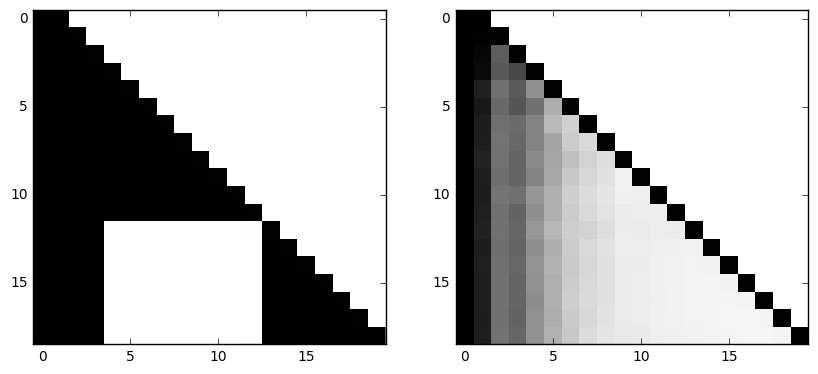

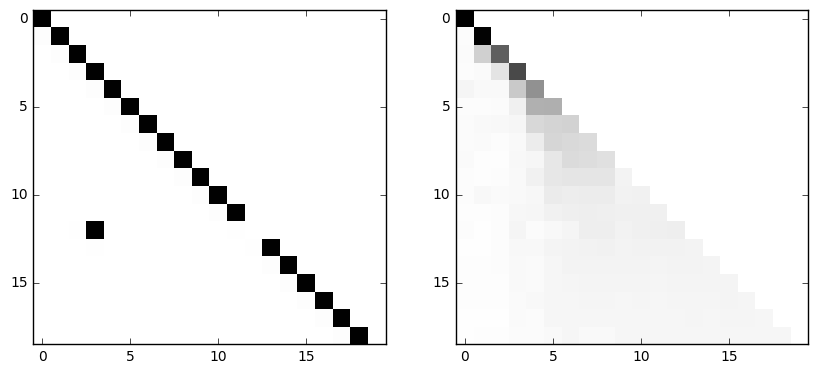

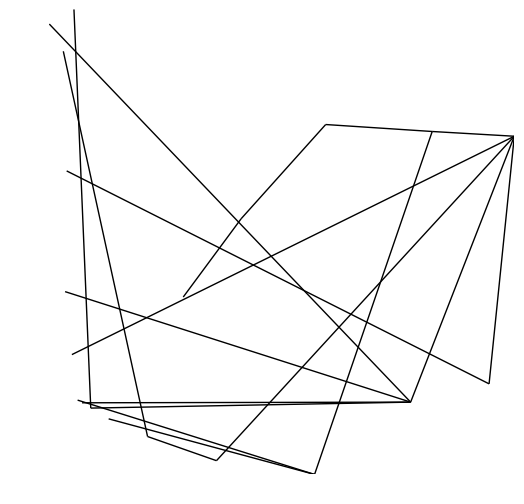

    After 20 iterations
        Discriminator Loss                         = -29776.2675781

    Generator_Loss: 31806.1191406
1126
    After 20 iterations
        Discriminator Loss                         = -30116.6230469

    Generator_Loss: 31768.9707031
1127
    After 20 iterations
        Discriminator Loss                         = -29554.3964844

    Generator_Loss: 31653.96875
1128
    After 20 iterations
        Discriminator Loss                         = -29775.7851562

    Generator_Loss: 31895.3710938
1129
    After 20 iterations
        Discriminator Loss                         = -29817.6796875

    Generator_Loss: 31825.2851562
1130
    After 20 iterations
        Discriminator Loss                         = -29980.1269531

    Generator_Loss: 31454.546875
1131
    After 20 iterations
        Discriminator Loss                         = -30114.7714844

    Generator_Loss: 31821.8496094
1132
    After 20 iterations
        Discriminator Loss                         = -3

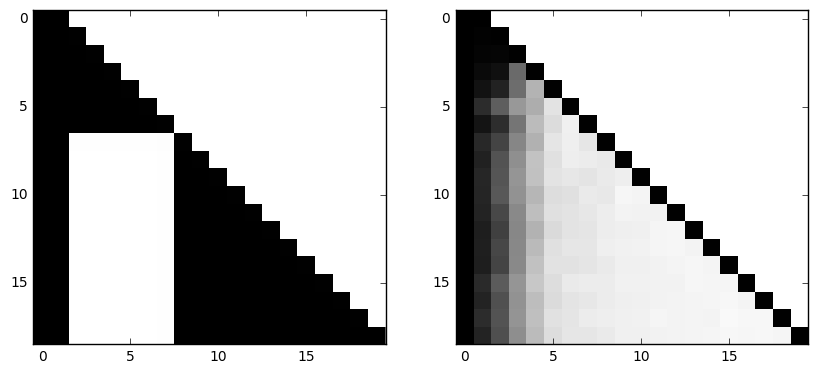

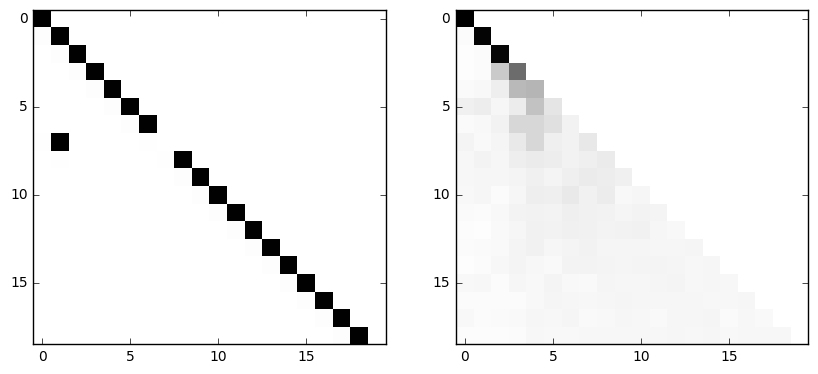

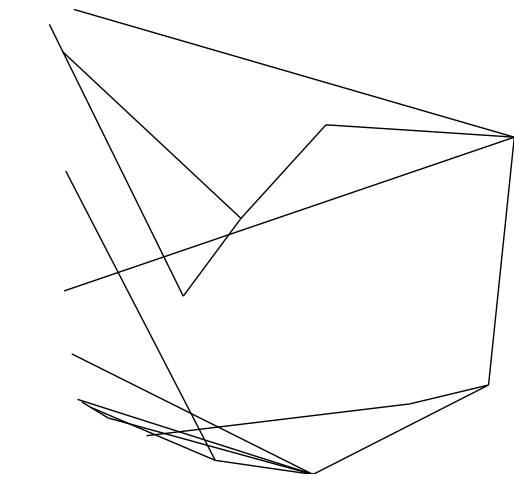

    After 20 iterations
        Discriminator Loss                         = -30546.1445312

    Generator_Loss: 31976.4902344
1151
    After 20 iterations
        Discriminator Loss                         = -30456.7089844

    Generator_Loss: 32135.0136719
1152
    After 20 iterations
        Discriminator Loss                         = -30623.0605469

    Generator_Loss: 31923.5507812
1153
    After 20 iterations
        Discriminator Loss                         = -30560.3769531

    Generator_Loss: 32109.2832031
1154
    After 20 iterations
        Discriminator Loss                         = -30617.2363281

    Generator_Loss: 32040.4863281
1155
    After 20 iterations
        Discriminator Loss                         = -30114.0546875

    Generator_Loss: 32225.9355469
1156
    After 20 iterations
        Discriminator Loss                         = -30332.0039062

    Generator_Loss: 32182.0703125
1157
    After 20 iterations
        Discriminator Loss                         =

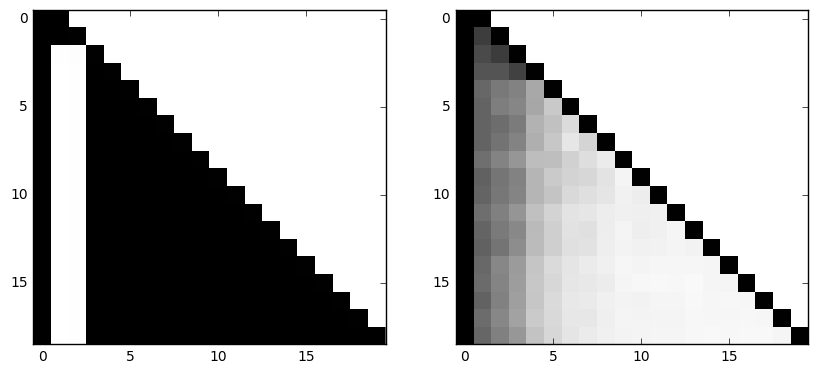

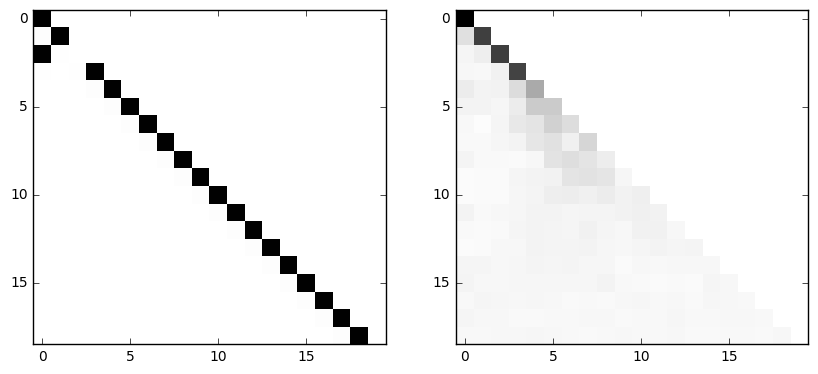

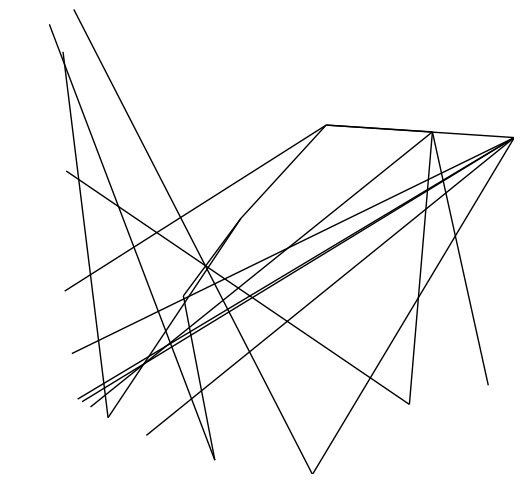

    After 20 iterations
        Discriminator Loss                         = -30894.0097656

    Generator_Loss: 32415.4726562
1176
    After 20 iterations
        Discriminator Loss                         = -30939.1308594

    Generator_Loss: 32364.9882812
1177
    After 20 iterations
        Discriminator Loss                         = -30680.109375

    Generator_Loss: 32332.5605469
1178
    After 20 iterations
        Discriminator Loss                         = -30989.2148438

    Generator_Loss: 32462.8007812
1179
    After 20 iterations
        Discriminator Loss                         = -30957.3808594

    Generator_Loss: 32339.5878906
1180
    After 20 iterations
        Discriminator Loss                         = -30954.7578125

    Generator_Loss: 32599.8652344
1181
    After 20 iterations
        Discriminator Loss                         = -30958.4824219

    Generator_Loss: 32371.2265625
1182
    After 20 iterations
        Discriminator Loss                         = 

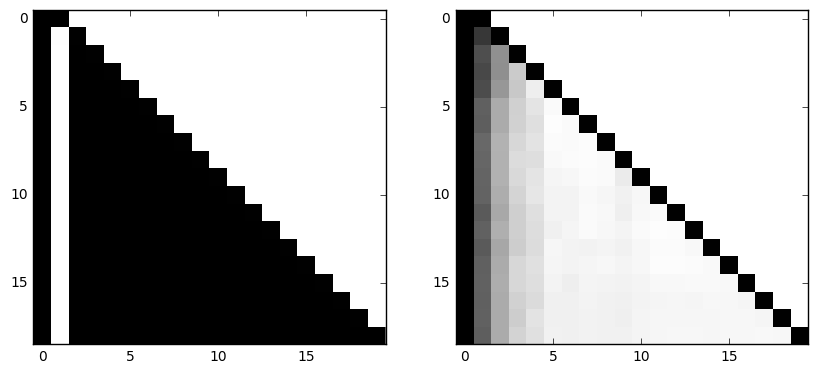

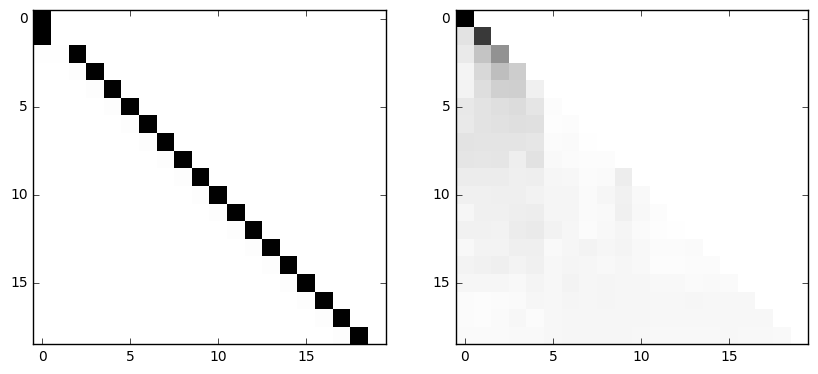

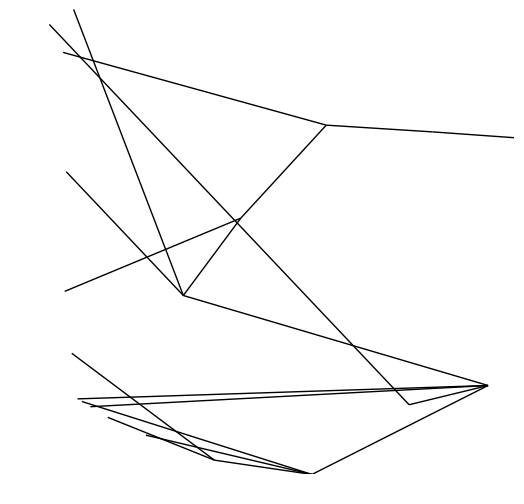

    After 20 iterations
        Discriminator Loss                         = -30986.3476562

    Generator_Loss: 32735.5898438
1201
    After 20 iterations
        Discriminator Loss                         = -30812.3339844

    Generator_Loss: 32848.953125
1202
    After 20 iterations
        Discriminator Loss                         = -31162.6074219

    Generator_Loss: 32808.953125
1203
    After 20 iterations
        Discriminator Loss                         = -30853.28125

    Generator_Loss: 32665.3417969
1204
    After 20 iterations
        Discriminator Loss                         = -31344.3730469

    Generator_Loss: 32738.53125
1205
    After 20 iterations
        Discriminator Loss                         = -30938.5800781

    Generator_Loss: 32836.5859375
1206
    After 20 iterations
        Discriminator Loss                         = -31510.9355469

    Generator_Loss: 32922.6835938
1207
    After 20 iterations
        Discriminator Loss                         = -3126

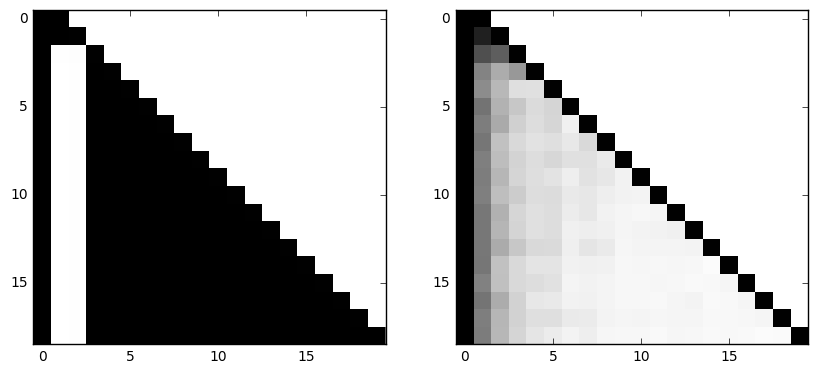

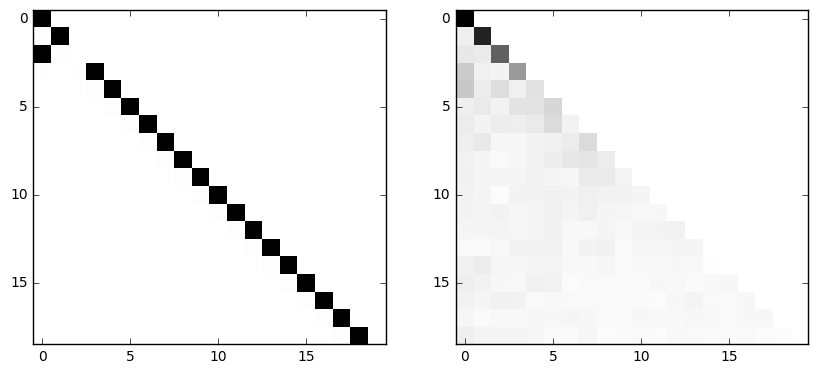

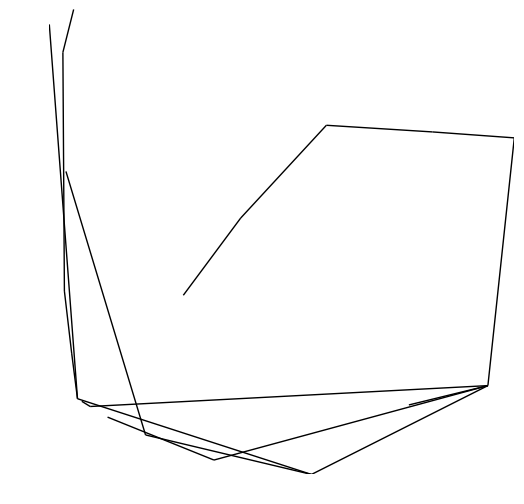

    After 20 iterations
        Discriminator Loss                         = -30978.0488281

    Generator_Loss: 33081.3398438
1226
    After 20 iterations
        Discriminator Loss                         = -31193.8476562

    Generator_Loss: 33065.5859375
1227
    After 20 iterations
        Discriminator Loss                         = -31267.3945312

    Generator_Loss: 33177.8242188
1228
    After 20 iterations
        Discriminator Loss                         = -31200.84375

    Generator_Loss: 33127.7460938
1229
    After 20 iterations
        Discriminator Loss                         = -31359.7460938

    Generator_Loss: 33113.2734375
1230
    After 20 iterations
        Discriminator Loss                         = -31466.4101562

    Generator_Loss: 33039.5859375
1231
    After 20 iterations
        Discriminator Loss                         = -31593.4296875

    Generator_Loss: 33014.4414062
1232
    After 20 iterations
        Discriminator Loss                         = -

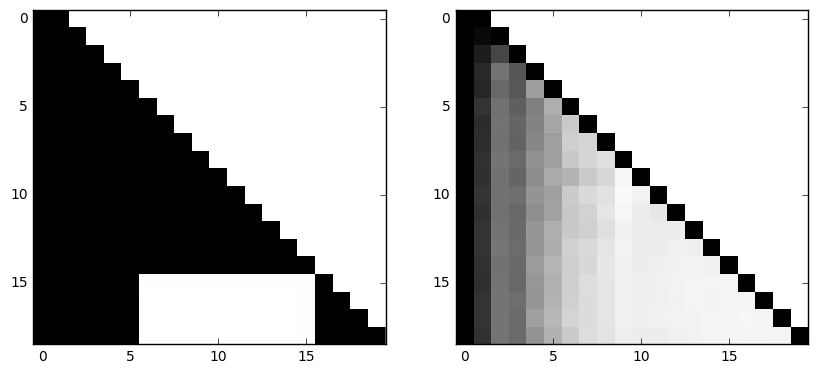

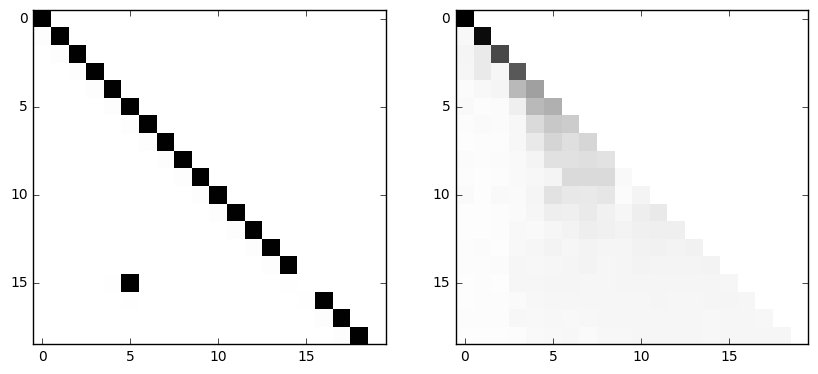

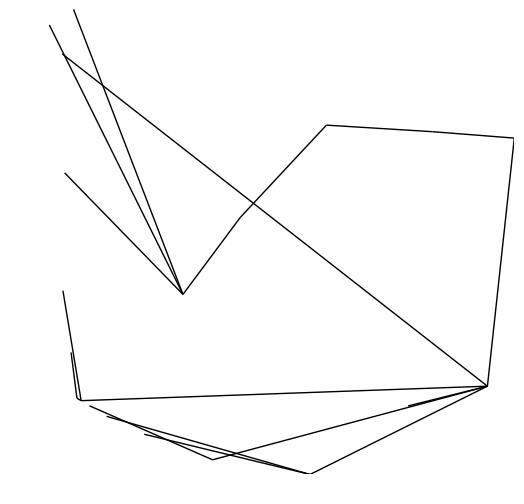

    After 20 iterations
        Discriminator Loss                         = -31666.5703125

    Generator_Loss: 33599.1601562
1251
    After 20 iterations
        Discriminator Loss                         = -31479.3710938

    Generator_Loss: 33561.8359375
1252
    After 20 iterations
        Discriminator Loss                         = -31862.1914062

    Generator_Loss: 33647.7773438
1253
    After 20 iterations
        Discriminator Loss                         = -32043.125

    Generator_Loss: 33635.703125
1254
    After 20 iterations
        Discriminator Loss                         = -31518.4550781

    Generator_Loss: 33387.1953125
1255
    After 20 iterations
        Discriminator Loss                         = -31804.5019531

    Generator_Loss: 33531.1132812
1256
    After 20 iterations
        Discriminator Loss                         = -31825.5703125

    Generator_Loss: 33550.65625
1257
    After 20 iterations
        Discriminator Loss                         = -31249

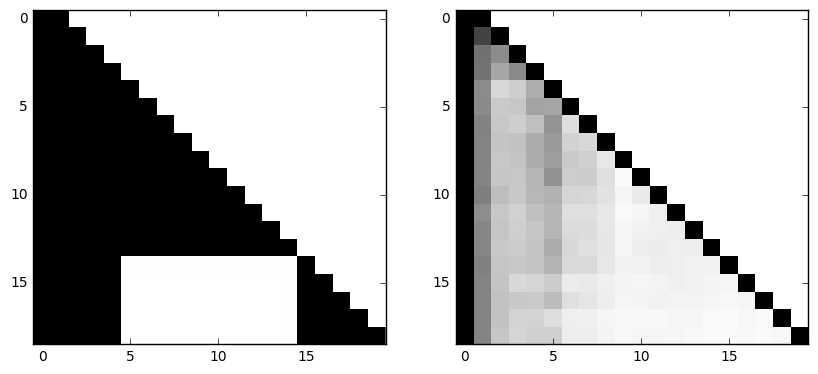

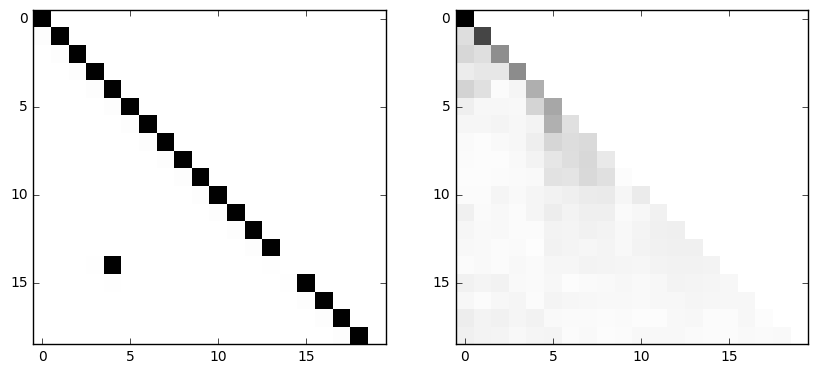

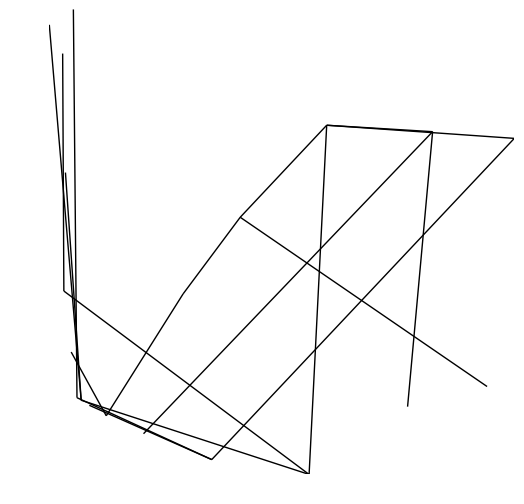

    After 20 iterations
        Discriminator Loss                         = -32220.9609375

    Generator_Loss: 33680.4960938
1276
    After 20 iterations
        Discriminator Loss                         = -31866.9082031

    Generator_Loss: 33756.9453125
1277
    After 20 iterations
        Discriminator Loss                         = -32279.8535156

    Generator_Loss: 33929.09375
1278
    After 20 iterations
        Discriminator Loss                         = -31914.0605469

    Generator_Loss: 33825.0273438
1279
    After 20 iterations
        Discriminator Loss                         = -32091.3574219

    Generator_Loss: 33857.5117188
1280
    After 20 iterations
        Discriminator Loss                         = -32074.6191406

    Generator_Loss: 33761.5
1281
    After 20 iterations
        Discriminator Loss                         = -31818.6230469

    Generator_Loss: 33950.4648438
1282
    After 20 iterations
        Discriminator Loss                         = -32000.

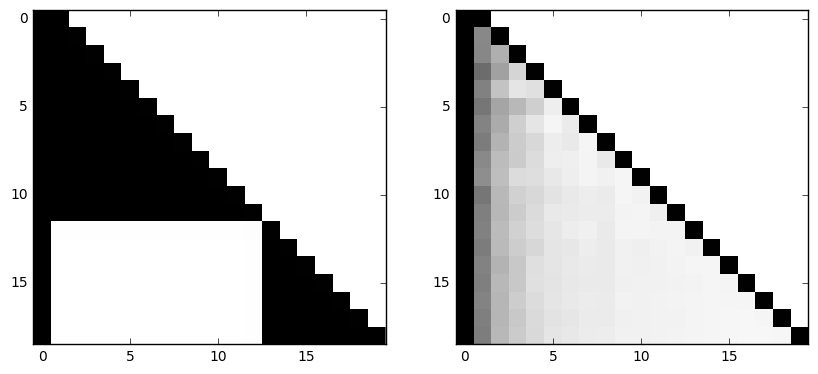

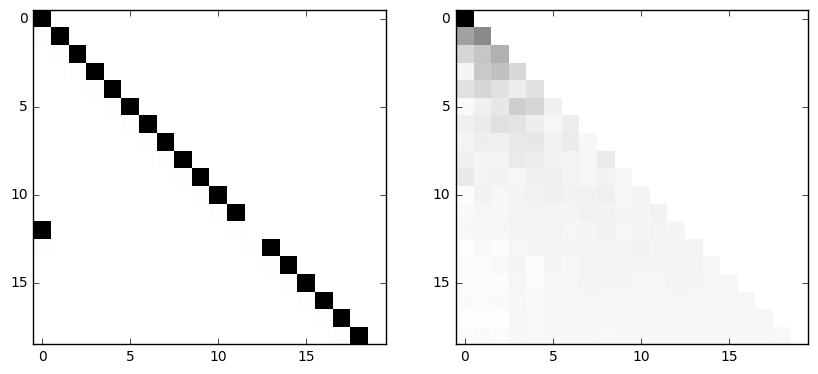

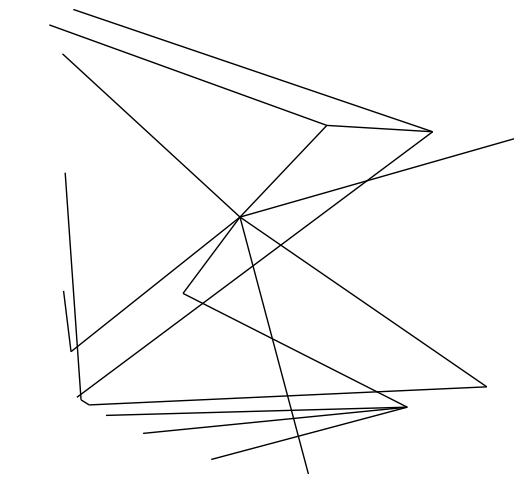

    After 20 iterations
        Discriminator Loss                         = -32346.09375

    Generator_Loss: 33926.8398438
1301
    After 20 iterations
        Discriminator Loss                         = -32192.5332031

    Generator_Loss: 32571.4238281
1302
    After 20 iterations
        Discriminator Loss                         = -32282.4667969

    Generator_Loss: 34185.15625
1303
    After 20 iterations
        Discriminator Loss                         = -32312.125

    Generator_Loss: 34261.4296875
1304
    After 20 iterations
        Discriminator Loss                         = -32380.4199219

    Generator_Loss: 34207.5117188
1305
    After 20 iterations
        Discriminator Loss                         = -32153.0371094

    Generator_Loss: 34041.6875
1306
    After 20 iterations
        Discriminator Loss                         = -32529.0527344

    Generator_Loss: 34156.4140625
1307
    After 20 iterations
        Discriminator Loss                         = -31598.814

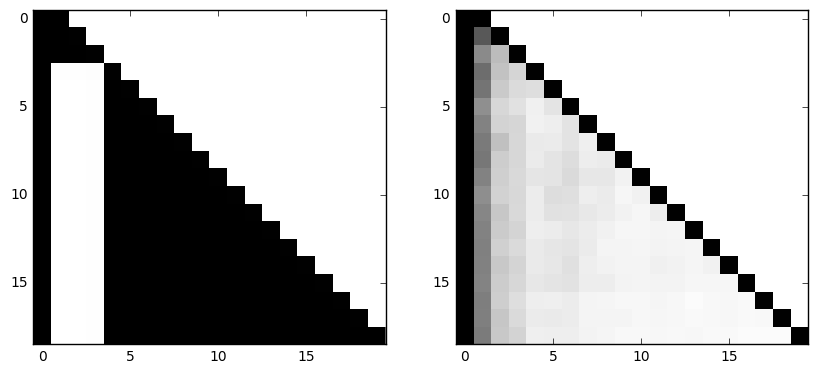

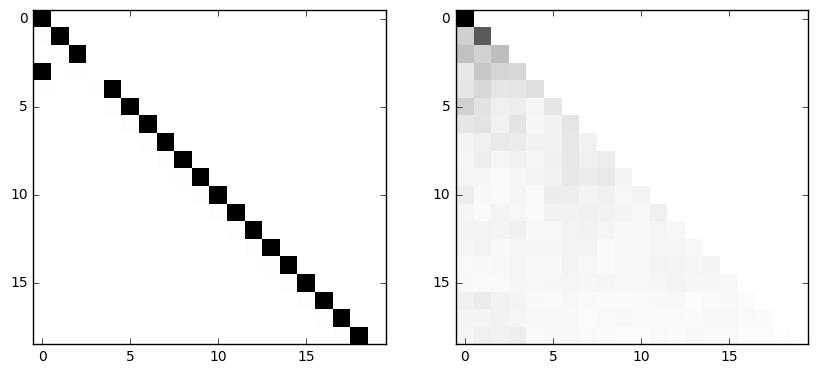

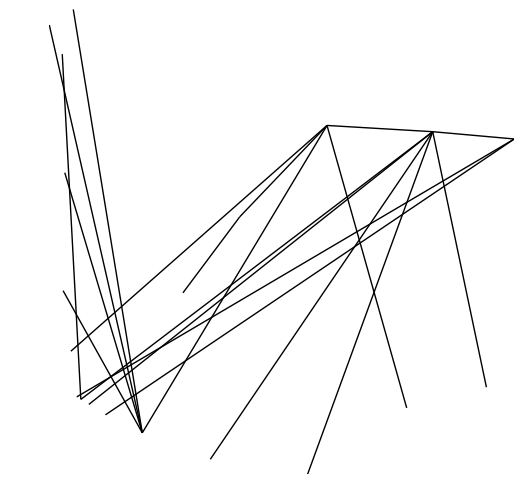

    After 20 iterations
        Discriminator Loss                         = -32170.2851562

    Generator_Loss: 34509.53125
1326
    After 20 iterations
        Discriminator Loss                         = -32586.0859375

    Generator_Loss: 34561.0390625
1327
    After 20 iterations
        Discriminator Loss                         = -32910.828125

    Generator_Loss: 34490.8710938
1328
    After 20 iterations
        Discriminator Loss                         = -33285.890625

    Generator_Loss: 34479.9101562
1329
    After 20 iterations
        Discriminator Loss                         = -32859.9296875

    Generator_Loss: 34523.3203125
1330
    After 20 iterations
        Discriminator Loss                         = -32436.8847656

    Generator_Loss: 34659.1289062
1331
    After 20 iterations
        Discriminator Loss                         = -33178.9804688

    Generator_Loss: 34415.0703125
1332
    After 20 iterations
        Discriminator Loss                         = -33

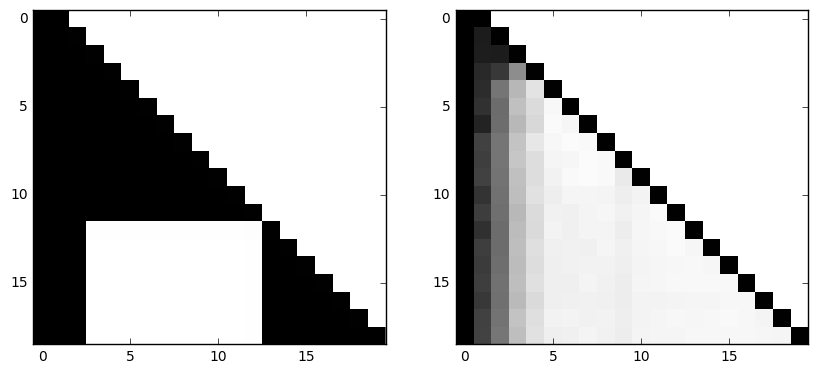

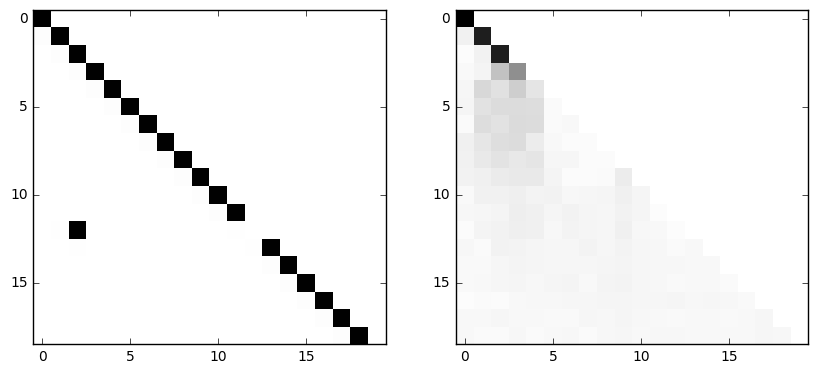

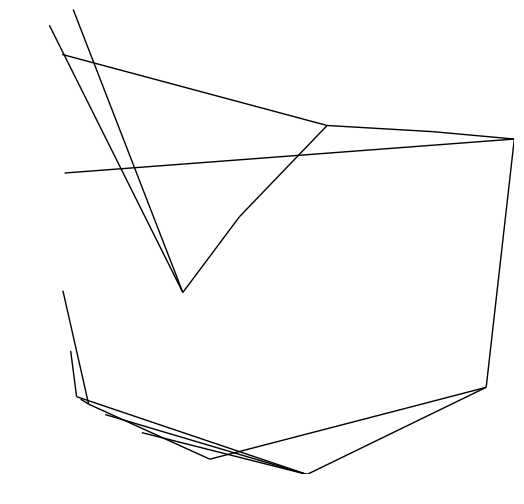

    After 20 iterations
        Discriminator Loss                         = -33101.1640625

    Generator_Loss: 34932.5898438
1351
    After 20 iterations
        Discriminator Loss                         = -33285.0820312

    Generator_Loss: 34700.0
1352
    After 20 iterations
        Discriminator Loss                         = -32781.8984375

    Generator_Loss: 34890.8476562
1353
    After 20 iterations
        Discriminator Loss                         = -32520.109375

    Generator_Loss: 34863.0273438
1354
    After 20 iterations
        Discriminator Loss                         = -33439.59375

    Generator_Loss: 34907.5078125
1355
    After 20 iterations
        Discriminator Loss                         = -32991.421875

    Generator_Loss: 34934.4960938
1356
    After 20 iterations
        Discriminator Loss                         = -33277.78125

    Generator_Loss: 34924.8125
1357
    After 20 iterations
        Discriminator Loss                         = -33399.40625



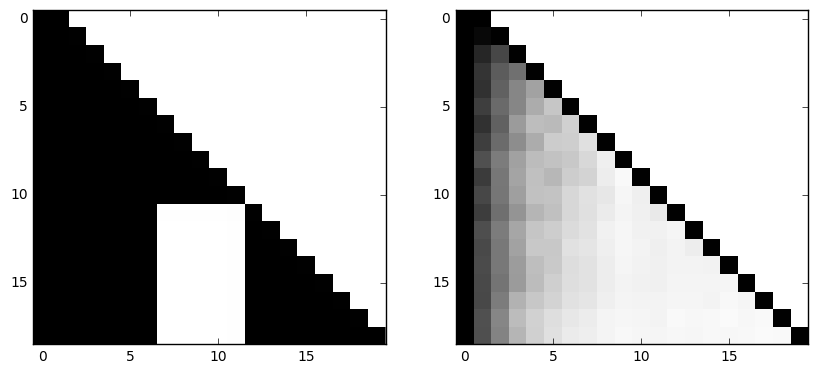

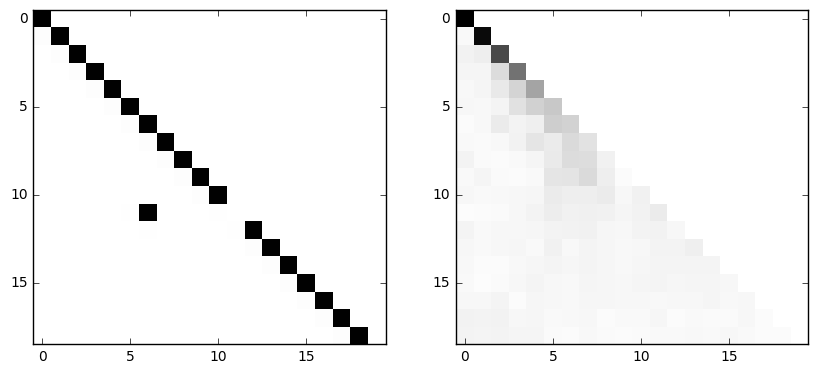

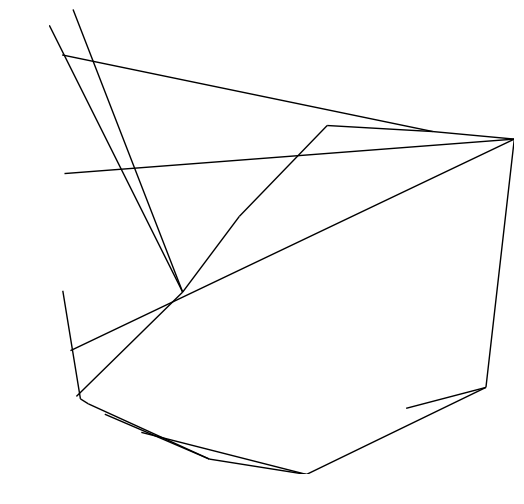

    After 20 iterations
        Discriminator Loss                         = -32924.4570312

    Generator_Loss: 35194.015625
1376
    After 20 iterations
        Discriminator Loss                         = -33247.3203125

    Generator_Loss: 35213.53125
1377
    After 20 iterations
        Discriminator Loss                         = -33366.3242188

    Generator_Loss: 35291.6210938
1378
    After 20 iterations
        Discriminator Loss                         = -33656.3242188

    Generator_Loss: 35081.859375
1379
    After 20 iterations
        Discriminator Loss                         = -33687.7460938

    Generator_Loss: 35125.3515625
1380
    After 20 iterations
        Discriminator Loss                         = -33296.9648438

    Generator_Loss: 35181.5234375
1381
    After 20 iterations
        Discriminator Loss                         = -33645.0039062

    Generator_Loss: 35220.4453125
1382
    After 20 iterations
        Discriminator Loss                         = -33

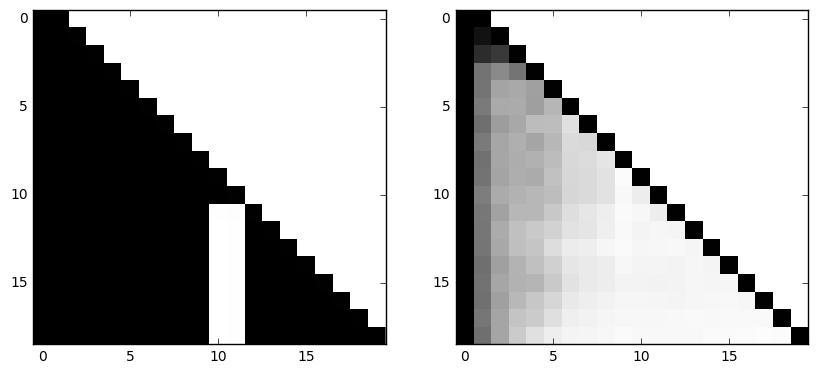

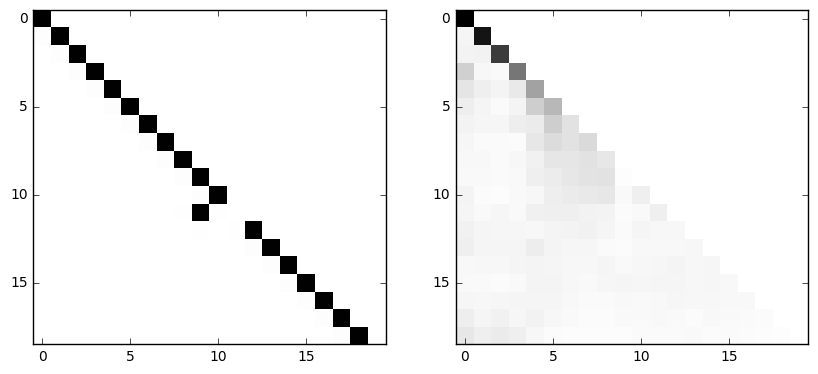

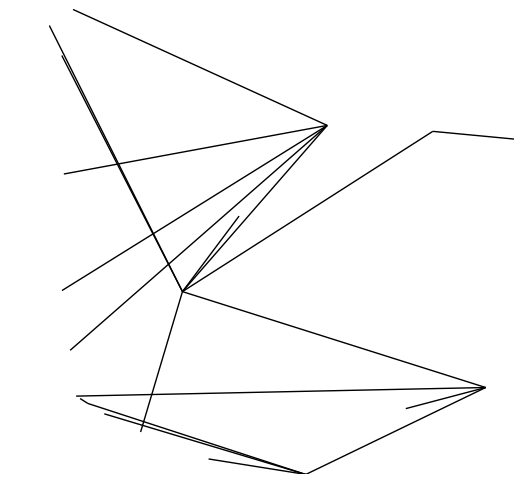

    After 20 iterations
        Discriminator Loss                         = -33759.96875

    Generator_Loss: 35549.1328125
1401
    After 20 iterations
        Discriminator Loss                         = -33483.3828125

    Generator_Loss: 35325.6210938
1402
    After 20 iterations
        Discriminator Loss                         = -33815.9453125

    Generator_Loss: 35307.2578125
1403
    After 20 iterations
        Discriminator Loss                         = -33285.8125

    Generator_Loss: 35423.8007812
1404
    After 20 iterations
        Discriminator Loss                         = -33544.25

    Generator_Loss: 35377.8398438
1405
    After 20 iterations
        Discriminator Loss                         = -33814.9921875

    Generator_Loss: 35590.484375
1406
    After 20 iterations
        Discriminator Loss                         = -33793.2890625

    Generator_Loss: 35414.96875
1407
    After 20 iterations
        Discriminator Loss                         = -33693.83203

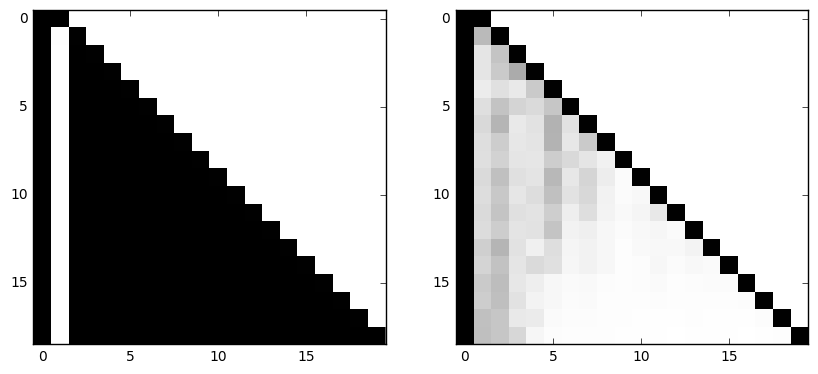

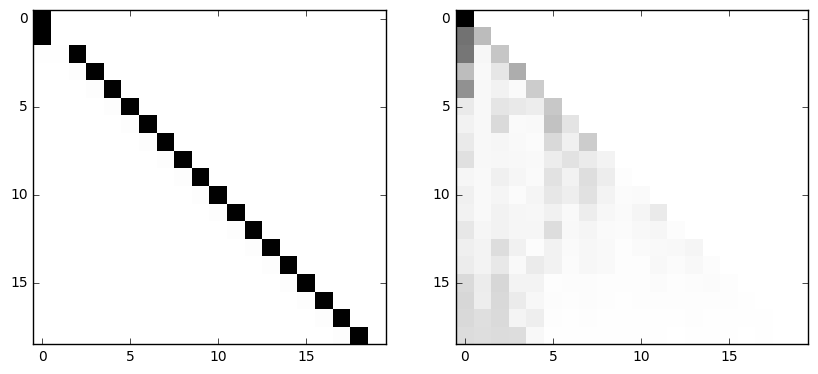

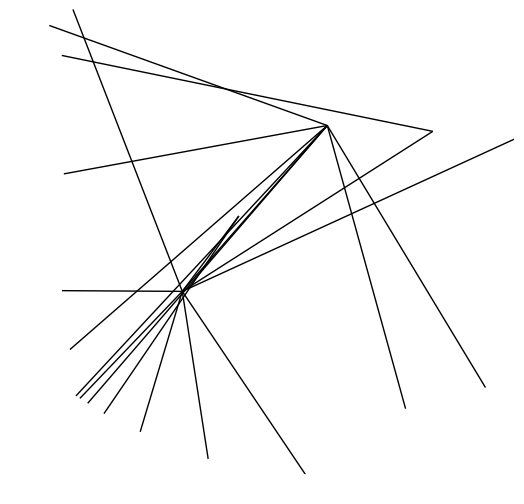

    After 20 iterations
        Discriminator Loss                         = -33449.1210938

    Generator_Loss: 35815.2421875
1426
    After 20 iterations
        Discriminator Loss                         = -34163.609375

    Generator_Loss: 35900.109375
1427
    After 20 iterations
        Discriminator Loss                         = -33973.484375

    Generator_Loss: 35857.8359375
1428
    After 20 iterations
        Discriminator Loss                         = -34161.3984375

    Generator_Loss: 35801.4765625
1429
    After 20 iterations
        Discriminator Loss                         = -33849.1054688

    Generator_Loss: 35870.3203125
1430
    After 20 iterations
        Discriminator Loss                         = -34335.6640625

    Generator_Loss: 35866.1054688
1431
    After 20 iterations
        Discriminator Loss                         = -33936.1835938

    Generator_Loss: 35898.9921875
1432
    After 20 iterations
        Discriminator Loss                         = -3

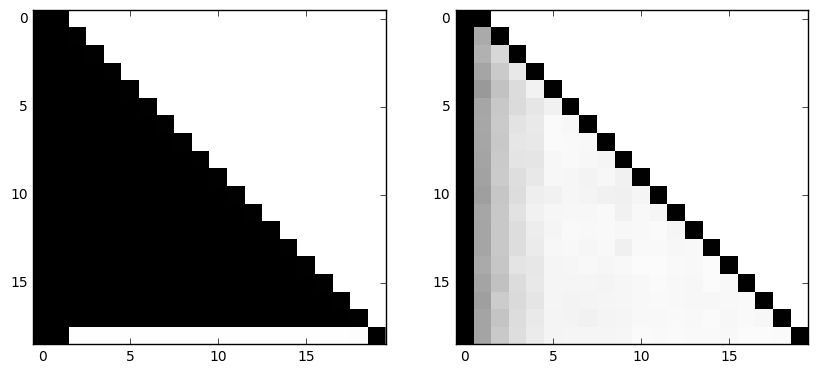

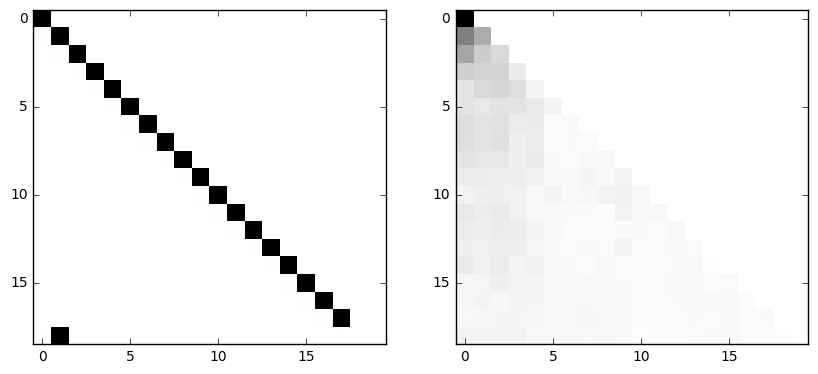

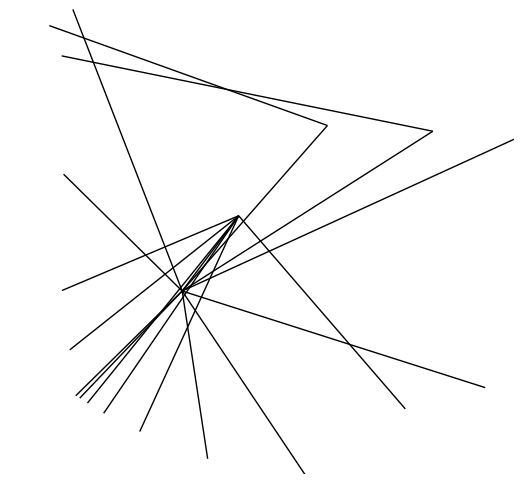

    After 20 iterations
        Discriminator Loss                         = -34185.2421875

    Generator_Loss: 36050.8789062
1451
    After 20 iterations
        Discriminator Loss                         = -34424.40625

    Generator_Loss: 35962.3554688
1452
    After 20 iterations
        Discriminator Loss                         = -33886.4609375

    Generator_Loss: 36055.578125
1453
    After 20 iterations
        Discriminator Loss                         = -34724.7734375

    Generator_Loss: 35004.390625
1454
    After 20 iterations
        Discriminator Loss                         = -34093.0234375

    Generator_Loss: 35578.4882812
1455
    After 20 iterations
        Discriminator Loss                         = -34290.71875

    Generator_Loss: 34162.9570312
1456
    After 20 iterations
        Discriminator Loss                         = -33781.7617188

    Generator_Loss: 36335.1875
1457
    After 20 iterations
        Discriminator Loss                         = -33686.4

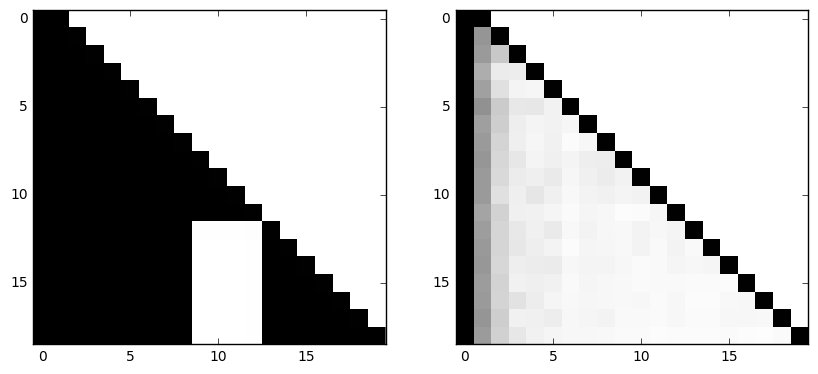

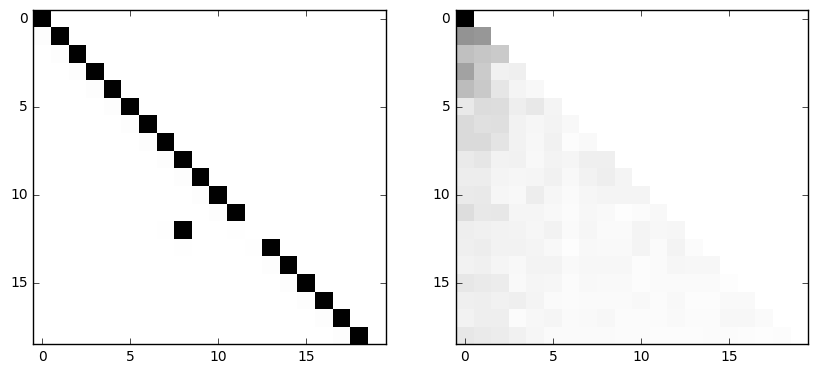

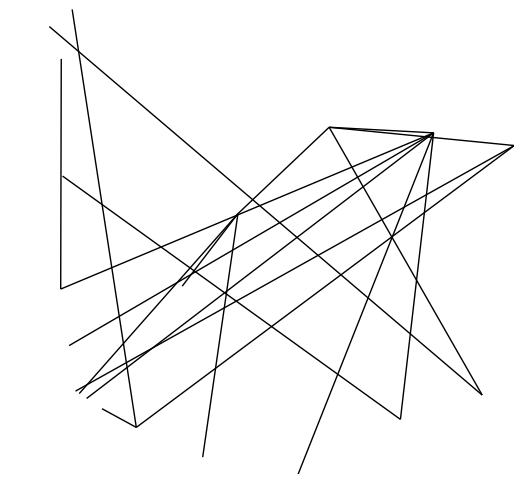

    After 20 iterations
        Discriminator Loss                         = -34573.2382812

    Generator_Loss: 36481.4609375
1476
    After 20 iterations
        Discriminator Loss                         = -34177.8359375

    Generator_Loss: 36530.7109375
1477
    After 20 iterations
        Discriminator Loss                         = -33631.6601562

    Generator_Loss: 36544.28125
1478
    After 20 iterations
        Discriminator Loss                         = -34676.2304688

    Generator_Loss: 36389.2851562
1479
    After 20 iterations
        Discriminator Loss                         = -34557.0390625

    Generator_Loss: 36524.4023438
1480
    After 20 iterations
        Discriminator Loss                         = -34798.3398438

    Generator_Loss: 36482.0742188
1481
    After 20 iterations
        Discriminator Loss                         = -34468.5976562

    Generator_Loss: 36669.0546875
1482
    After 20 iterations
        Discriminator Loss                         = -

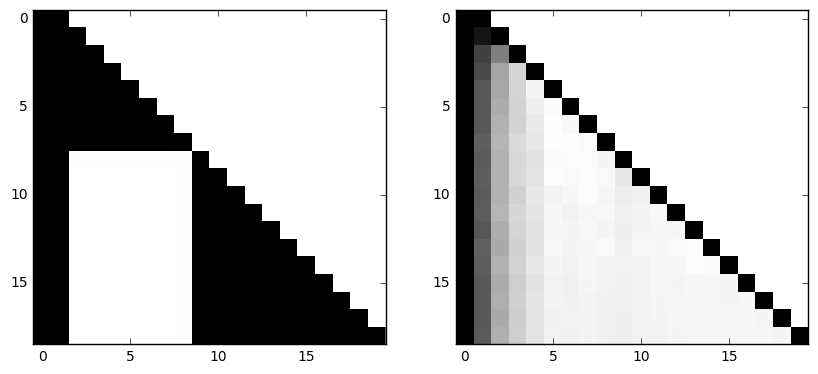

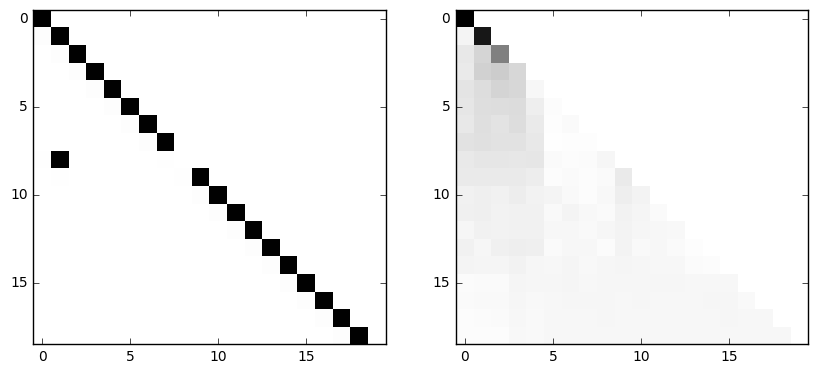

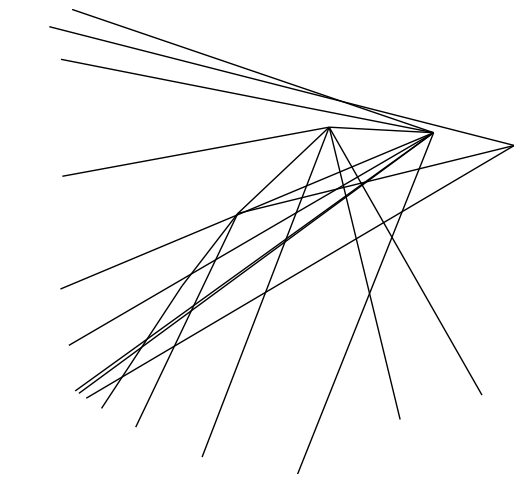

    After 20 iterations
        Discriminator Loss                         = -34792.4140625

    Generator_Loss: 36634.2929688
1501
    After 20 iterations
        Discriminator Loss                         = -34593.609375

    Generator_Loss: 36487.9804688
1502
    After 20 iterations
        Discriminator Loss                         = -34206.1132812

    Generator_Loss: 36622.375
1503
    After 20 iterations
        Discriminator Loss                         = -35167.1757812

    Generator_Loss: 36538.9960938
1504
    After 20 iterations
        Discriminator Loss                         = -34472.8046875

    Generator_Loss: 36665.1132812
1505
    After 20 iterations
        Discriminator Loss                         = -34324.6601562

    Generator_Loss: 36396.5234375
1506
    After 20 iterations
        Discriminator Loss                         = -34839.59375

    Generator_Loss: 36618.1289062
1507
    After 20 iterations
        Discriminator Loss                         = -34036

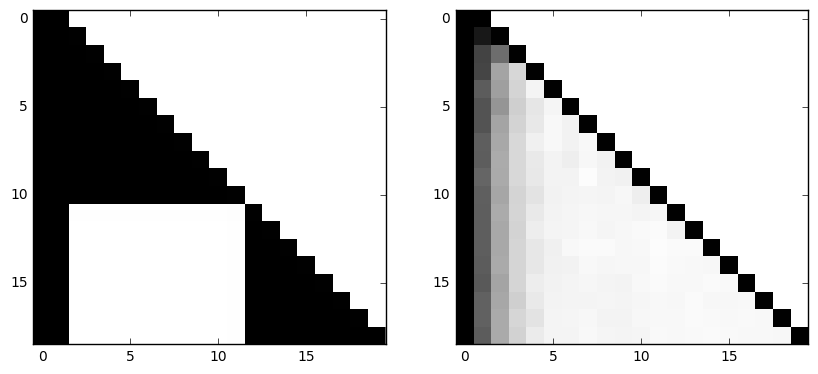

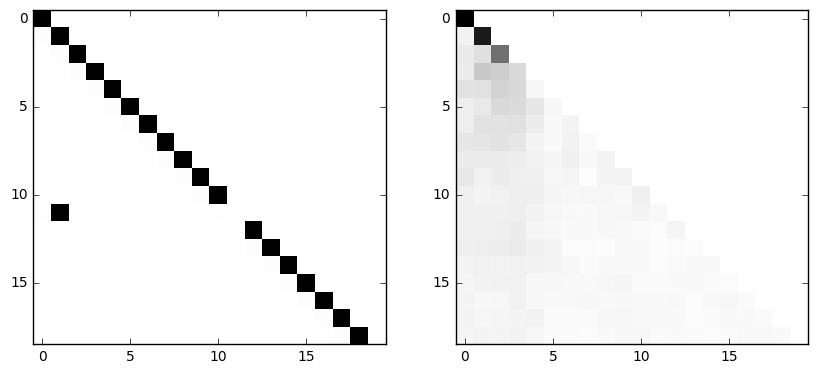

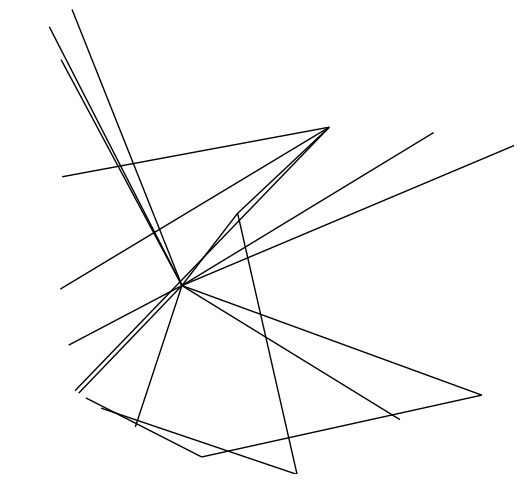

    After 20 iterations
        Discriminator Loss                         = -34420.5234375

    Generator_Loss: 36926.5976562
1526
    After 20 iterations
        Discriminator Loss                         = -35156.8554688

    Generator_Loss: 36936.6367188
1527
    After 20 iterations
        Discriminator Loss                         = -34961.1757812

    Generator_Loss: 37095.1875
1528
    After 20 iterations
        Discriminator Loss                         = -34793.2539062

    Generator_Loss: 36859.09375
1529
    After 20 iterations
        Discriminator Loss                         = -34694.4414062

    Generator_Loss: 37022.5625
1530
    After 20 iterations
        Discriminator Loss                         = -35119.5664062

    Generator_Loss: 36999.5820312
1531
    After 20 iterations
        Discriminator Loss                         = -35554.671875

    Generator_Loss: 36781.59375
1532
    After 20 iterations
        Discriminator Loss                         = -34887.460

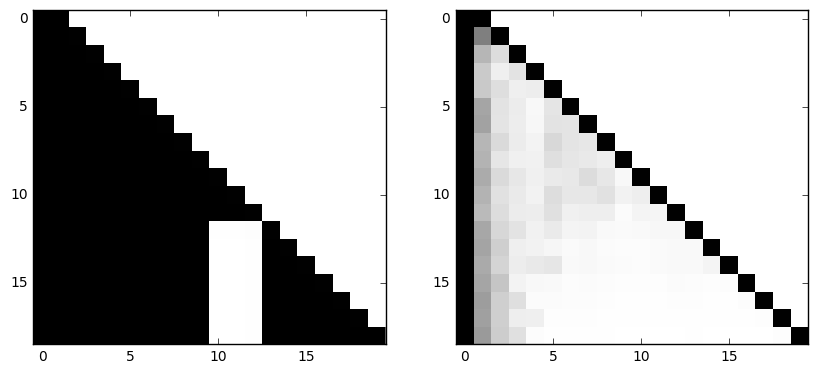

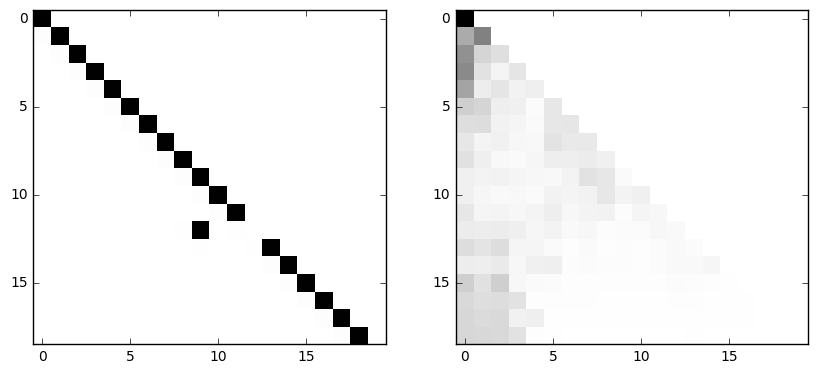

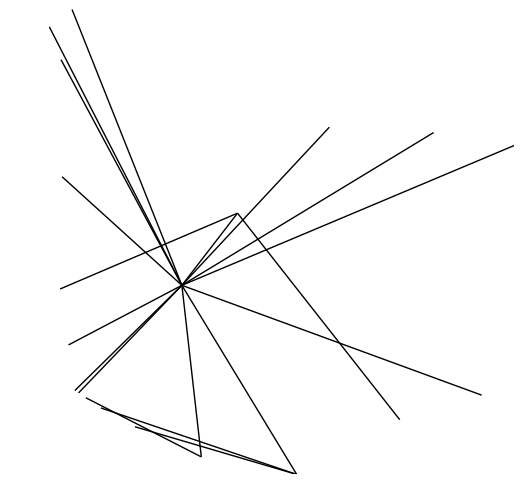

    After 20 iterations
        Discriminator Loss                         = -35438.1054688

    Generator_Loss: 37425.6132812
1551
    After 20 iterations
        Discriminator Loss                         = -35676.9570312

    Generator_Loss: 37298.2695312
1552
    After 20 iterations
        Discriminator Loss                         = -35708.484375

    Generator_Loss: 37350.9882812
1553
    After 20 iterations
        Discriminator Loss                         = -36020.5625

    Generator_Loss: 37249.6914062
1554
    After 20 iterations
        Discriminator Loss                         = -35332.0625

    Generator_Loss: 37264.6132812
1555
    After 20 iterations
        Discriminator Loss                         = -35427.4179688

    Generator_Loss: 37271.171875
1556
    After 20 iterations
        Discriminator Loss                         = -35717.3867188

    Generator_Loss: 37295.8320312
1557
    After 20 iterations
        Discriminator Loss                         = -35202.

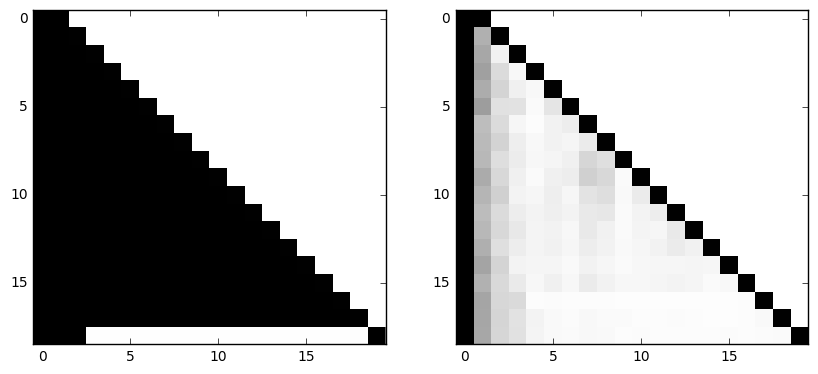

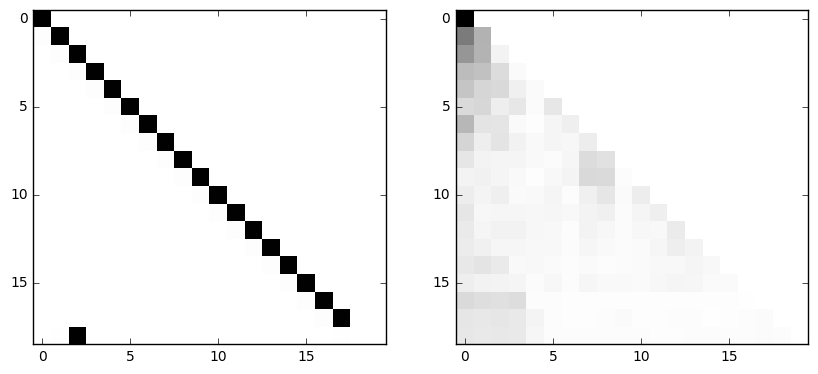

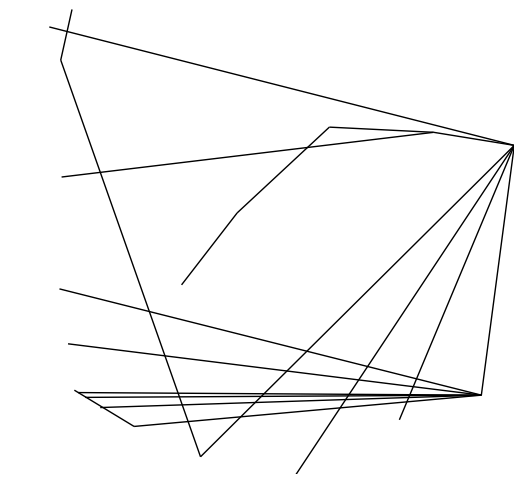

    After 20 iterations
        Discriminator Loss                         = -36192.7695312

    Generator_Loss: 37360.5195312
26
    After 20 iterations
        Discriminator Loss                         = -35611.0

    Generator_Loss: 37671.0664062
27
    After 20 iterations
        Discriminator Loss                         = -36104.8867188

    Generator_Loss: 37750.1679688
28
    After 20 iterations
        Discriminator Loss                         = -35536.3828125

    Generator_Loss: 37744.515625
29
    After 20 iterations
        Discriminator Loss                         = -35887.6328125

    Generator_Loss: 37737.6484375
30
    After 20 iterations
        Discriminator Loss                         = -35932.3476562

    Generator_Loss: 37582.7460938
31
    After 20 iterations
        Discriminator Loss                         = -35968.9609375

    Generator_Loss: 37548.6953125
32
    After 20 iterations
        Discriminator Loss                         = -36047.2265625

    

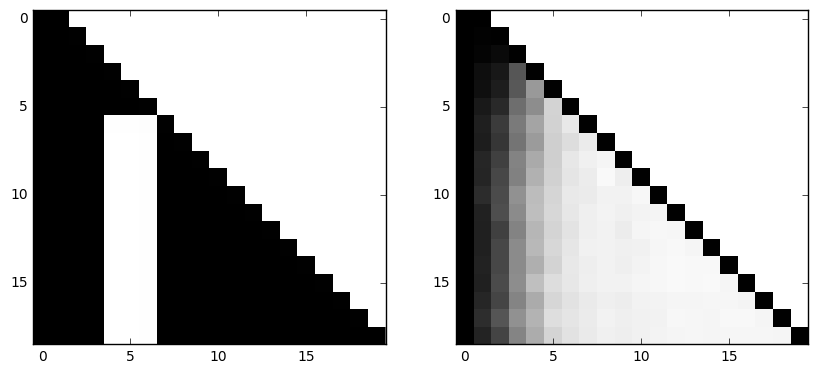

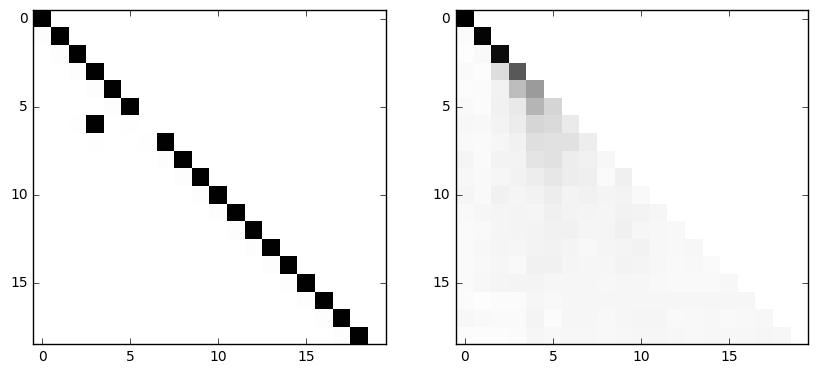

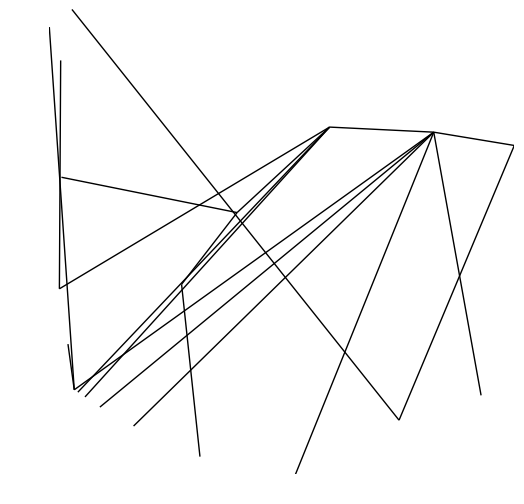

    After 20 iterations
        Discriminator Loss                         = -36318.5273438

    Generator_Loss: 38092.6992188
51
    After 20 iterations
        Discriminator Loss                         = -35867.8789062

    Generator_Loss: 38025.7539062
52
    After 20 iterations
        Discriminator Loss                         = -36213.5195312

    Generator_Loss: 38066.984375
53
    After 20 iterations
        Discriminator Loss                         = -35892.15625

    Generator_Loss: 38193.7578125
54
    After 20 iterations
        Discriminator Loss                         = -36299.109375

    Generator_Loss: 38073.2148438
55
    After 20 iterations
        Discriminator Loss                         = -36159.7226562

    Generator_Loss: 38118.3632812
56
    After 20 iterations
        Discriminator Loss                         = -36217.7382812

    Generator_Loss: 38034.0898438
57
    After 20 iterations
        Discriminator Loss                         = -36074.7929688

 

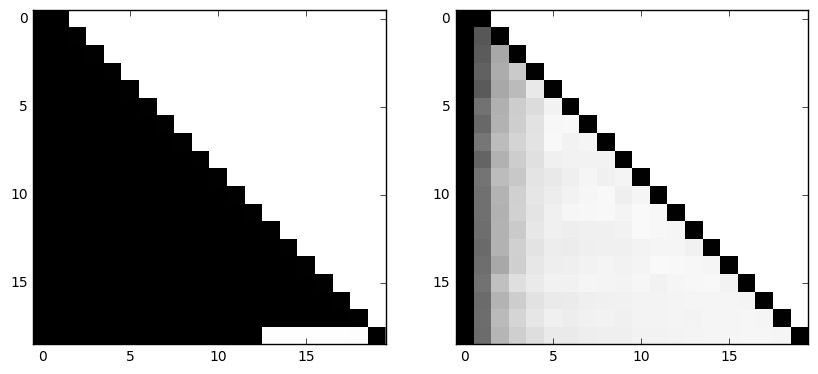

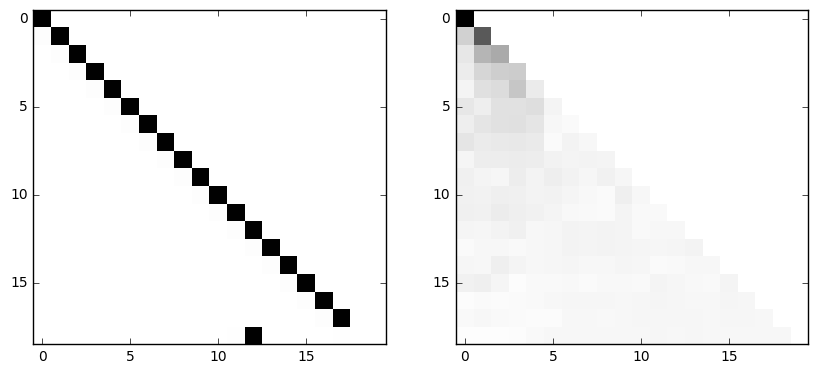

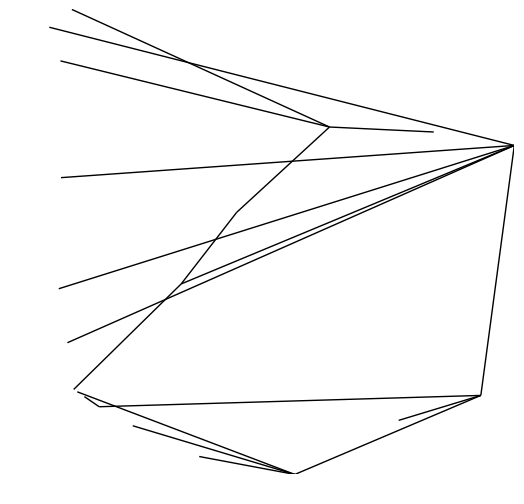

    After 20 iterations
        Discriminator Loss                         = -36422.5429688

    Generator_Loss: 38209.3554688
76
    After 20 iterations
        Discriminator Loss                         = -36123.6210938

    Generator_Loss: 38284.5273438
77
    After 20 iterations
        Discriminator Loss                         = -35928.5703125

    Generator_Loss: 38279.828125
78
    After 20 iterations
        Discriminator Loss                         = -36495.921875

    Generator_Loss: 38349.4492188
79
    After 20 iterations
        Discriminator Loss                         = -36518.3125

    Generator_Loss: 38304.8164062
80
    After 20 iterations
        Discriminator Loss                         = -36493.625

    Generator_Loss: 38364.96875
81
    After 20 iterations
        Discriminator Loss                         = -36590.4179688

    Generator_Loss: 38372.4882812
82
    After 20 iterations
        Discriminator Loss                         = -36873.0078125

    Gene

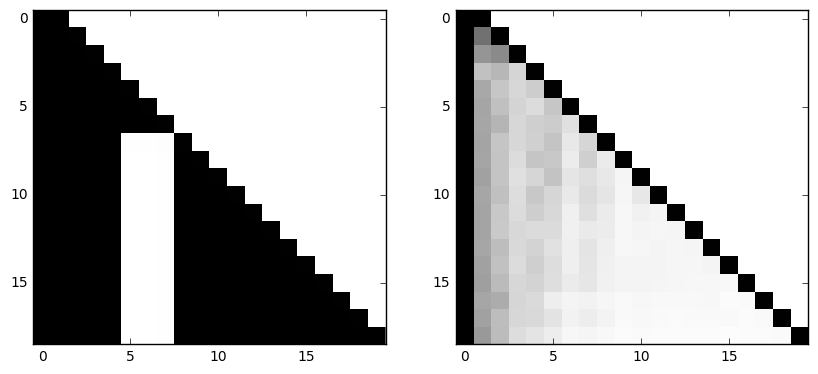

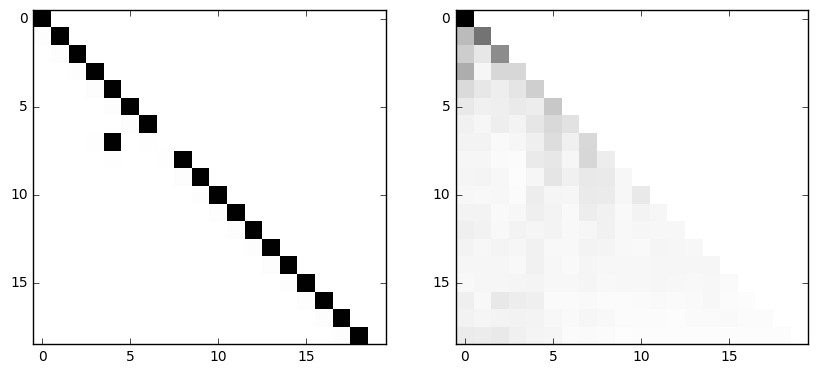

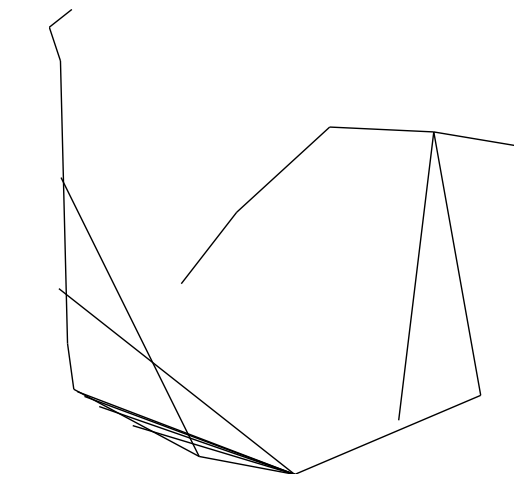

    After 20 iterations
        Discriminator Loss                         = -36055.3789062

    Generator_Loss: 38690.4765625
101
    After 20 iterations
        Discriminator Loss                         = -37003.1523438

    Generator_Loss: 38701.0976562
102
    After 20 iterations
        Discriminator Loss                         = -36980.4609375

    Generator_Loss: 38554.390625
103
    After 20 iterations
        Discriminator Loss                         = -36981.8320312

    Generator_Loss: 38645.4882812
104
    After 20 iterations
        Discriminator Loss                         = -36638.6523438

    Generator_Loss: 38599.3125
105
    After 20 iterations
        Discriminator Loss                         = -36604.5078125

    Generator_Loss: 38541.7734375
106
    After 20 iterations
        Discriminator Loss                         = -36872.4609375

    Generator_Loss: 38681.4882812
107
    After 20 iterations
        Discriminator Loss                         = -36511.230

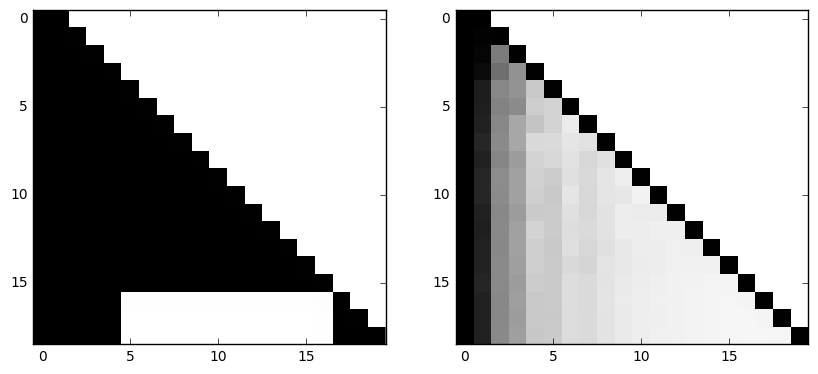

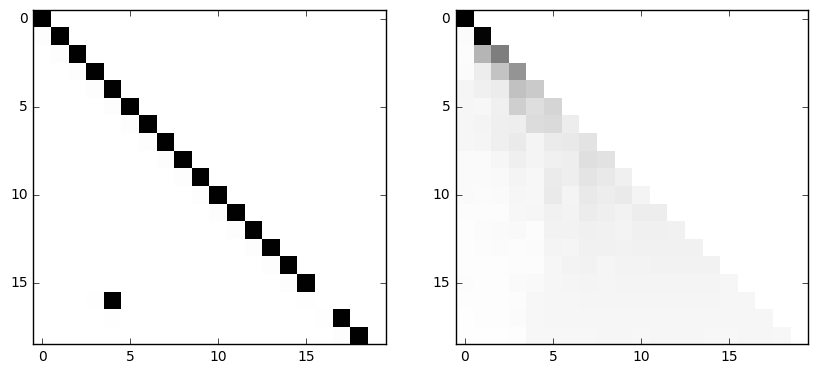

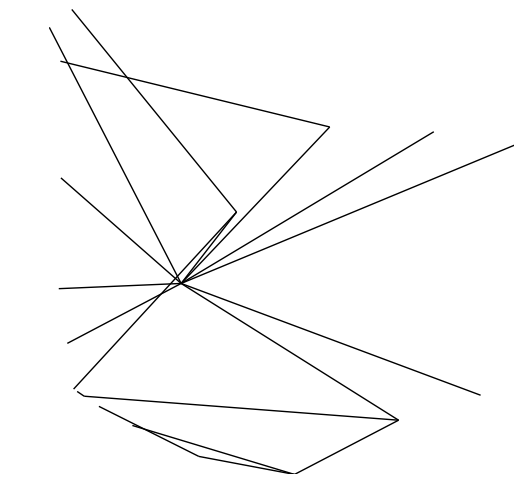

    After 20 iterations
        Discriminator Loss                         = -37225.015625

    Generator_Loss: 38880.6054688
126
    After 20 iterations
        Discriminator Loss                         = -36761.921875

    Generator_Loss: 38907.3242188
127
    After 20 iterations
        Discriminator Loss                         = -37311.4726562

    Generator_Loss: 38837.3007812
128
    After 20 iterations
        Discriminator Loss                         = -37328.2695312

    Generator_Loss: 39106.890625
129
    After 20 iterations
        Discriminator Loss                         = -37268.90625

    Generator_Loss: 38942.7851562
130
    After 20 iterations
        Discriminator Loss                         = -37523.6835938

    Generator_Loss: 38998.6210938
131
    After 20 iterations
        Discriminator Loss                         = -37266.0234375

    Generator_Loss: 39049.171875
132
    After 20 iterations
        Discriminator Loss                         = -36201.75390

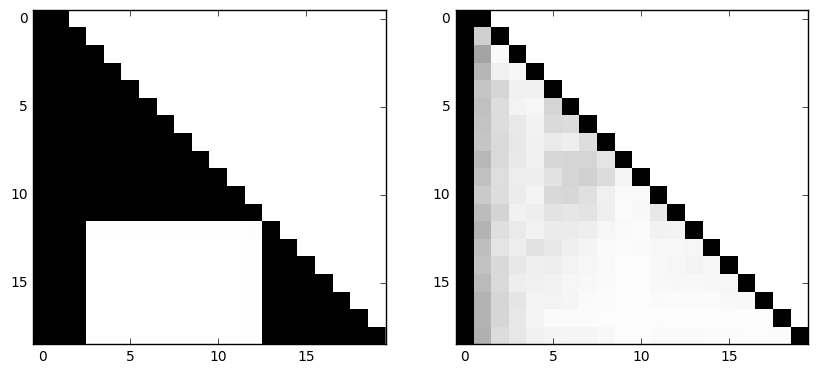

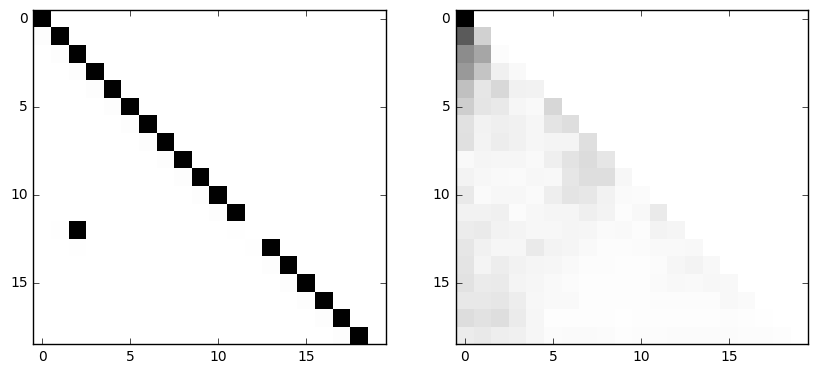

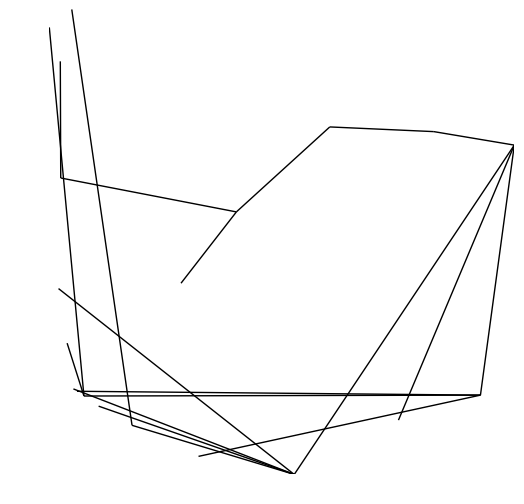

    After 20 iterations
        Discriminator Loss                         = -37406.3710938

    Generator_Loss: 39136.7421875
151
    After 20 iterations
        Discriminator Loss                         = -37076.53125

    Generator_Loss: 39195.9335938
152
    After 20 iterations
        Discriminator Loss                         = -37582.6132812

    Generator_Loss: 39047.1523438
153
    After 20 iterations
        Discriminator Loss                         = -37470.8398438

    Generator_Loss: 39194.4414062
154
    After 20 iterations
        Discriminator Loss                         = -37376.6796875

    Generator_Loss: 39171.7148438
155
    After 20 iterations
        Discriminator Loss                         = -37484.703125

    Generator_Loss: 39353.2421875
156
    After 20 iterations
        Discriminator Loss                         = -36438.3320312

    Generator_Loss: 39126.5195312
157
    After 20 iterations
        Discriminator Loss                         = -37270.12

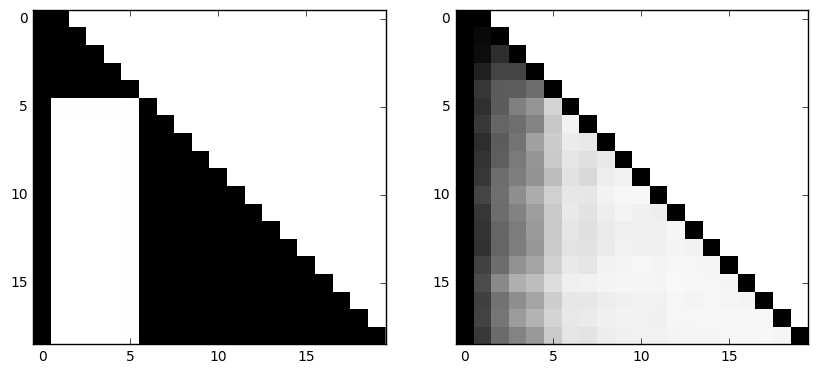

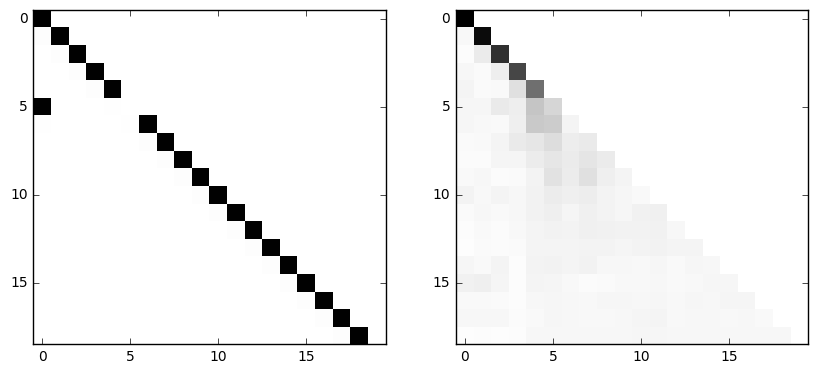

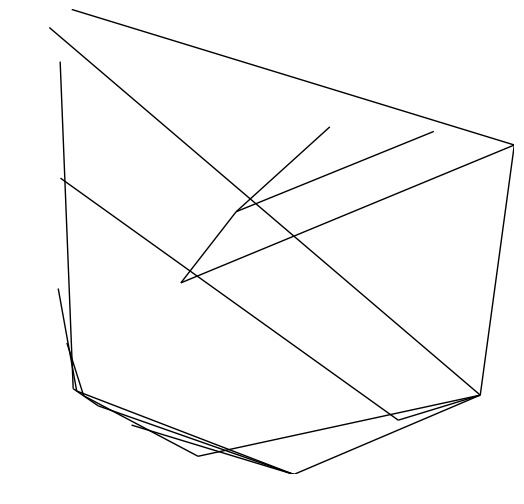

    After 20 iterations
        Discriminator Loss                         = -37365.3789062

    Generator_Loss: 39198.9921875
176
    After 20 iterations
        Discriminator Loss                         = -36539.5351562

    Generator_Loss: 39525.625
177
    After 20 iterations
        Discriminator Loss                         = -37712.234375

    Generator_Loss: 39454.125
178
    After 20 iterations
        Discriminator Loss                         = -37469.546875

    Generator_Loss: 39553.6445312
179
    After 20 iterations
        Discriminator Loss                         = -37672.40625

    Generator_Loss: 39417.8320312
180
    After 20 iterations
        Discriminator Loss                         = -37432.6953125

    Generator_Loss: 39453.1640625
181
    After 20 iterations
        Discriminator Loss                         = -38173.4296875

    Generator_Loss: 39412.8789062
182
    After 20 iterations
        Discriminator Loss                         = -37737.3828125

  

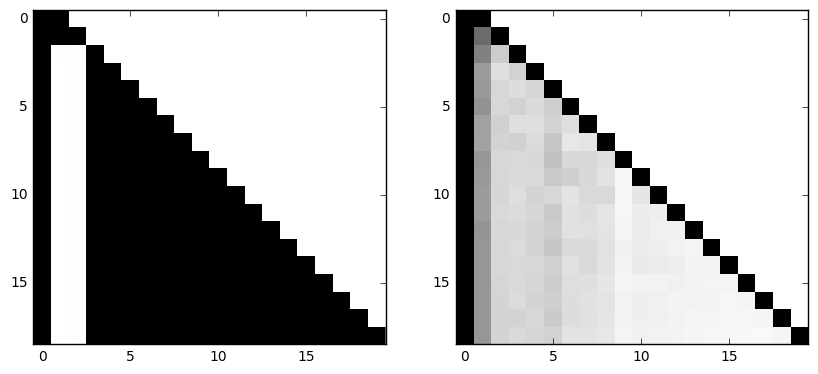

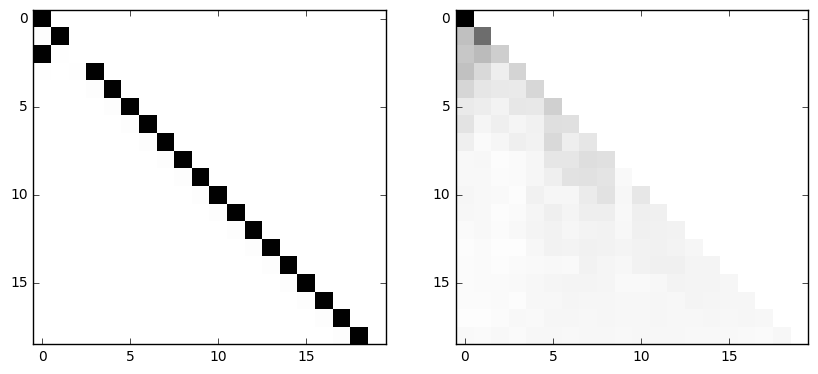

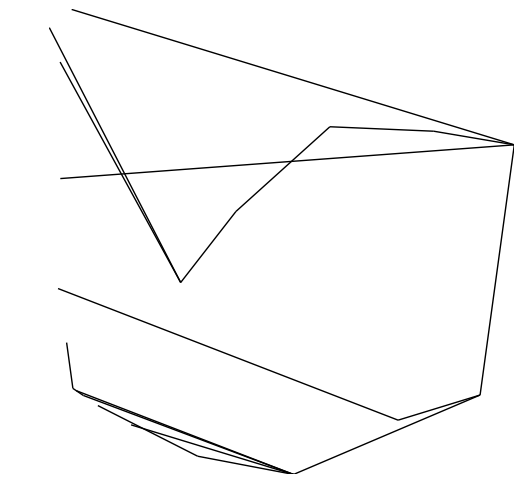

    After 20 iterations
        Discriminator Loss                         = -37536.5390625

    Generator_Loss: 39683.5078125
201
    After 20 iterations
        Discriminator Loss                         = -37861.3710938

    Generator_Loss: 39872.9453125
202
    After 20 iterations
        Discriminator Loss                         = -37595.4960938

    Generator_Loss: 39903.8828125
203
    After 20 iterations
        Discriminator Loss                         = -37793.9179688

    Generator_Loss: 39743.4335938
204
    After 20 iterations
        Discriminator Loss                         = -37800.2109375

    Generator_Loss: 39885.453125
205
    After 20 iterations
        Discriminator Loss                         = -38087.6054688

    Generator_Loss: 39894.8476562
206
    After 20 iterations
        Discriminator Loss                         = -37404.1445312

    Generator_Loss: 39809.8164062
207
    After 20 iterations
        Discriminator Loss                         = -37831.

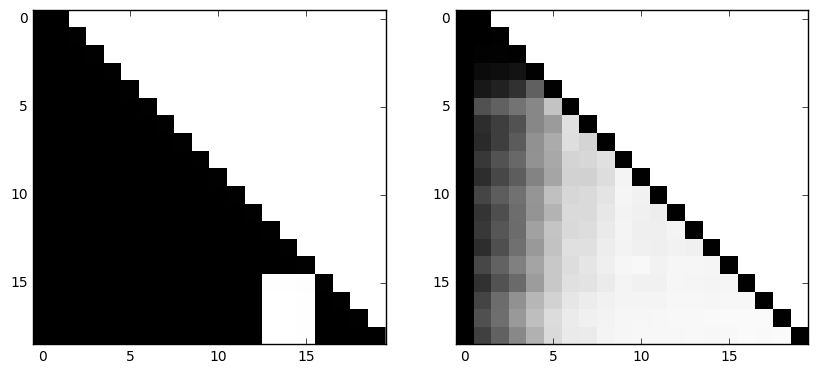

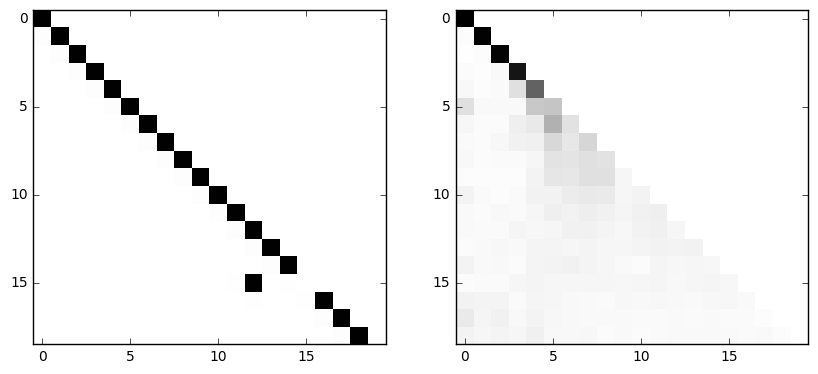

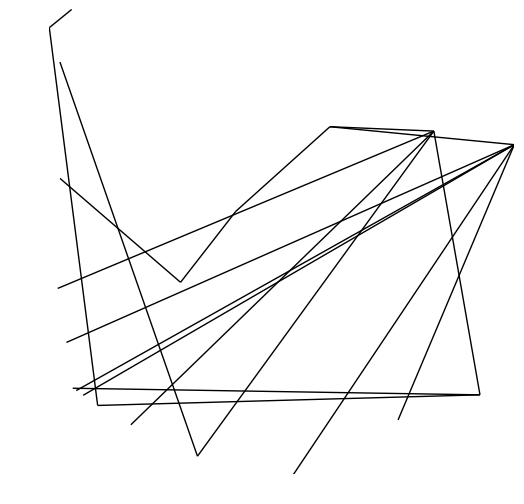

    After 20 iterations
        Discriminator Loss                         = -38051.5234375

    Generator_Loss: 40077.1601562
226
    After 20 iterations
        Discriminator Loss                         = -38177.6679688

    Generator_Loss: 40152.3164062
227
    After 20 iterations
        Discriminator Loss                         = -38126.4609375

    Generator_Loss: 40132.375
228
    After 20 iterations
        Discriminator Loss                         = -38558.1171875

    Generator_Loss: 40210.625
229
    After 20 iterations
        Discriminator Loss                         = -38312.5507812

    Generator_Loss: 40149.7265625
230
    After 20 iterations
        Discriminator Loss                         = -38320.2617188

    Generator_Loss: 40120.8984375
231
    After 20 iterations
        Discriminator Loss                         = -38113.1835938

    Generator_Loss: 40228.8867188
232
    After 20 iterations
        Discriminator Loss                         = -38491.640625


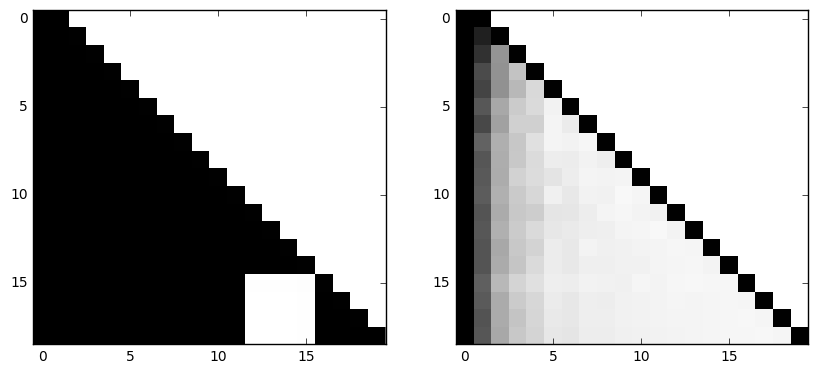

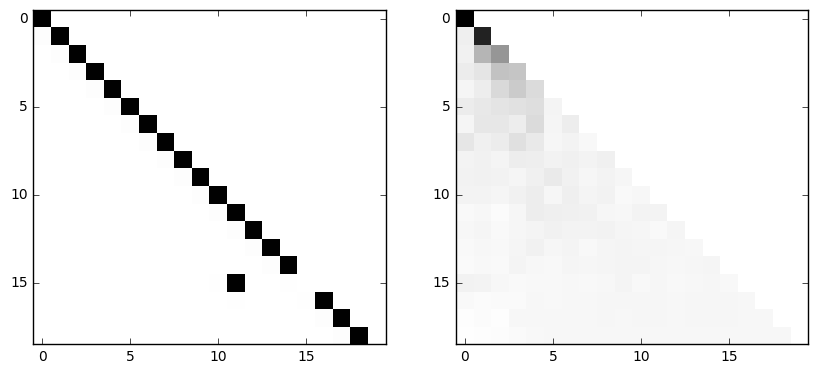

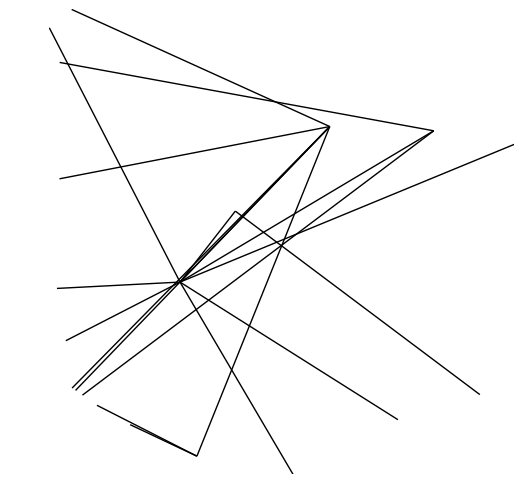

    After 20 iterations
        Discriminator Loss                         = -38433.5351562

    Generator_Loss: 40339.4726562
251
    After 20 iterations
        Discriminator Loss                         = -38823.1132812

    Generator_Loss: 40318.9414062
252
    After 20 iterations
        Discriminator Loss                         = -38589.8164062

    Generator_Loss: 40246.984375
253
    After 20 iterations
        Discriminator Loss                         = -38276.609375

    Generator_Loss: 40181.5820312
254
    After 20 iterations
        Discriminator Loss                         = -38433.2109375

    Generator_Loss: 40463.5507812
255
    After 20 iterations
        Discriminator Loss                         = -38800.4257812

    Generator_Loss: 40409.6679688
256
    After 20 iterations
        Discriminator Loss                         = -38196.5585938

    Generator_Loss: 40400.0078125
257
    After 20 iterations
        Discriminator Loss                         = -38620.8

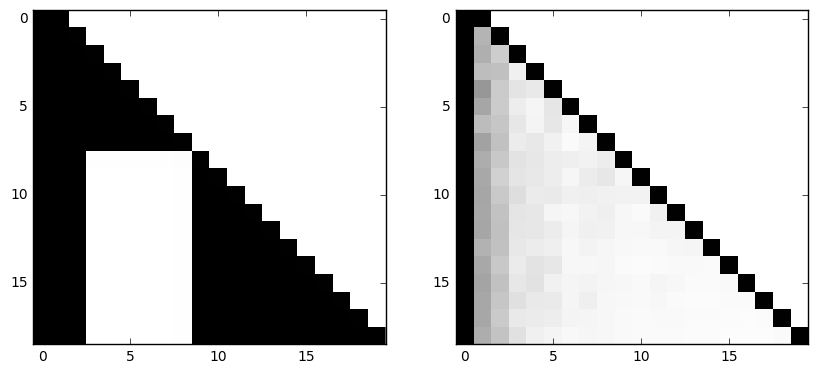

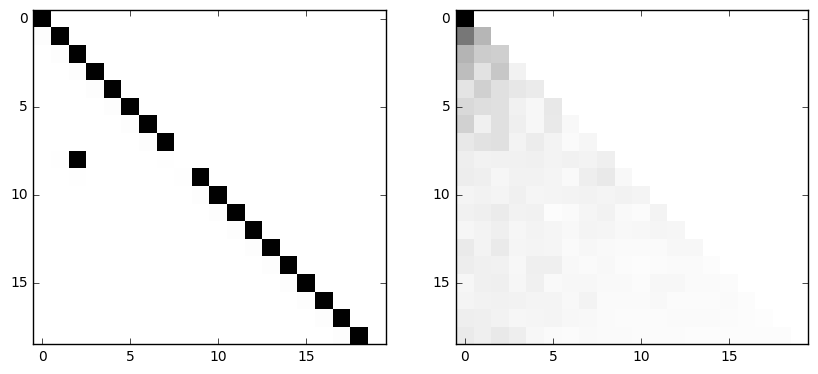

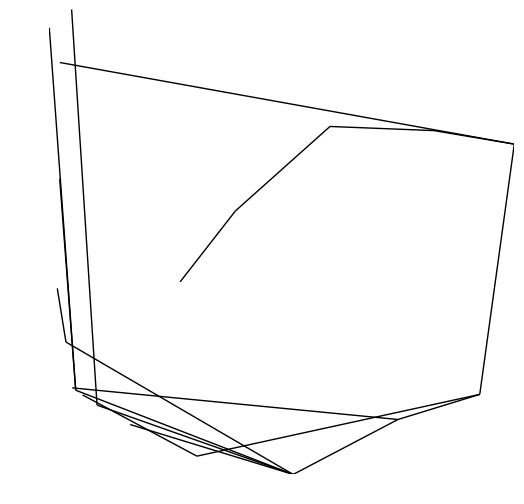

    After 20 iterations
        Discriminator Loss                         = -38669.5273438

    Generator_Loss: 40452.3125
276
    After 20 iterations
        Discriminator Loss                         = -38958.4023438

    Generator_Loss: 40737.5273438
277
    After 20 iterations
        Discriminator Loss                         = -38234.8554688

    Generator_Loss: 40591.2460938
278
    After 20 iterations
        Discriminator Loss                         = -37868.7460938

    Generator_Loss: 40571.7773438
279
    After 20 iterations
        Discriminator Loss                         = -39019.171875

    Generator_Loss: 40665.7382812
280
    After 20 iterations
        Discriminator Loss                         = -39371.9648438

    Generator_Loss: 40764.8828125
281
    After 20 iterations
        Discriminator Loss                         = -39073.9648438

    Generator_Loss: 40573.796875
282
    After 20 iterations
        Discriminator Loss                         = -38885.0039

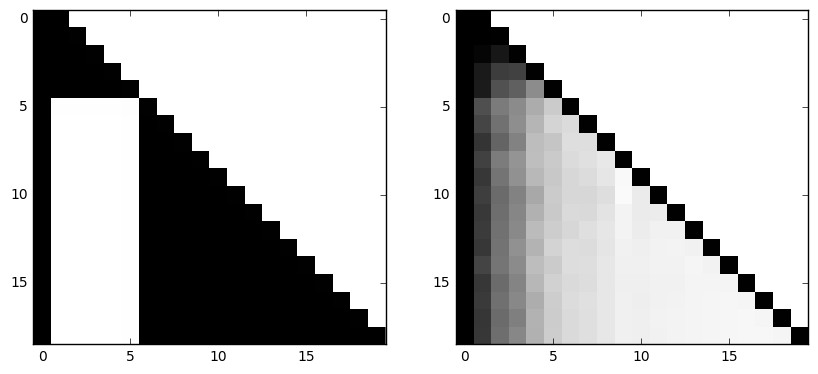

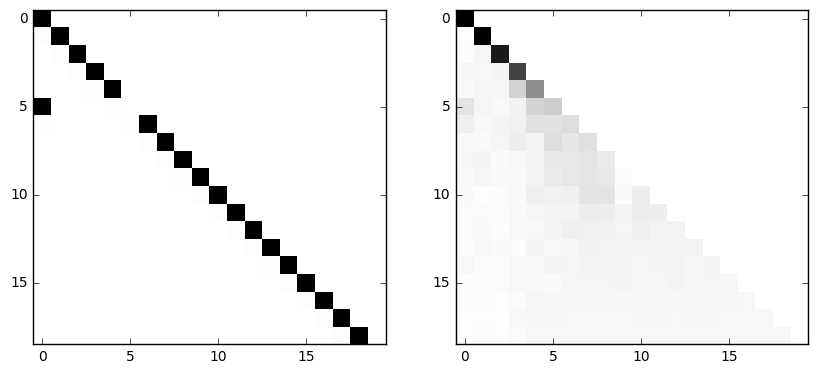

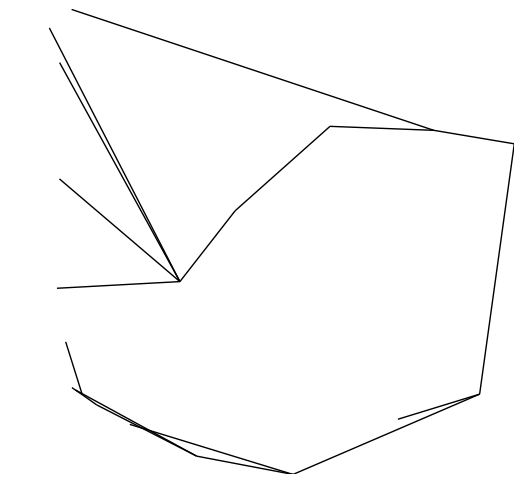

    After 20 iterations
        Discriminator Loss                         = -38759.5

    Generator_Loss: 40894.0625
301
    After 20 iterations
        Discriminator Loss                         = -39413.7617188

    Generator_Loss: 40818.8085938
302
    After 20 iterations
        Discriminator Loss                         = -39038.7382812

    Generator_Loss: 41059.3789062
303
    After 20 iterations
        Discriminator Loss                         = -39158.6132812

    Generator_Loss: 41041.7578125
304
    After 20 iterations
        Discriminator Loss                         = -39264.8359375

    Generator_Loss: 41067.2460938
305
    After 20 iterations
        Discriminator Loss                         = -39237.0

    Generator_Loss: 40954.6171875
306
    After 20 iterations
        Discriminator Loss                         = -39244.9335938

    Generator_Loss: 41048.8710938
307
    After 20 iterations
        Discriminator Loss                         = -39670.7617188

    G

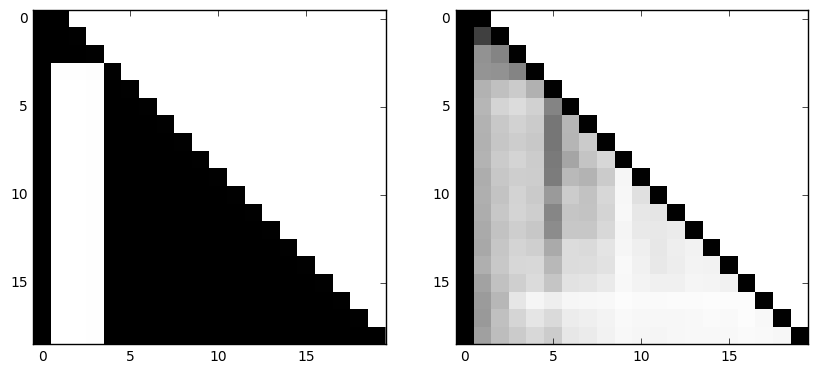

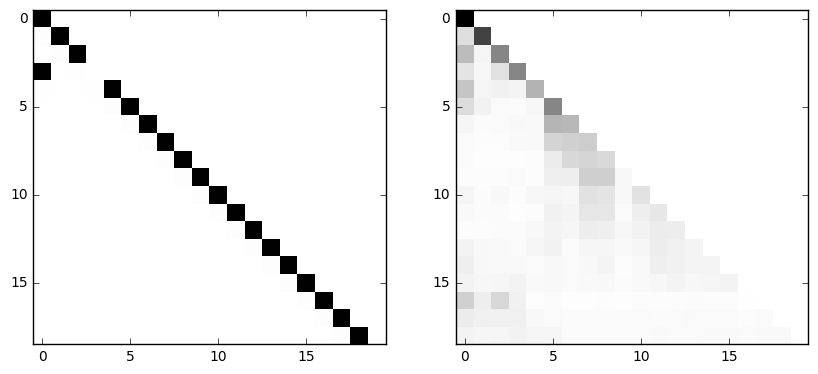

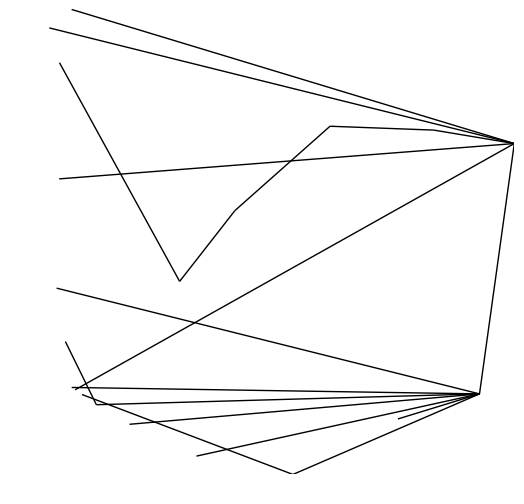

    After 20 iterations
        Discriminator Loss                         = -39023.6015625

    Generator_Loss: 41214.8710938
326
    After 20 iterations
        Discriminator Loss                         = -39536.6640625

    Generator_Loss: 41362.984375
327
    After 20 iterations
        Discriminator Loss                         = -39375.6835938

    Generator_Loss: 41336.1757812
328
    After 20 iterations
        Discriminator Loss                         = -39093.5234375

    Generator_Loss: 41122.28125
329
    After 20 iterations
        Discriminator Loss                         = -39801.6015625

    Generator_Loss: 41227.6992188
330
    After 20 iterations
        Discriminator Loss                         = -39383.546875

    Generator_Loss: 41281.2851562
331
    After 20 iterations
        Discriminator Loss                         = -39526.7265625

    Generator_Loss: 41190.1796875
332
    After 20 iterations
        Discriminator Loss                         = -39280.050

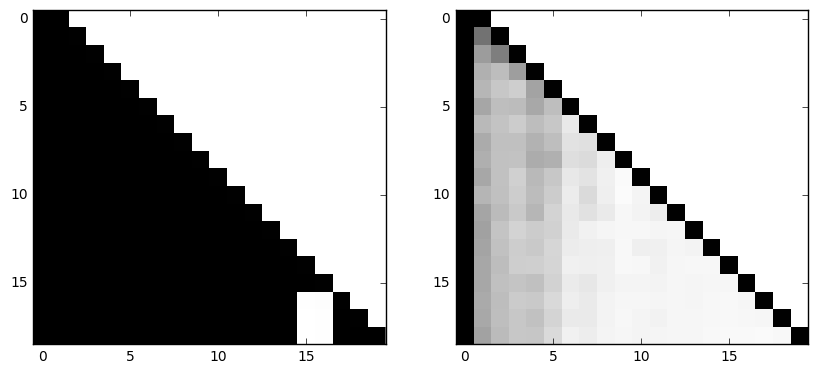

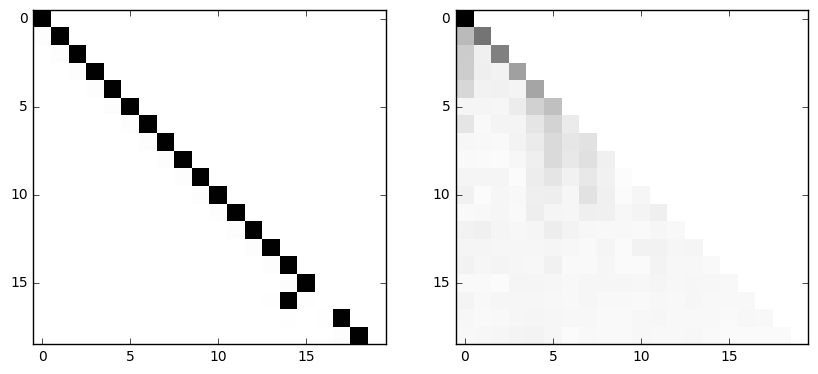

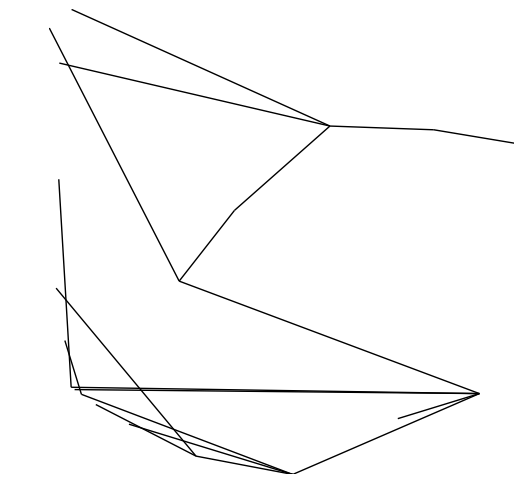

    After 20 iterations
        Discriminator Loss                         = -39476.03125

    Generator_Loss: 41513.3867188
351
    After 20 iterations
        Discriminator Loss                         = -39610.4335938

    Generator_Loss: 41389.5390625
352
    After 20 iterations
        Discriminator Loss                         = -39995.328125

    Generator_Loss: 41500.5859375
353
    After 20 iterations
        Discriminator Loss                         = -40118.0664062

    Generator_Loss: 41554.2695312
354
    After 20 iterations
        Discriminator Loss                         = -39900.1171875

    Generator_Loss: 41540.6601562
355
    After 20 iterations
        Discriminator Loss                         = -39658.953125

    Generator_Loss: 41452.2734375
356
    After 20 iterations
        Discriminator Loss                         = -40322.1875

    Generator_Loss: 41582.7070312
357
    After 20 iterations
        Discriminator Loss                         = -39639.703125

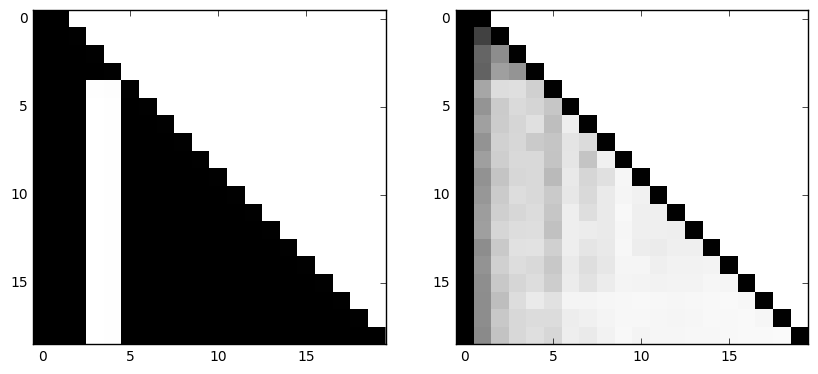

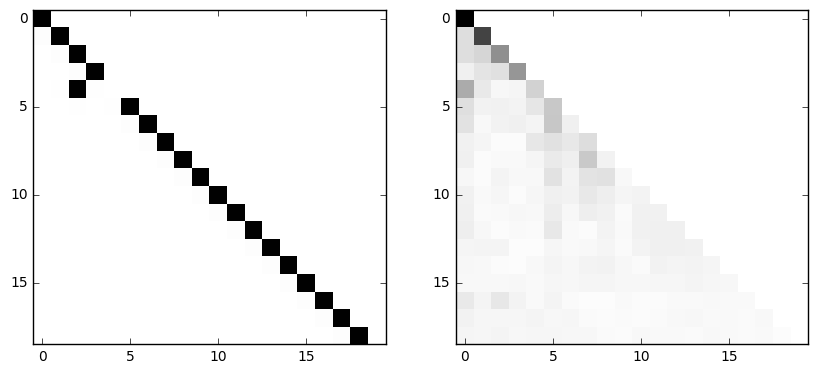

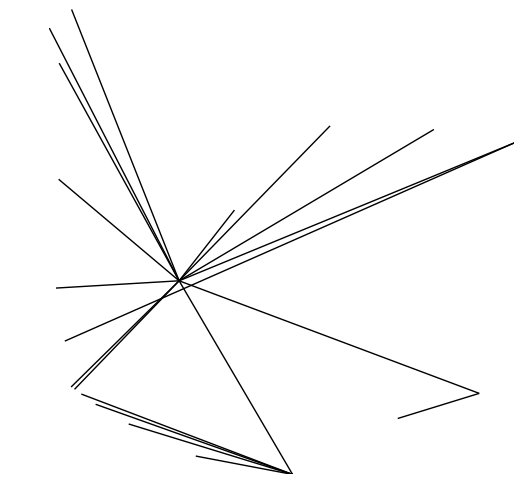

    After 20 iterations
        Discriminator Loss                         = -40104.546875

    Generator_Loss: 41827.6367188
376
    After 20 iterations
        Discriminator Loss                         = -39561.1210938

    Generator_Loss: 41639.5351562
377
    After 20 iterations
        Discriminator Loss                         = -40555.9570312

    Generator_Loss: 41737.25
378
    After 20 iterations
        Discriminator Loss                         = -40089.0898438

    Generator_Loss: 41754.9414062
379
    After 20 iterations
        Discriminator Loss                         = -39765.7148438

    Generator_Loss: 41931.5429688
380
    After 20 iterations
        Discriminator Loss                         = -39845.9492188

    Generator_Loss: 41860.5039062
381
    After 20 iterations
        Discriminator Loss                         = -39645.5742188

    Generator_Loss: 41885.3984375
382
    After 20 iterations
        Discriminator Loss                         = -39827.73828

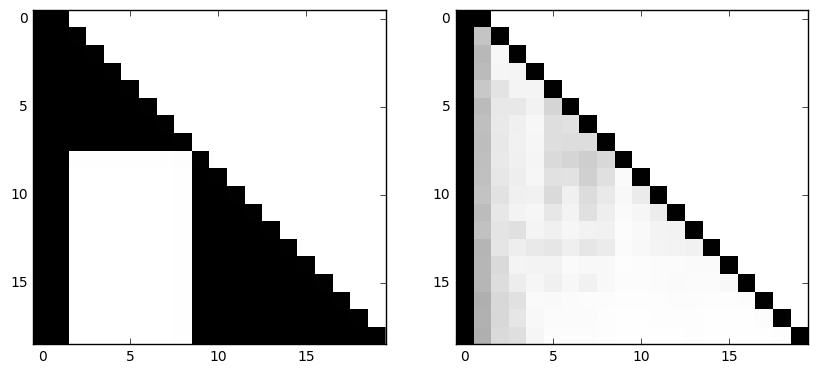

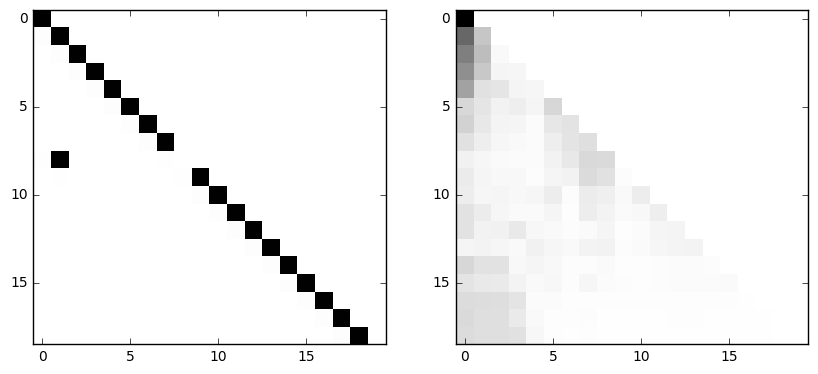

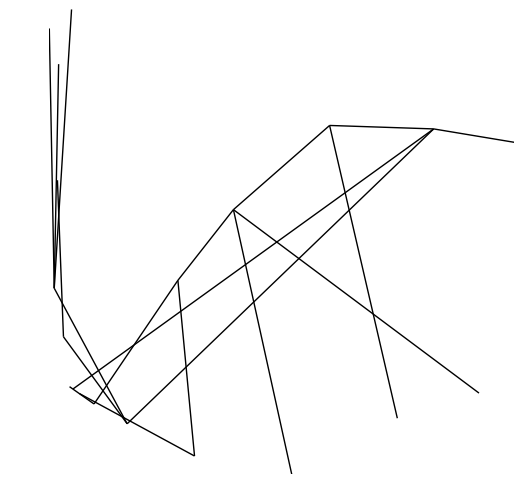

    After 20 iterations
        Discriminator Loss                         = -39992.5117188

    Generator_Loss: 42090.8476562
401
    After 20 iterations
        Discriminator Loss                         = -40370.3242188

    Generator_Loss: 42200.7695312
402
    After 20 iterations
        Discriminator Loss                         = -40686.2382812

    Generator_Loss: 41952.7890625
403
    After 20 iterations
        Discriminator Loss                         = -40268.7539062

    Generator_Loss: 42048.8398438
404
    After 20 iterations
        Discriminator Loss                         = -39943.1601562

    Generator_Loss: 42052.9296875
405
    After 20 iterations
        Discriminator Loss                         = -40580.5664062

    Generator_Loss: 42092.875
406
    After 20 iterations
        Discriminator Loss                         = -40275.3359375

    Generator_Loss: 42032.3789062
407
    After 20 iterations
        Discriminator Loss                         = -39887.437

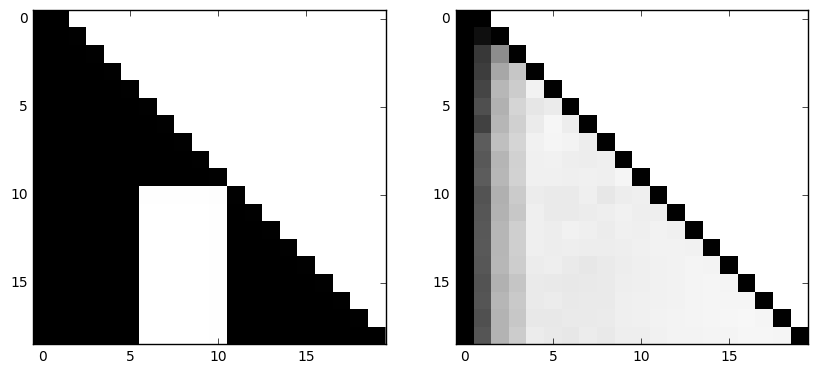

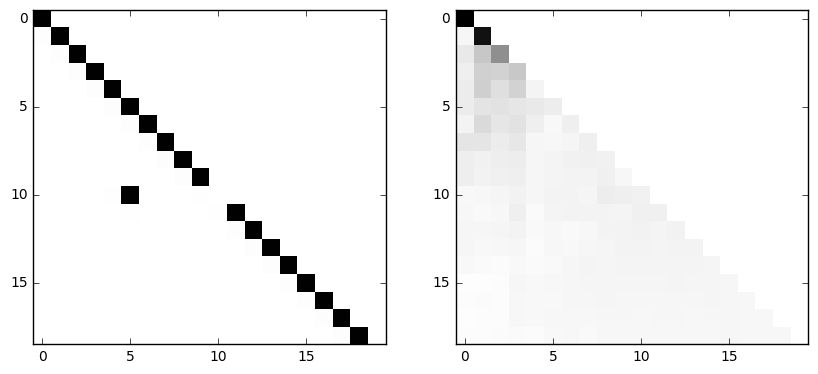

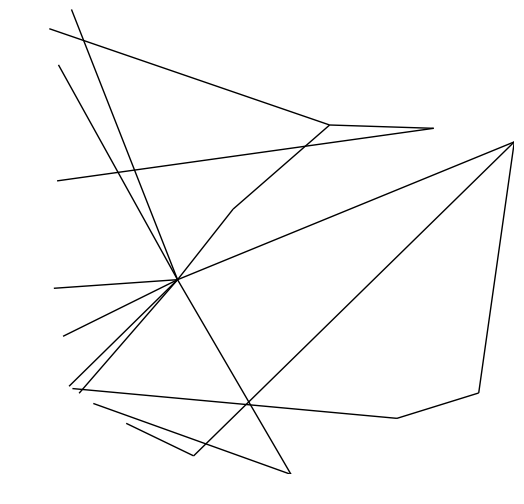

    After 20 iterations
        Discriminator Loss                         = -40362.6132812

    Generator_Loss: 42136.3164062
426
    After 20 iterations
        Discriminator Loss                         = -40508.5742188

    Generator_Loss: 42299.7695312
427
    After 20 iterations
        Discriminator Loss                         = -40499.640625

    Generator_Loss: 42429.7070312
428
    After 20 iterations
        Discriminator Loss                         = -40685.9140625

    Generator_Loss: 42409.53125
429
    After 20 iterations
        Discriminator Loss                         = -40460.7929688

    Generator_Loss: 42436.6601562
430
    After 20 iterations
        Discriminator Loss                         = -40943.7304688

    Generator_Loss: 42439.703125
431
    After 20 iterations
        Discriminator Loss                         = -40793.6796875

    Generator_Loss: 42377.1757812
432
    After 20 iterations
        Discriminator Loss                         = -40395.148

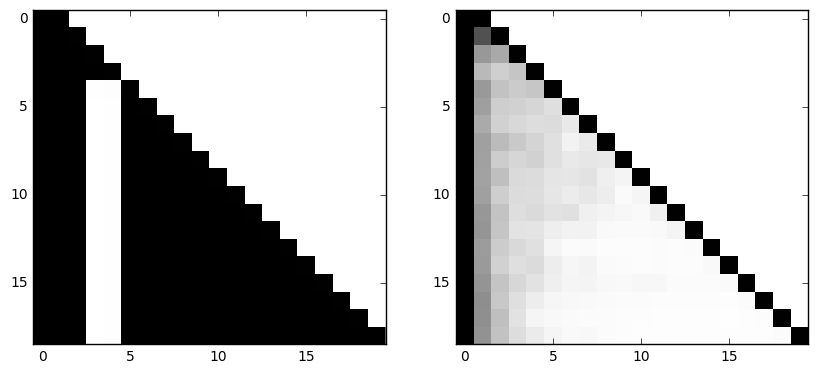

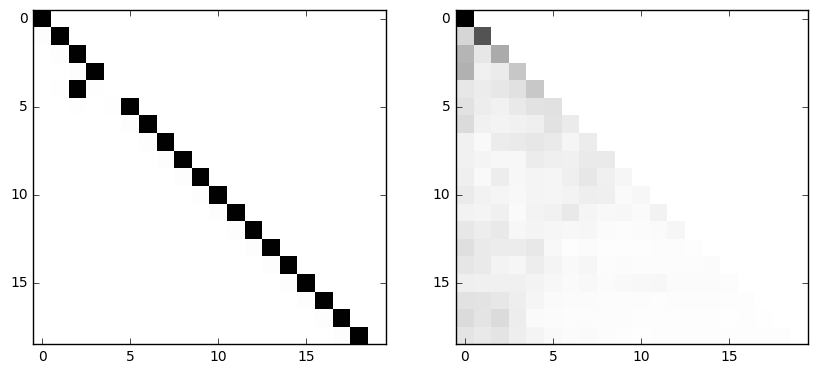

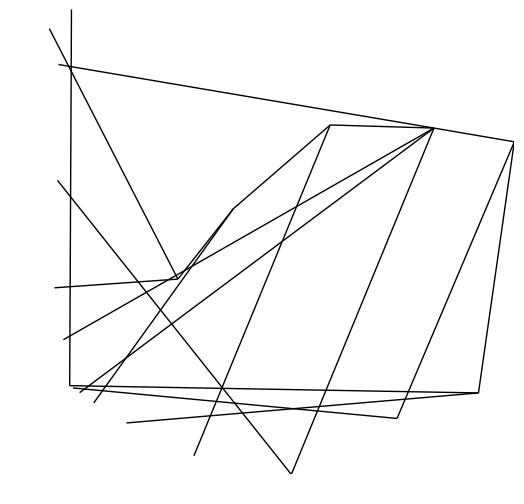

    After 20 iterations
        Discriminator Loss                         = -40972.8984375

    Generator_Loss: 42591.8515625
451
    After 20 iterations
        Discriminator Loss                         = -40740.1328125

    Generator_Loss: 42639.46875
452
    After 20 iterations
        Discriminator Loss                         = -41014.4296875

    Generator_Loss: 42468.5429688
453
    After 20 iterations
        Discriminator Loss                         = -40990.7773438

    Generator_Loss: 42427.8984375
454
    After 20 iterations
        Discriminator Loss                         = -40653.25

    Generator_Loss: 42695.4335938
455
    After 20 iterations
        Discriminator Loss                         = -41113.9335938

    Generator_Loss: 42552.1484375
456
    After 20 iterations
        Discriminator Loss                         = -40299.265625

    Generator_Loss: 42665.0976562
457
    After 20 iterations
        Discriminator Loss                         = -40552.2460938

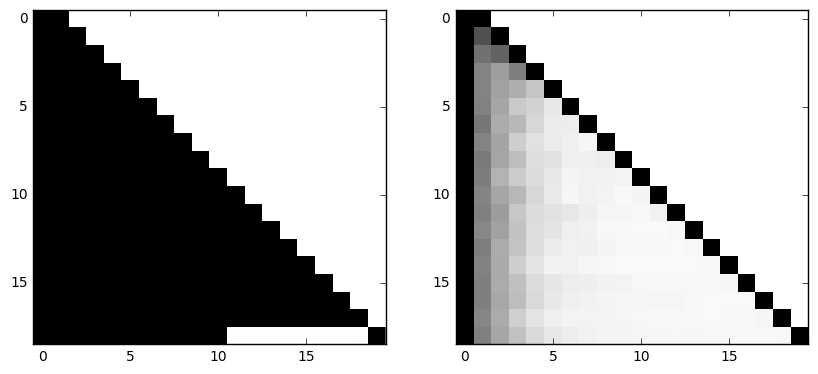

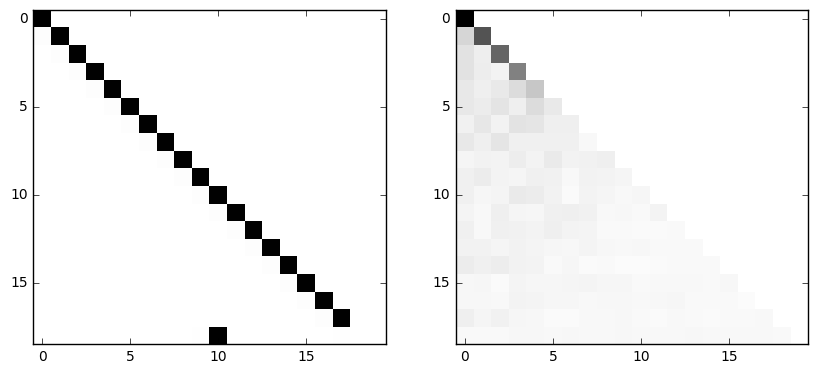

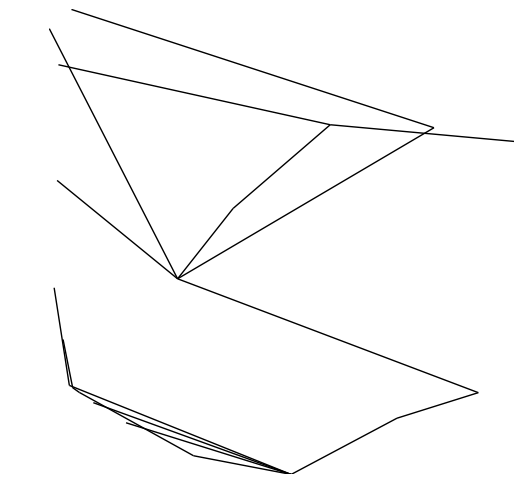

    After 20 iterations
        Discriminator Loss                         = -40788.2460938

    Generator_Loss: 42648.171875
476
    After 20 iterations
        Discriminator Loss                         = -40546.8984375

    Generator_Loss: 42765.4726562
477
    After 20 iterations
        Discriminator Loss                         = -40683.0195312

    Generator_Loss: 42819.2773438
478
    After 20 iterations
        Discriminator Loss                         = -40670.109375

    Generator_Loss: 43006.34375
479
    After 20 iterations
        Discriminator Loss                         = -41261.3476562

    Generator_Loss: 43068.6328125
480
    After 20 iterations
        Discriminator Loss                         = -40667.1757812

    Generator_Loss: 42896.1679688
481
    After 20 iterations
        Discriminator Loss                         = -41206.84375

    Generator_Loss: 43046.28125
482
    After 20 iterations
        Discriminator Loss                         = -40534.2773438

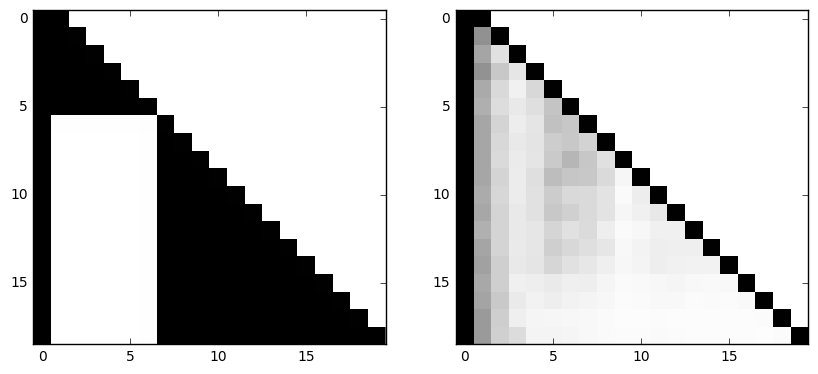

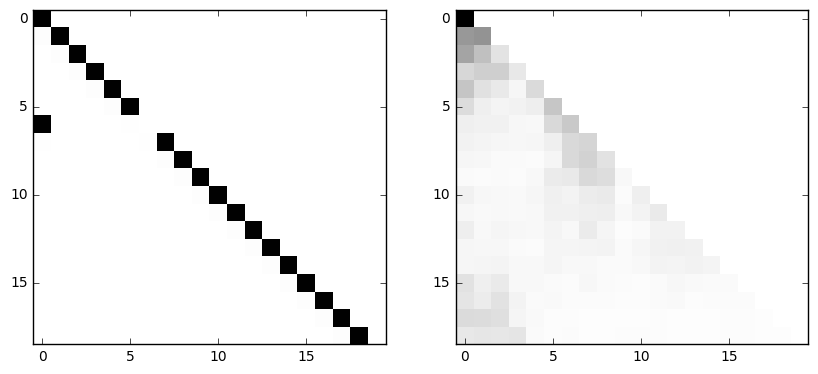

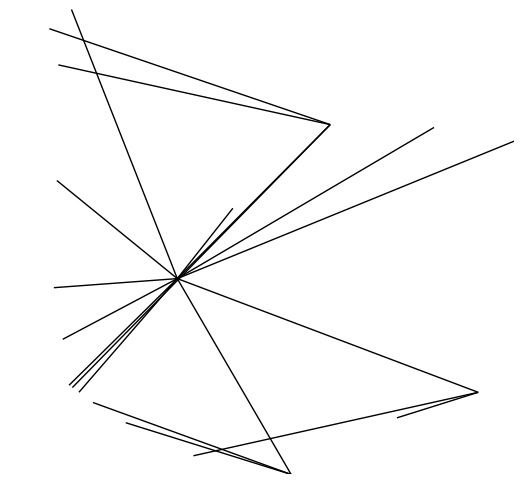

    After 20 iterations
        Discriminator Loss                         = -41637.6054688

    Generator_Loss: 43364.7851562
501
    After 20 iterations
        Discriminator Loss                         = -41292.0742188

    Generator_Loss: 43153.3398438
502
    After 20 iterations
        Discriminator Loss                         = -41129.59375

    Generator_Loss: 43140.4960938
503
    After 20 iterations
        Discriminator Loss                         = -41340.171875

    Generator_Loss: 43169.4335938
504
    After 20 iterations
        Discriminator Loss                         = -41275.5117188

    Generator_Loss: 43317.2382812
505
    After 20 iterations
        Discriminator Loss                         = -41363.7929688

    Generator_Loss: 43140.2148438
506
    After 20 iterations
        Discriminator Loss                         = -41222.7617188

    Generator_Loss: 43230.0234375
507
    After 20 iterations
        Discriminator Loss                         = -41166.29

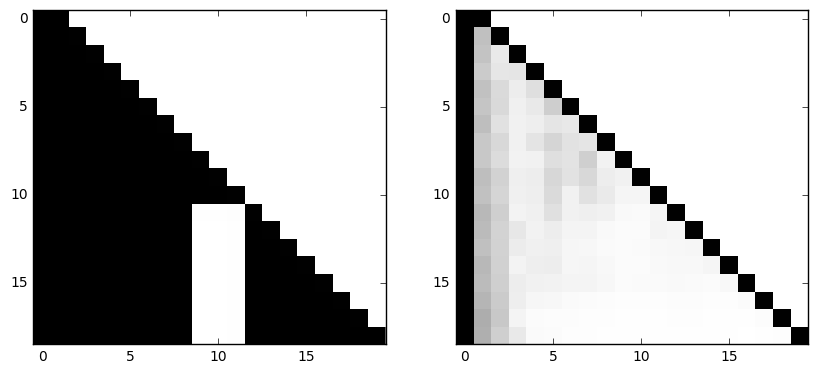

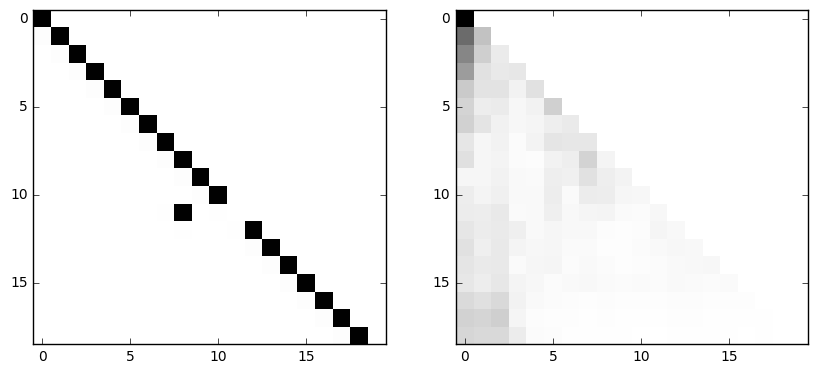

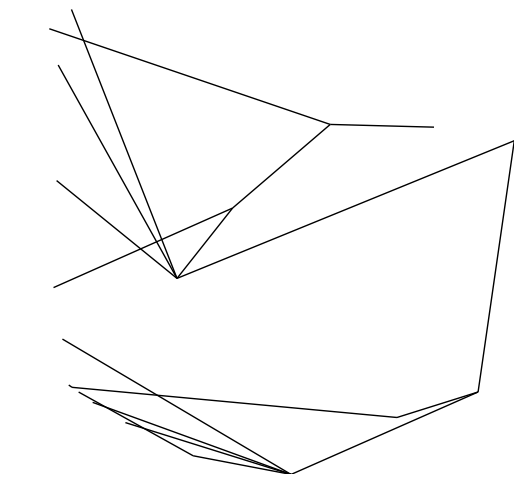

    After 20 iterations
        Discriminator Loss                         = -41492.2578125

    Generator_Loss: 43506.34375
526
    After 20 iterations
        Discriminator Loss                         = -41791.6601562

    Generator_Loss: 43429.953125
527
    After 20 iterations
        Discriminator Loss                         = -41121.734375

    Generator_Loss: 43420.390625
528
    After 20 iterations
        Discriminator Loss                         = -41584.796875

    Generator_Loss: 43464.5078125
529
    After 20 iterations
        Discriminator Loss                         = -41943.046875

    Generator_Loss: 43433.9414062
530
    After 20 iterations
        Discriminator Loss                         = -41769.1953125

    Generator_Loss: 43607.0117188
531
    After 20 iterations
        Discriminator Loss                         = -41776.9492188

    Generator_Loss: 43505.9453125
532
    After 20 iterations
        Discriminator Loss                         = -41646.53125


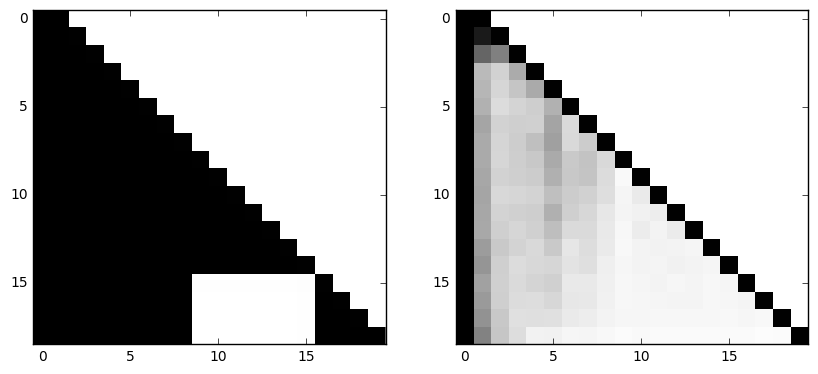

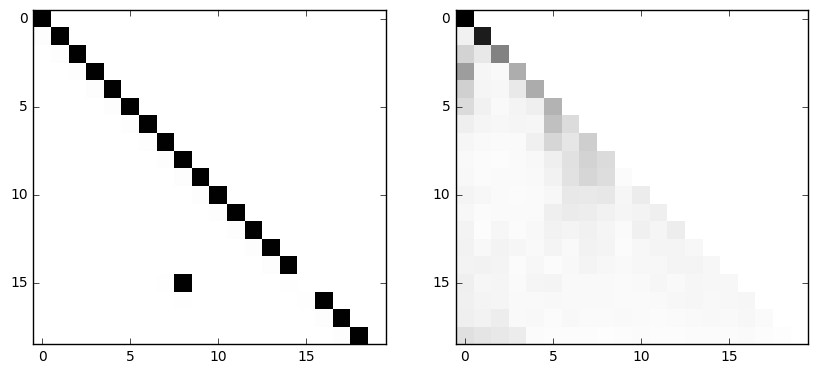

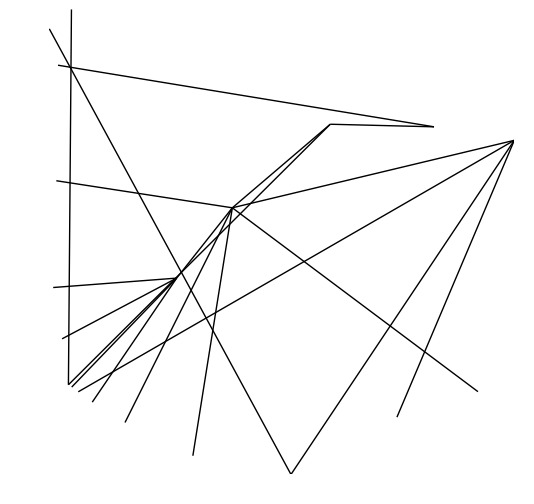

    After 20 iterations
        Discriminator Loss                         = -41654.2070312

    Generator_Loss: 43619.265625
551
    After 20 iterations
        Discriminator Loss                         = -41980.5429688

    Generator_Loss: 43752.4921875
552
    After 20 iterations
        Discriminator Loss                         = -41932.7929688

    Generator_Loss: 43781.15625
553
    After 20 iterations
        Discriminator Loss                         = -42073.3867188

    Generator_Loss: 43674.8164062
554
    After 20 iterations
        Discriminator Loss                         = -41916.8398438

    Generator_Loss: 43762.8398438
555
    After 20 iterations
        Discriminator Loss                         = -41665.1875

    Generator_Loss: 43756.2304688
556
    After 20 iterations
        Discriminator Loss                         = -42112.1523438

    Generator_Loss: 43685.75
557
    After 20 iterations
        Discriminator Loss                         = -41814.71875

   

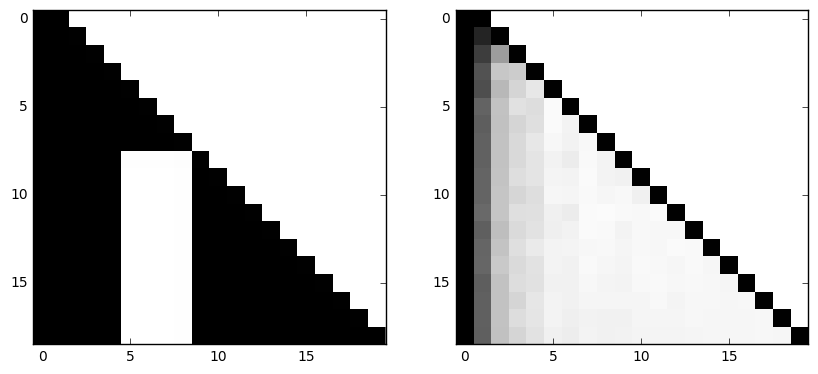

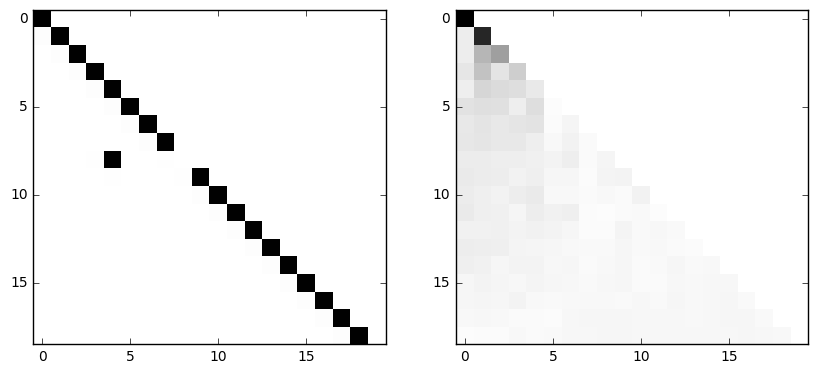

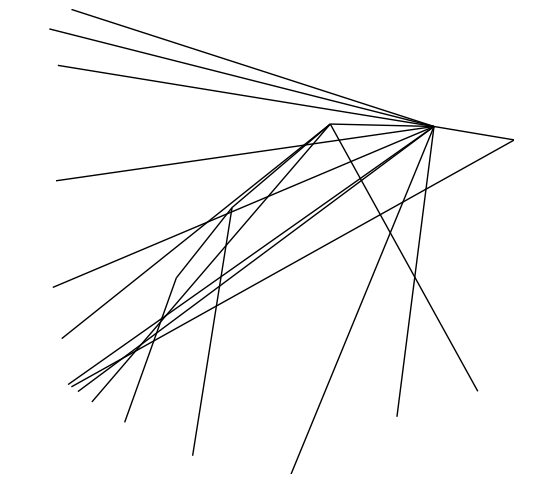

    After 20 iterations
        Discriminator Loss                         = -42580.78125

    Generator_Loss: 43914.953125
576
    After 20 iterations
        Discriminator Loss                         = -42396.2773438

    Generator_Loss: 44016.5859375
577
    After 20 iterations
        Discriminator Loss                         = -42475.7539062

    Generator_Loss: 44132.0273438
578
    After 20 iterations
        Discriminator Loss                         = -41842.734375

    Generator_Loss: 43970.5390625
579
    After 20 iterations
        Discriminator Loss                         = -41949.71875

    Generator_Loss: 44047.96875
580
    After 20 iterations
        Discriminator Loss                         = -42103.3125

    Generator_Loss: 44084.2109375
581
    After 20 iterations
        Discriminator Loss                         = -41998.1640625

    Generator_Loss: 44078.5703125
582
    After 20 iterations
        Discriminator Loss                         = -41814.0078125

 

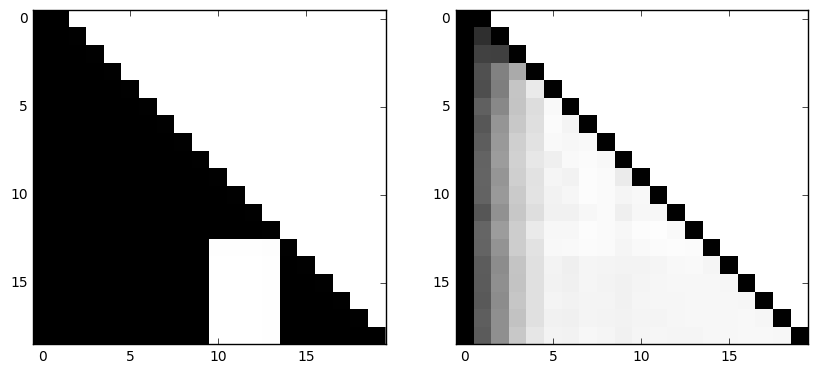

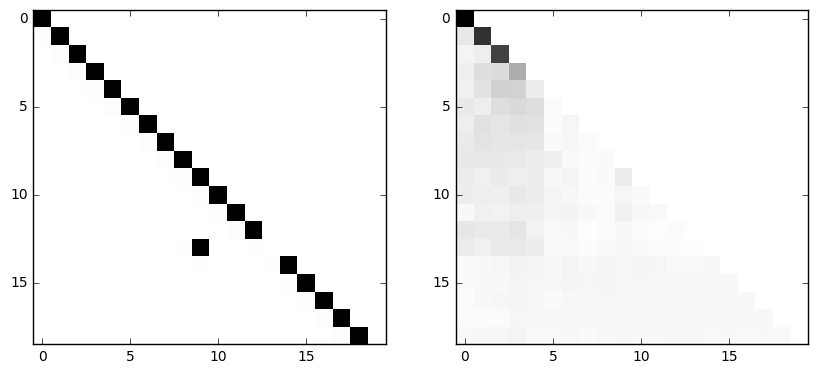

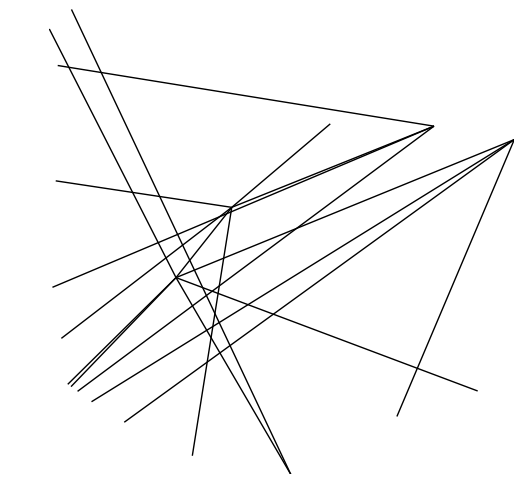

    After 20 iterations
        Discriminator Loss                         = -42699.875

    Generator_Loss: 44131.4882812
601
    After 20 iterations
        Discriminator Loss                         = -42212.4453125

    Generator_Loss: 44248.1289062
602
    After 20 iterations
        Discriminator Loss                         = -42268.7695312

    Generator_Loss: 44178.1601562
603
    After 20 iterations
        Discriminator Loss                         = -41980.0351562

    Generator_Loss: 44268.3203125
604
    After 20 iterations
        Discriminator Loss                         = -42021.1835938

    Generator_Loss: 44258.4804688
605
    After 20 iterations
        Discriminator Loss                         = -42089.0507812

    Generator_Loss: 44243.734375
606
    After 20 iterations
        Discriminator Loss                         = -42703.8242188

    Generator_Loss: 44230.3671875
607
    After 20 iterations
        Discriminator Loss                         = -42712.4765

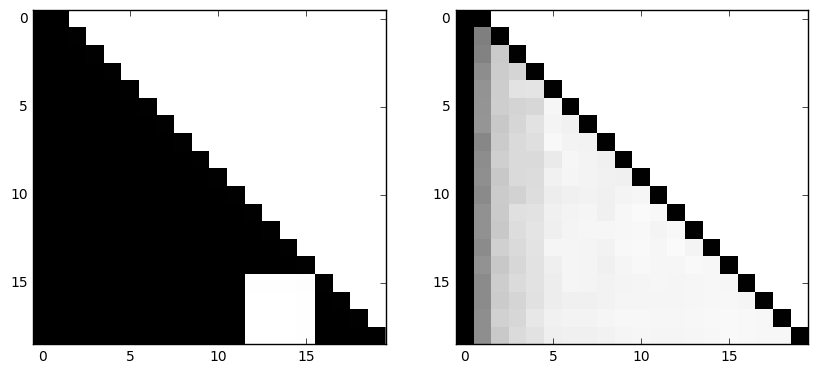

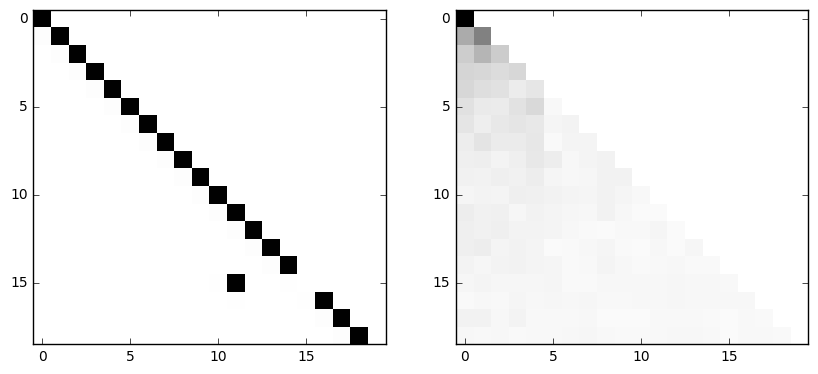

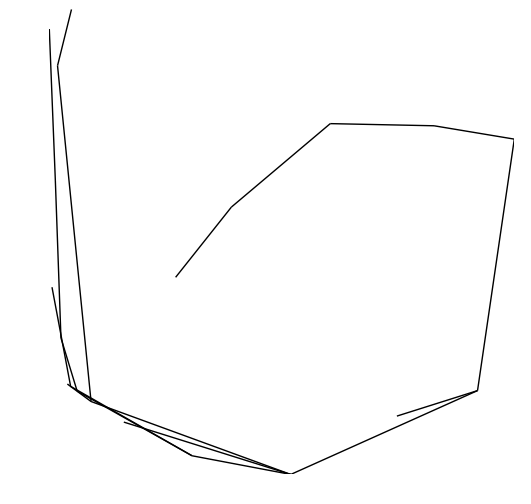

    After 20 iterations
        Discriminator Loss                         = -42577.578125

    Generator_Loss: 44578.453125
626
    After 20 iterations
        Discriminator Loss                         = -42762.1132812

    Generator_Loss: 44347.84375
627
    After 20 iterations
        Discriminator Loss                         = -42924.546875

    Generator_Loss: 44516.7695312
628
    After 20 iterations
        Discriminator Loss                         = -42485.8476562

    Generator_Loss: 44426.5625
629
    After 20 iterations
        Discriminator Loss                         = -42207.7265625

    Generator_Loss: 44440.125
630
    After 20 iterations
        Discriminator Loss                         = -42448.8164062

    Generator_Loss: 44556.1679688
631
    After 20 iterations
        Discriminator Loss                         = -42866.03125

    Generator_Loss: 44597.390625
632
    After 20 iterations
        Discriminator Loss                         = -43251.625

    Gener

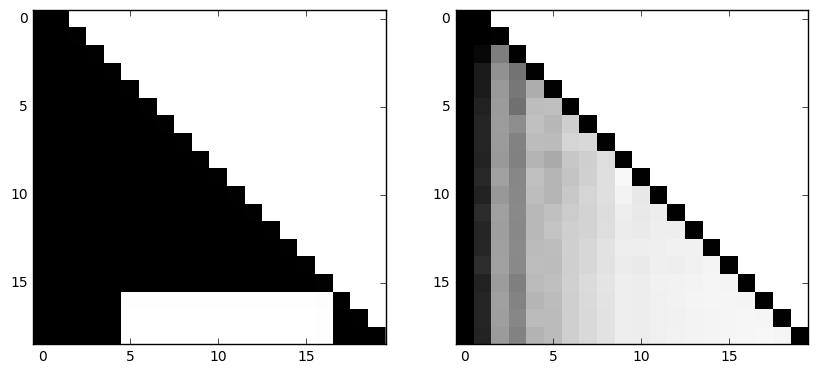

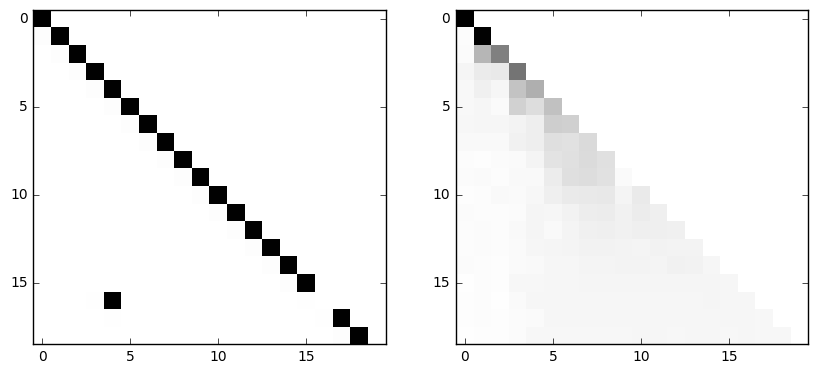

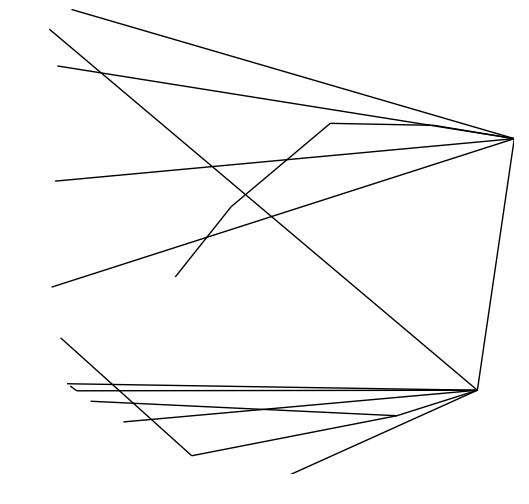

    After 20 iterations
        Discriminator Loss                         = -42944.6914062

    Generator_Loss: 44778.3125
651
    After 20 iterations
        Discriminator Loss                         = -42600.96875

    Generator_Loss: 44833.3554688
652
    After 20 iterations
        Discriminator Loss                         = -42866.015625

    Generator_Loss: 44858.8164062
653
    After 20 iterations
        Discriminator Loss                         = -43128.1601562

    Generator_Loss: 44762.9804688
654
    After 20 iterations
        Discriminator Loss                         = -42533.546875

    Generator_Loss: 44754.5351562
655
    After 20 iterations
        Discriminator Loss                         = -42789.8867188

    Generator_Loss: 44818.8085938
656
    After 20 iterations
        Discriminator Loss                         = -42578.46875

    Generator_Loss: 44713.265625
657
    After 20 iterations
        Discriminator Loss                         = -42926.4453125



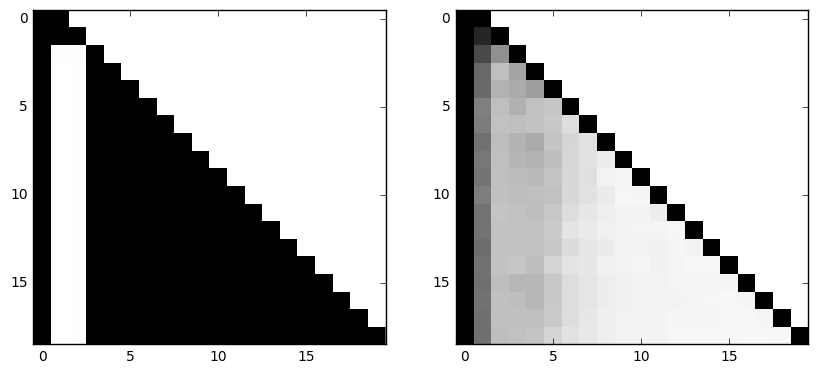

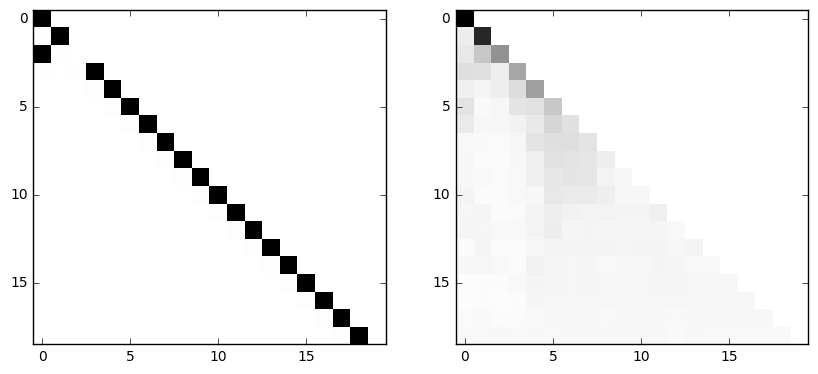

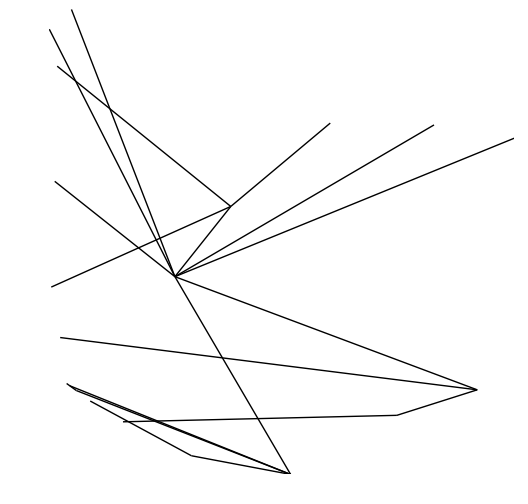

    After 20 iterations
        Discriminator Loss                         = -43280.9648438

    Generator_Loss: 44983.6914062
676
    After 20 iterations
        Discriminator Loss                         = -43621.8789062

    Generator_Loss: 45100.7460938
677
    After 20 iterations
        Discriminator Loss                         = -42585.3984375

    Generator_Loss: 44941.3984375
678
    After 20 iterations
        Discriminator Loss                         = -43110.65625

    Generator_Loss: 45098.609375
679
    After 20 iterations
        Discriminator Loss                         = -42977.4921875

    Generator_Loss: 45158.328125
680
    After 20 iterations
        Discriminator Loss                         = -43542.390625

    Generator_Loss: 44957.796875
681
    After 20 iterations
        Discriminator Loss                         = -42782.7617188

    Generator_Loss: 44944.078125
682
    After 20 iterations
        Discriminator Loss                         = -42723.257812

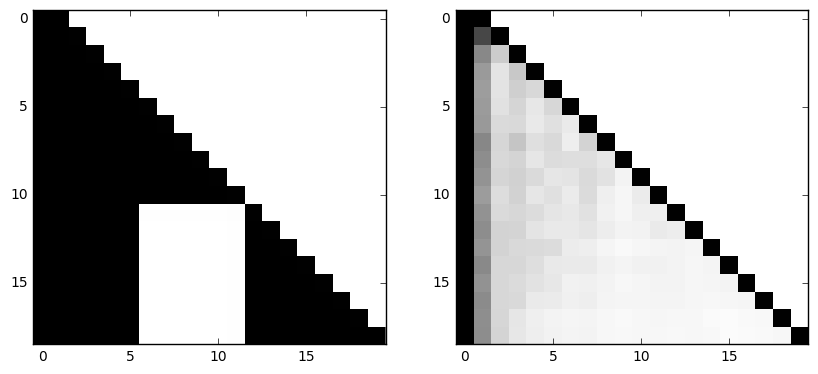

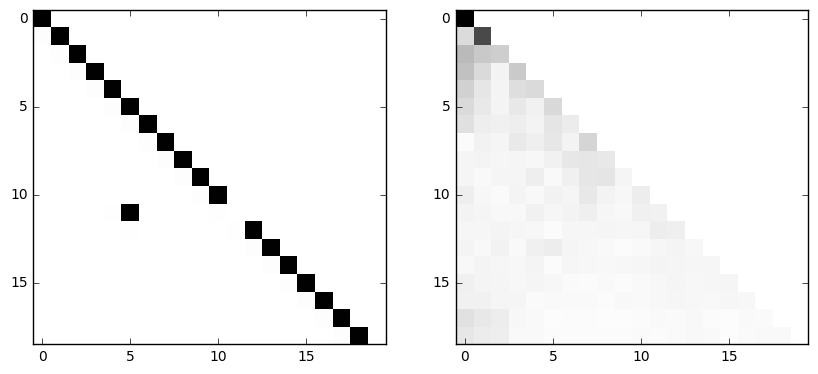

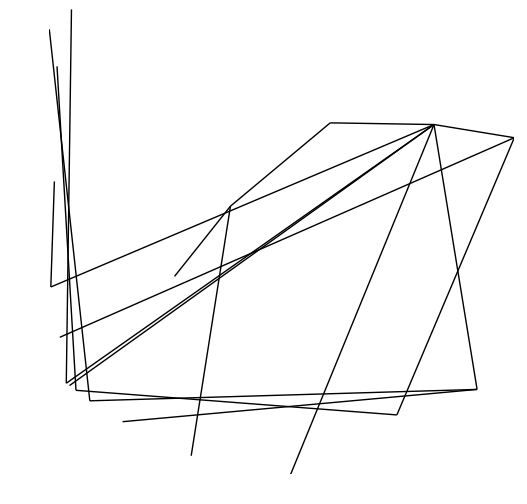

    After 20 iterations
        Discriminator Loss                         = -42972.59375

    Generator_Loss: 45131.5976562
701
    After 20 iterations
        Discriminator Loss                         = -43515.5117188

    Generator_Loss: 45062.9335938
702
    After 20 iterations
        Discriminator Loss                         = -43539.6640625

    Generator_Loss: 45139.9492188
703
    After 20 iterations
        Discriminator Loss                         = -43171.5078125

    Generator_Loss: 45360.484375
704
    After 20 iterations
        Discriminator Loss                         = -43318.046875

    Generator_Loss: 45366.6523438
705
    After 20 iterations
        Discriminator Loss                         = -43308.609375

    Generator_Loss: 45418.3867188
706
    After 20 iterations
        Discriminator Loss                         = -43507.1484375

    Generator_Loss: 45237.015625
707
    After 20 iterations
        Discriminator Loss                         = -42877.00781

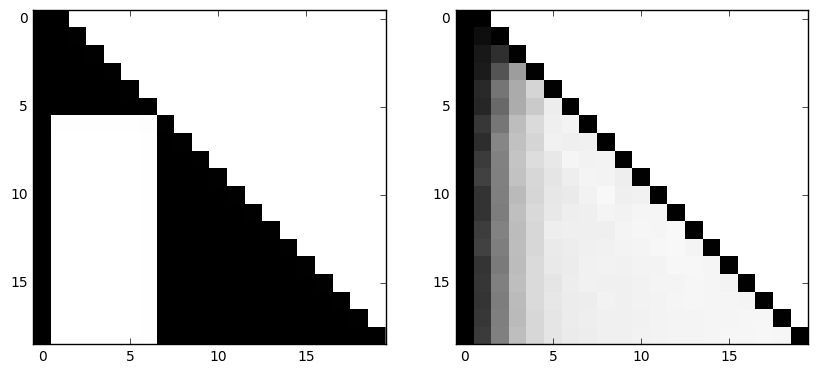

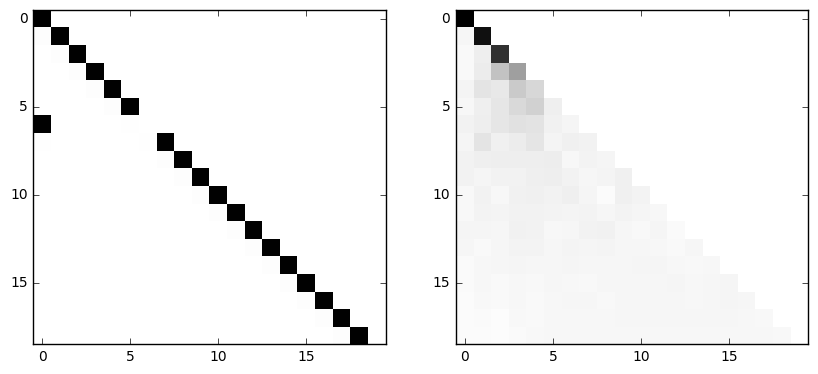

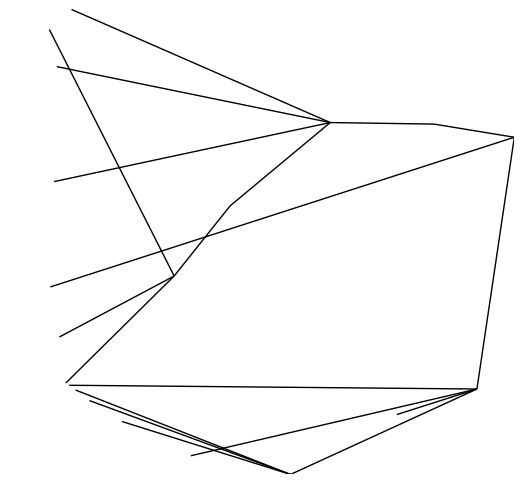

    After 20 iterations
        Discriminator Loss                         = -43286.4960938

    Generator_Loss: 45535.1679688
726
    After 20 iterations
        Discriminator Loss                         = -43751.7109375

    Generator_Loss: 45487.7890625
727
    After 20 iterations
        Discriminator Loss                         = -43683.1953125

    Generator_Loss: 45603.5195312
728
    After 20 iterations
        Discriminator Loss                         = -43559.796875

    Generator_Loss: 45649.7890625
729
    After 20 iterations
        Discriminator Loss                         = -43903.6484375

    Generator_Loss: 45341.1875
730
    After 20 iterations
        Discriminator Loss                         = -43553.6171875

    Generator_Loss: 45510.2460938
731
    After 20 iterations
        Discriminator Loss                         = -43540.7070312

    Generator_Loss: 45649.5117188
732
    After 20 iterations
        Discriminator Loss                         = -43636.531

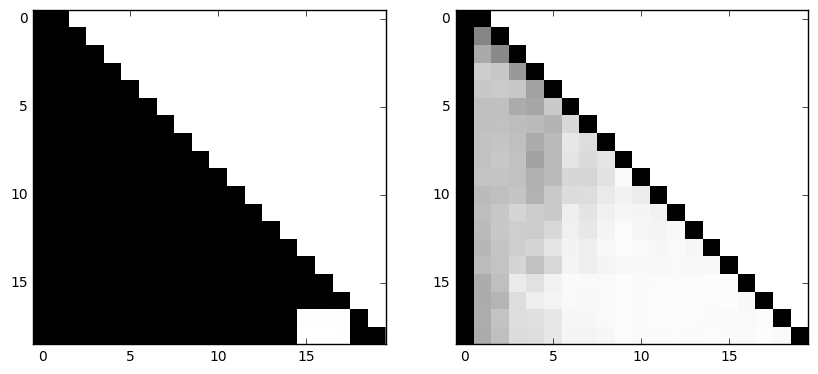

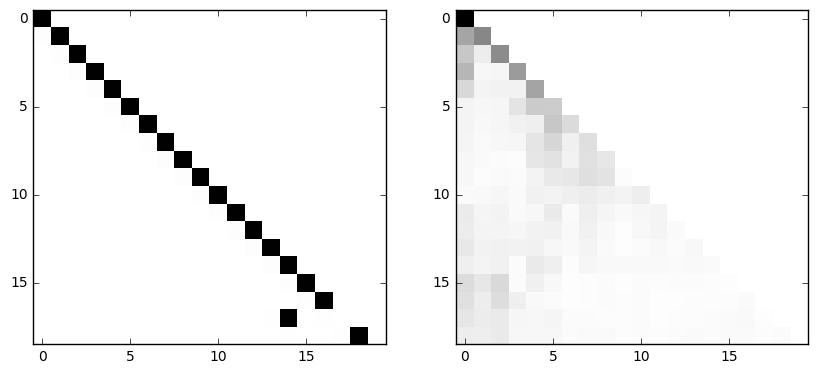

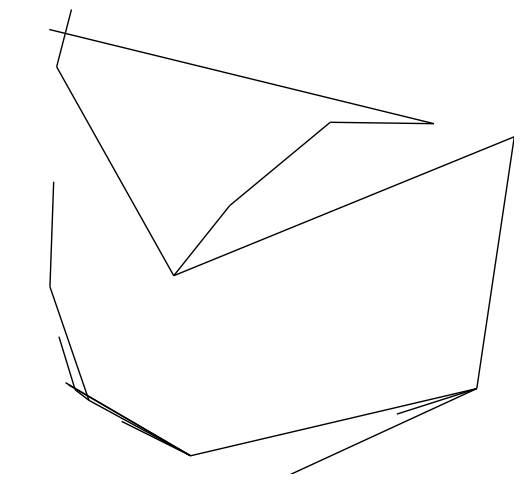

    After 20 iterations
        Discriminator Loss                         = -43652.1953125

    Generator_Loss: 45687.9921875
751
    After 20 iterations
        Discriminator Loss                         = -43201.5117188

    Generator_Loss: 45760.0742188
752
    After 20 iterations
        Discriminator Loss                         = -43480.3984375

    Generator_Loss: 45718.2070312
753
    After 20 iterations
        Discriminator Loss                         = -43696.5273438

    Generator_Loss: 45800.7304688
754
    After 20 iterations
        Discriminator Loss                         = -44421.7382812

    Generator_Loss: 45769.78125
755
    After 20 iterations
        Discriminator Loss                         = -43674.9726562

    Generator_Loss: 45849.375
756
    After 20 iterations
        Discriminator Loss                         = -43749.0742188

    Generator_Loss: 45839.515625
757
    After 20 iterations
        Discriminator Loss                         = -43970.058593

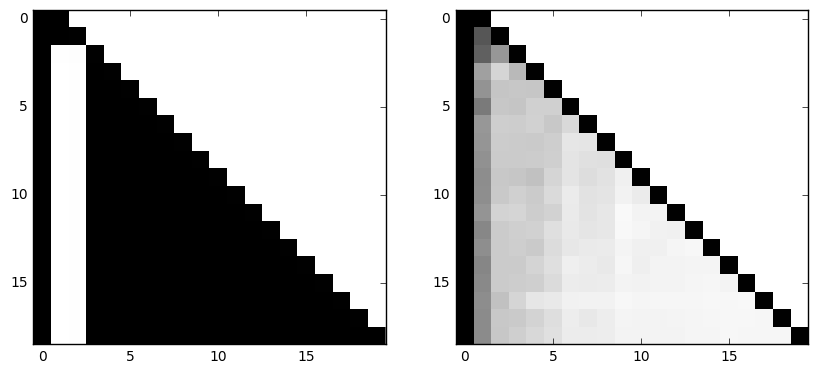

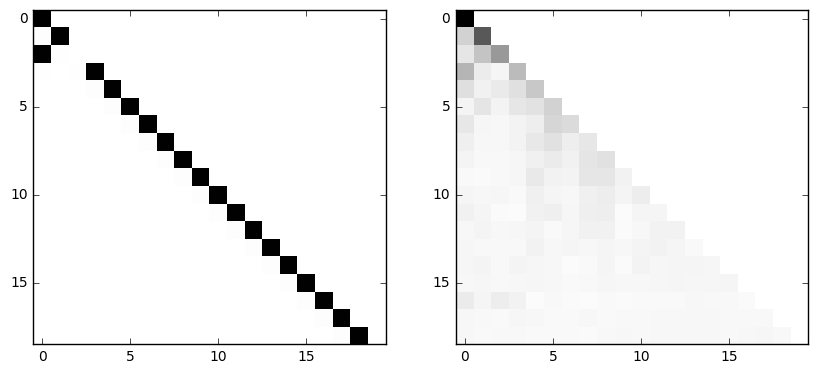

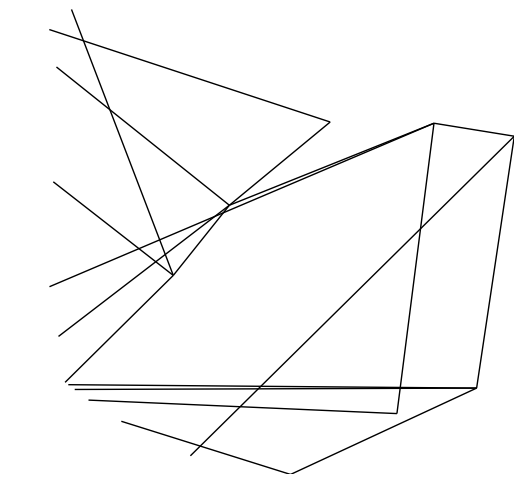

    After 20 iterations
        Discriminator Loss                         = -44206.3828125

    Generator_Loss: 46099.1757812
776
    After 20 iterations
        Discriminator Loss                         = -44141.2226562

    Generator_Loss: 45968.6757812
777
    After 20 iterations
        Discriminator Loss                         = -43967.0351562

    Generator_Loss: 45936.6054688
778
    After 20 iterations
        Discriminator Loss                         = -44261.7304688

    Generator_Loss: 46037.4023438
779
    After 20 iterations
        Discriminator Loss                         = -44041.9570312

    Generator_Loss: 46134.5742188
780
    After 20 iterations
        Discriminator Loss                         = -43853.71875

    Generator_Loss: 46011.1679688
781
    After 20 iterations
        Discriminator Loss                         = -44541.1445312

    Generator_Loss: 45865.6367188
782
    After 20 iterations
        Discriminator Loss                         = -43460.1

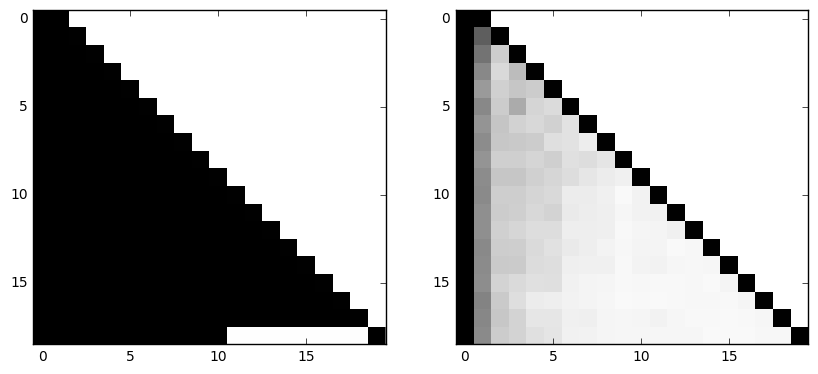

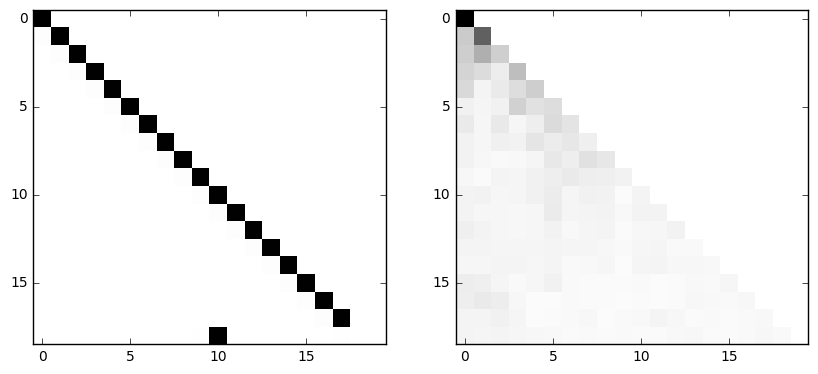

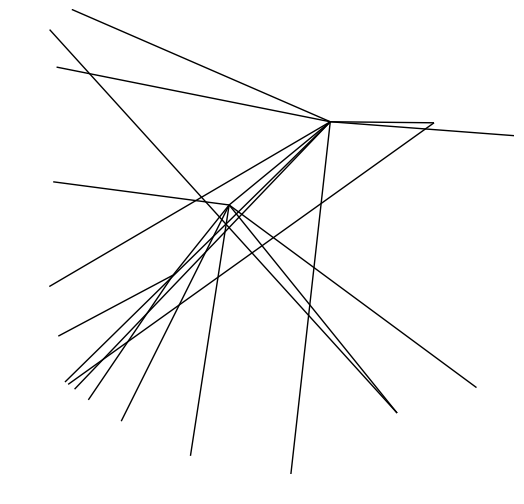

    After 20 iterations
        Discriminator Loss                         = -44094.7382812

    Generator_Loss: 46248.734375
801
    After 20 iterations
        Discriminator Loss                         = -44249.7148438

    Generator_Loss: 46446.3203125
802
    After 20 iterations
        Discriminator Loss                         = -43843.9960938

    Generator_Loss: 46168.6640625
803
    After 20 iterations
        Discriminator Loss                         = -44076.4804688

    Generator_Loss: 46182.4257812
804
    After 20 iterations
        Discriminator Loss                         = -44507.8710938

    Generator_Loss: 46299.0898438
805
    After 20 iterations
        Discriminator Loss                         = -44202.609375

    Generator_Loss: 46320.3085938
806
    After 20 iterations
        Discriminator Loss                         = -44372.8632812

    Generator_Loss: 46088.5859375
807
    After 20 iterations
        Discriminator Loss                         = -44525.4

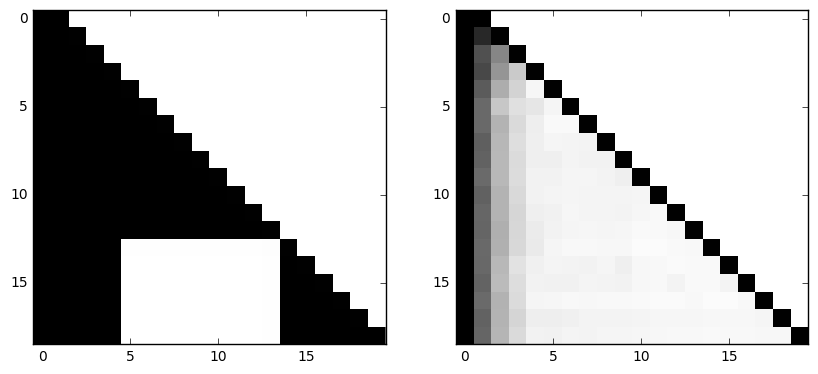

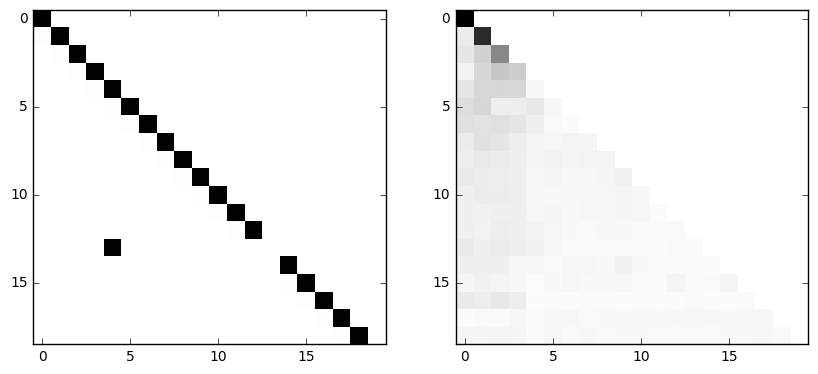

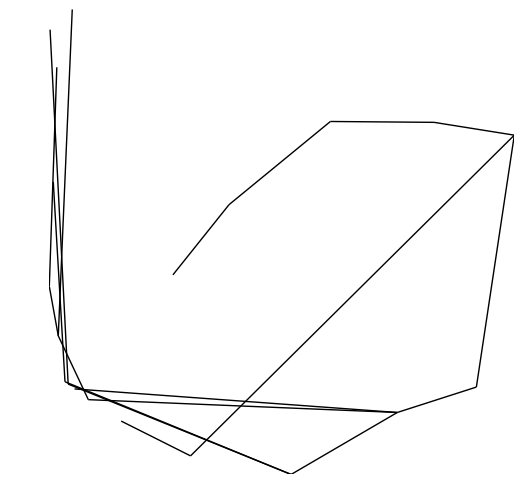

    After 20 iterations
        Discriminator Loss                         = -44866.7421875

    Generator_Loss: 46541.3164062
826
    After 20 iterations
        Discriminator Loss                         = -44842.1992188

    Generator_Loss: 46570.21875
827
    After 20 iterations
        Discriminator Loss                         = -44671.8476562

    Generator_Loss: 46723.2109375
828
    After 20 iterations
        Discriminator Loss                         = -44346.0351562

    Generator_Loss: 46642.328125
829
    After 20 iterations
        Discriminator Loss                         = -45342.4765625

    Generator_Loss: 46635.2617188
830
    After 20 iterations
        Discriminator Loss                         = -44655.7539062

    Generator_Loss: 46434.796875
831
    After 20 iterations
        Discriminator Loss                         = -44455.6679688

    Generator_Loss: 46676.71875
832
    After 20 iterations
        Discriminator Loss                         = -44591.19921

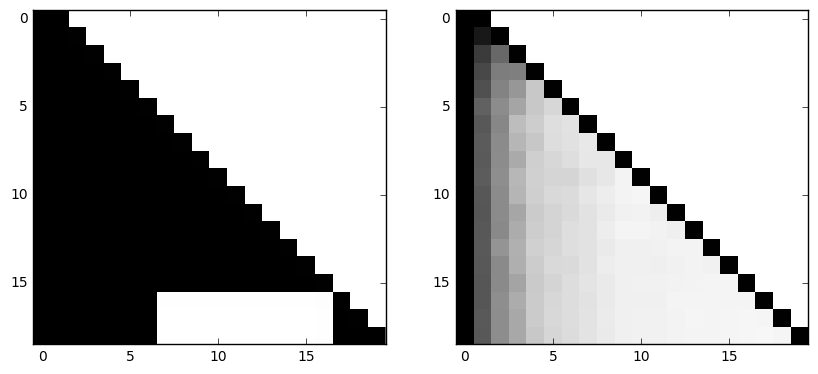

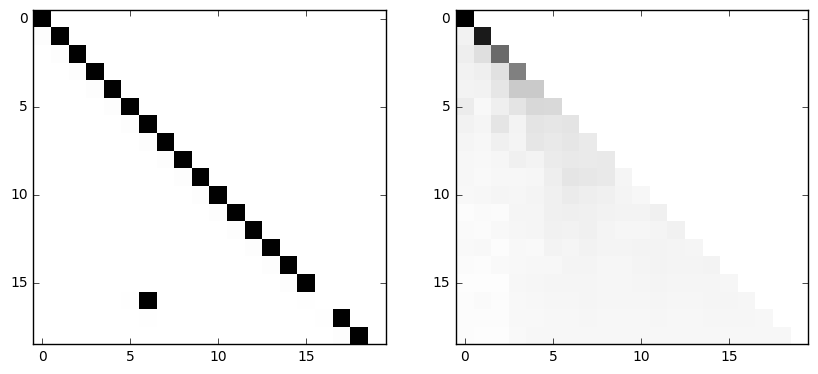

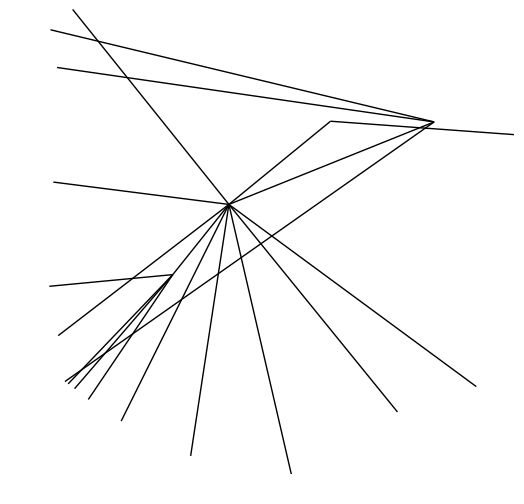

    After 20 iterations
        Discriminator Loss                         = -44483.6171875

    Generator_Loss: 46739.9101562
851
    After 20 iterations
        Discriminator Loss                         = -44537.5820312

    Generator_Loss: 46863.4921875
852
    After 20 iterations
        Discriminator Loss                         = -44710.796875

    Generator_Loss: 46777.7109375
853
    After 20 iterations
        Discriminator Loss                         = -45499.4882812

    Generator_Loss: 46996.0078125
854
    After 20 iterations
        Discriminator Loss                         = -44697.8203125

    Generator_Loss: 46869.6953125
855
    After 20 iterations
        Discriminator Loss                         = -44777.1367188

    Generator_Loss: 46998.1640625
856
    After 20 iterations
        Discriminator Loss                         = -44899.234375

    Generator_Loss: 46867.5898438
857
    After 20 iterations
        Discriminator Loss                         = -44857.1

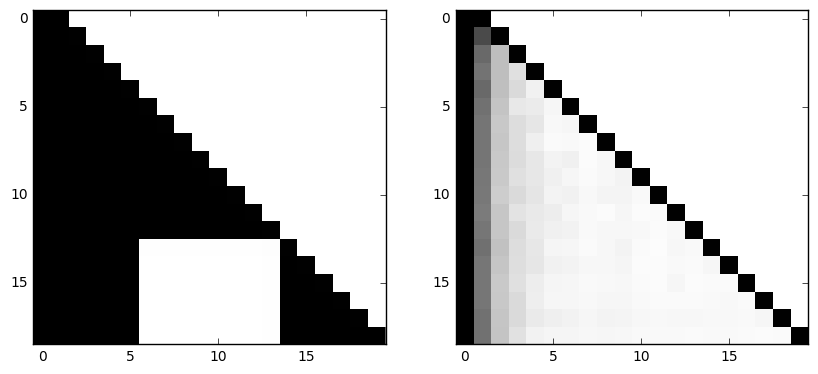

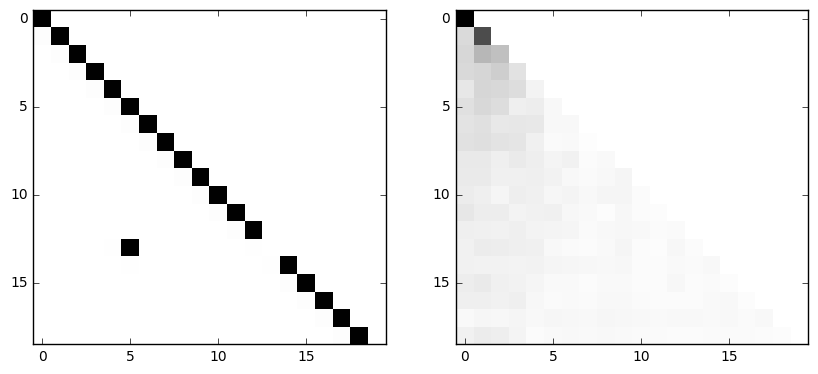

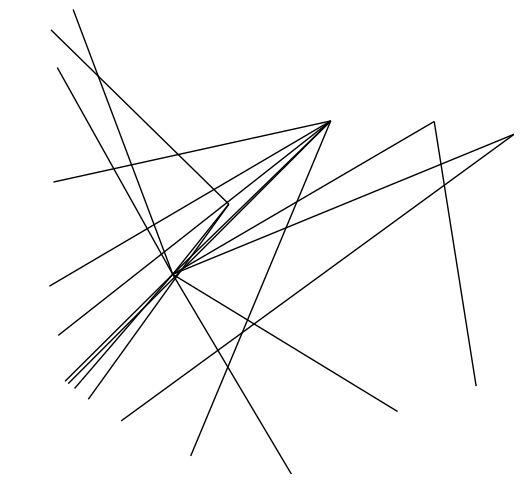

    After 20 iterations
        Discriminator Loss                         = -45294.703125

    Generator_Loss: 46950.2734375
876
    After 20 iterations
        Discriminator Loss                         = -44835.2617188

    Generator_Loss: 47117.765625
877
    After 20 iterations
        Discriminator Loss                         = -44426.9375

    Generator_Loss: 47079.3085938
878
    After 20 iterations
        Discriminator Loss                         = -44709.1328125

    Generator_Loss: 47209.0625
879
    After 20 iterations
        Discriminator Loss                         = -45171.875

    Generator_Loss: 47122.8046875
880
    After 20 iterations
        Discriminator Loss                         = -45547.0898438

    Generator_Loss: 47107.390625
881
    After 20 iterations
        Discriminator Loss                         = -45069.6640625

    Generator_Loss: 47200.2226562
882
    After 20 iterations
        Discriminator Loss                         = -45125.0039062

   

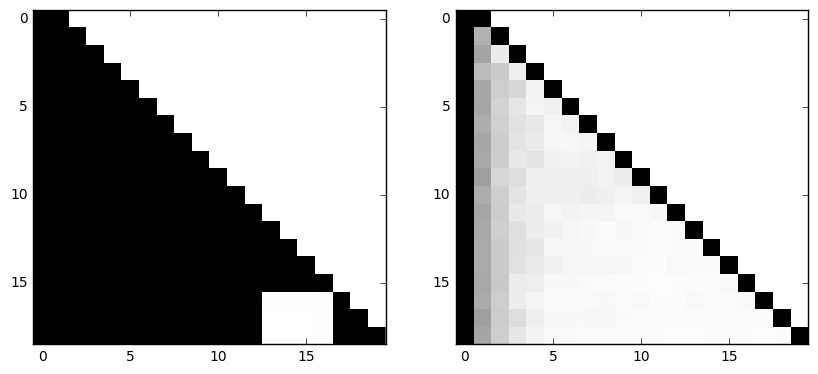

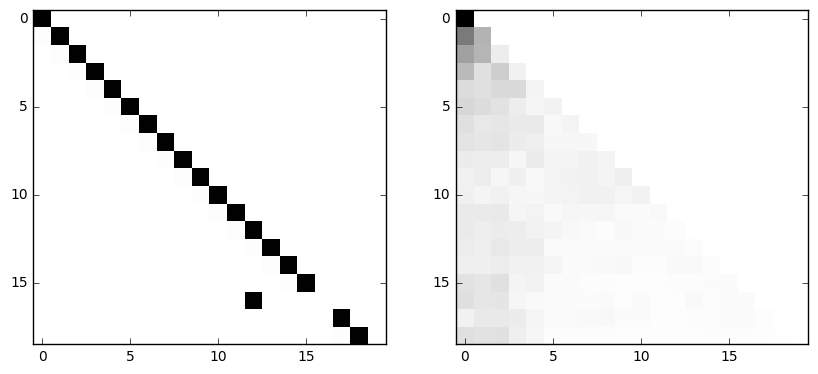

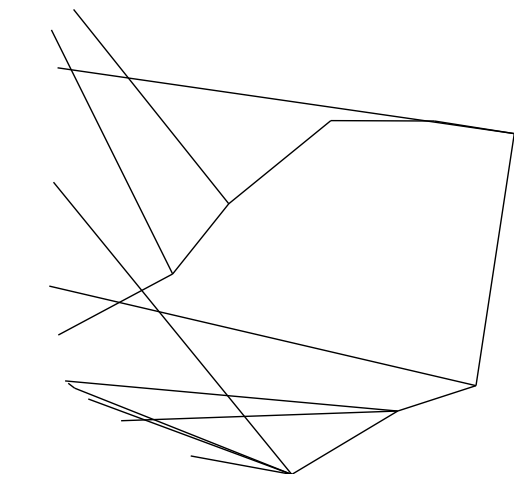

    After 20 iterations
        Discriminator Loss                         = -45060.4882812

    Generator_Loss: 47227.3320312
901
    After 20 iterations
        Discriminator Loss                         = -45403.0585938

    Generator_Loss: 47308.2539062
902
    After 20 iterations
        Discriminator Loss                         = -44996.9023438

    Generator_Loss: 47405.2265625
903
    After 20 iterations
        Discriminator Loss                         = -45252.1445312

    Generator_Loss: 47199.3710938
904
    After 20 iterations
        Discriminator Loss                         = -45132.7460938

    Generator_Loss: 47421.859375
905
    After 20 iterations
        Discriminator Loss                         = -45520.2539062

    Generator_Loss: 47457.171875
906
    After 20 iterations
        Discriminator Loss                         = -45528.5429688

    Generator_Loss: 47390.875
907
    After 20 iterations
        Discriminator Loss                         = -45211.89843

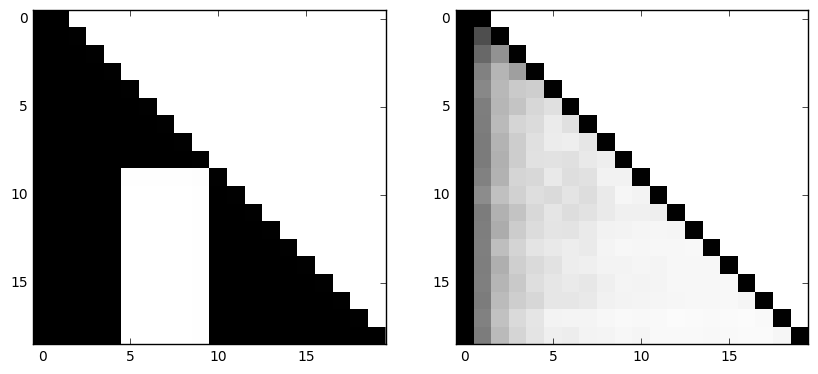

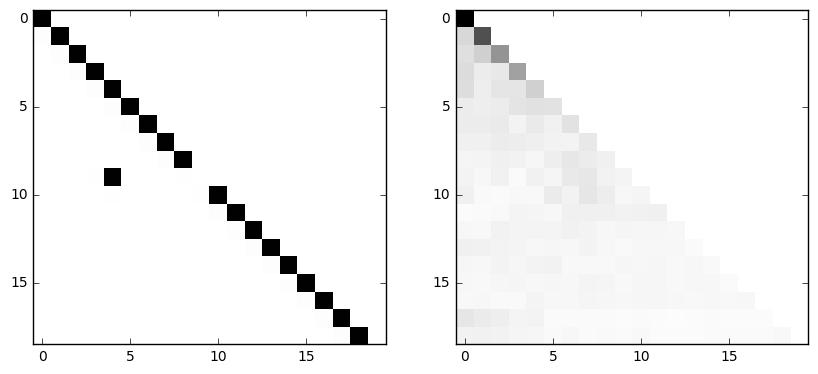

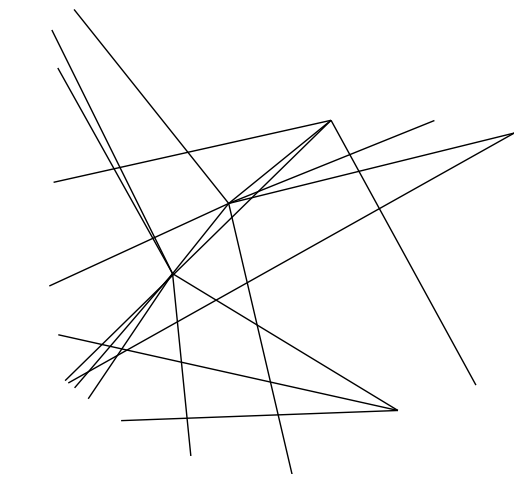

    After 20 iterations
        Discriminator Loss                         = -45492.71875

    Generator_Loss: 47670.046875
926
    After 20 iterations
        Discriminator Loss                         = -45467.2734375

    Generator_Loss: 47521.96875
927
    After 20 iterations
        Discriminator Loss                         = -45839.9335938

    Generator_Loss: 47578.9648438
928
    After 20 iterations
        Discriminator Loss                         = -46141.8671875

    Generator_Loss: 47659.6875
929
    After 20 iterations
        Discriminator Loss                         = -45548.8242188

    Generator_Loss: 47678.265625
930
    After 20 iterations
        Discriminator Loss                         = -45418.0820312

    Generator_Loss: 47498.9570312
931
    After 20 iterations
        Discriminator Loss                         = -45155.9023438

    Generator_Loss: 47595.09375
932
    After 20 iterations
        Discriminator Loss                         = -45732.1796875

 

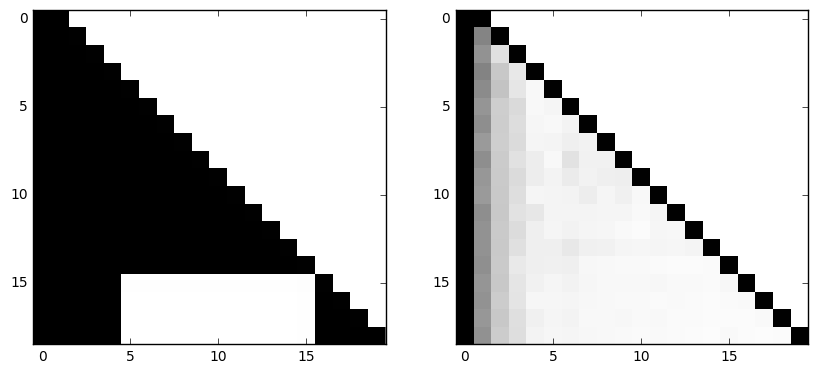

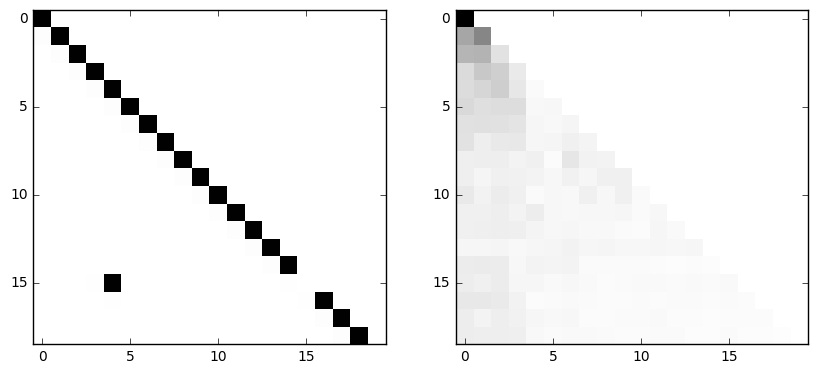

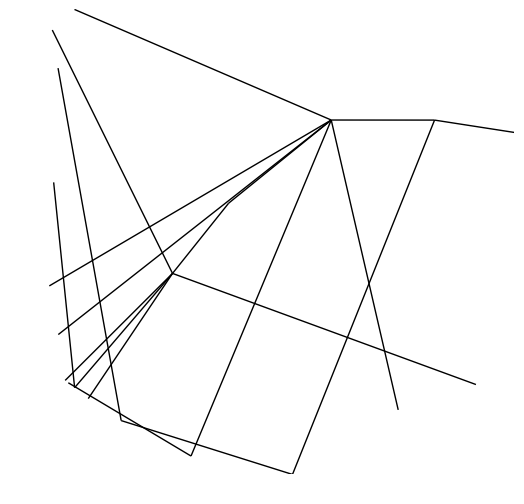

    After 20 iterations
        Discriminator Loss                         = -45806.8085938

    Generator_Loss: 47712.9335938
951
    After 20 iterations
        Discriminator Loss                         = -45529.7421875

    Generator_Loss: 47784.1914062
952
    After 20 iterations
        Discriminator Loss                         = -45935.640625

    Generator_Loss: 47869.6953125
953
    After 20 iterations
        Discriminator Loss                         = -45656.6210938

    Generator_Loss: 47761.3046875
954
    After 20 iterations
        Discriminator Loss                         = -45336.2226562

    Generator_Loss: 47710.8203125
955
    After 20 iterations
        Discriminator Loss                         = -45616.7265625

    Generator_Loss: 47969.5898438
956
    After 20 iterations
        Discriminator Loss                         = -45888.296875

    Generator_Loss: 47725.4648438
957
    After 20 iterations
        Discriminator Loss                         = -45753.3

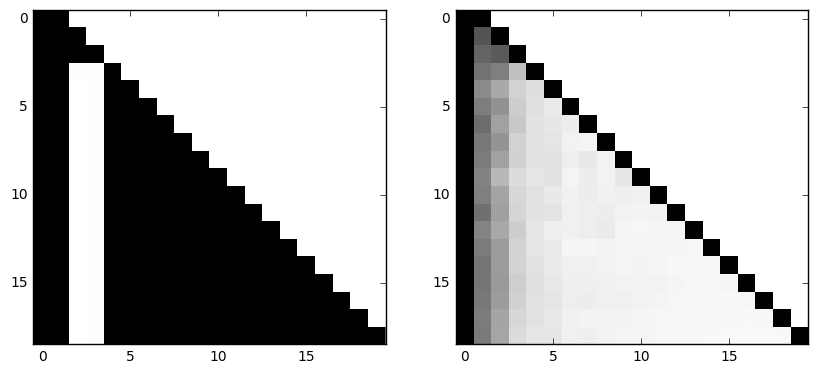

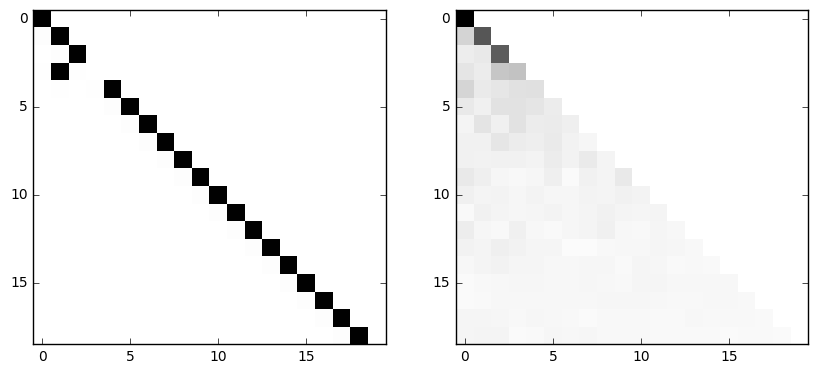

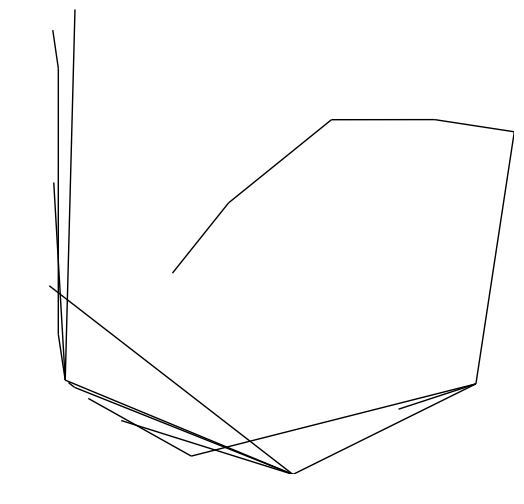

    After 20 iterations
        Discriminator Loss                         = -46243.4492188

    Generator_Loss: 48119.8398438
976
    After 20 iterations
        Discriminator Loss                         = -46229.8398438

    Generator_Loss: 48158.4179688
977
    After 20 iterations
        Discriminator Loss                         = -45940.0859375

    Generator_Loss: 47841.5429688
978
    After 20 iterations
        Discriminator Loss                         = -45846.578125

    Generator_Loss: 48110.859375
979
    After 20 iterations
        Discriminator Loss                         = -46178.3398438

    Generator_Loss: 48019.0078125
980
    After 20 iterations
        Discriminator Loss                         = -45742.1601562

    Generator_Loss: 48057.5898438
981
    After 20 iterations
        Discriminator Loss                         = -46283.1640625

    Generator_Loss: 48213.546875
982
    After 20 iterations
        Discriminator Loss                         = -45767.96

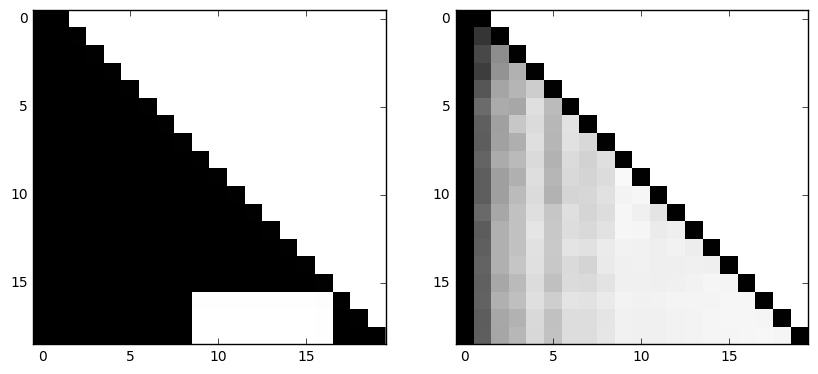

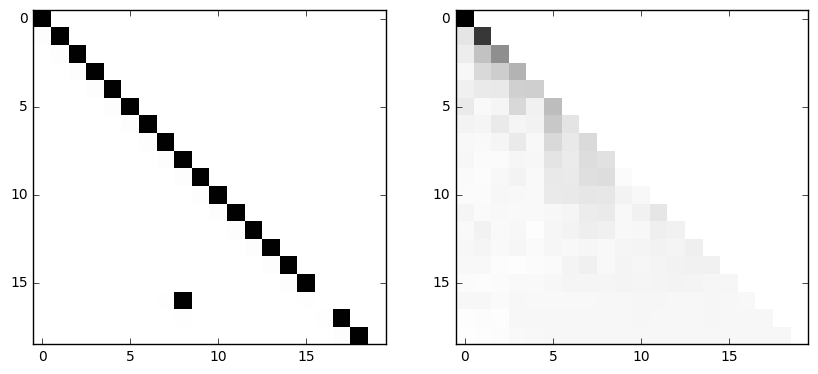

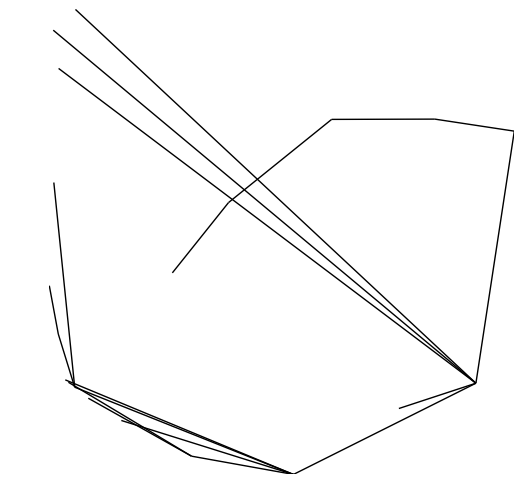

    After 20 iterations
        Discriminator Loss                         = -45825.8828125

    Generator_Loss: 48221.2265625
1001
    After 20 iterations
        Discriminator Loss                         = -45724.3671875

    Generator_Loss: 48268.6132812
1002
    After 20 iterations
        Discriminator Loss                         = -46316.828125

    Generator_Loss: 48359.2734375
1003
    After 20 iterations
        Discriminator Loss                         = -45976.703125

    Generator_Loss: 48177.828125
1004
    After 20 iterations
        Discriminator Loss                         = -46132.046875

    Generator_Loss: 48357.859375
1005
    After 20 iterations
        Discriminator Loss                         = -45876.34375

    Generator_Loss: 48176.5429688
1006
    After 20 iterations
        Discriminator Loss                         = -46067.046875

    Generator_Loss: 48250.40625
1007
    After 20 iterations
        Discriminator Loss                         = -46168.87

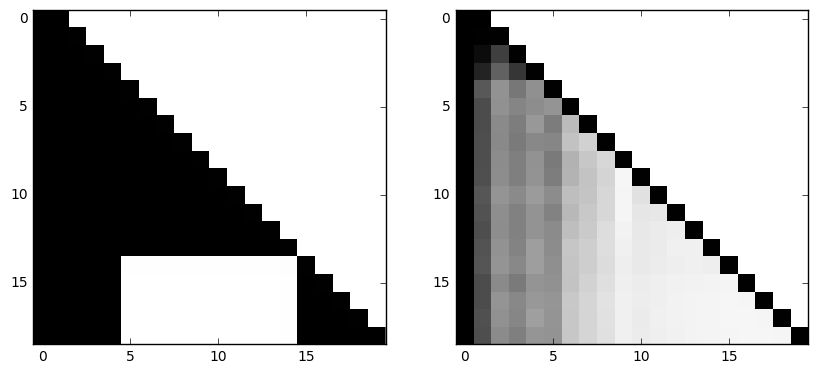

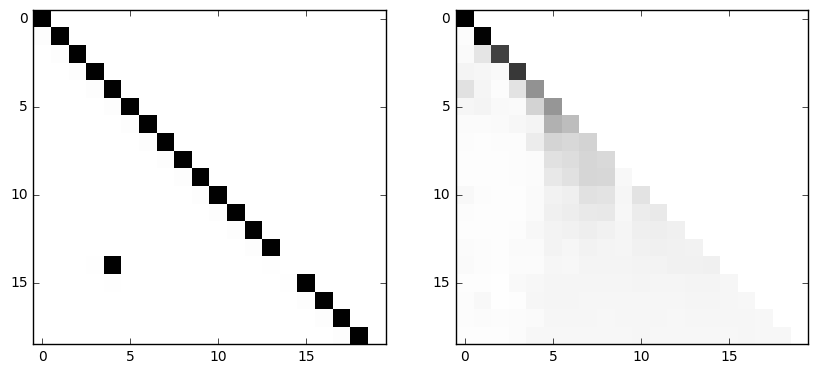

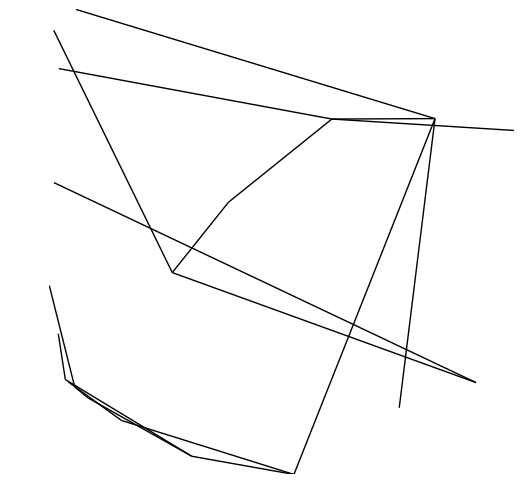

    After 20 iterations
        Discriminator Loss                         = -46636.4921875

    Generator_Loss: 48347.9414062
1026
    After 20 iterations
        Discriminator Loss                         = -46625.59375

    Generator_Loss: 48735.6367188
1027
    After 20 iterations
        Discriminator Loss                         = -45867.875

    Generator_Loss: 48553.2109375
1028
    After 20 iterations
        Discriminator Loss                         = -46706.7773438

    Generator_Loss: 48586.5703125
1029
    After 20 iterations
        Discriminator Loss                         = -46126.2421875

    Generator_Loss: 48502.390625
1030
    After 20 iterations
        Discriminator Loss                         = -46882.0898438

    Generator_Loss: 48641.1328125
1031
    After 20 iterations
        Discriminator Loss                         = -46598.078125

    Generator_Loss: 48551.4375
1032
    After 20 iterations
        Discriminator Loss                         = -46852.046

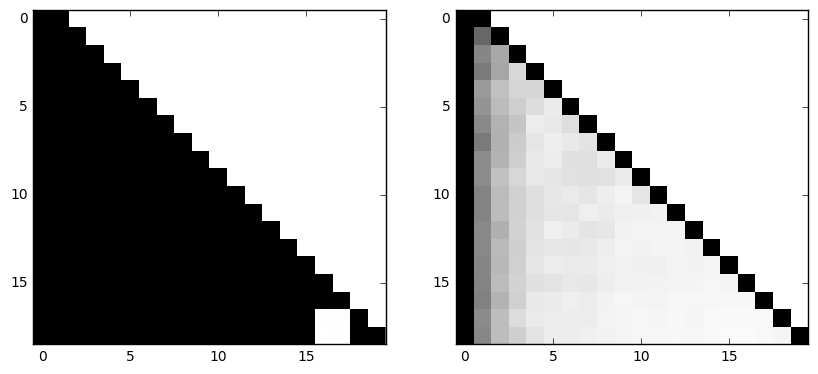

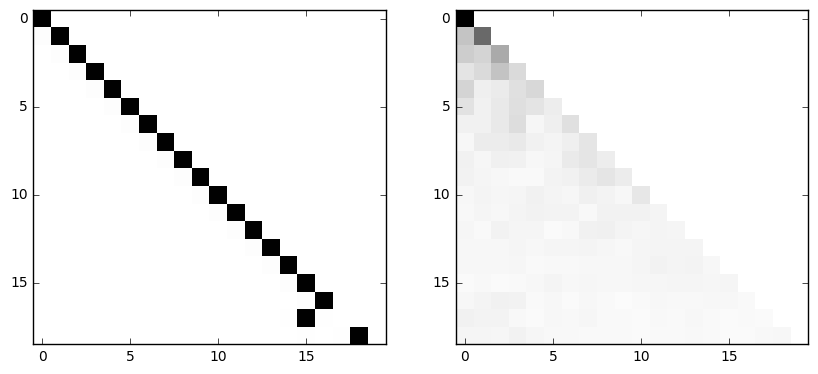

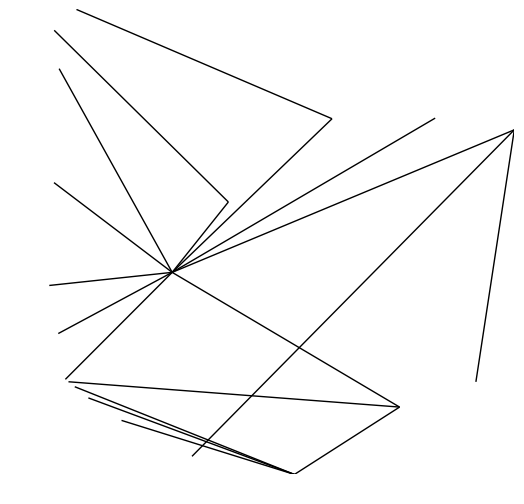

    After 20 iterations
        Discriminator Loss                         = -47061.4296875

    Generator_Loss: 48834.4726562
1051
    After 20 iterations
        Discriminator Loss                         = -46826.4140625

    Generator_Loss: 48758.1953125
1052
    After 20 iterations
        Discriminator Loss                         = -46969.8515625

    Generator_Loss: 48882.8984375
1053
    After 20 iterations
        Discriminator Loss                         = -46510.484375

    Generator_Loss: 48766.9882812
1054
    After 20 iterations
        Discriminator Loss                         = -46444.5976562

    Generator_Loss: 48764.984375
1055
    After 20 iterations
        Discriminator Loss                         = -46415.7265625

    Generator_Loss: 48944.0039062
1056
    After 20 iterations
        Discriminator Loss                         = -46815.359375

    Generator_Loss: 48923.4570312
1057
    After 20 iterations
        Discriminator Loss                         = -4

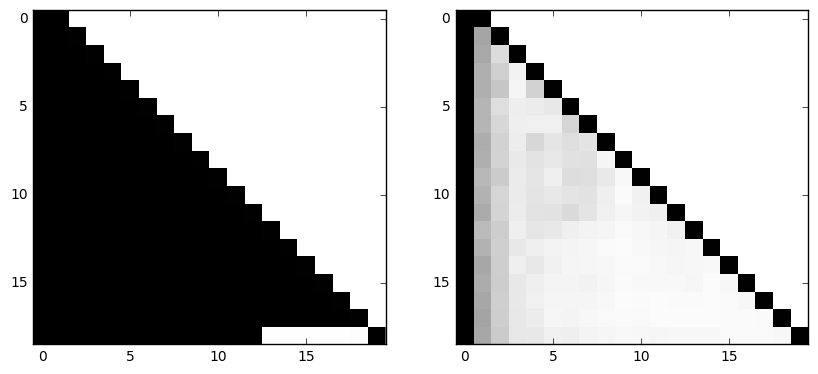

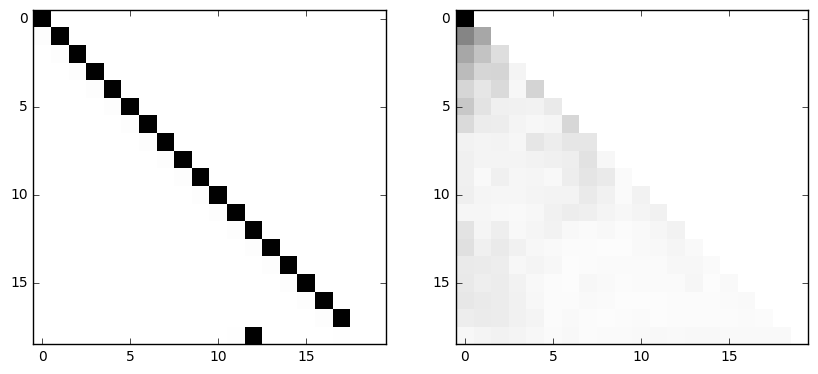

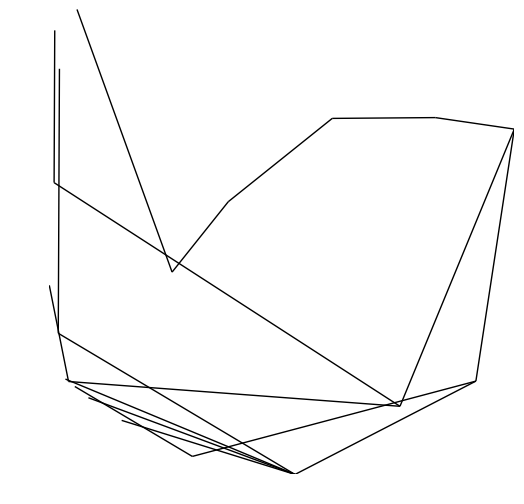

    After 20 iterations
        Discriminator Loss                         = -47005.3007812

    Generator_Loss: 48976.4765625
1076
    After 20 iterations
        Discriminator Loss                         = -46709.2382812

    Generator_Loss: 49060.671875
1077
    After 20 iterations
        Discriminator Loss                         = -46290.6679688

    Generator_Loss: 48886.7421875
1078
    After 20 iterations
        Discriminator Loss                         = -46938.03125

    Generator_Loss: 48822.2539062
1079
    After 20 iterations
        Discriminator Loss                         = -47252.6015625

    Generator_Loss: 48939.4804688
1080
    After 20 iterations
        Discriminator Loss                         = -47188.765625

    Generator_Loss: 48994.0859375
1081
    After 20 iterations
        Discriminator Loss                         = -46348.3515625

    Generator_Loss: 49085.2421875
1082
    After 20 iterations
        Discriminator Loss                         = -47

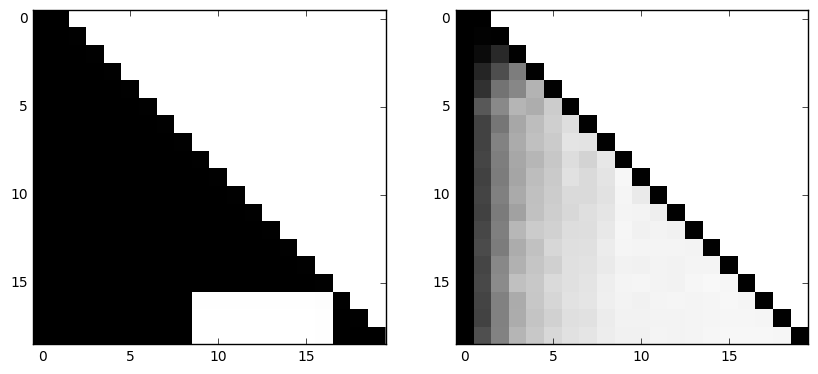

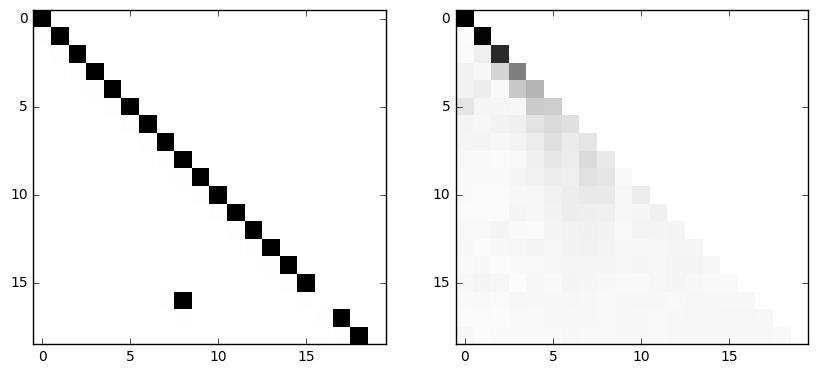

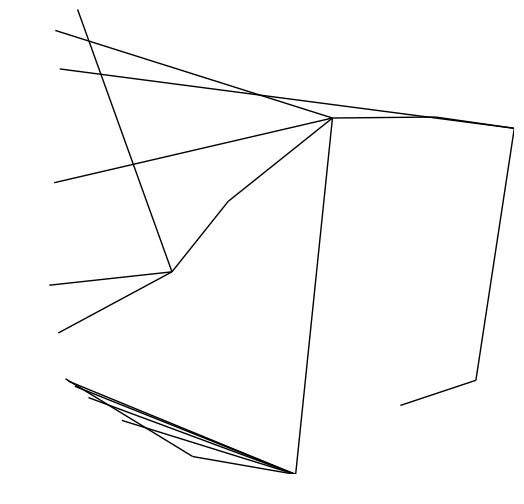

    After 20 iterations
        Discriminator Loss                         = -46696.4179688

    Generator_Loss: 49171.5039062
1101
    After 20 iterations
        Discriminator Loss                         = -47020.0234375

    Generator_Loss: 49267.453125
1102
    After 20 iterations
        Discriminator Loss                         = -46862.0546875

    Generator_Loss: 49090.1054688
1103
    After 20 iterations
        Discriminator Loss                         = -47355.234375

    Generator_Loss: 49189.875
1104
    After 20 iterations
        Discriminator Loss                         = -46754.2460938

    Generator_Loss: 49128.3203125
1105
    After 20 iterations
        Discriminator Loss                         = -47155.5859375

    Generator_Loss: 49221.125
1106
    After 20 iterations
        Discriminator Loss                         = -47786.5078125

    Generator_Loss: 49271.328125
1107
    After 20 iterations
        Discriminator Loss                         = -46498.468

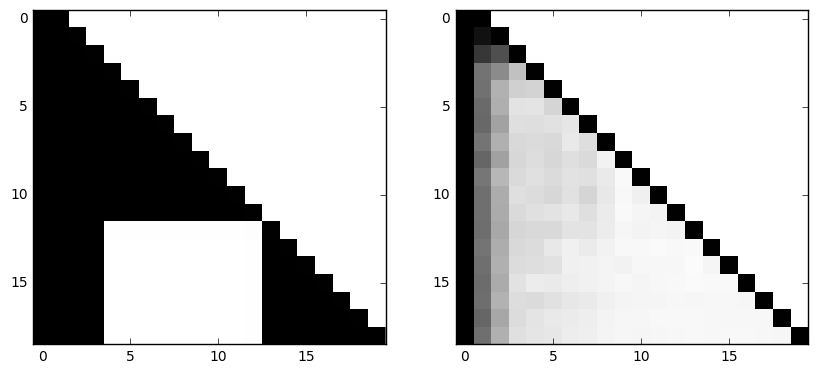

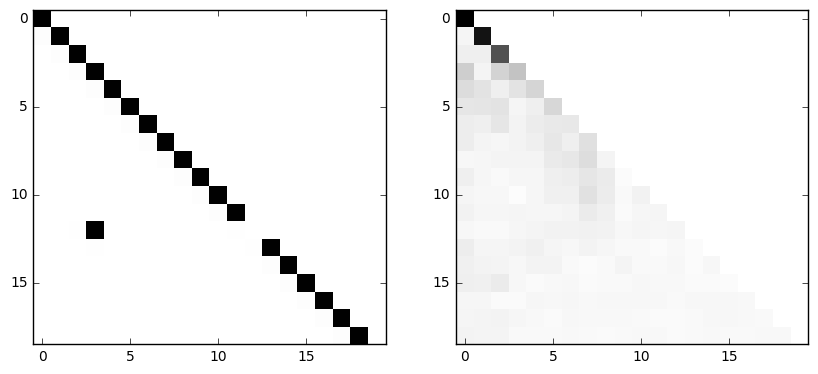

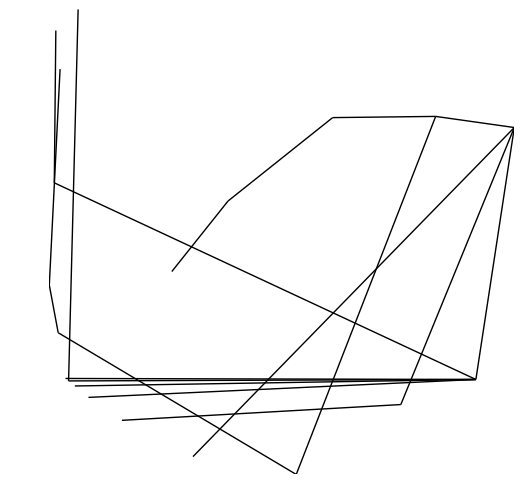

    After 20 iterations
        Discriminator Loss                         = -47376.4960938

    Generator_Loss: 49409.3984375
1126
    After 20 iterations
        Discriminator Loss                         = -47365.9296875

    Generator_Loss: 49444.8398438
1127
    After 20 iterations
        Discriminator Loss                         = -47632.9101562

    Generator_Loss: 49492.3242188
1128
    After 20 iterations
        Discriminator Loss                         = -47008.5429688

    Generator_Loss: 49322.46875
1129
    After 20 iterations
        Discriminator Loss                         = -47066.3125

    Generator_Loss: 49440.84375
1130
    After 20 iterations
        Discriminator Loss                         = -47254.2773438

    Generator_Loss: 49394.515625
1131
    After 20 iterations
        Discriminator Loss                         = -47501.65625

    Generator_Loss: 49448.7109375
1132
    After 20 iterations
        Discriminator Loss                         = -47366.76

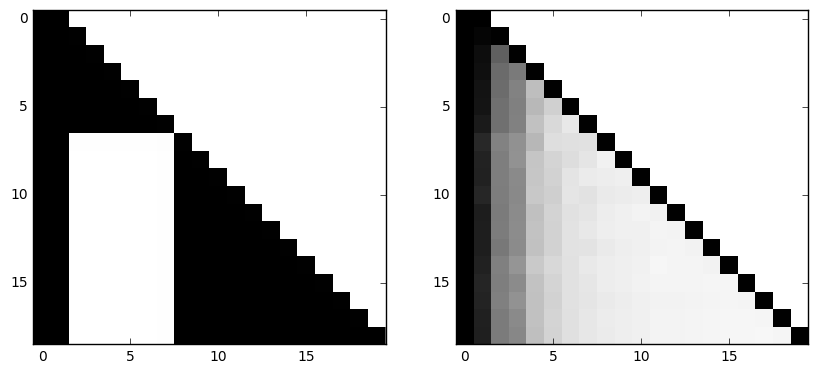

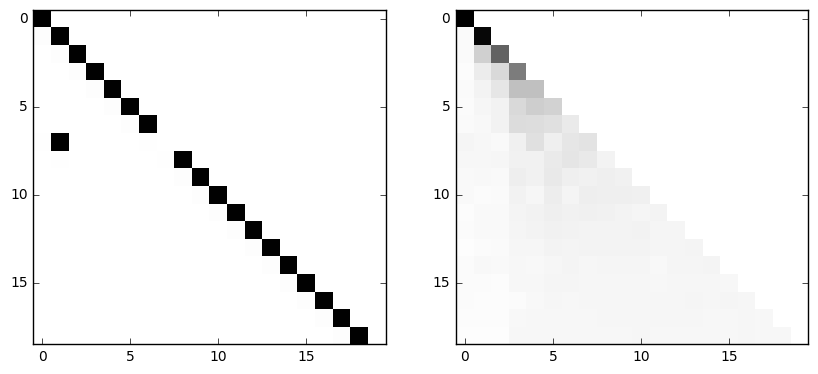

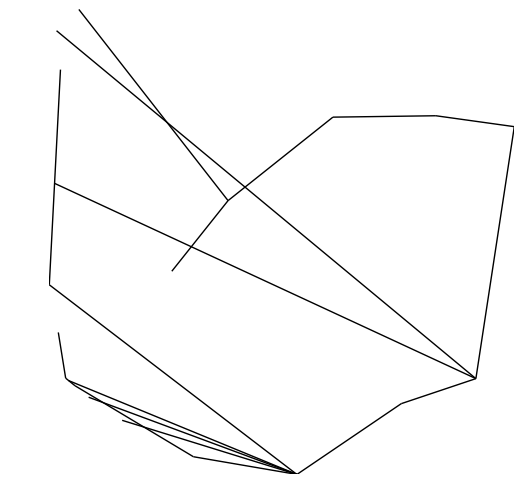

    After 20 iterations
        Discriminator Loss                         = -47658.3984375

    Generator_Loss: 49843.7890625
1151
    After 20 iterations
        Discriminator Loss                         = -47274.5429688

    Generator_Loss: 49781.1601562
1152
    After 20 iterations
        Discriminator Loss                         = -47789.15625

    Generator_Loss: 49791.2460938
1153
    After 20 iterations
        Discriminator Loss                         = -47710.5195312

    Generator_Loss: 49606.6328125
1154
    After 20 iterations
        Discriminator Loss                         = -47449.1796875

    Generator_Loss: 49555.828125
1155
    After 20 iterations
        Discriminator Loss                         = -47817.8828125

    Generator_Loss: 49760.1054688
1156
    After 20 iterations
        Discriminator Loss                         = -47333.4453125

    Generator_Loss: 49779.7421875
1157
    After 20 iterations
        Discriminator Loss                         = -4

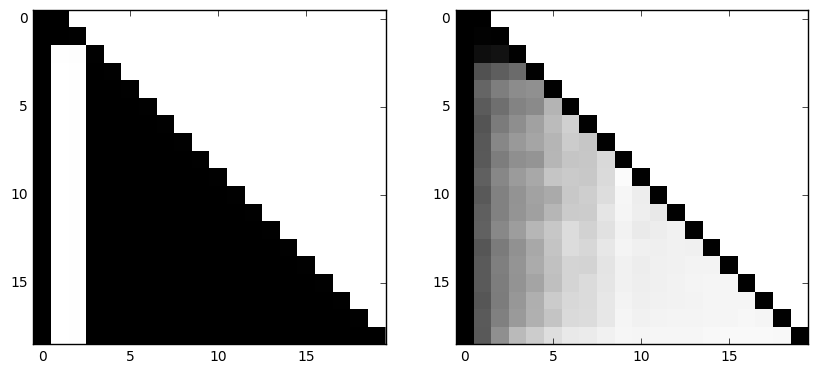

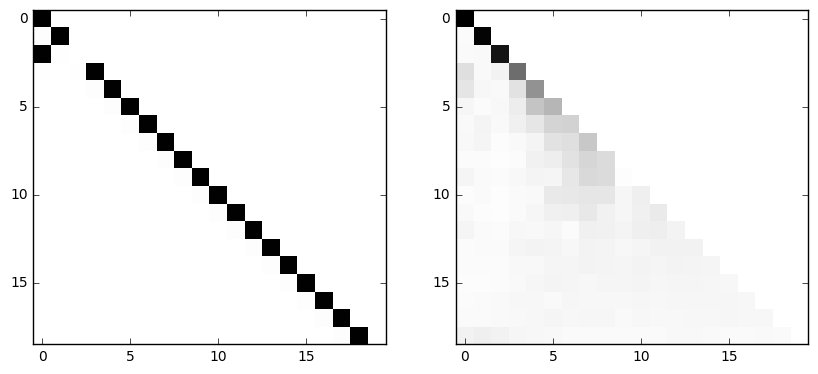

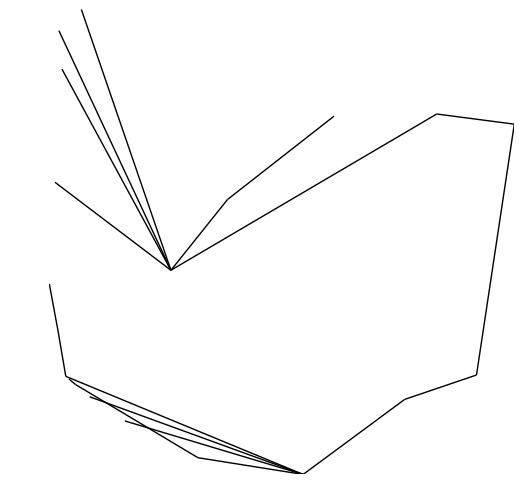

    After 20 iterations
        Discriminator Loss                         = -48067.3476562

    Generator_Loss: 49970.3007812
1176
    After 20 iterations
        Discriminator Loss                         = -47684.5351562

    Generator_Loss: 50060.4804688
1177
    After 20 iterations
        Discriminator Loss                         = -47741.7070312

    Generator_Loss: 50014.8789062
1178
    After 20 iterations
        Discriminator Loss                         = -48336.1367188

    Generator_Loss: 49948.5742188
1179
    After 20 iterations
        Discriminator Loss                         = -47684.2851562

    Generator_Loss: 49958.8359375
1180
    After 20 iterations
        Discriminator Loss                         = -47860.0078125

    Generator_Loss: 49879.9492188
1181
    After 20 iterations
        Discriminator Loss                         = -48062.9023438

    Generator_Loss: 49813.0703125
1182
    After 20 iterations
        Discriminator Loss                         =

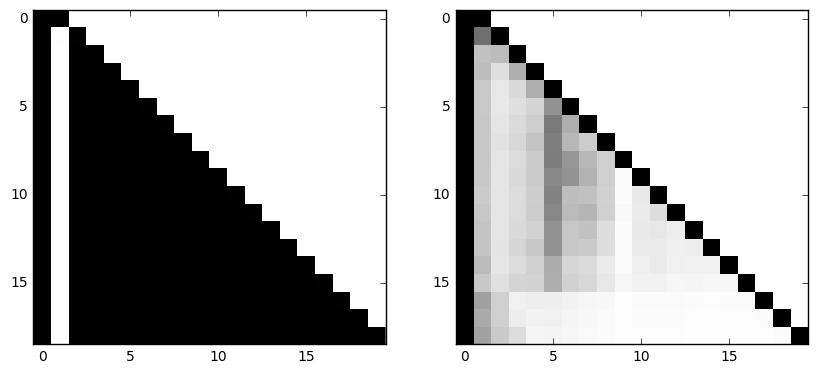

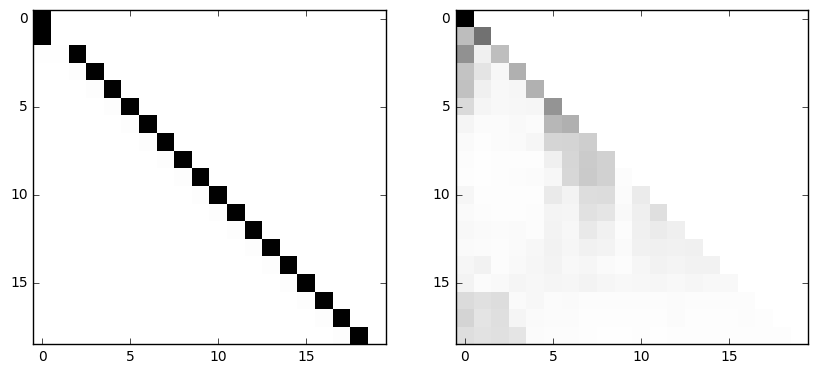

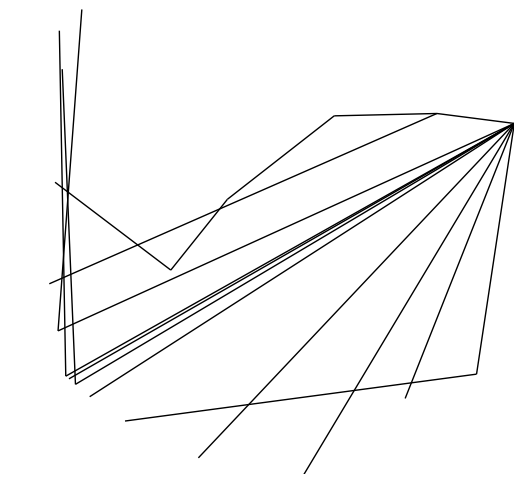

    After 20 iterations
        Discriminator Loss                         = -47866.3515625

    Generator_Loss: 50280.640625
1201
    After 20 iterations
        Discriminator Loss                         = -47752.4257812

    Generator_Loss: 50058.640625
1202
    After 20 iterations
        Discriminator Loss                         = -48279.8554688

    Generator_Loss: 50155.71875
1203
    After 20 iterations
        Discriminator Loss                         = -47697.2929688

    Generator_Loss: 50084.6601562
1204
    After 20 iterations
        Discriminator Loss                         = -47917.3476562

    Generator_Loss: 50090.9023438
1205
    After 20 iterations
        Discriminator Loss                         = -47991.7773438

    Generator_Loss: 50076.9882812
1206
    After 20 iterations
        Discriminator Loss                         = -48321.2773438

    Generator_Loss: 50117.1328125
1207
    After 20 iterations
        Discriminator Loss                         = -47

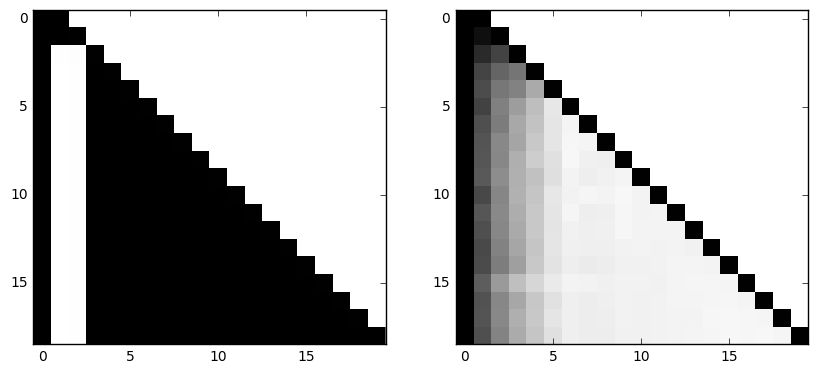

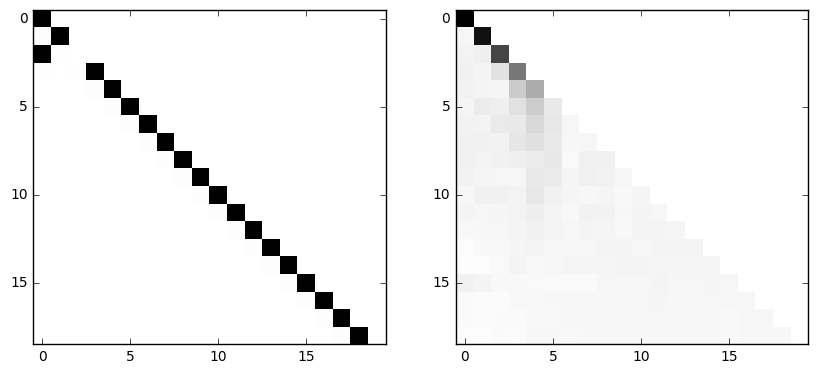

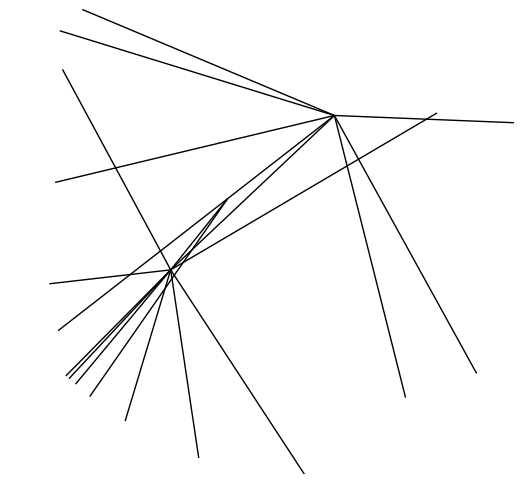

    After 20 iterations
        Discriminator Loss                         = -48173.3085938

    Generator_Loss: 50299.765625
1226
    After 20 iterations
        Discriminator Loss                         = -47869.53125

    Generator_Loss: 50473.0117188
1227
    After 20 iterations
        Discriminator Loss                         = -47892.84375

    Generator_Loss: 50436.9023438
1228
    After 20 iterations
        Discriminator Loss                         = -48223.34375

    Generator_Loss: 50334.4453125
1229
    After 20 iterations
        Discriminator Loss                         = -48504.953125

    Generator_Loss: 50416.7148438
1230
    After 20 iterations
        Discriminator Loss                         = -47890.2304688

    Generator_Loss: 50342.5195312
1231
    After 20 iterations
        Discriminator Loss                         = -48364.0234375

    Generator_Loss: 50362.96875
1232
    After 20 iterations
        Discriminator Loss                         = -48121.50

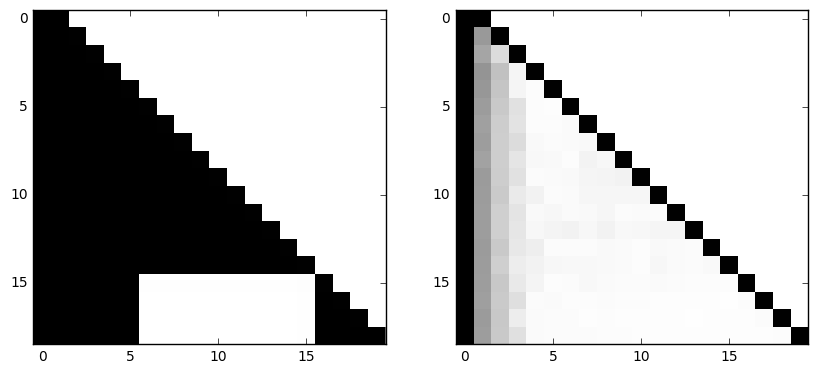

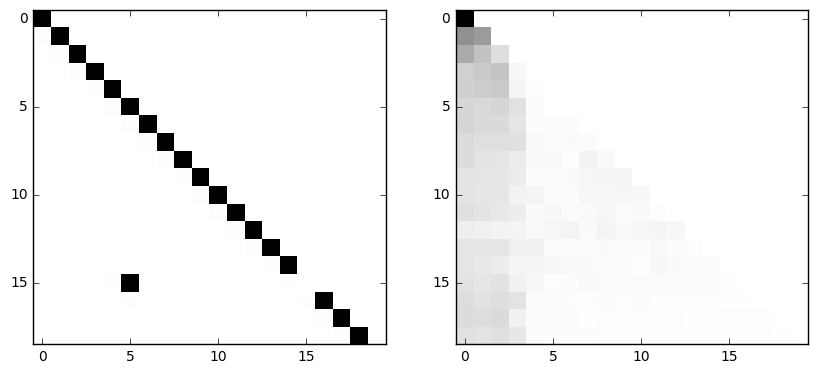

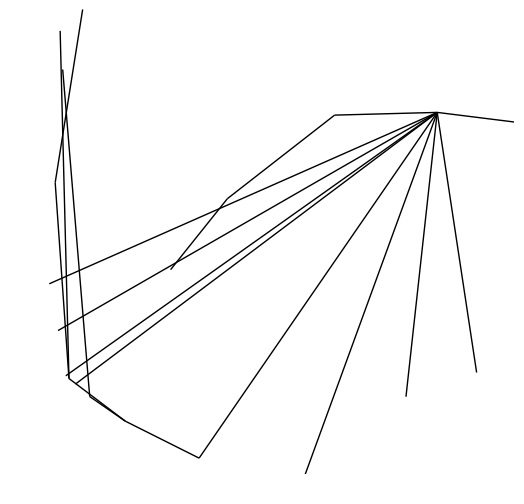

    After 20 iterations
        Discriminator Loss                         = -48648.3710938

    Generator_Loss: 50569.2460938
1251
    After 20 iterations
        Discriminator Loss                         = -48353.765625

    Generator_Loss: 50526.859375
1252
    After 20 iterations
        Discriminator Loss                         = -48279.4804688

    Generator_Loss: 50538.625
1253
    After 20 iterations
        Discriminator Loss                         = -48738.0195312

    Generator_Loss: 50772.1992188
1254
    After 20 iterations
        Discriminator Loss                         = -48212.8007812

    Generator_Loss: 50735.6484375
1255
    After 20 iterations
        Discriminator Loss                         = -48455.6210938

    Generator_Loss: 50612.4882812
1256
    After 20 iterations
        Discriminator Loss                         = -48485.5625

    Generator_Loss: 50626.3867188
1257
    After 20 iterations
        Discriminator Loss                         = -48113.2

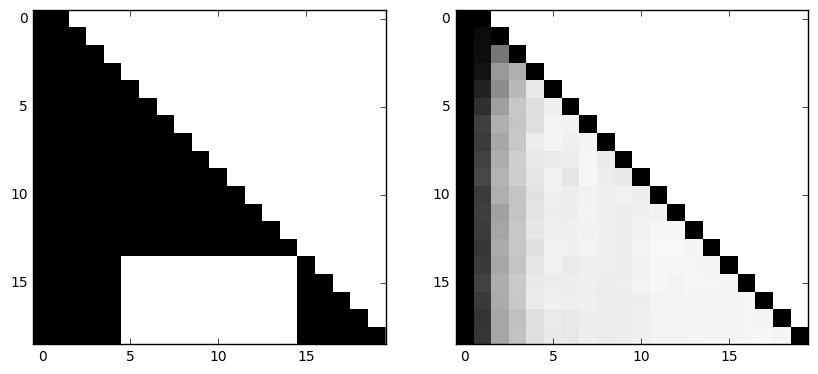

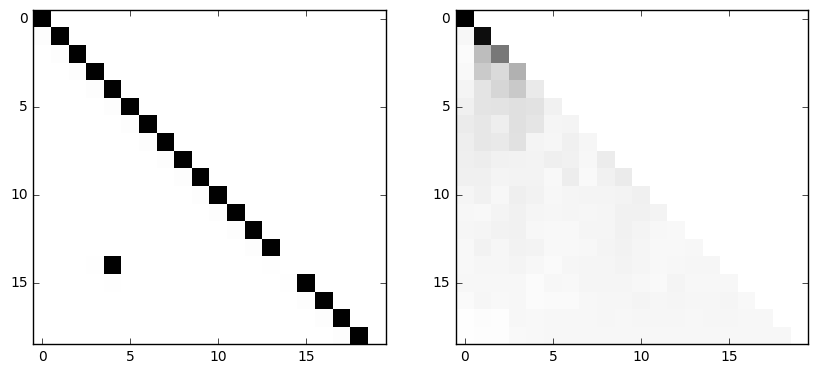

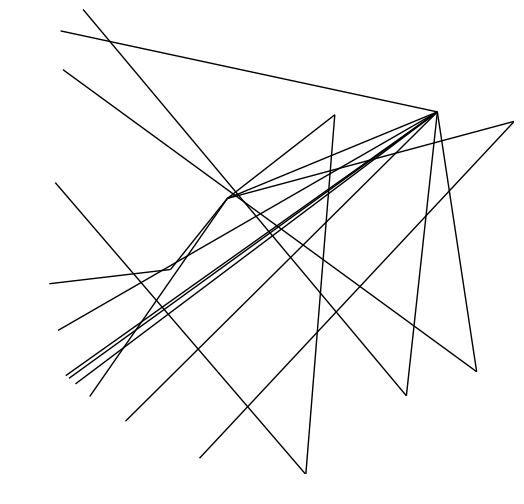

    After 20 iterations
        Discriminator Loss                         = -48682.6679688

    Generator_Loss: 50920.8007812
1276
    After 20 iterations
        Discriminator Loss                         = -48674.546875

    Generator_Loss: 50906.78125
1277
    After 20 iterations
        Discriminator Loss                         = -49222.3398438

    Generator_Loss: 50758.8398438
1278
    After 20 iterations
        Discriminator Loss                         = -48548.6953125

    Generator_Loss: 51024.71875
1279
    After 20 iterations
        Discriminator Loss                         = -48357.3242188

    Generator_Loss: 50834.1757812
1280
    After 20 iterations
        Discriminator Loss                         = -49026.6875

    Generator_Loss: 50863.6445312
1281
    After 20 iterations
        Discriminator Loss                         = -48668.2070312

    Generator_Loss: 50782.6484375
1282
    After 20 iterations
        Discriminator Loss                         = -48725.

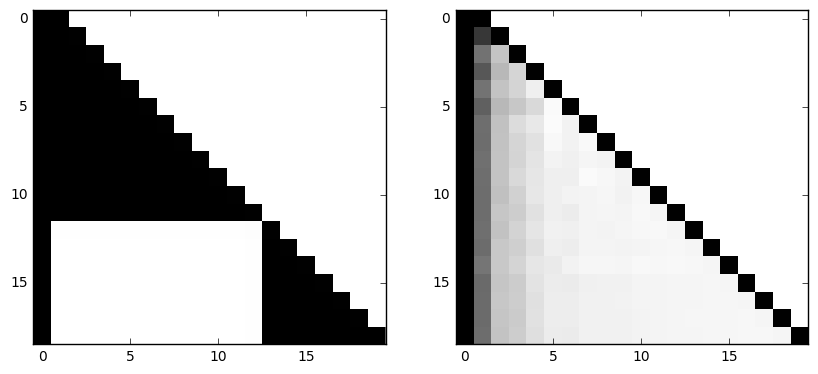

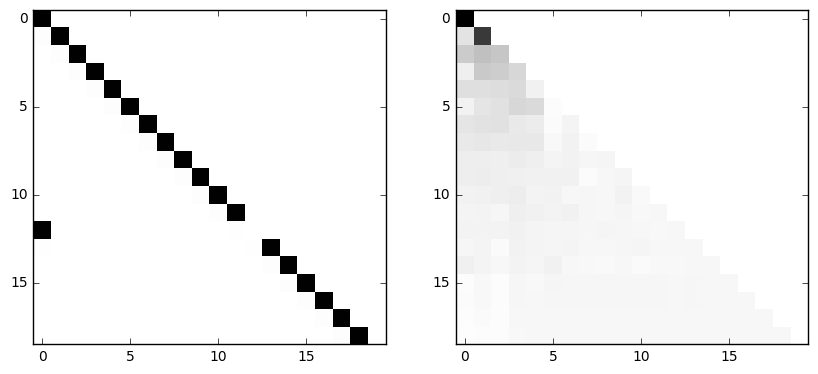

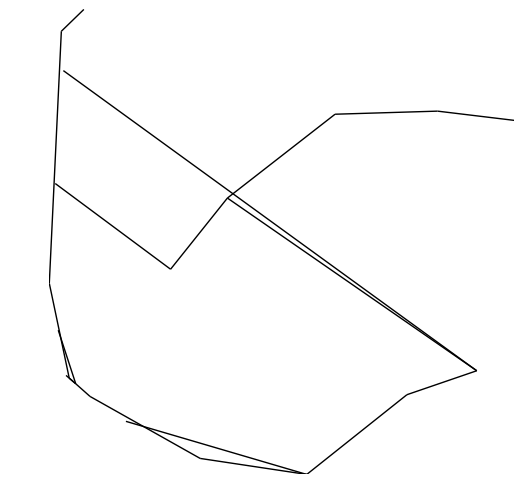

    After 20 iterations
        Discriminator Loss                         = -48797.6601562

    Generator_Loss: 51044.9648438
1301
    After 20 iterations
        Discriminator Loss                         = -48340.1328125

    Generator_Loss: 50839.8867188
1302
    After 20 iterations
        Discriminator Loss                         = -48968.2695312

    Generator_Loss: 50814.0703125
1303
    After 20 iterations
        Discriminator Loss                         = -48714.5703125

    Generator_Loss: 51099.9179688
1304
    After 20 iterations
        Discriminator Loss                         = -48543.7421875

    Generator_Loss: 50891.3046875
1305
    After 20 iterations
        Discriminator Loss                         = -49083.453125

    Generator_Loss: 51059.953125
1306
    After 20 iterations
        Discriminator Loss                         = -49032.3320312

    Generator_Loss: 51210.8945312
1307
    After 20 iterations
        Discriminator Loss                         = -

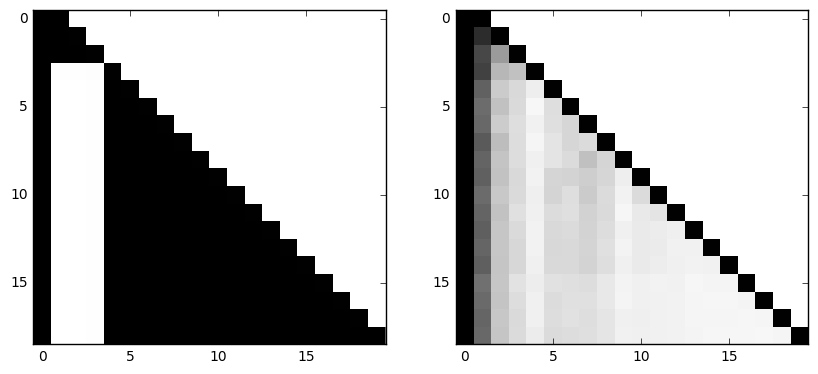

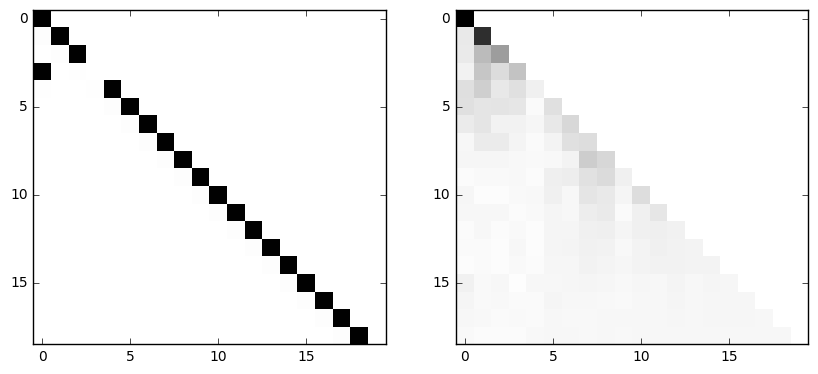

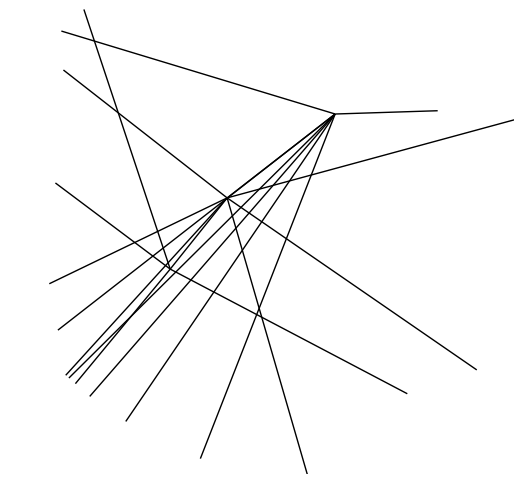

    After 20 iterations
        Discriminator Loss                         = -49135.4960938

    Generator_Loss: 51096.2695312
1326
    After 20 iterations
        Discriminator Loss                         = -49035.4570312

    Generator_Loss: 51236.2070312
1327
    After 20 iterations
        Discriminator Loss                         = -49006.4023438

    Generator_Loss: 51457.0625
1328
    After 20 iterations
        Discriminator Loss                         = -49563.2578125

    Generator_Loss: 51309.984375
1329
    After 20 iterations
        Discriminator Loss                         = -49436.84375

    Generator_Loss: 51346.8828125
1330
    After 20 iterations
        Discriminator Loss                         = -48663.609375

    Generator_Loss: 51276.7226562
1331
    After 20 iterations
        Discriminator Loss                         = -49597.2226562

    Generator_Loss: 51351.4257812
1332
    After 20 iterations
        Discriminator Loss                         = -49698

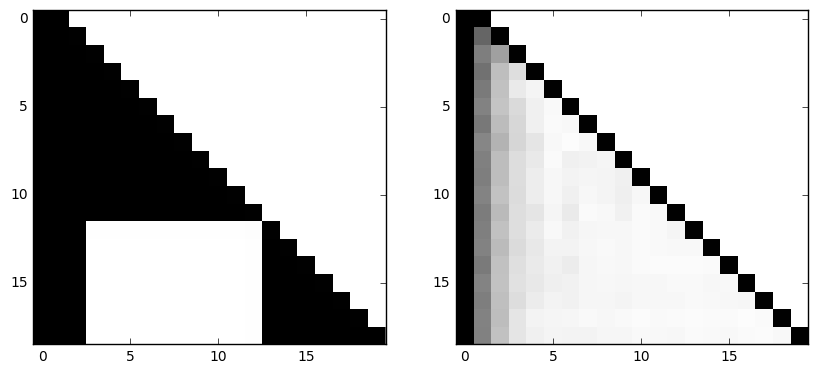

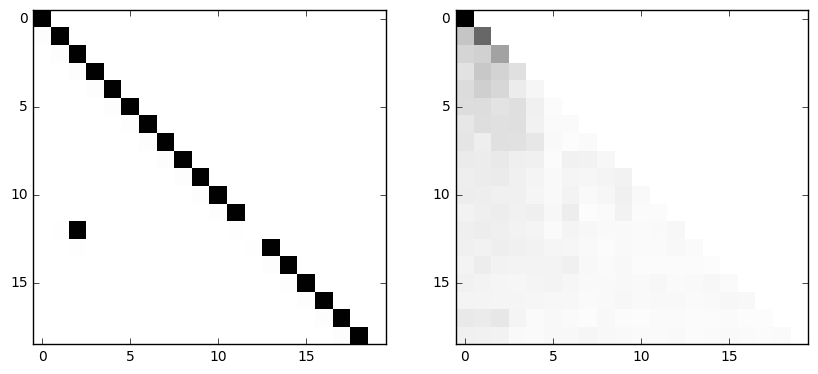

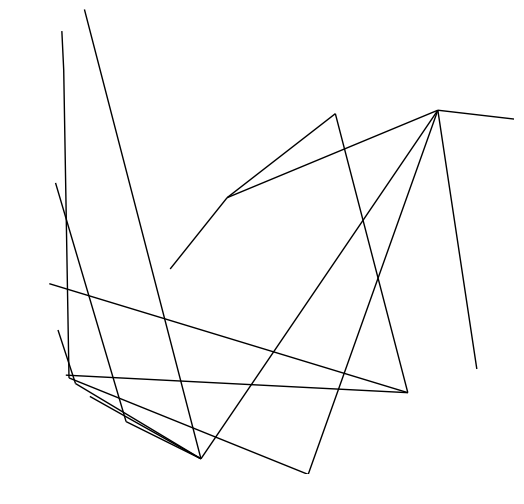

    After 20 iterations
        Discriminator Loss                         = -49110.9570312

    Generator_Loss: 51384.796875
1351
    After 20 iterations
        Discriminator Loss                         = -49169.5078125

    Generator_Loss: 51637.3945312
1352
    After 20 iterations
        Discriminator Loss                         = -48802.7304688

    Generator_Loss: 51392.4570312
1353
    After 20 iterations
        Discriminator Loss                         = -48876.2304688

    Generator_Loss: 51622.2148438
1354
    After 20 iterations
        Discriminator Loss                         = -50044.7304688

    Generator_Loss: 51505.4765625
1355
    After 20 iterations
        Discriminator Loss                         = -49068.1015625

    Generator_Loss: 51536.6835938
1356
    After 20 iterations
        Discriminator Loss                         = -49344.5195312

    Generator_Loss: 51689.2929688
1357
    After 20 iterations
        Discriminator Loss                         = 

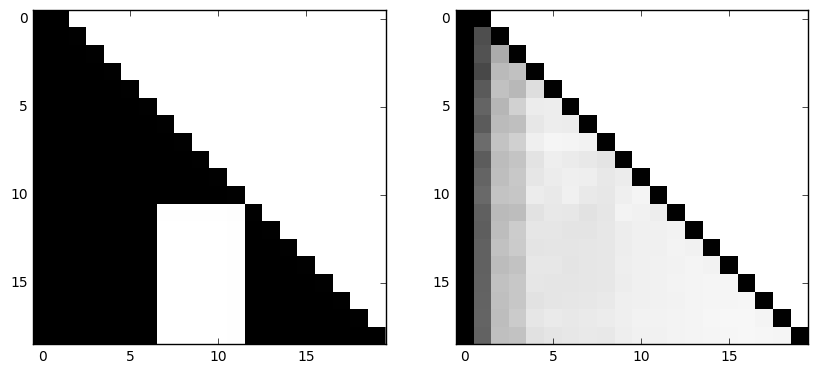

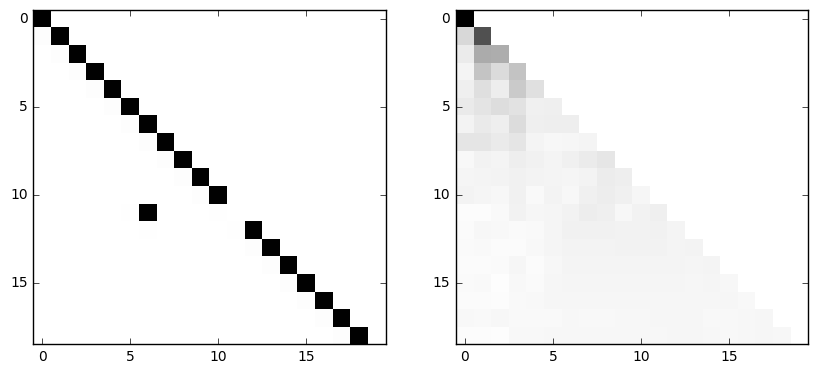

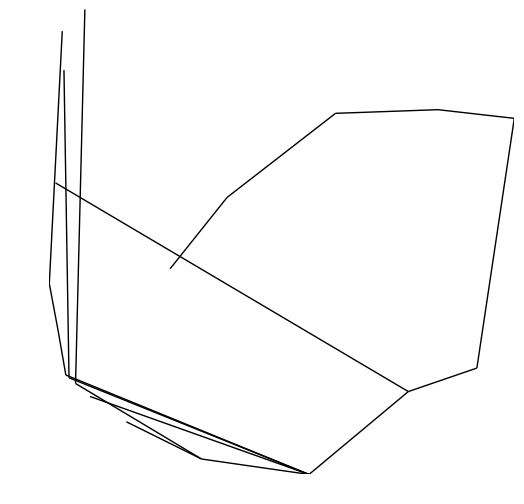

    After 20 iterations
        Discriminator Loss                         = -49275.5625

    Generator_Loss: 51682.2265625
1376
    After 20 iterations
        Discriminator Loss                         = -49329.2070312

    Generator_Loss: 51820.8828125
1377
    After 20 iterations
        Discriminator Loss                         = -49758.1132812

    Generator_Loss: 51701.6835938
1378
    After 20 iterations
        Discriminator Loss                         = -50044.3398438

    Generator_Loss: 51831.515625
1379
    After 20 iterations
        Discriminator Loss                         = -49873.5820312

    Generator_Loss: 51775.4882812
1380
    After 20 iterations
        Discriminator Loss                         = -49503.53125

    Generator_Loss: 51743.71875
1381
    After 20 iterations
        Discriminator Loss                         = -49860.8671875

    Generator_Loss: 51820.5625
1382
    After 20 iterations
        Discriminator Loss                         = -49823.261

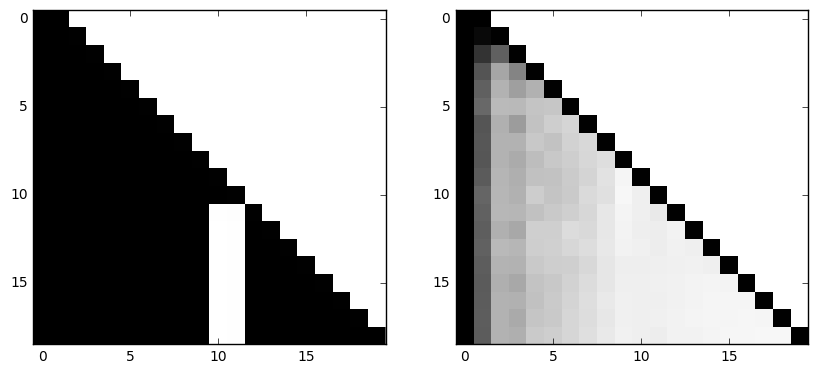

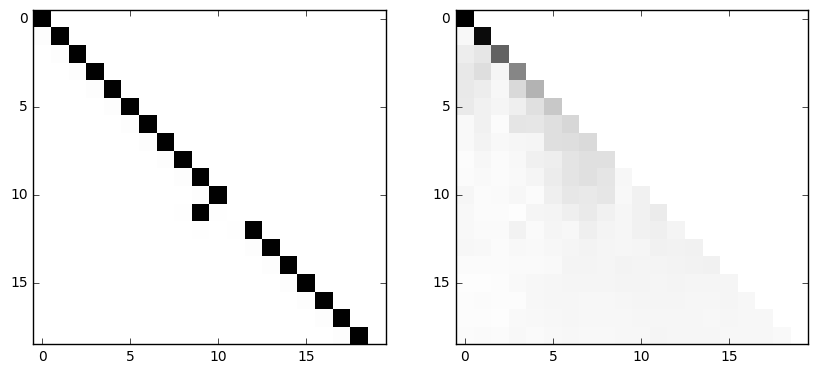

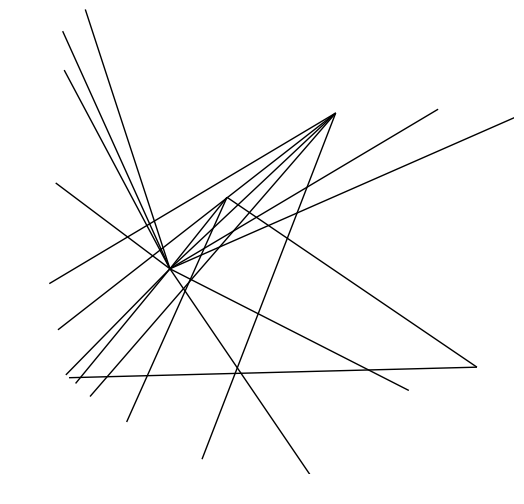

    After 20 iterations
        Discriminator Loss                         = -49784.2578125

    Generator_Loss: 51708.28125
1401
    After 20 iterations
        Discriminator Loss                         = -49625.3945312

    Generator_Loss: 51854.953125
1402
    After 20 iterations
        Discriminator Loss                         = -49910.15625

    Generator_Loss: 51927.1757812
1403
    After 20 iterations
        Discriminator Loss                         = -49145.2539062

    Generator_Loss: 51827.984375
1404
    After 20 iterations
        Discriminator Loss                         = -48912.3984375

    Generator_Loss: 52054.8398438
1405
    After 20 iterations
        Discriminator Loss                         = -50115.3007812

    Generator_Loss: 52027.7304688
1406
    After 20 iterations
        Discriminator Loss                         = -49870.5546875

    Generator_Loss: 52087.5742188
1407
    After 20 iterations
        Discriminator Loss                         = -5001

KeyboardInterrupt: 

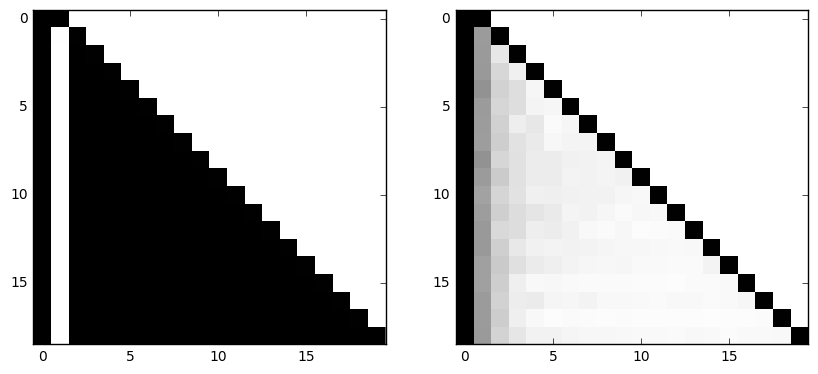

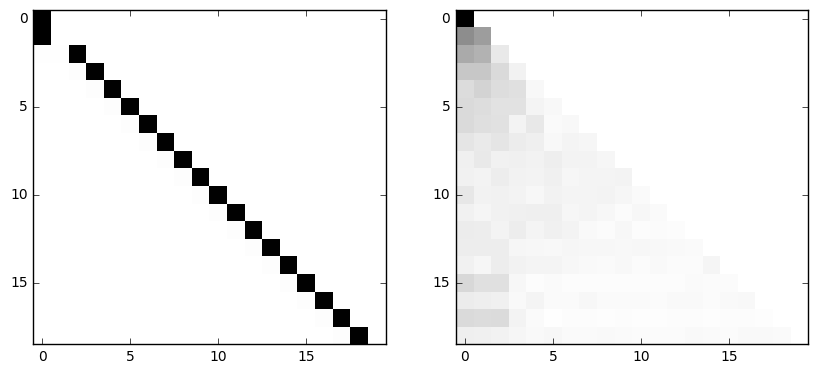

In [6]:
geom_model, cond_geom_model, morph_model, cond_morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr_discriminator=lr_discriminator,
                      lr_generator=lr_generator,
                      weight_constraint=weight_constraint,
                      rule=rule,
                      train_one_by_one=train_one_by_one,
                      train_loss=train_loss,
                      verbose=True)

In [8]:
level=0
g_model = geom_model[level]
m_model = morph_model[level]
cg_model = geom_model[level]
cm_model = geom_model[level]
d_model = disc_model[level]
stacked_model = gan_model[level]

NameError: name 'geom_model' is not defined

In [ ]:
d_model.trainable = False
stacked_model.get_config()

In [ ]:
stacked_model.summary()

In [ ]:
noise_code = np.random.randn(1,1,100)

if rule == 'gmd':
    locations_gen = geom_model[0].predict(noise_code)
    softmax_gen = np.squeeze(cond_morph_model[0].predict([noise_code, locations_gen]))
elif rule == 'mgd':
    softmax_gen = morph_model[0].predict(noise_code)
    locations_gen = cond_geom_model[0].predict([noise_code, softmax_gen])
    softmax_gen = np.squeeze(softmax_gen)

In [ ]:
plt.imshow(softmax_gen, interpolation='none', cmap='Greys')
plt.colorbar()
plt.show()

In [ ]:
neuron_object = train.plot_example_neuron(locations_gen, softmax_gen)
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)

In [ ]:
plt.plot(softmax_gen.argmax(axis=1))
plt.ylim([0, 20])
plt.show()

In [ ]:
neuron_object.parent_index

In [ ]:
McNeuron.visualize.plot_dedrite_tree(neuron_object)

In [ ]:
print np.max(training_data['geometry']['n20'][0, :, :]), np.min(training_data['geometry']['n20'][0, :, :])
print locations_gen.max(), locations_gen.min()

In [ ]:
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
neuron_object.fit()
features = neuron_object.features
features.keys()

In [ ]:
import pprint as pp
pp.pprint(features['branch_angle_segment'])

In [ ]:
for ex in range(2200, 2300):
    input_code = dict()
    input_code['morphology'] = training_data['morphology']['n20'][ex, :]
    input_code['geometry'] = np.squeeze(training_data['geometry']['n20'][ex, :, :])
    neuron_object = data_transforms.make_swc_from_prufer_and_locations(input_code)
    neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
    McNeuron.visualize.plot_2D(neuron_object)
    McNeuron.visualize.plot_dedrite_tree(neuron_object)
    plt.show()
    plt.plot(training_data['morphology']['n20'][ex, :])
    plt.show()